---

* Load the dataset

---

In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv("representative_sample_with_context_withoutDiscard.csv", delimiter = ";")

# Progress Check-In
print("\n=== Initial Data Summary ===")
print(f"Dataset: {len(data)} rows, columns: {data.columns.tolist()}")

print("\n=== Dataset Preview ===")
print(data.head())


=== Initial Data Summary ===
Dataset: 6005 rows, columns: ['question_id', 'question_id_individual', 'question_individual', 'token_count', 'Conceptual Question Type', 'Functional Question Type', 'question_context']

=== Dataset Preview ===
                            question_id  \
0  d4e06598-827d-4e37-a4fb-22265d1ba4f5   
1  f645eb87-e88f-4d40-86aa-e974bce6c4d3   
2  1437e1de-b493-42e8-a37c-51ac80509c65   
3  474d2752-c963-4e64-8ea3-1f4597a708e4   
4  3a4a284f-f00c-4519-aa77-6c4fc96a88c3   

                    question_id_individual  \
0  d4e06598-827d-4e37-a4fb-22265d1ba4f5__B   
1  f645eb87-e88f-4d40-86aa-e974bce6c4d3__C   
2  1437e1de-b493-42e8-a37c-51ac80509c65__A   
3  474d2752-c963-4e64-8ea3-1f4597a708e4__B   
4  3a4a284f-f00c-4519-aa77-6c4fc96a88c3__B   

                                 question_individual  token_count  \
0  Aber ich will das nicht und will ihr das schon...           20   
1  Alternativ , hat jemand Vorschläge für andere ...           19   
2  An die Mädels 

---

* Install and load relevant packages

---

In [2]:
# Install SpaCy for linguistic data processing
!pip install spacy

# Download the large German model
!python -m spacy download de_core_news_lg

# Install factor_analyzer for factor analysis
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.8/567.8 MB 2.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42622 sha256=e723bb8ad2b9b916255e4a06e5e419ad1260676afe9cc986315039482acd0ae8
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


---

* Create new tagging rules because spaCy mislabels some words
---

In [3]:
import spacy
from spacy.language import Language
from spacy.tokens import Token

# Load German spaCy model
nlp = spacy.load("de_core_news_lg")

# Define retagging rules in a dictionary
retagging_rules = {
    # Greetings
    "ah": {"lemma": "ah", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "ahh": {"lemma": "ah", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "ahhh": {"lemma": "ah", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "ahhhh": {"lemma": "ah", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "ciao": {"lemma": "ciao", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "ciaoi": {"lemma": "ciao", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "halli": {"lemma": "hallo", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "hallo": {"lemma": "hallo", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "hallöchen": {"lemma": "hallo", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "hello": {"lemma": "hallo", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "hey": {"lemma": "hey", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "heyy": {"lemma": "hey", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "heyyy": {"lemma": "hey", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "heyhey": {"lemma": "hey", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "hi": {"lemma": "hi", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "lg": {"lemma": "LG", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "lol": {"lemma": "lol", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "mfg": {"lemma": "MFG", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "moin": {"lemma": "moin", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "moinsen": {"lemma": "moinsen", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "oh": {"lemma": "oh", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "ohh": {"lemma": "oh", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "ohhh": {"lemma": "oh", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "ohhhh": {"lemma": "oh", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "tschau": {"lemma": "tschau", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "tschüss": {"lemma": "tschüss", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "tschüsschen": {"lemma": "tschüss", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "tschüssi": {"lemma": "tschüss", "pos": "INTJ", "tag": "ITJ", "morph": ""},
    "tschüß": {"lemma": "tschüss", "pos": "INTJ", "tag": "ITJ", "morph": ""},

    # "würde(s)t" != lemma: "würde(s)t"
    "würdest": {"lemma": "werden", "pos": "AUX", "tag": "VAFIN", "morph": "Mood=Sub|Number=Sing|Person=2|Tense=Past|VerbForm=Fin"},
    "würdet": {"lemma": "werden", "pos": "AUX", "tag": "VAFIN", "morph": "Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin"},

    # "gibts" != VIMP
    "gibts": {"lemma": "geben", "pos": "VERB", "tag": "VVFIN", "morph": "Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin"},
    "machts": {"lemma": "machen", "pos": "VERB", "tag": "VVFIN", "morph": "Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin"},

    # Abbreviations without dividing periods
    "eigtl": {"lemma": "eigentlich", "pos": "ADV", "tag": "ADV", "morph": ""},
    "etc": {"lemma": "etc", "pos": "X", "tag": "XY", "morph": ""},
    "nh": {"lemma": "nh", "pos": "X", "tag": "XY", "morph": ""},
    "usw": {"lemma": "usw", "pos": "X", "tag": "XY", "morph": ""},
    "vlt": {"lemma": "vielleicht", "pos": "ADV", "tag": "ADV", "morph": ""},
    "vllt": {"lemma": "vielleicht", "pos": "ADV", "tag": "ADV", "morph": ""},
    "zb": {"lemma": "zb", "pos": "X", "tag": "XY", "morph": ""}
}

# Register custom attributes for tokens
Token.set_extension("custom_lemma", default=None, force=True)
Token.set_extension("custom_pos", default=None, force=True)
Token.set_extension("custom_tag", default=None, force=True)
Token.set_extension("custom_morph", default=None, force=True)


@Language.component("custom_retagger")
def custom_retagger(doc):
    # Retrieve the question_id from the document's user_data
    question_id = doc.user_data.get("question_id", "unknown_id")  # Default to "unknown_id" if missing

    for token in doc:
        word = token.text.lower()  # case-insensitive
        if word in retagging_rules:
            # Apply the custom annotations from the dictionary (override existing values)
            rule = retagging_rules[word]
            token._.custom_lemma = rule["lemma"]
            token._.custom_pos = rule["pos"]
            token._.custom_tag = rule["tag"]
            token._.custom_morph = rule["morph"]
            print(f"Question ID: {question_id}, Retagged: {token.text} -> {rule}")
    return doc


# Add custom retagger to the pipeline
nlp.add_pipe("custom_retagger", last=True)


<function __main__.custom_retagger(doc)>

---
* Check tagging pipeline: custom_retagger must be included (is added at the end)

---

In [4]:
print(nlp.pipe_names)

['tok2vec', 'tagger', 'morphologizer', 'parser', 'lemmatizer', 'attribute_ruler', 'ner', 'custom_retagger']


---
* Define and extract linguistic features

---

In [5]:
import spacy
from tqdm import tqdm
from spacy.matcher import Matcher


# Ensure tqdm works with pandas' apply function
tqdm.pandas()

# Load the German SpaCy model
#nlp = spacy.load("de_core_news_lg")


# --------------------------------------------------------------------------------
# Define word lists for semantic analysis
# --------------------------------------------------------------------------------
# VERBS

# Causative verbs: Expository, argumentative.	Explains cause-effect relationships.
causative_verbs = {
    "animieren", "anregen", "anspornen", "auslösen", "bedingen", "bewegen", "bewerkstelligen", "bewirken", "entfachen", "entfesseln", "entstehen", "ergeben", "ermuntern", "ermöglichen", "erregen", "erwecken", "evozieren", "folgen", "führen", "herbeiführen", "hervorrufen", "hinauslaufen", "induzieren", "initiieren", "kontrollieren", "lassen", "leiten", "lenken", "machen", "motivieren", "münden", "resultieren", "schaffen", "sorgen", "stärken", "triggern", "veranlassen", "verlaufen", "verursachen"
    }

# Communication verbs: Conversational, narrative.	Highlights interaction or narrative dialogue.
communication_verbs = {
    "anfragen", "anklingeln", "anmailen", "anrufen", "anschreiben", "anschreien", "ansimsen", "smsen", "antexten", "ausplaudern", "aussagen", "babbeln", "begründen", "behaupten", "beichten", "bekanntgeben", "bekanntmachen", "bekennen", "benachrichtigen", "bereden", "berichten", "besprechen", "chatten", "debattieren", "diskutieren", "disputieren", "durchklingeln", "durchsprechen", "einräumen", "erfragen", "erklären", "erkundigen", "erläutern", "erzählen", "erörtern", "fragen", "gestehen", "grüßen", "hinterfragen", "informieren", "kommunizieren", "kontaktieren", "kundtun", "mailen", "melden", "mitteilen", "nachfragen", "nachhaken", "offenbaren", "plaudern", "publikmachen", "quasseln", "quatschen", "rufen", "sagen", "schnacken", "schreiben", "schreien", "simsen", "sprechen", "telefonieren", "texten", "unterhalten", "unterrichten", "verhandeln", "verraten", "verständigen", "veröffentlichen", "vorlesen", "wissenlassen", "zugeben", "äußern"
    }

# Desire verbs: Reflective, persuasive.	Conveys subjectivity and personal or collective intentions.
desire_verbs = {
    "abzielen", "anpeilen", "anvisieren", "beabsichtigen", "bezwecken", "erhoffen", "ersehnen", "erstreben", "ersuchen", "erträumen", "erwünschen", "fokussieren", "herbeiwünschen", "hoffen", "intendieren", "konzentrieren", "sehnen", "sinnen", "streben", "suchen", "träumen", "wünschen"
    }

# Epistemic verbs: Expository, evaluative.	Marks reasoning, belief, or uncertainty.
epistemic_verbs = {
    "ahnen", "annehmen", "anzweifeln", "ausgehen", "bezweifeln", "erahnen", "erwarten", "klingen", "meinen", "mutmaßen", "rechnen", "scheinen", "schätzen", "spekulieren", "unterstellen", "vermuten", "vorausahnen", "vorhersehen", "wirken", "wittern", "zweifeln"
    }

# Existence verbs: Descriptive, narrative. Establishes states, entities, or general conditions. (w/o sein)
existence_verbs = {
    "anhalten", "aufhalten", "auftreten", "befinden", "bestehen", "bleiben", "dauern", "enthalten", "existieren", "fortbestehen", "fortdauern", "halten", "herrschen", "leben", "lieben", "standhalten", "überdauern", "überleben", "verbleiben", "verbringen", "verweilen", "vorkommen", "vorliegen", "weiterbestehen", "weitergehen", "wohnen", "währen"
    }

# Justification verbs: Formal, argumentative. Provides reasoning or validates claims.
justification_verbs = {
    "argumentieren", "begründen", "bekräftigen", "belegen", "bescheinigen", "bestätigen", "beteuern", "beweisen", "bezeugen", "demonstrieren", "einstehen", "legitimieren", "nachweisen", "rechtfertigen", "stärken", "stützen", "untermauern", "validieren", "verargumentieren", "vergewissern", "zeigen"
    }

# Mental verbs: Reflective, analytical.	Highlights thought processes and introspection.
mental_verbs = {
    "auseinandersetzen", "ausklügeln", "beachten", "bedenken", "beherzigen", "berücksichtigen", "brüten", "denken", "durchdenken", "erinnern", "erkennen", "erwägen", "finden", "glauben", "grübeln", "heißen", "nachdenken", "nachgrübeln", "nachsinnen", "reflektieren", "sehen",  "sinnieren", "studieren", "überdenken", "überlegen", "vergessen", "verstehen", "wissen"
    }


# --------------------------------------------------------------------------------
# ADJECTIVES

# Attitudinal adjectives: Reflective, persuasive, personal. Reflect subjectivity, personal stance, and evaluation.
attitudinal_adj = {
    "abartig", "absurd", "affig", "albern", "angepassrt", "angepisst", "anmaßend", "anständig", "arrogant", "asi", "asozial", "assi", "assig", "aufdringlich", "begeistert", "beleidigt", "bescheiden", "bescheuert", "beschränkt", "blöd", "blödsinnig", "boshaft",  "brav", "böse", "charmant", "chillig", "cool", "dankbar", "dienlich", "direkt", "doof", "dramatisch", "dreist", "dumm", "durchgeknallt", "egoistisch", "egozentrisch", "ehrlich", "eifersüchtig", "eigenartig", "eigensinnig", "eingebildet", "eingebildet", "eingeschnappt", "eitel", "engagiert", "enthusiastisch", "entspannt", "enttäuscht", "erfreut", "erschrocken", "erstaunt", "euphorisch", "extrovertiert", "fair", "falsch", "fantastisch", "fies", "frech", "freundlich", "frustriert", "förderlich", "geduldig", "geil", "geläufig", "gemein", "genervt","gereizt", "geschmacklos", "gespentisch", "gewöhnlich", "großartig", "großzügig", "gruselig", "gruselig", "gut", "günstig", "harmonisch", "hasserfüllt", "heiter", "herablassend", "hilfreich", "hinterfotzig", "hinterhältig", "hirnrissig", "hochnäßig", "hoffnungsvoll", "höflich", "ichbezogen", "idealistisch", "ignorant", "impulsiv", "inkonsequent", "introvertiert", "ironisch", "irre", "kacke", "kindisch", "klasse", "klassisch", "konservativ", "korrekt", "krass", "lahm", "langweilig", "launisch", "leichtgläubig", "liebenswert", "liebenswürdig", "liebevoll", "listig", "locker", "lächerlich", "manisch", "melancholisch", "merkwürdig", "merkwürdig", "mies", "misstrauisch", "moralisch","motiviert", "mutlos", "mysteriös", "nachdenklich", "nachlässig", "nachteilig", "naiv", "narzisstisch", "negativ", "neidisch", "neidisch", "nett", "nett", "neugierig", "normal", "nützlich", "obsessiv", "okay", "optimistisch", "pampig", "peinlich", "perplex", "pervers", "pessimistisch", "positiv", "provokant", "rational", "realistisch", "rechtens", "reizbar", "respektlos", "respektvoll", "richtig", "riskant", "rücksichtslos", "rücksichtsvoll", "sachlich", "schadenfroh", "schaurig", "scheiße", "schlau", "schlecht", "schlicht", "schrecklich", "schräg", "schädlich", "schön", "schüchtern", "selbstgefällig", "selbstgefällig", "selbstkritisch", "selbstverliebt", "selbstverliebt", "seltsam", "sentimental", "sicher", "sinnfrei", "sonderbar", "speziell", "spießig", "sprunghaft", "stolz", "stolz", "streng", "stur", "taktlos", "teuer", "theatralisch", "tolerant", "toll", "traurig", "töricht", "umgänglich", "unfair", "ungeduldig", "ungewöhnlich", "ungünstig", "unheimlich", "unhöflich", "unnahbar", "unnatürlich", "unnormal", "unruhig", "unsensibel", "unsicher", "unsinnig", "unverschämt", "unwichtig", "urig", "verblüfft", "verblüfft", "verdattert", "verletzend", "verletzt", "verliebt", "vermessen", "vernünftig", "verrückt", "verschroben", "versnobt", "vertrauensvoll", "vertrauenswürdig", "verwundert", "verzweifelt", "verärgert", "vorsichtig", "vorteilhaft", "weinerlich", "weltfremd", "wichtig", "widerlich", "witzig", "wunderlich", "wütend", "zickig", "zornig", "zufrieden", "zurückhaltend", "zwanglos","zynisch", "öde", "übel", "übergriffig", "überheblich", "überheblich", "üblich"
    }

# Descriptive adjectives: Narrative, expository, descriptive. Narrative or descriptive registers, focusing on sensory details.
descriptive_adjectives = {
    "asymmetrisch", "bitter", "breit", "bunt", "dunkel", "durchsichtig", "eckig", "einfarbig", "einheitlich", "elastisch", "farbig", "farblos", "fest", "feucht", "gerade", "glatt", "groß", "hart", "hell", "hoch", "horizontal", "kalt", "kantig", "klar", "klebrig", "klein", "krumm", "kräftig", "kurz", "lang", "langsam", "laut", "leer", "leicht", "leise", "leise", "locker", "luftdicht", "matt", "mild", "nass", "niedrig", "oval", "pflanzlich", "rau", "rund", "salzig", "sauber", "sauer", "scharf", "schmal", "schmutzig", "schnell", "schwach", "schwer", "spitz", "stark", "staubig", "still", "stinkend", "stumpf", "symmetrisch", "süß", "tief", "tierisch", "transparent", "trocken", "trüb", "vertikal", "voll", "warm", "wasserdicht", "weich", "zäh"
  }
# Modal adjectives: Instructional, evaluative.	Indicate necessity or possibility.
modal_adjectives = {
    "akzeptabel", "angeblich", "annehmbar", "bedenklich", "denkbar", "einleuchtend", "erforderlich", "erreichbar", "fraglich", "fragwürdig", "haltlos", "hinnehmbar", "hypothetisch", "machbar", "mutmaßlich", "möglich", "notwendig", "nötig", "offensichtlich", "plausibel", "problematisch", "realisierbar", "realistisch", "tragbar", "unabdingbar", "unabwendbar", "unausweichlich", "unbedenklich", "unbegründet", "unerlässlich", "ungewiss", "unglaubwürdig", "unmöglich", "unplausibel", "unsachlich", "unvermeidbar", "unvermeidlich", "unvertretbar", "unwahrscheinlich", "vermeidbar", "vermutlich", "verpflichtend", "vertretbar", "voraussichtlich", "wünschenswert", "zulässig", "zumutbar", "zweifelhaft", "zwielichtig", "zwingend", "überflüssig"
    }
# Social/relational adjectives: Expository, academic.	Describe relationships or social roles.
social_adjectives = {
    "antidemokratisch", "beruflich", "bürgerlich", "demokratisch", "diktatorisch", "einheimisch", "ethisch", "familiär", "freundschaftlich", "gemeinsam", "gemeinschaftlich", "gerichtlich", "gesellschaftlich", "humanitär", "illegal", "individuell", "interkulturell", "international", "kameradschaftlich", "kollegial", "kollektiv", "kooperativ", "kulturell", "legal", "lokal", "menschlich", "militärisch", "moralisch", "multikulturell", "national", "partnerschaftlich", "persönlich", "politisch", "privat", "rechtlich", "rechtmäßig", "regional", "sozial", "soziokulturell", "unkollegial", "unpersönlich", "unpolitisch", "unrechtmäßig", "unverantwortlich", "verantwortlich", "vereint", "wirtschaftlich", "zivil", "zwischenmenschlich", "öffentlich", "überregional"
    }

# Scientific/technical adjectives: Academic, technical.	Describe technical properties.
technical_adjectives = {
    "akustisch", "analog", "anorganisch", "biologisch", "chemisch", "deskriptiv", "digital", "dynamisch", "effizient", "elektrisch", "elektronisch", "empirisch", "experimentell", "genetisch", "hydraulisch", "ineffizient", "klinisch", "magnetisch", "manuell", "mathematisch", "mechanisch", "mikroskopisch", "naturwissenschaftlich", "normativ", "optisch", "organisch", "physikalisch", "praktisch", "programmierbar", "präzise", "präzise", "qualitativ", "quantitativ", "robust", "statisch", "statistisch", "technisch", "theoretisch", "thermisch", "ungenau", "unprogrammierbar", "wissenschaftlich"
    }


# --------------------------------------------------------------------------------
# ADVERBS

adverb_classes = {
    # Possibility adverbs: subjectivity and tentative stance
    "adv_poss": {
        "anscheinend", "augenscheinlich", "erkennbar", "ersichtlich", "eventuell", "gegebenenfalls", "höchstwahrscheinlich", "mutmaßlich", "möglicherweise", "offenbar", "offenkundig", "offensichtlich", "potenziell", "unwahrscheinlich", "vermutlich", "vielleicht", "voraussichtlich", "wahrscheinlich", "womöglich"
        },
    # Place adverbs > narrative style, focusing on setting and chronology
    "adv_loc": {
        "außen", "außerhalb", "bergab", "bergauf", "da", "dort", "draußen", "drinnen", "drüben", "entlang", "gegenüber", "hier", "hinten", "hinter", "innen", "irgendwo", "links", "mittendrin", "neben", "nebenan", "nirgendwo", "oben", "oberhalb", "rechts", "rückwärts", "seitlich", "unten", "unterhalb", "vorn", "vorne", "vorwärts", "woanders", "überall"
        },
    # Time adverbs > narrative style, focusing on setting and chronology
    "adv_temp": {
        "anfangs", "augenblicklich", "bald", "bereits", "bisher", "bislang", "damals", "danach", "dauerhaft", "demnächst", "eben", "einmal", "einst", "ewig", "früher", "gegenwärtig", "gerade", "gestern", "gleich", "grad", "grade", "heute", "heutzutage", "immer", "inzwischen", "irgendwann", "jemals", "jetzt", "künftig", "kürzlich", "lange", "letztendlich", "letztens", "manchmal", "mehrmals", "meist", "meistens", "mittlerweile", "momentan", "morgen", "nachher", "nachträglich", "neulich", "nie", "niemals", "noch", "nun", "oft", "oftmals", "plötzlich", "schlussendlich", "schon", "seitdem", "seither", "selten", "soeben", "sofort", "später", "stets", "unentwegt", "vorgestern", "vorher", "vorhin", "weiterhin", "wieder", "zeitlebens", "zeitweise", "zukünftig", "übermorgen"
        },
    # linking adverbials > logical structuring and cohesion, typical in expository or formal texts
    "adv_link": {
        "allerdings", "andererseits", "anschließend", "anstatt", "ausdrücklich", "außerdem", "dadurch", "daher", "daneben", "daraufhin", "darum", "darüber", "dazu", "demnach", "dennoch", "deshalb", "dessen", "deswegen", "diesem", "ebenfalls", "ebenso", "einerseits", "ergänzend", "ferner", "folglich", "gleichwohl", "hierbei", "hinaus", "indes", "insbesondere", "inzwischen", "jedoch", "mittlerweile", "obendrein", "schließlich", "sodann", "somit", "stattdessen", "trotzdem", "vielmehr", "weiterhin", "währenddessen", "zugleich", "zusätzlich", "zwischenzeitlich", "überdies"
        }
}


# --------------------------------------------------------------------------------
# PREPOSITIONS

preposition_classes = {
    # Local and temporal prepositions: Explore narrative flow and chronological organization + Highlight spatial relationships and descriptive elements.
    "prep_loc_temp" : {
        "ab", "an", "auf", "aus", "außerhalb", "bei", "binnen", "bis", "entfernt", "entlang", "hinter", "in", "innerhalb", "nach", "nachdem", "nahe", "neben", "ob", "oberhalb", "seit", "unter", "unterhalb", "von", "vor", "während", "zu", "zwischen", "über"
        },

    # Modal prepositions: Reveal manner, means, and instrumentality in text.
    "prep_mod" : {
        "abgesehen", "anhand", "anstatt", "ausgenommen", "ausschließlich", "außer", "bezüglich", "betreffend", "betreffs", "durch", "für", "einschließlich", "entgegen", "entsprechend", "exklusive", "gegen", "gegenüber", "gemäß", "hinsichtlich", "inklusive", "laut", "mit", "mithilfe", "mitsamt", "ohne", "per", "statt", "via", "vorausgesetzt", "wider", "zugunsten", "zuliebe", "zuzüglich"
        },

    # Causal prepositions: Analyze reasoning, cause-effect relationships.
    "prep_caus" : {
        "angesichts", "anlässlich", "aufgrund", "dank", "halber", "infolge", "mangels", "trotz", "obwohl", "um", "unbeschadet", "ungeachtet", "wegen", "zu", "zwecks"
        }
}




# --------------------------------------------------------------------------------
# Define function to extract linguistic features

# functional features are based on pos-tags
# semantic features are based on word lists
# --------------------------------------------------------------------------------


# Initialize a list to store tokenized and tagged data (save tagged output in file for future reference)
token_data = []


def extract_features(row):
    # Get the text and metadata
    question_context = row["question_context"]
    question_id = row["question_id"]
    question_id_individual = row["question_id_individual"]
    conceptual_question_type = row["Conceptual Question Type"]
    functional_question_type = row["Functional Question Type"]
    question_individual = row["question_individual"]

    # Create a SpaCy Doc object and attach the question_id
    doc = nlp.make_doc(question_context)  # Only tokenize initially
    doc.user_data["question_id"] = question_id  # Attach question_id to doc.user_data
    doc = nlp(doc)  # Process through the pipeline

    # Store tokenized and tagged information
    for token in doc:
        token_data.append({
            "question_id": question_id,
            "question_id_individual": question_id_individual,
            "Conceptual Question Type": conceptual_question_type,
            "Functional Question Type": functional_question_type,
            "question_context": question_context,
            "question_individual": question_individual,
            "token": token.text,
            "lemma": token._.custom_lemma or token.lemma_,
            "pos": token._.custom_pos or token.pos_,
            "tag": token._.custom_tag or token.tag_,
            "morph": token._.custom_morph or token.morph
        })


    # Calculate counts from semantic classes first to then be able to substract them: Adverbs
    adv_specific = sum(1 for token in doc if (
        token._.custom_tag or token.tag_) == "ADV" and any((
            token._.custom_lemma or token.lemma_) in adverb_classes[key] for key in adverb_classes))
    # Calculate counts from semantic classes first to then be able to substract them: Prepositions
    prep_specific = sum(1 for token in doc if (
        token._.custom_tag or token.tag_) in {"APPR", "APPO", "APZR"} and any((
            token._.custom_lemma or token.lemma_) in preposition_classes[key] for key in preposition_classes))


    features = {

# --------------------------------------------------------------------------------

        "word_count": len(doc),  # Total number of tokens in the line

# --------------------------------------------------------------------------------
# NOUNS
        # Common nouns: General information density > emphasis on objects, concepts, or categories rather than specific entities. Common in expository, descriptive, or argumentative texts, such as news articles or academic writing.
        "nn_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) in {"PROPN", "NOUN"} and (
                token._.custom_tag or token.tag_) == "NN"),
        # Proper nouns: Specificity and Personalization > focus on specific entities, like people, places, organizations, or events. Common in narrative or biographical texts, where storytelling or real-life examples dominate.
        "ne_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) in {"PROPN", "NOUN"} and (
                token._.custom_tag or token.tag_) == "NE"),


# --------------------------------------------------------------------------------
# ARTICLES
        # Definite articles: focus on shared knowledge, cohesion, and established references >> academic, narrative, and procedural
        "art_def_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) == "DET" and (
                token._.custom_tag or token.tag_) == "ART" and any(
                definite == "Def" for definite in token.morph.get("Definite", []))),
        # Indefinite articles: exploratory or descriptive tendencies + introducing new information >> creative, conversational, or expository texts
        "art_indef_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) == "DET" and (
                token._.custom_tag or token.tag_) == "ART" and any(
                definite == "Ind" for definite in token.morph.get("Definite", []))),


# --------------------------------------------------------------------------------
# VERBS
        # All verbs:
          # Temporal framing (present-focused vs. past-focused).
          # Text type and register (e.g., narrative vs. expository).
        # Present tense, indicative mood: narrative, description, actions and events, real time, Reflects hypothetical or ongoing possibilities, obligations, or abilities. Often used in constructing present perfect tenses. >> involvement, interaction, and narrativity
        "v_pres_ind_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) in {"AUX", "VERB"} and (
                token._.custom_tag or token.tag_) in {"VVFIN", "VAFIN", "VMFIN"} and any(
                    tense == "Pres" for tense in token.morph.get("Tense", [])) and any(
                        mood == "Ind" for mood in token.morph.get("Mood", []))),
        # Present tense, subjunctive mood (Konjunktiv I): reported speech and indirect discourse >> formal or journalistic style, polite or neutral tone, emphasis on objectivity and detachment
        "v_pres_sub_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) in {"AUX", "VERB"} and (
                token._.custom_tag or token.tag_) in {"VVFIN", "VAFIN", "VMFIN"} and any(
                    tense == "Pres" for tense in token.morph.get("Tense", [])) and any(
                        mood == "Sub" for mood in token.morph.get("Mood", []))),
        # Past tense, indicative mood: description of past events, narrativity, hypothetical situations or past obligations. past perfect or passive constructions.
        "v_past_ind_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) in {"AUX", "VERB"} and (
                token._.custom_tag or token.tag_) in {"VVFIN", "VAFIN", "VMFIN"} and any(
                    tense == "Past" for tense in token.morph.get("Tense", [])) and any(
                        mood == "Ind" for mood in token.morph.get("Mood", []))),
        # Past tense, subjunctive mood (Konjunktiv II): hypotheticals, counterfactual scenarios, or wishful thinking >> speculative or emotional tone, common in reflective or argumentative texts, softening statements, hypotheticals, or politeness, formality + higher complexity + condensing information
        "v_past_sub_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) in {"AUX", "VERB"} and (
                token._.custom_tag or token.tag_) in {"VVFIN", "VAFIN", "VMFIN"} and any(
                    tense == "Past" for tense in token.morph.get("Tense", [])) and any(
                        mood == "Sub" for mood in token.morph.get("Mood", []))),


        # Infinitive + Particle "zu" before infinitives: formality + higher complexity + condensing information (often appear with subordinate clauses) + instructional/directive >> informational density and formality
        "v_inf_count": sum(1 for token in doc if (
            (token._.custom_pos or token.pos_) in {"AUX", "VERB"} and (
                token._.custom_tag or token.tag_) in {"VVINF", "VMINF", "VAINF", "VVIZU"}) or (
                    token._.custom_pos or token.pos_) == "PART" and (
                        token._.custom_tag or token.tag_) == "PTKZU"),


        # Verbs in perfect forms
        # VVPP: narrative: past events, VAPP: formal exposition or detailed procedural descriptions, VMPP: hypothetical or speculative discourse
        "v_pp_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) in {"AUX", "VERB"} and (
                token._.custom_tag or token.tag_) in {"VVPP", "VAPP", "VMPP"}),


        # Verb lists (see above)
        "v_caus_count": sum(1 for token in doc if (
            token._.custom_lemma or token.lemma_) in causative_verbs),
        "v_comm_count": sum(1 for token in doc if (
            token._.custom_lemma or token.lemma_) in communication_verbs),
        "v_desire_count": sum(1 for token in doc if (
            token._.custom_lemma or token.lemma_) in desire_verbs),
        "v_epist_count": sum(1 for token in doc if (
            token._.custom_lemma or token.lemma_) in epistemic_verbs),
        "v_exist_count": sum(1 for token in doc if (
            token._.custom_lemma or token.lemma_) in existence_verbs),
        "v_justif_count": sum(1 for token in doc if (
            token._.custom_lemma or token.lemma_) in justification_verbs),
        "v_mental_count": sum(1 for token in doc if (
            token._.custom_lemma or token.lemma_) in mental_verbs),

# --------------------------------------------------------------------------------
# ADJECTIVES
        # Attributive adjectives(spacy assigns token.pos_ == "ADJ" to token.tag_ == "ADJD")
        # Positive: Indicates neutral descriptions, often seen in narratives, descriptive prose, or scientific texts describing phenomena (e.g., eine hohe Temperatur).
        "adja_pos_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) == "ADJ" and (
                token._.custom_tag or token.tag_) == "ADJA" and any(
                    degree == "Pos" for degree in token.morph.get("Degree", []))),
        # Comparative: Suggests a comparative focus, typical in evaluative or analytical texts.
        "adja_cmp_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) == "ADJ" and (
                token._.custom_tag or token.tag_) == "ADJA" and any(
                    degree == "Cmp" for degree in token.morph.get("Degree", []))),
        # Superlative: Often used for emphasis or ranking, seen in promotional language, reviews, or advertising.
        "adja_sup_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) == "ADJ" and (
                token._.custom_tag or token.tag_) == "ADJA" and any(
                    degree == "Sup" for degree in token.morph.get("Degree", []))),


        # Adverbial adjectives (spacy assigns token.pos_ == "ADV" to token.tag_ == "ADJD")
        # Positive: Indicates evaluation or descriptions of states, common in spoken language, dialogues, or personal narratives.
        "adjd_pos_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) == "ADV" and (
                token._.custom_tag or token.tag_) == "ADJD" and any(
                    degree == "Pos" for degree in token.morph.get("Degree", []))),
        # Comparative: Reflects relative assessments, seen in conversational comparisons or personal judgments.
        "adjd_cmp_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) == "ADV" and (
                token._.custom_tag or token.tag_) == "ADJD" and any(
                    degree == "Cmp" for degree in token.morph.get("Degree", []))),
        # Superlative: Indicates strong evaluations, often found in rhetorical or persuasive contexts.
        "adjd_sup_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) == "ADV" and (
                token._.custom_tag or token.tag_) == "ADJD" and any(
                    degree == "Sup" for degree in token.morph.get("Degree", []))),


        # Adjective lists (see above)
        "adj_attit_count": sum(1 for token in doc if (
            token._.custom_lemma or token.lemma_) in attitudinal_adj and (
                token._.custom_tag or token.tag_) in {"ADJA", "ADJD"}),
        "adj_descr_count": sum(1 for token in doc if (
            token._.custom_lemma or token.lemma_) in descriptive_adjectives and (
                token._.custom_tag or token.tag_) in {"ADJA", "ADJD"}),
        "adj_mod_count": sum(1 for token in doc if (
            token._.custom_lemma or token.lemma_) in modal_adjectives and (
                token._.custom_tag or token.tag_) in {"ADJA", "ADJD"}),
        "adj_soc_count": sum(1 for token in doc if (
            token._.custom_lemma or token.lemma_) in social_adjectives and (
                token._.custom_tag or token.tag_) in {"ADJA", "ADJD"}),
        "adj_tech_count": sum(1 for token in doc if (
            token._.custom_lemma or token.lemma_) in technical_adjectives and (
                token._.custom_tag or token.tag_) in {"ADJA", "ADJD"}),

# --------------------------------------------------------------------------------
# ADVERBS
        # Adverbs from previously defined adverb classes
        "adv_specific": adv_specific,
        # Adverbs minus previously defined adverb classes
        "adv_general_count": sum(1 for token in doc if (
            token._.custom_tag or token.tag_) == "ADV") - adv_specific,
        # Specific adverb classes
        "adv_poss_count": sum(1 for token in doc if (
            token._.custom_lemma or token.lemma_) in adverb_classes["adv_poss"] and (
                token._.custom_tag or token.tag_) == "ADV"),
        "adv_loc_count": sum(1 for token in doc if (
            token._.custom_lemma or token.lemma_) in adverb_classes["adv_loc"] and (
                token._.custom_tag or token.tag_) == "ADV"),
        "adv_temp_count": sum(1 for token in doc if (
            token._.custom_lemma or token.lemma_) in adverb_classes["adv_temp"] and (
                token._.custom_tag or token.tag_) == "ADV"),
        "adv_link_count": sum(1 for token in doc if (
            token._.custom_lemma or token.lemma_) in adverb_classes["adv_link"] and (
                token._.custom_tag or token.tag_) == "ADV"),

# --------------------------------------------------------------------------------
# PREPOSITIONS AND OTHERS
        # Prepositions > formality and information density
        # Prepositions from previously defined preposition classes
        "prep_specific": prep_specific,
        # Prepositions minus previously defined preposition classes
        "prep_general_count": sum(1 for token in doc if (
            token._.custom_tag or token.tag_) in {"APPR", "APPO", "APZR"}) - prep_specific,
        # Specific preposition classes
        "prep_loc_temp_count": sum(1 for token in doc if (
            token._.custom_lemma or token.lemma_) in preposition_classes["prep_loc_temp"] and (
                token._.custom_tag or token.tag_) in {"APPR", "APPO", "APZR"}),
        "prep_mod_count": sum(1 for token in doc if (
            token._.custom_lemma or token.lemma_) in preposition_classes["prep_mod"] and (
                token._.custom_tag or token.tag_) in {"APPR", "APPO", "APZR"}),
        "prep_caus_count": sum(1 for token in doc if (
            token._.custom_lemma or token.lemma_) in preposition_classes["prep_caus"] and (
                token._.custom_tag or token.tag_) in {"APPR", "APPO", "APZR"}),

        # Contractions > real time production > intimacy
        "prep_contra_count": sum(1 for token in doc if (
            token._.custom_tag or token.tag_) == "APPRART"),

# --------------------------------------------------------------------------------
# PRONOUNS: referring to shared personal knowledge + real time production

        # Demonstrative pronouns: Structured, cohesive Writing, adds emphasis in informal texts
        "pron_dem_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) in {"DET", "PRON"} and (
                token._.custom_tag or token.tag_) in {"PDS", "PDAT"}),

        # Indefinite pronouns: use in abstract or argumentative texts signals generalizations; in diary-like or reflective texts to express uncertainty
        "pron_ind_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) in {"DET", "PRON"} and (
                token._.custom_tag or token.tag_) in {"PIS", "PIAT", "PIDAT"}),

        # Personal pronouns + reflexive personal pronouns
        # 1st + 2nd person > Conversational or interactive registers (e.g., dialogues, speeches). + Personal or informal texts (e.g., letters, blogs)
        "pron_pers_1_2_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) == "PRON" and (
                token._.custom_tag or token.tag_) in {"PPER", "PRF"} and any(
                    p in {"1", "2"} for p in token.morph.get("Person", []))),
        # 3rd person > Narrative or descriptive registers (e.g., fiction, historical accounts). Formal or impersonal texts (e.g., academic writing).
        "pron_pers_3_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) == "PRON" and (
                token._.custom_tag or token.tag_) in {"PPER", "PRF"} and any(
                    p == "3" for p in token.morph.get("Person", []))),

        # Possessiv pronouns
        # Personal writing: Diaries, blogs, and letters: personal tone, interaction, or subjective involvement.
        # Add "DET" to exlcude mislabelled verb forms of "meinen": Token: meine, Lemma: mein, Pos: VERB
        "pron_poss_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) == "DET" and (
                token._.custom_tag or token.tag_) in {"PPOSS", "PPOSAT"} and any(
                    p == "Yes" for p in token.morph.get("Poss", []))),

        # Relativ pronouns > explanatory / expository + elaborating information
        "pron_rel_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) == "PRON" and (
                token._.custom_tag or token.tag_) in {"PRELS", "PRELAT"}),

        # Pronominal adverb: dafür, dabei, deswegen, trotzdem > justifying/explaining > purpose-showing; provide cohesion in logical arguments
        # for some reason, spacy matches with PROAV instead of PAV
        "pron_adv_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) == "ADV" and (
                token._.custom_tag or token.tag_) == "PROAV"),

# --------------------------------------------------------------------------------
# CONJUNCTIONS / PARTICLES

        # Subordinating conjunctions: indicate syntactically complex texts with multiple layers of ideas, reveal a focus on logical relations (cause-effect, conditions, etc.). Common in analytical or argumentative texts, academic writing, technical texts, and formal prose.
        "conj_sub_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) == "SCONJ" and (
                token._.custom_tag or token.tag_) in {"KOUI", "KOUS"}),
        # coordinating conjunctions: spoken language and informal texts, conveying clear and straightforward relationships, typical for conversational registers and narrative or instructional texts.
        "conj_coor_count": sum(1 for token in doc if (
            token._.custom_pos or token.pos_) == "CCONJ" and (
                token._.custom_tag or token.tag_) == "KON"),
        # Comparative particle: Descriptive: evaluative writing, comparative analysis, or descriptive texts. Interpersonal: conversational texts or spoken language. Formal: paired with subordinating conjunctions (als ob, wie wenn), contribute to syntactic complexity in formal texts
        "conj_comp_count": sum(1 for token in doc if (
            token._.custom_tag or token.tag_) == "KOKOM"),

# --------------------------------------------------------------------------------
# OTHERS

        # Interjections > informal, conversational tone
        "interj_count": sum(1 for token in doc if (
            token._.custom_tag or token.tag_) == "ITJ"),

        # WH-words > information-seeking, interactivity
        "wh_count": sum(1 for token in doc if (
            (token._.custom_pos or token.pos_) == "PRON" and (
                token._.custom_tag or token.tag_) == "PWS") or (
                (token._.custom_pos or token.pos_) == "DET" and (
                    token._.custom_tag or token.tag_) == "PWAT") or (
                    (token._.custom_pos or token.pos_) in {"CCONJ", "ADV"} and (
                        token._.custom_tag or token.tag_) == "PWAV")),

        # Response particles: conversational, interactive; involvement and speaker stance
        "resp_part_count": sum(1 for token in doc if (
            token._.custom_tag or token.tag_) == "PTKANT"),

        # Modellkennungen / Special characters >> specific vocabulary / technical
        "spec_char_count": sum(1 for token in doc if (
            token._.custom_tag or token.tag_) == "XY")


    }
    return features



# After processing all rows, convert token_data to a DataFrame and save it
token_df = pd.DataFrame(token_data)
token_df.to_csv("tagged_tokens_data.csv", index=False, encoding="utf-8")

# Extract features for each line and convert them to a DataFrame (+ Progress bar)
features = data.progress_apply(extract_features, axis=1).apply(pd.Series)

# Combine features with the original dataset
data = pd.concat([data, features], axis=1)

# Save the enriched dataset to inspect later
data.to_csv("enriched_data.csv", index=False)
print(data.head())

  0%|          | 3/6005 [00:00<05:14, 19.08it/s]

Question ID: d4e06598-827d-4e37-a4fb-22265d1ba4f5, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 474d2752-c963-4e64-8ea3-1f4597a708e4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  0%|          | 10/6005 [00:00<04:33, 21.95it/s]

Question ID: 0ef0b141-546a-41f5-97a9-1832e5b1acf2, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6f2232fe-d229-484b-a66f-10b88b1045d4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d1adfeaf-0866-4117-965f-3f9ae99ea821, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


  0%|          | 19/6005 [00:00<03:53, 25.69it/s]

Question ID: 0c18a639-6471-48e0-91b4-0180363eeb93, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0c18a639-6471-48e0-91b4-0180363eeb93, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 1ba25577-4681-4e70-899a-d6d2685ecc71, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  0%|          | 26/6005 [00:00<03:25, 29.13it/s]

Question ID: 827e8ead-555b-475e-be71-dd549a8e785c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: adaa08c7-ab79-47d1-8831-b13d6ee281a9, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: b3e759e9-28d7-4a9e-a05b-b74d96e52ebd, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d8931847-455d-4273-a26b-5bc58a28736e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b1a6e5cc-9a15-42c1-b40b-e38cef2af81c, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b1a6e5cc-9a15-42c1-b40b-e38cef2af81c, Retagged: MfG -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 94276fab-8aac-4895-9b43-32b4d24a8650, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  1%|          | 37/6005 [00:01<02:29, 39.96it/s]

Question ID: d8649725-be51-4367-a7e2-4325eb02011d, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 034e398d-08cb-49f2-bd94-725131eb7946, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b2d2fc13-56d9-4953-bbf1-db57a569769e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 69e7158a-a6d6-4170-9654-1b27935d567e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 69e7158a-a6d6-4170-9654-1b27935d567e, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1eda1ddc-a79f-4c9f-82ca-35454751353b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c58199f6-c308-4d8e-9914-6bad74e4fd61, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6d562290-f759-4c47-9eb9-5f2a406b9895, Retagged: Hallo -> {'lemma': 'hallo', 'pos':

  1%|          | 42/6005 [00:01<02:46, 35.71it/s]

Question ID: 6308d2fc-d0bd-4af4-aa2c-07bb5283f85c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d6d27fe1-c041-4ad9-833e-7aefabdb1d2a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2f02bf08-3461-4b1d-bbd7-2d4842ba0c88, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2f02bf08-3461-4b1d-bbd7-2d4842ba0c88, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 2ffca9ed-3e73-4bc2-842f-72abd43095e7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  1%|          | 46/6005 [00:01<03:36, 27.56it/s]

Question ID: 0dc3d92c-c7b6-4ef6-827f-39f993b4d7b0, Retagged: Hello -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0dc3d92c-c7b6-4ef6-827f-39f993b4d7b0, Retagged: nh -> {'lemma': 'nh', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 57d08f01-1967-4c2f-b326-5718b42bfb6c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 43aa2ea8-2a40-46b3-8938-5daf13d0393e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 43aa2ea8-2a40-46b3-8938-5daf13d0393e, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  1%|          | 53/6005 [00:01<04:02, 24.50it/s]

Question ID: d6ed91df-3dc1-4626-9033-2081a9e8a297, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d6ed91df-3dc1-4626-9033-2081a9e8a297, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4638da03-b3d5-4261-9f1a-8a79a46aeac4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  1%|          | 56/6005 [00:02<04:05, 24.25it/s]

Question ID: 2cf0d4c0-9217-4e33-901a-1723ea31fa3c, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2cf0d4c0-9217-4e33-901a-1723ea31fa3c, Retagged: lG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c493049f-4561-475d-98b6-d0ca4613a975, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 5bc15515-e261-4f97-8f72-e6e1ed5f69d0, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 52b7c920-1330-49cd-845f-b830412fda8a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  1%|          | 66/6005 [00:02<04:08, 23.92it/s]

Question ID: 434df8d2-ee2f-4cc2-9975-0644a97dc929, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f47bdcad-1a61-47b5-91e0-c32a92e2fdf5, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 59e667da-1f9b-4499-8ce3-f2900015c782, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 59e667da-1f9b-4499-8ce3-f2900015c782, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 89e6299b-1c58-4930-b030-d23ee947890d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  1%|          | 69/6005 [00:02<04:30, 21.91it/s]

Question ID: 9a881e22-0e78-4afa-8a10-3f7e24eb0488, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: cf5c9bb7-1894-4727-be4c-9cffd647f638, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c1cc2f24-15ae-4581-8738-ebc856befe46, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c1cc2f24-15ae-4581-8738-ebc856befe46, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 36d19de1-6833-488d-9165-5248c32f017e, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6470df79-ede8-40d7-b154-e98c374465d6, Retagged: Heyhey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f8d140fd-4a5d-4bd5-9704-ad7e78be4bdc, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f8d140fd-4a5d-4bd5-9704-ad7e78be4bdc, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'm

  1%|▏         | 77/6005 [00:02<03:34, 27.69it/s]

Question ID: 52705013-05d9-4808-9a56-c245f6f2e055, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 59524a21-9acf-4153-80f4-77eeee1ef4e9, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ac7c27b9-bbf2-49fb-ba0c-66bebe358038, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 163618b2-11ef-472d-a79d-d64522621b35, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 163618b2-11ef-472d-a79d-d64522621b35, Retagged: vlt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 66994a45-e05a-4a87-bea3-258b60fb62dc, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0a107f32-a6dc-43c4-be29-4ac7d62875c2, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  1%|▏         | 80/6005 [00:03<04:20, 22.72it/s]

Question ID: 10ec116a-16cb-4de9-9d2d-08a469ad3763, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 10ec116a-16cb-4de9-9d2d-08a469ad3763, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 354dd575-6f0b-4bd5-997e-aefadbd25785, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  1%|▏         | 86/6005 [00:03<05:03, 19.49it/s]

Question ID: 7f6ca587-5df2-4679-8558-c58cd549e9a4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bc09a944-c08e-483b-88c6-9dce1f1ce337, Retagged: lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  1%|▏         | 89/6005 [00:03<04:54, 20.06it/s]

Question ID: 8c28d08d-1e61-40a0-b7d1-c2a2b3dd02c6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ac40b903-e524-4d03-a9a7-5f7a44e0ee38, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ce8cb5b0-17dc-4cb2-bd23-565daac3bfd2, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  2%|▏         | 94/6005 [00:03<05:58, 16.49it/s]

Question ID: a0421d43-420c-4d06-b954-aba921e5434d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2c5eafaa-29b1-4fa4-be62-af4a6ddc07ff, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  2%|▏         | 101/6005 [00:04<05:59, 16.41it/s]

Question ID: ea375ecf-adb4-4436-825a-60b20695e444, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9f83e59c-4fcb-42d7-8809-8b8d6f6682c4, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 319c5427-d317-42e8-b7d3-ddcf5a5a02e7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 319c5427-d317-42e8-b7d3-ddcf5a5a02e7, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: 319c5427-d317-42e8-b7d3-ddcf5a5a02e7, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  2%|▏         | 105/6005 [00:04<04:48, 20.42it/s]

Question ID: ff1efbe5-96d5-40f6-bbcc-d618a4010c8a, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fbf2b8b2-c0f1-4772-80c1-f2b1b1043e07, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  2%|▏         | 114/6005 [00:05<05:08, 19.11it/s]

Question ID: f9070720-cea5-4b6a-8bab-f46158d4d5ad, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f9070720-cea5-4b6a-8bab-f46158d4d5ad, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}


  2%|▏         | 125/6005 [00:05<03:57, 24.75it/s]

Question ID: d7d9838f-1f3b-41d1-a5a8-3a50f59fed66, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  2%|▏         | 132/6005 [00:05<03:37, 26.96it/s]

Question ID: ae4b789a-c20c-4d9f-8934-c2c725479ba2, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e364e48f-0540-4779-9a6d-1b4b0a4a6c48, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 71752341-87b4-4107-b570-9619c3f595f3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  2%|▏         | 141/6005 [00:05<02:59, 32.62it/s]

Question ID: 872bd28d-3b2f-429a-95a1-917ca680cdf5, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 401d2a0f-cb24-4732-a5c8-f903d2322afd, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9369c0a2-ad80-49bd-a746-c7630c56e093, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 07cda174-7fff-47d8-a5fa-e2375e6979bb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0779c6b3-dc4e-479e-85fd-c66cf75de031, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0779c6b3-dc4e-479e-85fd-c66cf75de031, Retagged: Gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}


  2%|▏         | 148/6005 [00:06<04:37, 21.11it/s]

Question ID: aa1d7ea7-8860-446c-9c30-8e968cf365f0, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: aa1d7ea7-8860-446c-9c30-8e968cf365f0, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: aa1d7ea7-8860-446c-9c30-8e968cf365f0, Retagged: Mfg -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b64fb661-c207-4bb4-a899-8646c5301994, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 819b02ba-f943-4c04-84c6-12ff6d8d4d7c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6569406c-58f6-406f-ad76-36b07200a1a0, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  3%|▎         | 155/6005 [00:06<04:10, 23.35it/s]

Question ID: 875ffebc-f30d-4e51-a631-f6f8aa8cea2d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 53948ed2-60c0-44d8-9689-422af6d17e68, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 53948ed2-60c0-44d8-9689-422af6d17e68, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f6f77738-10f9-46d8-b596-71481c67c093, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 64f099e1-fe59-4172-8c08-0a4f7d3d098a, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5a166599-7523-4922-a637-a06b17b4e604, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5a166599-7523-4922-a637-a06b17b4e604, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 5a166599-7523-4922-a637-a06b17b4e604, Retagged: vllt -> {'lemma': 'vielleicht',

  3%|▎         | 158/6005 [00:06<04:13, 23.07it/s]

Question ID: ed663c03-6bfc-4b1d-a165-bc6813d47258, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7e380493-dcd0-4e48-b454-90b4ac5e5ef3, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7e380493-dcd0-4e48-b454-90b4ac5e5ef3, Retagged: Vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 7e380493-dcd0-4e48-b454-90b4ac5e5ef3, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}


  3%|▎         | 164/6005 [00:07<04:23, 22.19it/s]

Question ID: 149e4023-be83-41c1-aeb1-dcc49068f638, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: aee8292b-6404-4b3f-a985-7c5dc76e7444, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: aee8292b-6404-4b3f-a985-7c5dc76e7444, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4df114e6-552d-440c-b65d-66940347c52b, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fec88658-9a32-4d4b-a2e7-0d307629244f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  3%|▎         | 173/6005 [00:07<03:25, 28.44it/s]

Question ID: 63ed1c29-771d-417f-98bf-83a653da8726, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 63ed1c29-771d-417f-98bf-83a653da8726, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: aded213a-96b5-4efb-80bd-75dceaca2d5a, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 6652ba0b-05e8-4318-a99d-7a958809539f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6652ba0b-05e8-4318-a99d-7a958809539f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: dd3fec1a-74d6-4b36-80d6-118632ab33e0, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d62cc8f6-1969-4916-9979-8d64d7f48c02, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  3%|▎         | 179/6005 [00:07<03:54, 24.86it/s]

Question ID: a7e06730-58ea-4138-bf79-463905324d7f, Retagged: hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a7e06730-58ea-4138-bf79-463905324d7f, Retagged: Zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: a7e06730-58ea-4138-bf79-463905324d7f, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 73ebcb17-19fa-49cd-a599-316215f4e6a3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a4d62992-fdb7-4c38-b66c-8808e61f3382, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 99726996-dc63-41a6-b452-4bfd714b5ca4, Retagged: Hallöchen -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  3%|▎         | 187/6005 [00:07<03:21, 28.92it/s]

Question ID: c462f423-c724-45b5-97dc-7e06b50dcd78, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f8a2f0bf-65e5-40f0-bc4f-96788b1b860f, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 90000f33-42c4-4190-929d-31f25859f2ef, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1d1c2b75-bece-4d99-bdbc-29e188664d23, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1d1c2b75-bece-4d99-bdbc-29e188664d23, Retagged: vlt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 772d9330-a7ec-470b-aa36-2a117233f7d9, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  3%|▎         | 196/6005 [00:08<02:44, 35.22it/s]

Question ID: c33c1ff5-21e5-4a15-b416-1f983eef01aa, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3955b26d-d5a7-4c5a-ae0f-25ca4c35efa7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 70e672b2-28bc-425d-a902-86f0e8d5d0b6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 02591912-2772-4828-a187-91040d0900d4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d236a6a2-9052-427b-8a8e-e64e82d92b7b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 558b31d3-646e-45a3-a035-83f8457678bb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0295fcb6-8f4a-4bb8-9058-123b57220983, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f53c1b5e-3c78-4980-9c16-b557753c5247, Retagged: Hallo -> {'lemma': 'ha

  3%|▎         | 204/6005 [00:08<02:53, 33.46it/s]

Question ID: 34d8dbad-5623-4d07-abf6-4cb5912b4f98, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a99d9eb9-e8ae-46ad-9c92-7b3a6f816a47, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6d8ed199-4d14-42de-b7c6-95f780483168, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7dd0ec5d-12f5-42d4-8c79-27901d9fef0a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 84c80df0-568d-4ce7-a3cc-19011f8dd9b2, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  4%|▎         | 214/6005 [00:08<02:27, 39.39it/s]

Question ID: f02b8f01-5c25-4971-a1b7-b4d88296bb98, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e3654926-1d23-4ba8-9eb1-cea2d69f8fd5, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 346f5260-b472-4ee3-aabb-54dc51fbeb65, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 28910f95-32f8-4ae4-928c-35b10f8e9792, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 737f5c0d-1875-4a00-8bdf-b5c1c1c6c926, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: aafff4e7-1d61-4e8c-8460-ffcd91335727, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b0c18c94-9ac3-42e0-987f-edf0618eefd1, Retagged: hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  4%|▎         | 218/6005 [00:08<02:46, 34.77it/s]

Question ID: 44a70f4e-4093-43da-89fd-2cf650379159, Retagged: LOL -> {'lemma': 'lol', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2e9ac69f-ee11-496b-a1ed-c050f29425c6, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  4%|▍         | 227/6005 [00:08<02:50, 33.91it/s]

Question ID: 36efe1d8-aba1-4737-96c5-bd0e89fc6a25, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: c18f7fe4-56b4-4cb4-965f-e7b05bb42a5c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c18f7fe4-56b4-4cb4-965f-e7b05bb42a5c, Retagged: nh -> {'lemma': 'nh', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 48d4a170-6a6f-4a37-a388-fa093bf0f82b, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e70dcb00-17a7-404b-ad29-56c4a2571c95, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  4%|▍         | 235/6005 [00:09<02:53, 33.34it/s]

Question ID: b37d2124-9783-4270-b7f4-30080619092f, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d953659c-56f2-4ac9-aaf8-efaf730a6803, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: eef47f3b-a4a1-4545-91c8-4a931e8952d2, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: eef47f3b-a4a1-4545-91c8-4a931e8952d2, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ed76503e-34db-48ca-998f-471869ed71c6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 411c0971-4876-45dc-b5b6-07a5394c1144, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  4%|▍         | 243/6005 [00:09<03:12, 29.93it/s]

Question ID: 7909602c-bb1f-49b8-a1e9-a82c06b36948, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6f0c4df3-6ff8-4a1a-8618-9f1f047a37a5, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9b95a182-1c9a-4b0f-919c-7bb08696e4c7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  4%|▍         | 252/6005 [00:09<02:48, 34.05it/s]

Question ID: d870bf5e-a2fe-4a0b-9588-c246613ba211, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2671d824-08af-4c90-9424-d42a6a4920fa, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8e4997c0-fe80-4ee7-9b72-0c1c434a8170, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2dff4814-668a-45fd-af35-a15cf1a239db, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 509f6623-6143-4ad0-a5e2-69b5a5750772, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  4%|▍         | 256/6005 [00:09<02:55, 32.70it/s]

Question ID: 64b72dda-5a4e-4a4b-8cc6-3f863c1b2d3f, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 64b72dda-5a4e-4a4b-8cc6-3f863c1b2d3f, Retagged: zB -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 2cf42e8c-9eb3-4052-aa20-a7fa2d24523d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f9a24c8f-407e-4c6c-8019-4bfab6268274, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  4%|▍         | 260/6005 [00:10<04:03, 23.62it/s]

Question ID: 35e8e06b-bcdc-475e-8fa4-23e82c0e51cf, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 76b6a81f-d4de-45f2-9945-252f9cee5751, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  5%|▍         | 273/6005 [00:10<03:02, 31.43it/s]

Question ID: acb20ce8-da1e-4662-a0a0-01570cafbd0a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 17a3a754-7338-4c0c-9110-06a063bb0f05, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  5%|▍         | 277/6005 [00:10<03:14, 29.45it/s]

Question ID: 49035326-d478-4a0b-95a0-0a3118d72476, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 53562119-35e4-4e96-af3a-f82df0f92996, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9eaaae0c-31b1-4a11-afc7-ce9af29d5e6f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9eaaae0c-31b1-4a11-afc7-ce9af29d5e6f, Retagged: lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  5%|▍         | 281/6005 [00:10<04:48, 19.81it/s]

Question ID: 2a5962d5-8926-4de3-b300-092063a7efe1, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2a5962d5-8926-4de3-b300-092063a7efe1, Retagged: oh -> {'lemma': 'oh', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 03004ac1-8535-4c3c-991d-4db53635a4e8, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  5%|▍         | 291/6005 [00:11<03:25, 27.76it/s]

Question ID: 9199994a-bad0-4ccc-81d8-4bcb686b6224, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5601c58b-aa83-4073-9d05-43fafa4ac221, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5601c58b-aa83-4073-9d05-43fafa4ac221, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 063acc21-375a-45bd-825c-8a19ce2f8e10, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d56bbd0b-c50b-4291-a190-9e378fb23265, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  5%|▍         | 300/6005 [00:11<03:25, 27.76it/s]

Question ID: c4f5d501-f753-4213-82b5-05ae4077c12a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c4f5d501-f753-4213-82b5-05ae4077c12a, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6e488e92-8b2b-4b38-a187-b60bf5dcf8c7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a5163fac-73d1-4f7c-8843-073b92f9a613, Retagged: nh -> {'lemma': 'nh', 'pos': 'X', 'tag': 'XY', 'morph': ''}


  5%|▌         | 308/6005 [00:11<03:08, 30.27it/s]

Question ID: 8e5268d2-c1cb-4846-b3cd-3205c3b3cd32, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 2ce4062a-0741-4634-a54c-4cb4dcf26c76, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 887a2602-a14e-4879-974a-c28980491887, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 71f1e260-2fe2-4243-bfa0-728839084f51, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  5%|▌         | 316/6005 [00:12<03:18, 28.68it/s]

Question ID: 73f446b7-a20a-478c-8469-b398ca98e262, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 45bd51ed-7082-4602-b1a3-c9f7eaa98863, Retagged: Würdest -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Sing|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 45bd51ed-7082-4602-b1a3-c9f7eaa98863, Retagged: Usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 44c00da1-60d2-4cff-9d74-388e1b5a2726, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 930f6aee-c140-48db-98d5-cd4b75bd8431, Retagged: würdest -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Sing|Person=2|Tense=Past|VerbForm=Fin'}


  5%|▌         | 328/6005 [00:12<03:10, 29.84it/s]

Question ID: cc67770e-f8e1-4cc1-ac80-29ab4872717f, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: cc67770e-f8e1-4cc1-ac80-29ab4872717f, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 8dcb0a7d-2e9d-4343-8335-ba3d988575c2, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 40f0f85f-4219-46e2-85b3-c5eed85fbe76, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 83c3944c-df88-4df5-aa53-ffe114c783cb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 83c3944c-df88-4df5-aa53-ffe114c783cb, Retagged: vlt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}


  6%|▌         | 332/6005 [00:12<03:02, 31.14it/s]

Question ID: e94f8175-95a3-4c69-8fc4-1574a5f0b500, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a0653547-ea42-4635-b58d-31ac59576eb6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  6%|▌         | 339/6005 [00:12<04:07, 22.87it/s]

Question ID: dd8708a2-c1a6-46e8-9dd7-74ea2de22c7e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  6%|▌         | 342/6005 [00:13<04:26, 21.26it/s]

Question ID: c1e22e75-a418-48e7-8099-276e00135926, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c1e22e75-a418-48e7-8099-276e00135926, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 3e07409f-ba62-4959-9685-c30ad72910d9, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3e07409f-ba62-4959-9685-c30ad72910d9, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 3e07409f-ba62-4959-9685-c30ad72910d9, Retagged: lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6fbafb7f-5df3-4305-9d53-e3b4784655e6, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: aee235d2-5d68-495b-96ed-b5ed48ee30d0, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e5d71a29-8448-411c-9c37-410a118806e6, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', '

  6%|▌         | 349/6005 [00:13<04:04, 23.16it/s]

Question ID: 36ea7bd8-3763-4151-9c31-8028a1e5cd25, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 05fde964-4140-4fe2-b1c0-6c2b23c97640, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  6%|▌         | 356/6005 [00:13<03:34, 26.34it/s]

Question ID: 9a3c1e89-c754-40cf-8bf1-01ac2413623a, Retagged: lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7da8fa23-67e9-4ac7-9dc6-8b6d5b4643a0, Retagged: vlt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 7da8fa23-67e9-4ac7-9dc6-8b6d5b4643a0, Retagged: vlt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 7da8fa23-67e9-4ac7-9dc6-8b6d5b4643a0, Retagged: vlt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: d91d3723-3468-4e7f-8764-fcd84bb47dee, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b7021bf8-aa62-4df5-ad0b-1d5c42418b2d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 878c7a58-3f31-4a73-915a-3d944f014bf8, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 878c7a58-3f31-4a73-915a-3d944f014bf8, Retagged: vllt -> {'lemma': 'vie

  6%|▌         | 365/6005 [00:13<02:46, 33.92it/s]

Question ID: da977ed5-f405-433c-88cc-a7c320163435, Retagged: Hallöchen -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a1669d96-b4d4-4ac4-a44d-5ab0729cbd62, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3cc02f8b-6dee-4026-97f1-7a8092ee00ee, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4271b835-0ea0-47ba-b99e-96ec15691285, Retagged: Heyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9373c346-3194-4482-894e-285b5e73af28, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9cc0e0b4-a4b2-4664-8854-aad358be97da, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  6%|▌         | 370/6005 [00:14<02:37, 35.79it/s]

Question ID: d80fda28-c739-4cfb-bd56-0568fe82b71c, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 30dc59a6-eee4-4954-b98e-a7cd78902a26, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b31b000d-770e-4b7b-94f9-8829776928db, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4406d7cf-c6b1-4cad-a128-6a9559a2ce79, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  6%|▋         | 379/6005 [00:14<02:56, 31.79it/s]

Question ID: ab9fcb1c-71e3-4cf5-becd-e184bec6b1ed, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 529f21f3-3968-49c7-bba5-f76378f133cb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b1b4a8ff-473b-4f3b-b2d1-28d6e88cedb3, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2c62aace-9815-429e-8701-66f544faa5eb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  6%|▋         | 383/6005 [00:14<03:56, 23.81it/s]

Question ID: 7a77dc69-11be-436a-82e4-66276f8d320a, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7a77dc69-11be-436a-82e4-66276f8d320a, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 002437e2-c453-413c-813b-bc1bfd205467, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a10eec43-2d9c-47b3-bad8-208d6bc051bd, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  7%|▋         | 391/6005 [00:14<03:23, 27.62it/s]

Question ID: 2e8810d3-adb2-4531-a2a2-0e73aa580edb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2e8810d3-adb2-4531-a2a2-0e73aa580edb, Retagged: MfG -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 645f7253-57c6-4bcf-a3d0-cf17de4982d2, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d13112d1-74e9-405b-81a5-2a0300032c3e, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e819303a-fba2-4a49-8781-f68b8b58ee1e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ae70c189-8a99-4125-a6ab-43f541195cf4, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  7%|▋         | 395/6005 [00:15<03:22, 27.69it/s]

Question ID: b2acc9e1-0e82-45d1-bcd5-4a6a0d72e8c8, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b2acc9e1-0e82-45d1-bcd5-4a6a0d72e8c8, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 756fb624-d925-4d66-a41e-01313fb54e79, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 756fb624-d925-4d66-a41e-01313fb54e79, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  7%|▋         | 403/6005 [00:15<03:11, 29.19it/s]

Question ID: 6ee69ba5-7f01-490a-bbe1-ef305635e3c7, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6ee69ba5-7f01-490a-bbe1-ef305635e3c7, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3f7be76e-7233-4a80-b785-5ab7653a7d9d, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ff08e484-e648-477f-a43e-9a788dff993c, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ff08e484-e648-477f-a43e-9a788dff993c, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  7%|▋         | 410/6005 [00:15<03:25, 27.28it/s]

Question ID: 093b648a-dc52-44f0-b24f-172d7afa00e4, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 268535bf-de4b-4c36-8f86-371993ad79ce, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 760f7d59-89f8-4739-9c4d-821e3e720213, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  7%|▋         | 413/6005 [00:15<04:20, 21.49it/s]

Question ID: 470baafa-1e67-4b30-aee4-1b84ed1fb95c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: cd52608b-fa4a-4e01-91dd-9f46379c496f, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: cd52608b-fa4a-4e01-91dd-9f46379c496f, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 413a310f-7d45-4743-9978-1247cfea05de, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  7%|▋         | 416/6005 [00:15<04:32, 20.54it/s]

Question ID: 9b05164e-f273-4e2f-b88c-eefd56f3da00, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  7%|▋         | 423/6005 [00:16<04:08, 22.48it/s]

Question ID: 059ea9d5-c99c-459d-96da-d01698fb2f1e, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 594292d3-fe72-49bc-be7d-c8210a39f075, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 555f7f22-5f84-4245-a621-c6c241244a10, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


  7%|▋         | 429/6005 [00:16<04:31, 20.56it/s]

Question ID: e447c49a-c2b4-40fe-b273-9526601a6954, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e447c49a-c2b4-40fe-b273-9526601a6954, Retagged: vlt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 58106e9d-7892-4240-a228-0e6d3d61fed5, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  7%|▋         | 432/6005 [00:16<05:16, 17.63it/s]

Question ID: 6458cee6-287a-46b0-9512-cff34ed5d056, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ecb74c8a-66cf-4fe2-b386-ac1710339191, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1e89fd82-a870-40f7-9e7e-059dd0632a1d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  7%|▋         | 436/6005 [00:17<07:22, 12.57it/s]

Question ID: f73c48df-4d03-4c6b-b1d1-0384ff37ef17, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f73c48df-4d03-4c6b-b1d1-0384ff37ef17, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: f73c48df-4d03-4c6b-b1d1-0384ff37ef17, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: eddb4757-811c-435d-a6f2-ec5581662538, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  7%|▋         | 441/6005 [00:17<05:53, 15.75it/s]

Question ID: 183ed081-bd25-46d7-beed-b1b9137f978b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9f11207f-c7a8-4ad1-ab51-79495903364f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9f11207f-c7a8-4ad1-ab51-79495903364f, Retagged: Zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 9f11207f-c7a8-4ad1-ab51-79495903364f, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 7bd25b09-b1a9-420e-a5d9-eb95d4a797db, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a8ff65d7-50b9-4b5b-b9f8-c78b1eef9581, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a8ff65d7-50b9-4b5b-b9f8-c78b1eef9581, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 3be9cf17-d9ea-462a-93ed-3a040fc153d9, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag'

  7%|▋         | 448/6005 [00:17<04:36, 20.10it/s]

Question ID: 631f93f4-7ced-4d33-8c09-b29810c926fa, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5353b5a3-0bc9-4f5e-a23a-855566b4bf16, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e0fde6cf-28dd-4435-b2ea-23e98a7a5481, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b0e8947a-a3be-4449-baa0-59d13cb68367, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  8%|▊         | 457/6005 [00:18<07:08, 12.95it/s]

Question ID: bc13db78-69bc-4bb0-8c29-6f1556146b43, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 73c4b066-f42a-472f-93f8-18203610b553, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  8%|▊         | 462/6005 [00:18<06:07, 15.10it/s]

Question ID: eca8f6b8-9d7a-404d-86c1-adceb1dc38f6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 10d51f8a-f95e-4116-8446-9f05e254d5aa, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  8%|▊         | 466/6005 [00:19<08:01, 11.49it/s]

Question ID: b792c505-f0e2-4b75-a383-afbe244103a1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 73629331-784a-49b9-bf39-399191b3b8be, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  8%|▊         | 470/6005 [00:19<06:44, 13.68it/s]

Question ID: fa709188-7ec2-4f40-ab26-51d1bd6278dd, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  8%|▊         | 474/6005 [00:19<06:15, 14.73it/s]

Question ID: 33350149-f5d4-4b00-8e59-5b2ff7bc124b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 33350149-f5d4-4b00-8e59-5b2ff7bc124b, Retagged: zB -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: ca4f1a15-bd22-454e-b2c7-13c23e1f1a75, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  8%|▊         | 479/6005 [00:20<05:46, 15.95it/s]

Question ID: 02082f76-ca59-41b7-a535-358290abab40, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 02082f76-ca59-41b7-a535-358290abab40, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1386272e-5a6d-4f71-8a14-35b45582d532, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  8%|▊         | 481/6005 [00:20<06:06, 15.08it/s]

Question ID: c3a17d03-0ac5-418b-b18f-f980c8b404e5, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 941612f6-45d2-4342-ab84-696c1303a380, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  8%|▊         | 488/6005 [00:20<05:54, 15.57it/s]

Question ID: 4a7fb73a-4c80-4567-9f70-904f61c9b11c, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0cce6cfb-d595-4b38-981d-9ffc43dd89d9, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 7e5d811e-0cd1-4fcb-96bf-2d2b17513fb1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  8%|▊         | 493/6005 [00:21<05:53, 15.60it/s]

Question ID: 04994367-f643-4fdd-9046-d4c5daf50a2f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 04994367-f643-4fdd-9046-d4c5daf50a2f, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: d79e9ff8-cb44-4ccd-b4b0-a19fdb1f03a7, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


  8%|▊         | 498/6005 [00:21<05:02, 18.21it/s]

Question ID: 8092ab41-5e6c-4459-b9a9-818b9352040a, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 5aadf56b-3c61-483f-94ba-6eed4ab09f67, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 16d3aa27-800d-4b98-a29b-7c0be302ebd6, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 16d3aa27-800d-4b98-a29b-7c0be302ebd6, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: a02248cc-c0c8-416a-b990-36c3546c455d, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 90239978-5b7e-4727-8bda-a3b8fec66993, Retagged: würd

  8%|▊         | 500/6005 [00:21<05:02, 18.22it/s]

Question ID: 2497a2a4-39e6-489c-9732-0515b9c21d59, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 1f55a007-40c6-4966-8e05-47d54ad1f39a, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 1f55a007-40c6-4966-8e05-47d54ad1f39a, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 1f55a007-40c6-4966-8e05-47d54ad1f39a, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: c02673cd-d87b-4c21-af81-e81b53ff11e8, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 5d584eb2-0e64-447c-bac8-172cd9dc0880, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph':

  8%|▊         | 505/6005 [00:21<04:55, 18.58it/s]

Question ID: 897e9b3a-6882-4958-bd9a-f2c6aaef3e5a, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 644c0f76-ba9b-4b1a-a85a-d9959f24e4ef, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 44ed72e0-39c9-4903-83a0-ce50aa129eb3, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


  8%|▊         | 509/6005 [00:21<05:39, 16.18it/s]

Question ID: 5a2503a5-06ab-4c12-8ff4-04dbc7be230b, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 36110834-e5f2-4938-b3f0-0d3211209447, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 36110834-e5f2-4938-b3f0-0d3211209447, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 15c87a50-2d23-4be0-a920-c34623161ab0, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 426e4510-3534-473c-8be8-f35e1a6dfde8, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


  9%|▊         | 511/6005 [00:22<05:40, 16.15it/s]

Question ID: 5903f3d4-d4d6-4bc0-9b49-37d92dcdc937, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 5903f3d4-d4d6-4bc0-9b49-37d92dcdc937, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: e786709f-5fa0-4e5a-8354-ca321fe1d6f2, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: ad287cfa-2be9-49c9-9331-026fd046dd45, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


  9%|▊         | 515/6005 [00:22<07:58, 11.48it/s]

Question ID: dfeca25b-e91e-47ef-b742-d945d5f319e0, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: dfeca25b-e91e-47ef-b742-d945d5f319e0, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: dfeca25b-e91e-47ef-b742-d945d5f319e0, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: dfeca25b-e91e-47ef-b742-d945d5f319e0, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


  9%|▊         | 517/6005 [00:22<07:10, 12.75it/s]

Question ID: 73bf4ca4-c599-47c1-a5cf-816336ef06a6, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 91572ca7-757a-4011-9d4b-5f330499701d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c97e308c-5fef-4876-ba3d-085a777b9f07, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


  9%|▊         | 523/6005 [00:23<10:24,  8.77it/s]

Question ID: 81bd136f-9e1b-4074-9c2b-75eb71ef3544, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  9%|▉         | 526/6005 [00:23<07:40, 11.89it/s]

Question ID: ee00f5e3-b85b-4c53-98c0-52f019480aae, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  9%|▉         | 531/6005 [00:24<07:28, 12.20it/s]

Question ID: caa9aad5-1078-42ce-88b1-53057f3c12dc, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c6852282-2749-46e8-bb1a-3afdf05711e4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  9%|▉         | 533/6005 [00:24<07:49, 11.65it/s]

Question ID: 2d620cf2-f7d1-4997-9c59-7b918343bc19, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5f713b64-ab92-4784-a76c-2bca8b2ffe69, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5f713b64-ab92-4784-a76c-2bca8b2ffe69, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


  9%|▉         | 535/6005 [00:24<09:03, 10.07it/s]

Question ID: bb2556c2-1fcd-40de-8b30-f359876bef86, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bb2556c2-1fcd-40de-8b30-f359876bef86, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  9%|▉         | 537/6005 [00:24<09:30,  9.59it/s]

Question ID: 94caa479-6225-4e6f-b516-dc651b9e8645, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d1793972-bddd-4156-9117-bb6b902473c0, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: d1793972-bddd-4156-9117-bb6b902473c0, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


  9%|▉         | 541/6005 [00:25<08:38, 10.54it/s]

Question ID: 9df3c001-dd37-493c-a149-21aa0ba6c698, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  9%|▉         | 543/6005 [00:25<10:19,  8.81it/s]

Question ID: c92d50c0-3e12-48ff-b5bd-b690106ff423, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a528c03f-b1c6-4e86-aad5-28959b9d27c2, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a528c03f-b1c6-4e86-aad5-28959b9d27c2, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


  9%|▉         | 546/6005 [00:25<08:28, 10.74it/s]

Question ID: f85635f6-a918-4446-b06d-bce3ff365a0d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  9%|▉         | 552/6005 [00:26<11:53,  7.64it/s]

Question ID: 28d172a2-13e2-4128-bfd9-8238b0f8442a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: cda35374-18d1-4c4b-a8b9-68fa6bb5c236, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: cda35374-18d1-4c4b-a8b9-68fa6bb5c236, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


  9%|▉         | 556/6005 [00:27<13:27,  6.74it/s]

Question ID: 021d61a5-9f73-4ef6-8ebd-ebb097f1da2e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


  9%|▉         | 561/6005 [00:27<09:10,  9.88it/s]

Question ID: 6a083f25-c988-4616-bab4-9c03c055ee11, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6f4fe117-a022-47da-99e6-816f15014328, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6f4fe117-a022-47da-99e6-816f15014328, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ea8c20b4-d83d-4889-b4c8-b170ed4ff54d, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bef31f14-e090-4b6d-b46c-5b8dabb51c9f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bef31f14-e090-4b6d-b46c-5b8dabb51c9f, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


  9%|▉         | 564/6005 [00:28<12:04,  7.51it/s]

Question ID: 3eeb094a-36b2-4b8c-96ed-c75df5b1aaf2, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


  9%|▉         | 565/6005 [00:28<13:39,  6.64it/s]

Question ID: e0bf89d1-3be9-465d-9f2e-4257b84e6e49, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e0bf89d1-3be9-465d-9f2e-4257b84e6e49, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


  9%|▉         | 566/6005 [00:28<19:07,  4.74it/s]

Question ID: 1a636167-6098-49ac-9415-e169f313dc4d, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1a636167-6098-49ac-9415-e169f313dc4d, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


  9%|▉         | 568/6005 [00:29<17:29,  5.18it/s]

Question ID: 6025999e-9112-414e-8bd5-04826518b849, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 609f8ea6-b2ec-448d-8609-63107df16da6, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e82d673b-fc79-4049-b320-2f1487bab9fc, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 10%|▉         | 574/6005 [00:29<08:55, 10.15it/s]

Question ID: 4cc57173-c3c2-4621-b019-1515134ebdbd, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4e26bcb2-159b-4297-911c-65d4dba5b57e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d21ccb5f-5d99-4a55-b296-9f5f38a3a4ec, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 10%|▉         | 579/6005 [00:29<06:05, 14.86it/s]

Question ID: 485da697-ab80-4969-9ad8-08456b62ee19, Retagged: Heyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bc067c1d-3a1a-4da7-b439-16ef22035a59, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 10%|▉         | 583/6005 [00:30<06:22, 14.18it/s]

Question ID: fcc4aa75-bb97-46ce-89b8-e48087a653ed, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8d9a8cfa-99a1-4bd4-b93c-0508fa6610dd, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 10%|▉         | 591/6005 [00:30<04:44, 19.00it/s]

Question ID: 5b2899aa-9bcd-457d-8ad7-43374d066a81, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: f8151d2d-7224-4907-8a7d-0598b6d9ba1a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 10%|█         | 601/6005 [00:31<05:11, 17.36it/s]

Question ID: 7b980053-c7b2-40de-b2f5-7be9c382f748, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 393dfac1-cabd-4afb-8290-f9a02d0a6963, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 10%|█         | 609/6005 [00:31<04:21, 20.65it/s]

Question ID: aef7ddb6-1f89-4cca-963b-adc7b8e6e9d9, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 10%|█         | 622/6005 [00:31<02:53, 31.11it/s]

Question ID: 9bc1ce7a-9146-4296-9b47-f46d7568b2a8, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: cbd846e2-8c14-4f6f-9511-728748ce5043, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6ffb2532-4c2f-4ddc-af29-181b0eb90b5d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 10%|█         | 630/6005 [00:32<02:57, 30.22it/s]

Question ID: ab1fc4c7-f6cd-43e1-affa-e77fbf3db89a, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 6882461d-e950-4e7f-ac95-a710525999d0, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: 6882461d-e950-4e7f-ac95-a710525999d0, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: b09c2b68-bd72-4899-b3b9-fedb79048619, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b09c2b68-bd72-4899-b3b9-fedb79048619, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: b09c2b68-bd72-4899-b3b9-fedb79048619, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b0824859-097a-40b5-a612-a6624842280d, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: b0824859-097a-40b5-a612-a6624842280d, Reta

 11%|█         | 640/6005 [00:32<04:02, 22.11it/s]

Question ID: b4a39393-e780-442e-b3ab-0ead0e1019b0, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1986f81a-fcfb-4404-b0ba-a38309a11cb1, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 67a49308-d745-4ef5-a1a0-e69a29357422, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 13703096-deef-4444-b0e5-2bc957601a1f, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ff90fba1-221d-41d0-b086-fcb4df45eb0e, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ff90fba1-221d-41d0-b086-fcb4df45eb0e, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: c27b261b-01c9-444c-b732-5b19e06f16c7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c4897d44-81d7-4635-a69a-70b40e0358ab, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', '

 11%|█         | 646/6005 [00:33<04:36, 19.38it/s]

Question ID: e2226ea9-4cc4-4c4d-9ebf-3897dd57b921, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 57f5d473-d9ea-49ae-8389-8addcdafd854, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1736558b-7c0f-4771-9068-dd1ed4fe36d1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 11%|█         | 656/6005 [00:33<04:41, 19.02it/s]

Question ID: bd3e8432-d3e4-4f01-892b-395c6e61ea17, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7638cc5b-ba34-4174-9e15-05f8a7104c72, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2146e00a-b117-46d0-8723-f053a9a43e79, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f73d63b8-6ca7-413e-83c8-7e6d7c44b7e5, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: f73d63b8-6ca7-413e-83c8-7e6d7c44b7e5, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}


 11%|█         | 659/6005 [00:33<04:15, 20.93it/s]

Question ID: 832547fa-75f2-4632-a707-758962bc4f67, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 976aef5b-521a-424e-a90c-ab83a98c3fc6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5da574bd-8e70-45f1-bdec-14be7f1043a0, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5da574bd-8e70-45f1-bdec-14be7f1043a0, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 11%|█         | 666/6005 [00:34<04:41, 18.97it/s]

Question ID: d54b6c0e-8249-4c05-a143-58564c7227af, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9e71b751-3e67-4d7b-bdb2-0d0ffca3d9a2, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e37d5ea4-8897-4797-a0c0-f5ffd7f17e1c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e37d5ea4-8897-4797-a0c0-f5ffd7f17e1c, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: 88b89430-ac42-41ba-89a1-df34d01bf9eb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 88b89430-ac42-41ba-89a1-df34d01bf9eb, Retagged: Mfg -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 11%|█         | 674/6005 [00:34<03:39, 24.26it/s]

Question ID: 66023783-7e06-4b12-bf7e-eae0ea4d6bc2, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c703150f-1696-45ee-a6e6-9683428991f6, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c2102307-aee9-4c0f-a272-afa0ba0395cf, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 235c3f8c-11c9-49dd-bd62-08c270a53b3c, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 11%|█▏        | 682/6005 [00:34<03:22, 26.24it/s]

Question ID: da860a13-9fdf-49a8-aac7-11d7ecf95b89, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3dbc4721-d60a-45bb-bc6b-e82f2c2f3d9e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3dbc4721-d60a-45bb-bc6b-e82f2c2f3d9e, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 11%|█▏        | 685/6005 [00:34<04:06, 21.59it/s]

Question ID: 26257178-953c-46d3-9213-77afb4e0ebda, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 397a1659-959c-44e4-ac9e-56e0ed9ff53a, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 96a3aa85-cfda-495c-a4f8-625a64fd5fb8, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 96a3aa85-cfda-495c-a4f8-625a64fd5fb8, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: 96a3aa85-cfda-495c-a4f8-625a64fd5fb8, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 307824d8-8197-438f-b2d1-103718c7ce16, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 307824d8-8197-438f-b2d1-103718c7ce16, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 12%|█▏        | 693/6005 [00:35<03:13, 27.39it/s]

Question ID: 79ff28db-5f71-403e-b8f6-ebf59fa25d92, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: b8491a84-576c-4344-a11c-f71e6321b0e7, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 16771b76-0978-403f-affd-e75ccb155000, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 16771b76-0978-403f-affd-e75ccb155000, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 798fc9de-fc44-4721-bc1e-3a72ca5430b2, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 12%|█▏        | 701/6005 [00:35<02:58, 29.78it/s]

Question ID: 3bbfa9c4-90aa-4906-9585-69d54f2de2f0, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c4f9d2dd-9e8f-43d4-bea1-05450f4aa1e5, Retagged: hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 57ddbd94-015d-411f-b8b0-3e354785599e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bd48b655-84e2-4cb7-8a9c-6d9016794013, Retagged: hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bd48b655-84e2-4cb7-8a9c-6d9016794013, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 12%|█▏        | 708/6005 [00:35<04:02, 21.82it/s]

Question ID: 5eceed0b-27fa-4c3e-8217-25980e2a38e6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f7e7828d-8e70-4872-8f4d-28c8f2ec37a8, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f49e4878-fd64-470b-b0c5-18d8acce2a34, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 12%|█▏        | 719/6005 [00:36<03:14, 27.13it/s]

Question ID: 720baf2a-8404-47d9-8ea5-f13a03eeb4c8, Retagged: lol -> {'lemma': 'lol', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a177cf38-9d4c-4723-b141-2a3e78ce06e3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a177cf38-9d4c-4723-b141-2a3e78ce06e3, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 30f933b3-08b5-4f0d-bd5e-abc49666fd28, Retagged: Gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: cbbfe056-9bd7-4971-a28f-f72b8d8313b4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 28348fd5-eb36-48ac-931d-31227a59b4b4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 12%|█▏        | 727/6005 [00:36<03:00, 29.31it/s]

Question ID: fe89a99f-feef-4db9-97b0-3ade926a9af8, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8bf5da9d-c0e1-40ef-8d08-9f39004d634e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8bf5da9d-c0e1-40ef-8d08-9f39004d634e, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 8bf5da9d-c0e1-40ef-8d08-9f39004d634e, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 46d0e64d-b2a9-4831-9b40-78182a5b3544, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: dccc3329-2c71-4b92-8661-8dd23a08f5ee, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 143d3117-10a1-41de-8b92-fc936e6cf3db, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 143d3117-10a1-41de-8b92-fc936e6cf3db, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', '

 12%|█▏        | 731/6005 [00:36<02:48, 31.34it/s]

Question ID: 49b03d45-b86c-412b-98ff-059c7bfe49ea, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 49b03d45-b86c-412b-98ff-059c7bfe49ea, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e3c9201f-a608-4db2-9c0b-0c6f056ffb64, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 12%|█▏        | 739/6005 [00:36<03:35, 24.39it/s]

Question ID: f5edd094-af28-4de2-bb61-de73a5271c2a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 02dc20a6-fcac-4bae-9ec2-e41859d7dfca, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 13%|█▎        | 752/6005 [00:37<02:56, 29.75it/s]

Question ID: 784644b8-67a8-4b53-bc66-10f15d3afd11, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 816d9ce4-1068-495e-929e-fc317071a199, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: dc589c0a-ea24-4428-8bf5-1beb89de3685, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 83f688fd-32e1-4ee6-955b-728840372c09, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f3e1ba16-0c6e-46ec-8481-54d58fe61a02, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 718d054f-334e-4fd8-8f0e-25b4b93903d6, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 13%|█▎        | 760/6005 [00:37<03:13, 27.08it/s]

Question ID: da3dd3db-c21d-454c-a8c6-bad4b32b9f5f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7c2e0797-5aa1-4f3b-9a42-d7119efddaa3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4a669344-d844-4789-9e51-3b918d769910, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5628bdbf-3c30-40c7-886a-a18ce8dcfd5c, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 13%|█▎        | 768/6005 [00:38<03:46, 23.10it/s]

Question ID: 486b6d10-e224-4fd1-8224-9c83d973c3c9, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c7b186f9-ea3e-444a-b819-d074b7adbdf5, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c7b186f9-ea3e-444a-b819-d074b7adbdf5, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: c23eb0ac-0ae4-4efb-81bf-7409d726c64e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 13%|█▎        | 775/6005 [00:38<03:33, 24.53it/s]

Question ID: 5702d5c9-f06c-4a30-9b85-fa93803f51c4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0c354c44-90e5-4896-a93d-508af35d4c07, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 314c570b-a10a-46dd-9b17-1df314f30ac2, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a31afa28-c958-4b92-a962-49269a2df73b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 13%|█▎        | 782/6005 [00:38<03:25, 25.40it/s]

Question ID: 6d80229d-9923-433e-b871-fbb0a5ae2045, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 04d24067-1f96-48b6-bce3-a97769ec966c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 04d24067-1f96-48b6-bce3-a97769ec966c, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 38cf6f19-ad8c-4cb1-b655-bc0184d2f0a7, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: ef469b93-8611-47bc-b82f-55619ce109ec, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3a73e93d-c564-4628-92ae-b50eabdeb110, Retagged: Gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}


 13%|█▎        | 791/6005 [00:38<03:08, 27.64it/s]

Question ID: 77fdc477-b05b-4aad-bf4f-bb0df87011bf, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a8b28775-b5a8-4f77-b98e-871a1abe4514, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3094214a-e5be-414c-8011-182ca1486b10, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3094214a-e5be-414c-8011-182ca1486b10, Retagged: mfg -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 13%|█▎        | 795/6005 [00:38<03:11, 27.27it/s]

Question ID: 5a904faa-4f7f-47af-91d9-4c70649b1079, Retagged: Hello -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 56b20894-59ae-415a-9ebc-9cfdbd317300, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 13%|█▎        | 809/6005 [00:39<02:41, 32.22it/s]

Question ID: 6393131f-e82e-4e92-a329-50cfcbfad6ce, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: df6ce968-737b-4ab0-b9de-8907453bafc8, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8fc53281-50e2-4825-96ef-19d6b25c7b14, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8fc53281-50e2-4825-96ef-19d6b25c7b14, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 8fc53281-50e2-4825-96ef-19d6b25c7b14, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b61ac814-bb20-4f64-add9-ab659e992d18, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 14%|█▎        | 822/6005 [00:39<02:35, 33.23it/s]

Question ID: 12420759-6a20-45cd-9d10-15a5fcb42e78, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 12420759-6a20-45cd-9d10-15a5fcb42e78, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 12420759-6a20-45cd-9d10-15a5fcb42e78, Retagged: Mfg -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a95e9cac-59fb-458a-898d-7e5385cdc4e4, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3b095620-5455-4273-8b82-a3e079037b7f, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 452f7b00-79da-4477-bb78-441b2b8c9057, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 14%|█▍        | 826/6005 [00:40<03:34, 24.10it/s]

Question ID: 35f5cee9-fa56-4606-8ec2-5dfc5ebe40cc, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 35f5cee9-fa56-4606-8ec2-5dfc5ebe40cc, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 35f5cee9-fa56-4606-8ec2-5dfc5ebe40cc, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: b4dc350c-a9f5-433b-aa19-7840a9a4c1ab, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 14%|█▍        | 834/6005 [00:40<03:17, 26.21it/s]

Question ID: 7c02768d-1346-43d5-99bb-ebaa02212522, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 16202b74-bb7f-4d49-bd54-879ab2848b2d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 14%|█▍        | 841/6005 [00:40<03:07, 27.51it/s]

Question ID: 672e846b-3c1b-45f8-a261-3475240cb419, Retagged: lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 61c09631-b049-45d9-bbb2-1e40d07bb206, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 15df9274-378b-4bf7-8df1-42370524ce86, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 14%|█▍        | 847/6005 [00:40<03:01, 28.47it/s]

Question ID: 3a0a53ce-b6e1-409c-947c-9fd5de07b1b7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d4c92a73-3793-4aa5-9288-f6e5b95f8f18, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: d4b8c81e-3ef0-4657-b8f7-abd30b1e6641, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 14%|█▍        | 855/6005 [00:41<03:10, 27.06it/s]

Question ID: 04c8fc8a-59b2-4d7e-bfa1-bf5f09e44752, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 29f32dbe-6f20-4f60-83db-948d15999f86, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ad5e386b-0746-4ae1-9c25-7530d75981f4, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ad5e386b-0746-4ae1-9c25-7530d75981f4, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 14%|█▍        | 861/6005 [00:41<03:23, 25.30it/s]

Question ID: 6bdccdf3-d55f-4dfb-8085-4a50612de6db, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6bdccdf3-d55f-4dfb-8085-4a50612de6db, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: ebe504ca-79ab-4af4-9312-e9123874438b, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 14%|█▍        | 867/6005 [00:41<03:56, 21.72it/s]

Question ID: 47e5282a-f9a2-4ae5-a5cb-5290065578be, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: dec5d0a7-a56b-4bfa-885a-75169421a1dc, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: dec5d0a7-a56b-4bfa-885a-75169421a1dc, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 15%|█▍        | 871/6005 [00:41<03:36, 23.75it/s]

Question ID: d5dd00f4-879d-4a7f-b0ca-8bcf0bb107cf, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: 6992543f-563a-4948-9a6f-06dd0836d901, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 15%|█▍        | 874/6005 [00:42<04:14, 20.17it/s]

Question ID: 5377d36f-1d05-49f0-ae7c-f551e850a285, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5377d36f-1d05-49f0-ae7c-f551e850a285, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 6a12e684-59c6-47ac-a518-7ee2311c655d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6a12e684-59c6-47ac-a518-7ee2311c655d, Retagged: zB -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 15%|█▍        | 877/6005 [00:42<06:45, 12.65it/s]

Question ID: 1c92789f-05c4-4073-a217-e66524aa0036, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1c92789f-05c4-4073-a217-e66524aa0036, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 15%|█▍        | 879/6005 [00:42<08:54,  9.60it/s]

Question ID: 33a06c2b-19c0-4020-a0ed-7d96ea4a5d62, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 33a06c2b-19c0-4020-a0ed-7d96ea4a5d62, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 33a06c2b-19c0-4020-a0ed-7d96ea4a5d62, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 15%|█▍        | 887/6005 [00:43<05:41, 14.97it/s]

Question ID: 5d87d553-380e-45a0-a825-effe42c7902c, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: bfdef095-79ad-476d-aaa8-61c04291c530, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 0efc7481-59cc-4c0d-a3a9-dc0970a79700, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0efc7481-59cc-4c0d-a3a9-dc0970a79700, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c12f7804-e39d-482d-b943-8e9cffe1aa5e, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 64891ee1-e0af-4508-a5ab-d45a13ea9ea7, Retagged: vlt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 64891ee1-e0af-4508-a5ab-d45a13ea9ea7, Retagged: vlt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV'

 15%|█▍        | 898/6005 [00:44<05:56, 14.34it/s]

Question ID: 5339e674-150f-479e-b4ff-c8bfff3f6e05, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 76fdf0d4-84e3-43c9-b0b8-b835d5305176, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 15%|█▌        | 908/6005 [00:44<03:29, 24.38it/s]

Question ID: 22ed0597-ad12-41cf-8b6d-e01ebb13415a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 22ed0597-ad12-41cf-8b6d-e01ebb13415a, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4d89ce3b-20e2-4652-a2a7-af9cc8a80a52, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 91852842-3fa0-441c-aa2b-9a023e86738b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 91852842-3fa0-441c-aa2b-9a023e86738b, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 15%|█▌        | 919/6005 [00:45<04:05, 20.73it/s]

Question ID: 3384041e-3ba5-49b2-a57a-d3fdd454d3cd, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2ac5781e-020e-41ec-8d33-36d84c55bcef, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 15%|█▌        | 929/6005 [00:45<02:58, 28.50it/s]

Question ID: f16a4957-96d0-4cf3-b614-0935c305f129, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f16a4957-96d0-4cf3-b614-0935c305f129, Retagged: MfG -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a66d42f0-98c1-45a2-a13d-40ecb3b36874, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d4c5b10d-6ccc-4c14-bc8c-9c182f9063fa, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d4c5b10d-6ccc-4c14-bc8c-9c182f9063fa, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: cee35dcd-dbea-4545-880f-9724d74093ab, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: cee35dcd-dbea-4545-880f-9724d74093ab, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: cee35dcd-dbea-4545-880f-

 16%|█▌        | 938/6005 [00:45<02:46, 30.40it/s]

Question ID: 272ce00e-4c81-4365-af7b-4e4115867fd5, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 168d064a-5daa-44f1-acf5-f8d9cbf6c02f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 972b61aa-6015-4e27-926c-6984b9af94f0, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9394752f-da2b-4e2c-915e-a67f2c1e9f69, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 16%|█▌        | 946/6005 [00:46<02:57, 28.44it/s]

Question ID: 1c237d65-c2bc-4ddc-91e7-ae7828b4c304, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9f91f22e-e0a8-48f1-b4d6-1ccd650fe644, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 7d1b3dcc-638c-4e3a-b496-be883a4b3f7c, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 07255a94-c033-47b7-9d3d-5deffb43c397, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 988216e3-962f-4c25-a477-2de59f08c7bf, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 16%|█▌        | 950/6005 [00:46<03:22, 24.96it/s]

Question ID: 45f37e8d-843d-4882-acce-c71908ffefd8, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 45f37e8d-843d-4882-acce-c71908ffefd8, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 45f37e8d-843d-4882-acce-c71908ffefd8, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f03c323a-4ddc-4cc2-a648-de157cfbe446, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f03c323a-4ddc-4cc2-a648-de157cfbe446, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4a504456-03a8-45e1-b773-fad1a1ac3d17, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 546eb4e8-df5d-4758-aa72-3338846bd134, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 07727fca-e6f8-419f-891f-f84ae498cc69, Reta

 16%|█▌        | 964/6005 [00:46<02:33, 32.80it/s]

Question ID: c5f8b06b-646c-4ba7-a00b-6252bda107e7, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: c7a432ae-acd4-421e-b5a3-0abb90d9a74e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c6f1cf30-52d0-4719-9130-3e6d99da51dc, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 16%|█▌        | 969/6005 [00:46<02:25, 34.61it/s]

Question ID: 16eed613-f0a4-4ea4-812f-be1054a4da67, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 68aaf6fb-ce9e-4d27-ad84-739599777896, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 16%|█▌        | 973/6005 [00:46<02:48, 29.79it/s]

Question ID: 852bd8da-9593-4e08-8903-39fe58f26d2b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 16%|█▋        | 977/6005 [00:47<04:23, 19.05it/s]

Question ID: 2bbf6939-7ef9-41ce-a9b5-36440bff749c, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 16%|█▋        | 986/6005 [00:47<03:30, 23.79it/s]

Question ID: 0e40e743-2ba3-4b96-b579-366933319944, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0f2e1ea2-7c6b-4638-acab-f22beac6fcc8, Retagged: zB -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 0f2e1ea2-7c6b-4638-acab-f22beac6fcc8, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 17%|█▋        | 1005/6005 [00:48<03:20, 24.89it/s]

Question ID: d729c446-3d10-4a9a-ae1a-47fdd72bbc17, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 17%|█▋        | 1014/6005 [00:48<02:53, 28.84it/s]

Question ID: ee3337c0-a63e-420e-b543-67d87461cb6b, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8583210c-d0ad-4264-8a71-81871e36d902, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 17%|█▋        | 1023/6005 [00:48<02:30, 33.07it/s]

Question ID: e7bb800c-1119-4f61-a771-6e05386d7280, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 86128a89-f532-4b93-9bef-a3468f8262c3, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 17%|█▋        | 1029/6005 [00:48<02:08, 38.69it/s]

Question ID: ef895ebd-d3f3-4fb5-9048-f39f27750c68, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 17%|█▋        | 1038/6005 [00:49<02:48, 29.52it/s]

Question ID: d76b6a18-efbe-4c85-975b-e208a846e6a8, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: d76b6a18-efbe-4c85-975b-e208a846e6a8, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d76b6a18-efbe-4c85-975b-e208a846e6a8, Retagged: hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: da56844e-1be8-481c-aeef-dc9169215442, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: da56844e-1be8-481c-aeef-dc9169215442, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 81dae85f-cf58-4519-a58e-e33740023b92, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 17%|█▋        | 1042/6005 [00:49<03:16, 25.20it/s]

Question ID: 62be3c30-0134-4e53-9f7d-84f6f98bb0ae, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 62be3c30-0134-4e53-9f7d-84f6f98bb0ae, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 62be3c30-0134-4e53-9f7d-84f6f98bb0ae, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9ef01cc4-408b-4ec0-941d-4f99b6cc79a9, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 881829be-bd42-4528-86c0-b011a4586d60, Retagged: Vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}


 17%|█▋        | 1048/6005 [00:49<03:26, 24.00it/s]

Question ID: 892809c4-6e9f-4b53-9568-006ce8337d0f, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 15163bf2-0561-4e80-b54d-a38ed977996c, Retagged: Zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 18%|█▊        | 1051/6005 [00:50<03:31, 23.39it/s]

Question ID: 054a8d62-c4c1-4b86-81d9-54fdb16917bd, Retagged: würdest -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Sing|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 956a45e5-dd4a-4267-9982-8ba955645430, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 956a45e5-dd4a-4267-9982-8ba955645430, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 956a45e5-dd4a-4267-9982-8ba955645430, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 18%|█▊        | 1056/6005 [00:50<05:08, 16.04it/s]

Question ID: 196bc350-db10-4f9d-92cf-a62b0342e736, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: fe1d45f3-aa93-48c4-9e09-31900d483040, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 8000f8a1-d090-4972-bf82-7dfcca508dc8, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 18%|█▊        | 1064/6005 [00:50<03:25, 24.02it/s]

Question ID: db52b3b2-e364-4952-99e6-32e6f3b7d371, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: db52b3b2-e364-4952-99e6-32e6f3b7d371, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: db52b3b2-e364-4952-99e6-32e6f3b7d371, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: db52b3b2-e364-4952-99e6-32e6f3b7d371, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: a4ad5f7e-3fc7-4bb5-ac7c-b62601bb74ef, Retagged: Würdest -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Sing|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 249395d3-305f-43e0-b554-4e05709ae288, Retagged: Würdest -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Sing|Person=2|Tense=Past|VerbForm=Fi

 18%|█▊        | 1067/6005 [00:50<03:27, 23.82it/s]

Question ID: 21b941ca-2c97-417a-b9e3-2a6a15420857, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: ff4f3025-91a0-4d83-aef9-cf833b7a94cd, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a6032bf1-4428-4697-b80e-e53d2fdf508a, Retagged: HeyHey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a6032bf1-4428-4697-b80e-e53d2fdf508a, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 18%|█▊        | 1073/6005 [00:51<04:17, 19.12it/s]

Question ID: 427343bf-8a53-4863-a8c3-82b21b38f910, Retagged: Heyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 18%|█▊        | 1078/6005 [00:51<06:14, 13.15it/s]

Question ID: 629be6e9-d569-4db3-bf25-7e35038496c1, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 629be6e9-d569-4db3-bf25-7e35038496c1, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ea420306-e71f-4f0a-82a6-e437be9cb80e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 18%|█▊        | 1080/6005 [00:52<08:49,  9.30it/s]

Question ID: 9ea17ac7-a539-455b-b6f5-34048ee7f9f4, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3cfb6524-d4dd-43de-8a5c-185100a2ca94, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 18%|█▊        | 1086/6005 [00:52<09:32,  8.60it/s]

Question ID: 4f13c696-8008-45e5-9b76-abff9c14e394, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4f13c696-8008-45e5-9b76-abff9c14e394, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 18%|█▊        | 1090/6005 [00:53<07:03, 11.61it/s]

Question ID: 68cfdf9c-b46d-46f5-ae5d-81bec979ceb5, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 68cfdf9c-b46d-46f5-ae5d-81bec979ceb5, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 0c5adc44-c4a1-4550-b9ff-d57b0fa209a1, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b1c7cb61-8b27-40e5-b8b6-dfb751c2fbb0, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e434fa17-104c-4d10-9a5d-8c58838f3c6f, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 18%|█▊        | 1097/6005 [00:53<04:10, 19.57it/s]

Question ID: 011457a3-9c14-4578-b14f-52d0b09a4fd9, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 35cb3b54-731f-440f-8354-8e787e7cda2e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a1082aef-8f74-4b18-b9bc-2b94b9232916, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 18%|█▊        | 1104/6005 [00:53<04:12, 19.43it/s]

Question ID: 92c0f47f-df1b-4d4c-9e05-bf60408f97fc, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 92c0f47f-df1b-4d4c-9e05-bf60408f97fc, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: e4b6e29c-4222-463d-8239-c5dd090e78d1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 18%|█▊        | 1107/6005 [00:53<04:20, 18.81it/s]

Question ID: b7ef756f-9bda-4736-890a-e506ad19b149, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 50d04bb9-1d83-4644-9ab1-44c5c4f00079, Retagged: vlt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: ee2a3136-0b15-4dd5-94ef-fe22fad61d83, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ee2a3136-0b15-4dd5-94ef-fe22fad61d83, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 18%|█▊        | 1110/6005 [00:54<04:18, 18.90it/s]

Question ID: dbacd08d-9584-40e9-9570-459a578d380c, Retagged: Heyyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: dbacd08d-9584-40e9-9570-459a578d380c, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6de099ab-8474-4448-afb9-b3d2d0450b7e, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 6cfcf6d6-eb78-4e56-8640-3f2917be6e56, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 19%|█▊        | 1112/6005 [00:54<04:43, 17.24it/s]

Question ID: 0c623fb7-3229-4504-80ab-caa56bad7c28, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0c623fb7-3229-4504-80ab-caa56bad7c28, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 0c623fb7-3229-4504-80ab-caa56bad7c28, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 19%|█▊        | 1115/6005 [00:55<11:16,  7.23it/s]

Question ID: c6518768-dd31-453e-95e4-9c929fcb209b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 19%|█▊        | 1121/6005 [00:55<10:28,  7.77it/s]

Question ID: 1d4b31ea-3cbf-4483-8605-86040311b2e6, Retagged: nh -> {'lemma': 'nh', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 19%|█▊        | 1125/6005 [00:56<11:46,  6.90it/s]

Question ID: fb1db067-8437-4daa-bb77-739cc544bb3f, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 19%|█▉        | 1128/6005 [00:56<09:12,  8.82it/s]

Question ID: 3c9b939b-c4e0-4128-a8ff-924246e11fa4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fb01ba20-1d97-4df1-aa39-83a0c724c42d, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 19%|█▉        | 1133/6005 [00:57<14:51,  5.46it/s]

Question ID: 60071ee1-599c-4d0e-9c5a-f883fd69909e, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 0a97bfb3-797f-4fc9-84c4-9d85e418e16b, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 19%|█▉        | 1138/6005 [00:58<09:08,  8.87it/s]

Question ID: 41a1e832-ab52-4211-9b62-6df4b47dd7fd, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 19%|█▉        | 1145/6005 [00:58<08:03, 10.05it/s]

Question ID: e0b3f72c-6a9a-44ce-9b6a-c68fe1ef13ae, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8c8bc792-60be-425e-a545-124762947a07, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 19%|█▉        | 1149/6005 [00:59<07:28, 10.82it/s]

Question ID: 6a792233-22fd-4461-a834-ebdec832813f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 08b9e2cf-90ea-4a50-a124-ff502adf5fb9, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 19%|█▉        | 1151/6005 [00:59<07:39, 10.57it/s]

Question ID: 8a86f25b-3cfc-4647-b3e0-1b879c30119a, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9d4113b4-32a8-4ef2-a44c-9277d92f29b6, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 19%|█▉        | 1161/6005 [00:59<04:16, 18.86it/s]

Question ID: 9ddcb099-8241-4c8e-9f35-dd00929a65dc, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7c587acc-3ded-4d0c-9529-a85ae26278de, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7c587acc-3ded-4d0c-9529-a85ae26278de, Retagged: Mfg -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 590198d4-67b1-42c1-947b-de1f2bc2b14d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 19%|█▉        | 1170/6005 [01:00<04:06, 19.59it/s]

Question ID: 080ceb10-f538-4ab0-a483-0ac75d77bd6d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ceafae79-d478-4d72-bc49-3e2920364d3f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 20%|█▉        | 1174/6005 [01:00<03:56, 20.40it/s]

Question ID: ce278abb-ea92-4396-9cbe-02a04684afb5, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ce278abb-ea92-4396-9cbe-02a04684afb5, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 70b66c9e-9a69-4721-97de-bd595abdd379, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 20%|█▉        | 1182/6005 [01:00<04:40, 17.22it/s]

Question ID: a3870fce-0f96-4da0-b9e8-c3f2c8c7296d, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 40b39108-137a-4b87-b2f8-90b087147747, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 20%|█▉        | 1188/6005 [01:01<03:54, 20.52it/s]

Question ID: 46ebd929-f676-4342-8107-745d7a9a9f1b, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: df007522-1fac-4bb6-8520-6f071ff3f14c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 81ab90ba-b868-44ba-8aa8-6f3cda87d1a7, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8517846e-2cfe-44f1-bfb8-2e2ef49f9692, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8517846e-2cfe-44f1-bfb8-2e2ef49f9692, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 20%|██        | 1213/6005 [01:01<01:49, 43.59it/s]

Question ID: 4d5fdce6-baff-4c80-bb61-ea49b7c6ee5d, Retagged: zB -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 20%|██        | 1222/6005 [01:02<02:26, 32.68it/s]

Question ID: d08396e3-693b-4557-bf3a-9b02c7ac5b5f, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: dbb9f6c2-aa96-47ff-a49f-79e5fcac7642, Retagged: zB -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 0d1ef0d8-cd85-4f8a-bda2-efea9ef2d89a, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 21%|██        | 1239/6005 [01:02<01:47, 44.49it/s]

Question ID: 92b7cf60-ae8d-48ec-bce3-aa446d88f16a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 92b7cf60-ae8d-48ec-bce3-aa446d88f16a, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 2e22e273-fe8c-4521-8c76-41a2d9fefd29, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 21%|██        | 1244/6005 [01:02<02:11, 36.11it/s]

Question ID: 5a253c87-a92d-4bd4-a055-05f933fb7af8, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 5a253c87-a92d-4bd4-a055-05f933fb7af8, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 5a253c87-a92d-4bd4-a055-05f933fb7af8, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 9125bd25-4638-48d7-91e9-9f5c66d76e5e, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9125bd25-4638-48d7-91e9-9f5c66d76e5e, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 21%|██        | 1249/6005 [01:02<02:23, 33.14it/s]

Question ID: 942b9309-137f-44b3-87f0-cfabbec1b0ca, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d4b2eed4-c47b-4ecd-835a-f6e8479fab6e, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bbd9f79e-7436-488e-a72a-251df48dd7fe, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ce8afb51-ccdd-44c4-a50d-2daa7bd2192a, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ce8afb51-ccdd-44c4-a50d-2daa7bd2192a, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 21%|██        | 1257/6005 [01:03<02:43, 28.96it/s]

Question ID: 36da83e9-143f-46d8-b667-a630c711c504, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bfb9b266-fe8f-4a80-b306-5e5a38264901, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 21%|██        | 1261/6005 [01:03<02:46, 28.48it/s]

Question ID: e029053a-7b0d-4f0d-ad42-3f4b20e1ce0a, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: e029053a-7b0d-4f0d-ad42-3f4b20e1ce0a, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: e029053a-7b0d-4f0d-ad42-3f4b20e1ce0a, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: e029053a-7b0d-4f0d-ad42-3f4b20e1ce0a, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5561110a-0aa7-44f0-924b-2db724eedc06, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 21%|██        | 1275/6005 [01:03<02:57, 26.66it/s]

Question ID: 55b8391a-0e6f-4ae7-b1f3-b48411060b4d, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6a7c59c2-b700-4d75-998d-ba041ebbbc3d, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 518006ac-83ac-46b7-b623-54140a0064c9, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 21%|██▏       | 1281/6005 [01:04<03:26, 22.86it/s]

Question ID: 51e7a622-c5e1-442b-8869-d4e59e8fcfb0, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 21%|██▏       | 1284/6005 [01:04<04:01, 19.52it/s]

Question ID: 4558f9d5-f06a-4b15-b15b-917916f5bf5c, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 4558f9d5-f06a-4b15-b15b-917916f5bf5c, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: b8d9bb52-c531-48b2-9e57-818aee423f49, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: b8d9bb52-c531-48b2-9e57-818aee423f49, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: b8d9bb52-c531-48b2-9e57-818aee423f49, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: b8d9bb52-c531-48b2-9e57-818aee423f49, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: b8d9bb52-c531-48b2-9e57-818aee423f49, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag'

 21%|██▏       | 1291/6005 [01:04<03:23, 23.14it/s]

Question ID: 41c76277-8163-4af2-9db9-8e86a8466a9e, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2ad1d233-36e3-4d60-9409-0ea8984add1d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 86219959-4d73-4f50-b149-74bbd4bdfd39, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 22%|██▏       | 1297/6005 [01:04<03:20, 23.53it/s]

Question ID: d0245ea3-e627-4150-b781-e27175485d3d, Retagged: lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 22%|██▏       | 1311/6005 [01:05<02:36, 29.94it/s]

Question ID: f2558e68-9123-41ca-9fc3-4c7e56ecfa18, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: a42a7e9c-a879-49e6-a9fb-e79336d81ead, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 75a4d088-5620-4e3f-b974-f8bcb7685823, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 75a4d088-5620-4e3f-b974-f8bcb7685823, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5aede2dc-90c7-4858-9f56-c841f901fad5, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e4e17fbc-dce2-489c-a374-b7ee8987fdd7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 508f7cee-75d5-4642-b465-f750d264a47d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d1c9eddd-d852-4536-879f-62b5121cada5, Retagged: Hallo -> {'lemma': 'hallo', 'pos': '

 22%|██▏       | 1322/6005 [01:05<01:59, 39.10it/s]

Question ID: dd5d7934-e451-4535-8c27-f34d20f513b9, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c62338ba-f003-41e0-8ff5-77d2bb6bdd86, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 90ed8449-2480-4b4a-91ab-2e5ef550aa4e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 90ed8449-2480-4b4a-91ab-2e5ef550aa4e, Retagged: zB -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 90ed8449-2480-4b4a-91ab-2e5ef550aa4e, Retagged: Ciao -> {'lemma': 'ciao', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6e0830fd-3793-42f6-aaf4-2f3f70763b0c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 80a5e902-351e-4a8a-8a77-e72c7c9ea0e9, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 77b8a792-7090-43e4-8af7-c0e6c6ec0671, Retagged: Hallo -> {'lemma': 'hallo', 'pos':

 22%|██▏       | 1327/6005 [01:05<02:07, 36.64it/s]

Question ID: 5b8d07e8-5ec1-4fec-bcf8-4038c3182618, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 830de7c1-d042-44db-9786-ea731c833f03, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 830de7c1-d042-44db-9786-ea731c833f03, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 830de7c1-d042-44db-9786-ea731c833f03, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 22%|██▏       | 1331/6005 [01:06<03:22, 23.13it/s]

Question ID: 954ad05e-c0fd-4d02-a1dc-abf00671b937, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2f091783-64d4-4634-bf5d-0280eb4e22fa, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 22%|██▏       | 1339/6005 [01:06<03:00, 25.90it/s]

Question ID: 816552fe-24cd-4576-bd4a-6a4bd4a94aaa, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 22%|██▏       | 1348/6005 [01:06<02:39, 29.19it/s]

Question ID: 49e492ef-1059-4e86-8167-51cc3db718c5, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d9fa3b43-36bd-4ff3-a807-775ec92f0b44, Retagged: MFG -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9377ad9a-28ed-4bfa-a8ec-eb50d392f3de, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1ff1e1a7-cfea-49fb-9ece-3643996ae698, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 23%|██▎       | 1358/6005 [01:06<02:11, 35.32it/s]

Question ID: 43cc8714-c378-4792-b9fc-162de0ba7920, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 117984a2-8cac-409e-a0ab-ec5a3e6624e6, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 24adafc9-58f2-45df-a233-9ac2fa492a36, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5b6d62e6-344b-4da0-909a-5487c83fb1d2, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f33eadad-49bb-4b47-94e3-5a2bbb26aae8, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 01ce3b45-896d-4b83-adb4-a2384ba91e3b, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 001933dc-70d3-4204-ac62-c3e593e95439, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: caa1dfd2-768a-4e0b-bba7-8522aefe2d27, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ

 23%|██▎       | 1364/6005 [01:06<01:54, 40.44it/s]

Question ID: 678a86f7-3abc-4b80-92b9-d0d8b41727e4, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f87a0d26-bc3e-4829-8951-4d3478cafb6d, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 414885b0-98e7-4c74-bf19-2b1a49cd86de, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a0b54ce9-85e3-405b-880b-329b2673c34b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 23%|██▎       | 1373/6005 [01:07<02:36, 29.52it/s]

Question ID: aaf2f2d6-727d-4d67-8b5f-9ce7c6484df2, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: aaf2f2d6-727d-4d67-8b5f-9ce7c6484df2, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: d64ca26b-7d90-4141-a589-89aa89f386f6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b1f086b1-5102-4a84-9c4e-a58e51ab8625, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b1f086b1-5102-4a84-9c4e-a58e51ab8625, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 23%|██▎       | 1377/6005 [01:07<03:42, 20.80it/s]

Question ID: f0f75820-fdbe-45e2-88f0-b61a0dcc2a0b, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f4d8b974-dfa7-450f-8498-12bc1c190283, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 23%|██▎       | 1383/6005 [01:08<04:41, 16.40it/s]

Question ID: 9227d70a-ca68-4509-9377-25543485c552, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 26a3ba60-79f7-4018-be11-a08dcb1de640, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ad8f50a8-2e3b-4c97-b359-c4f3a33a2be8, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: ad8f50a8-2e3b-4c97-b359-c4f3a33a2be8, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ad8f50a8-2e3b-4c97-b359-c4f3a33a2be8, Retagged: lol -> {'lemma': 'lol', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 23%|██▎       | 1395/6005 [01:08<04:14, 18.08it/s]

Question ID: 14ca7cfe-0c3e-4f16-b88b-93ed13cfce6b, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1cbf5f2b-8fea-47b7-99b5-afc6ec5f0933, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c28c2127-a9c7-408d-af9f-46ca7be25acd, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9551fa4e-eb68-422a-8c7c-8e3429987639, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 23%|██▎       | 1402/6005 [01:09<08:18,  9.23it/s]

Question ID: b7835bb7-ac89-40ff-a81d-ce3c9ca9e9fe, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 23%|██▎       | 1411/6005 [01:10<05:35, 13.68it/s]

Question ID: 1a1f9932-8873-40ad-bd6f-793357bb337c, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 089ccf92-9cbe-44a5-925c-1b0a807f7fca, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 24%|██▎       | 1418/6005 [01:10<03:43, 20.49it/s]

Question ID: d083d453-45f7-4687-8687-12d185f89ec9, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d083d453-45f7-4687-8687-12d185f89ec9, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 40495011-7ec5-4c22-8cb1-021f5488cd34, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 38249e2c-133e-4514-af4b-91336ce6e4d1, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 24%|██▎       | 1422/6005 [01:10<03:52, 19.74it/s]

Question ID: bda1818e-c80d-4703-b41f-da7b9a312e47, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bda1818e-c80d-4703-b41f-da7b9a312e47, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 24%|██▍       | 1431/6005 [01:11<03:30, 21.71it/s]

Question ID: 5fa109ca-397d-4ab4-90a4-39936f289b5a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 24%|██▍       | 1434/6005 [01:11<03:55, 19.39it/s]

Question ID: 9ad62736-601e-496a-8590-3bfccfb9482b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 24%|██▍       | 1440/6005 [01:11<03:39, 20.79it/s]

Question ID: 963d2fb9-ced8-4e57-ac43-5acd03fb1c5e, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4091a2dc-34a3-43b8-99f9-650a59d637a4, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 24%|██▍       | 1443/6005 [01:12<04:16, 17.81it/s]

Question ID: 5acc1e82-0e7b-4f5a-9fac-22893b91b983, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d8a18a43-fab2-42d3-a536-33c4fb83ef83, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 24%|██▍       | 1450/6005 [01:12<03:11, 23.82it/s]

Question ID: 4d3ace5e-65e5-4177-8c21-2682cc0f94e2, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 672a7a6f-35ae-4ff2-9395-fcaefe366740, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 80e942ac-0fc2-4441-a037-268ed0b09841, Retagged: Heyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 24%|██▍       | 1454/6005 [01:12<02:45, 27.56it/s]

Question ID: 052bb946-c348-4166-98d6-de24ce4be69d, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 24%|██▍       | 1458/6005 [01:12<03:25, 22.17it/s]

Question ID: 4f5ed812-ded5-4f4a-b67e-d9f56ba5b5b9, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 147239b6-4be3-464f-a25a-7f1faa7e71f2, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 72aaac10-40ff-46c8-be3e-52a856a61856, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 24%|██▍       | 1464/6005 [01:13<03:52, 19.54it/s]

Question ID: 76e70f6f-29d8-4eee-9fd3-fb7b3fe0edd6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 76e70f6f-29d8-4eee-9fd3-fb7b3fe0edd6, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: e563367c-6cae-4ea2-b83b-0dcae3ec1a85, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: e563367c-6cae-4ea2-b83b-0dcae3ec1a85, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: e563367c-6cae-4ea2-b83b-0dcae3ec1a85, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 24%|██▍       | 1467/6005 [01:13<05:46, 13.10it/s]

Question ID: df89d028-783b-4eb8-9f0f-6688dca8de7a, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4b8347aa-baee-4f4a-be29-f09a79afbafd, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4b8347aa-baee-4f4a-be29-f09a79afbafd, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 25%|██▍       | 1477/6005 [01:14<04:55, 15.34it/s]

Question ID: 78d501ba-203e-46c0-b94b-f30c7d5d84dc, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c7ab80c6-3690-4dd2-af72-d6739347200c, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 25%|██▍       | 1481/6005 [01:14<05:30, 13.68it/s]

Question ID: 4ba27e92-e2e7-48dc-8918-55c23dcf2d88, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4f22b677-06d2-4e97-98d7-88e6a1aa07bc, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4f22b677-06d2-4e97-98d7-88e6a1aa07bc, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}


 25%|██▍       | 1493/6005 [01:15<04:39, 16.14it/s]

Question ID: 7eab16f6-93e9-4a13-b782-db0f53a07752, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ca4188e8-6ab4-462a-9ed1-c2fa62587f67, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0ff39114-c0bf-47b2-8f3f-34fa123a2c6b, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 25%|██▍       | 1499/6005 [01:15<03:31, 21.32it/s]

Question ID: c6ad74de-0ee0-42b4-995c-3585924aad96, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c6ad74de-0ee0-42b4-995c-3585924aad96, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 25%|██▌       | 1509/6005 [01:16<04:33, 16.43it/s]

Question ID: 8935ad47-a611-4ec2-a957-7197a6172c33, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c2ddd55c-17cc-4409-8b67-471037a45d1e, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0bcbd17e-4c0e-4f21-a384-da4456aa0f4a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 25%|██▌       | 1515/6005 [01:16<04:38, 16.14it/s]

Question ID: aca9e9ee-f005-475d-b6b0-38e1ae237b1c, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: a6a83781-3ac2-4188-a312-cf10206c517d, Retagged: hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f0a61bea-4ffe-4c60-a93d-4ad6784b714f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1d0d2ea1-9365-4f09-ab79-a57eba6a6314, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 25%|██▌       | 1526/6005 [01:16<02:59, 24.93it/s]

Question ID: 21d4a7a5-7c37-46b7-87bd-76657562f9e3, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 18284034-9eb2-47ed-b915-48b200b49720, Retagged: würdest -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Sing|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: ea2c8e77-4a40-494c-8261-07c08eacb12b, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ea2c8e77-4a40-494c-8261-07c08eacb12b, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 26%|██▌       | 1537/6005 [01:17<02:05, 35.58it/s]

Question ID: ebce1a82-6045-4436-8650-d09d52439f41, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ebce1a82-6045-4436-8650-d09d52439f41, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: acad7506-9cbb-47e5-aafc-11b441debe47, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 26%|██▌       | 1545/6005 [01:17<02:36, 28.53it/s]

Question ID: ef8c5209-63e1-49a9-b0c4-991b4f55d908, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 26%|██▌       | 1549/6005 [01:17<03:17, 22.61it/s]

Question ID: 702c90de-6d24-4631-af5d-f4422361eaad, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 26%|██▌       | 1556/6005 [01:17<03:16, 22.65it/s]

Question ID: 2b04289d-3590-45eb-9e9c-d2694cb804c8, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 90d45dc7-4077-423a-a7e0-bb780833a277, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 90d45dc7-4077-423a-a7e0-bb780833a277, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 26%|██▌       | 1559/6005 [01:18<03:59, 18.59it/s]

Question ID: 83ec624a-5adc-4abf-b435-c6bd06193c2f, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: eb28265e-5bf9-409b-afea-46459ba6fc21, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: eb28265e-5bf9-409b-afea-46459ba6fc21, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 26%|██▌       | 1566/6005 [01:18<03:35, 20.60it/s]

Question ID: 2fda1c2b-cd1c-4b33-8050-67e9bc5ac90b, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 4d4d7ed5-c6e9-40e8-9e1c-0c2f3e803f58, Retagged: zB -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 26%|██▌       | 1570/6005 [01:18<03:12, 23.02it/s]

Question ID: e366f5bb-80db-49d4-be00-ed583357e70c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 26%|██▌       | 1576/6005 [01:19<03:50, 19.22it/s]

Question ID: ba857b6a-0298-4884-b0ab-da7193404619, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 26%|██▋       | 1591/6005 [01:19<03:07, 23.51it/s]

Question ID: d1a3bc09-57c1-4b81-bcaa-7c1c1394e882, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 27%|██▋       | 1594/6005 [01:19<03:50, 19.10it/s]

Question ID: a967d7ad-d05d-40b3-94c5-779f84265b62, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 901b8088-ab0c-4c04-afc9-35fdfdb8018e, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 901b8088-ab0c-4c04-afc9-35fdfdb8018e, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a8dc6c92-6d19-459f-b638-a0f7404e50f7, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: a8dc6c92-6d19-459f-b638-a0f7404e50f7, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 27%|██▋       | 1597/6005 [01:20<04:08, 17.75it/s]

Question ID: ec48b145-c7f8-4a35-9b09-592fba28b467, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 821e139f-de29-461f-afaf-c8cf7c536d9c, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 65cc41b2-7aea-4698-9ee7-085e6d2997c1, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 27%|██▋       | 1614/6005 [01:22<09:10,  7.98it/s]

Question ID: 8c125f06-698f-4b81-bfcd-1c882ca9c01f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8c125f06-698f-4b81-bfcd-1c882ca9c01f, Retagged: MfG -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ba23c193-983e-41cd-98ec-9cb4e1442df8, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 27%|██▋       | 1616/6005 [01:22<10:35,  6.90it/s]

Question ID: c54b7a65-b8ef-4741-a165-05426cc2be42, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 316cb5fc-6c40-436d-af4d-b7e40a634a21, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 27%|██▋       | 1623/6005 [01:23<11:41,  6.25it/s]

Question ID: fe868780-609e-4f76-aa69-b255a43dadda, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 27%|██▋       | 1625/6005 [01:23<11:12,  6.51it/s]

Question ID: d6ccaa47-8d5e-4b69-8ec4-1bc7447496f7, Retagged: Hallöchen -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a892ebe6-b4ba-4c28-b418-4c732e9f45b0, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 27%|██▋       | 1627/6005 [01:24<11:27,  6.37it/s]

Question ID: ae2071a6-4cb0-4df9-ad40-ce3f807a8a6a, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: f857a461-6574-4c50-8a88-a0f9e7ede698, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}


 27%|██▋       | 1633/6005 [01:24<05:45, 12.65it/s]

Question ID: f2f81c35-25b6-45bc-841e-b2da82c76d7c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 415ba5e5-cddf-4ff6-8cd9-7b070d4d1a8f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 76c2cc14-4b8c-4174-9b53-d61170302e90, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f31018f6-1d6b-49f5-8b04-e63eb9ed9b50, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 27%|██▋       | 1638/6005 [01:24<05:01, 14.50it/s]

Question ID: cd18a3da-ed4a-42ef-856d-cac32ebb3100, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 27%|██▋       | 1642/6005 [01:25<07:26,  9.77it/s]

Question ID: 9909e032-a6e5-4f30-b891-befeb9e07591, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 27%|██▋       | 1647/6005 [01:25<05:57, 12.18it/s]

Question ID: 307dfa84-d137-4271-8d27-44659d9d5371, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 28%|██▊       | 1655/6005 [01:26<03:31, 20.59it/s]

Question ID: cc3c1789-cc95-4c34-9d7e-2fa6131838ef, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ce120090-ba1f-4a1b-9e9b-66050a4a45c6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ce120090-ba1f-4a1b-9e9b-66050a4a45c6, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a9264014-71ef-456b-b21d-c9875624f397, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 47f52d05-7670-4563-a5cd-17ad91fb1d80, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 28%|██▊       | 1663/6005 [01:26<02:45, 26.28it/s]

Question ID: 4b81a3e0-970b-43bc-bdb6-3d968ce736de, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fd3c09b7-ae63-4ec8-b06b-9a91b097c13e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 28%|██▊       | 1671/6005 [01:26<02:25, 29.79it/s]

Question ID: 42b2dd4e-86ce-4896-8cd2-a02754f27c2b, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 42b2dd4e-86ce-4896-8cd2-a02754f27c2b, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 54d795a9-8928-4b02-87d0-bf0e730e795f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 45ff1b98-201d-49ae-986a-b20d70037d64, Retagged: Hallöchen -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 28%|██▊       | 1684/6005 [01:26<02:07, 33.78it/s]

Question ID: 432d78ae-e295-4a13-baee-8d1f51eeea1b, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3feb28e5-72ae-4b2c-a92b-5dd9655df232, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 28%|██▊       | 1688/6005 [01:27<03:14, 22.17it/s]

Question ID: 2d8f3e18-213f-4e3b-ae59-45a9480202e0, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0dbb91f7-bccd-404a-a6b8-626eb69427d4, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0dbb91f7-bccd-404a-a6b8-626eb69427d4, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 28%|██▊       | 1691/6005 [01:27<03:25, 20.98it/s]

Question ID: 7e56fe15-b780-4836-8eb5-443cde18958f, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3ab790b6-b567-4e36-9a99-a3920f73e270, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 14c5e7d7-9b14-47ba-8aa6-b61c65512049, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1dd0d74a-d56e-47f4-96dd-1a0c053382de, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 5240163a-495d-4fee-911e-a61d3bb69d89, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5240163a-495d-4fee-911e-a61d3bb69d89, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 28%|██▊       | 1700/6005 [01:27<03:08, 22.87it/s]

Question ID: d58897c0-ae63-4eb7-ba07-1d122324088d, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f1ac6228-a91b-4950-95d1-dda2fd3ab5d4, Retagged: Vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 2b10c935-28e0-4a7b-84b4-07f66d2d8f19, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 316d3427-1449-401b-9f43-7237edd24bfb, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 316d3427-1449-401b-9f43-7237edd24bfb, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 316d3427-1449-401b-9f43-7237edd24bfb, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 28%|██▊       | 1710/6005 [01:28<02:59, 23.93it/s]

Question ID: 9638d1d2-478e-4648-8229-f00c6d15d9d2, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9638d1d2-478e-4648-8229-f00c6d15d9d2, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: a1ecaf7b-2415-4b7e-b10a-0a21771b480d, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 29%|██▊       | 1717/6005 [01:28<02:52, 24.80it/s]

Question ID: 3f09b843-97a3-42f2-82ac-2810d5c67bbf, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3f09b843-97a3-42f2-82ac-2810d5c67bbf, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5a61171a-d9d5-44c9-a664-3482a5c1f397, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8d9122b8-9a13-4759-b669-80cb48064779, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 116c1aac-5844-408c-8c98-8b98e8b25d69, Retagged: Zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 29%|██▊       | 1726/6005 [01:28<02:23, 29.76it/s]

Question ID: d423748c-e527-4450-94e8-d61ccea92b4b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2041291d-535c-4283-806a-ed25d9e39fa7, Retagged: heyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 29%|██▉       | 1734/6005 [01:29<02:24, 29.63it/s]

Question ID: 3148b407-8ad7-458b-9255-7322fd8804d6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c01c58b5-cd52-4fc4-8709-f2d2355ff59c, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 29%|██▉       | 1738/6005 [01:29<02:18, 30.80it/s]

Question ID: 23794af8-f662-4dd5-b96e-cfee51f97ed4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 139ff2d6-3a40-4e2b-ac96-3efc7357a701, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6604a4dc-8a96-46a9-a563-2355a5ae6cff, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 54fb77d4-c927-4146-826f-d660287a5814, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 54fb77d4-c927-4146-826f-d660287a5814, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 29%|██▉       | 1742/6005 [01:29<03:04, 23.13it/s]

Question ID: 22fc5127-a00f-454b-8641-f8b9c9b38116, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 22fc5127-a00f-454b-8641-f8b9c9b38116, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 398a16c2-4a4d-4ed2-8f66-ab39d6438a65, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 29%|██▉       | 1745/6005 [01:29<03:44, 18.98it/s]

Question ID: 1746179b-97c4-442b-bfdc-17b6894c66d8, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 46d89094-c8de-4917-9947-8b564550b521, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 46d89094-c8de-4917-9947-8b564550b521, Retagged: MfG -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 178b750d-313c-4acf-815d-ecd6fa42b5d9, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 29%|██▉       | 1750/6005 [01:30<04:12, 16.87it/s]

Question ID: 2c56f1ae-bb19-4bc5-9153-ea2ea6ca6c19, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6dced130-1694-403c-8f4c-8c0c649edf54, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 95525571-d3b8-4160-92fc-ccb19ce5c05f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 29%|██▉       | 1756/6005 [01:30<04:11, 16.93it/s]

Question ID: aacfc85d-18f6-4f18-8b1e-41d6388b90b9, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ae51b0a8-bb22-4bfa-a7cb-b817ff9a3d05, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 29%|██▉       | 1761/6005 [01:30<03:48, 18.60it/s]

Question ID: 3b398ac8-3ec9-4306-8f58-ef9a128b7ca9, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: afbf5ba5-650c-427c-9da5-f120f51e5997, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bd69715b-3f75-4ff0-9543-ce20517fb3c7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8e7e3b85-d29d-46c6-bc3f-aaed31d627ad, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8b8de8c5-2b9f-4e86-b1e8-4d72142573cf, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8b8de8c5-2b9f-4e86-b1e8-4d72142573cf, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 29%|██▉       | 1769/6005 [01:31<03:41, 19.09it/s]

Question ID: 1923e3c9-125a-435a-b4de-d42f7f19ae2c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 876e4ac2-9f10-41be-8c1a-d2d968a2ab09, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 30%|██▉       | 1773/6005 [01:31<04:04, 17.32it/s]

Question ID: 24101167-4a94-4173-a046-eaaa9bf6eff1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 99079a20-11ee-4cae-9d7a-d8ad996c6f58, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 99079a20-11ee-4cae-9d7a-d8ad996c6f58, Retagged: lol -> {'lemma': 'lol', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 99079a20-11ee-4cae-9d7a-d8ad996c6f58, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 68b4d9c3-6ce1-4058-ae96-c0fa3971aa56, Retagged: nh -> {'lemma': 'nh', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 68b4d9c3-6ce1-4058-ae96-c0fa3971aa56, Retagged: nh -> {'lemma': 'nh', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: ae321879-9c37-43c5-808c-8a2e8e6dfc3a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 30%|██▉       | 1779/6005 [01:31<04:30, 15.64it/s]

Question ID: 4c392dc5-e85c-4669-b99c-b2fafee230bf, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 30%|██▉       | 1788/6005 [01:31<02:47, 25.12it/s]

Question ID: f2b47357-7b5e-4559-9940-2d7f902fa852, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 413d2f91-2465-40bf-999f-3a93e1ebdc09, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 30%|██▉       | 1794/6005 [01:32<03:13, 21.71it/s]

Question ID: d2bdc7c6-96d1-458e-baf5-3af83965d53b, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 40f65882-d241-44a6-8a3c-9305cc2b8595, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 40f65882-d241-44a6-8a3c-9305cc2b8595, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 4a14337d-7656-4cdc-83f9-5da8c4c0bc6c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4a14337d-7656-4cdc-83f9-5da8c4c0bc6c, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 4a14337d-7656-4cdc-83f9-5da8c4c0bc6c, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: defcbbf2-9fb9-4234-8226-c00cc01be514, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 30%|██▉       | 1801/6005 [01:32<03:03, 22.95it/s]

Question ID: 983ae0af-317e-4707-9743-f198c457ae9e, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ea1ff2dd-59c4-4664-a2f0-ff76183faf74, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 30%|███       | 1812/6005 [01:33<05:06, 13.70it/s]

Question ID: 309a95cd-0637-4ff1-b912-2403600f536e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 309a95cd-0637-4ff1-b912-2403600f536e, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 30%|███       | 1817/6005 [01:33<04:22, 15.98it/s]

Question ID: fe5e700f-c7d1-46a9-869d-d4549b82b246, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b9ce6a01-3cd4-4dcb-aa1c-7f4bd8d6505b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b9ce6a01-3cd4-4dcb-aa1c-7f4bd8d6505b, Retagged: vlt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: cd7c3618-2fb2-4e77-8c86-c0e1f6a89c77, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: cd7c3618-2fb2-4e77-8c86-c0e1f6a89c77, Retagged: Etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 30%|███       | 1820/6005 [01:33<03:44, 18.63it/s]

Question ID: c21d493c-f5aa-4eba-a471-26901134e3f6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f974e558-ad02-4941-8c4a-047b2ccdf1e7, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: f974e558-ad02-4941-8c4a-047b2ccdf1e7, Retagged: oh -> {'lemma': 'oh', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 30%|███       | 1825/6005 [01:34<06:08, 11.33it/s]

Question ID: 13ad358c-22c2-4729-8843-4f49d4cfac93, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bb0295d9-4dba-4cc2-b69b-a8fd58b87838, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 21a5a92e-5cfb-4881-acf1-c6c7fa0bb272, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 30%|███       | 1827/6005 [01:34<07:49,  8.90it/s]

Question ID: a59983b8-6f58-4f23-b94b-c5a5aadbdf30, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a5d02201-6b33-4118-9a89-50791eab52aa, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d290270e-1777-41f0-b8b0-6b31f1647f1f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 30%|███       | 1831/6005 [01:35<07:20,  9.48it/s]

Question ID: 33c31e90-cd50-43d1-ba3e-270b4fa83072, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 106a0561-37ab-4fd7-a049-a73424f29eca, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 106a0561-37ab-4fd7-a049-a73424f29eca, Retagged: Vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}


 31%|███       | 1835/6005 [01:35<08:29,  8.18it/s]

Question ID: 1d307479-46fd-421b-b9ed-d133e4a72e5f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 386b0367-9324-4635-a6c6-4b147ec6b830, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 31%|███       | 1838/6005 [01:36<15:03,  4.61it/s]

Question ID: a11be310-df71-475c-bf12-0270cdb9be49, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 61ad4127-b9f4-4097-ac1f-2c58dfa10cc5, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 31%|███       | 1842/6005 [01:37<10:09,  6.83it/s]

Question ID: 3d2cfde9-d302-46ea-aa98-ff31ecb6c065, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 13273f9e-a8e3-48be-948d-5b00738a3fa0, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 31%|███       | 1843/6005 [01:37<09:34,  7.25it/s]

Question ID: 918fc802-7726-44f1-b34b-1ccb0f4bdf83, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f54eb7d2-dc9a-4027-90e9-68f2acee357e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 31%|███       | 1845/6005 [01:37<08:58,  7.73it/s]

Question ID: c01d14c6-d2fa-47b9-bd77-5877ee0effe4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c01d14c6-d2fa-47b9-bd77-5877ee0effe4, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 31%|███       | 1855/6005 [01:38<09:53,  6.99it/s]

Question ID: ee666392-2c25-4a90-9801-1e169dd2dfbe, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 87786df7-607a-4ab1-a81a-40c8bd062f84, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 87786df7-607a-4ab1-a81a-40c8bd062f84, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 31%|███       | 1857/6005 [01:39<09:49,  7.04it/s]

Question ID: a2b8c523-892d-4a87-a379-0a6356e30d92, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a2b8c523-892d-4a87-a379-0a6356e30d92, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: df44b9e1-267e-40f1-b462-258e51a77098, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b0de3ffd-4fb2-4e5f-b3cb-0c202edaacde, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 31%|███       | 1867/6005 [01:39<05:33, 12.40it/s]

Question ID: 5245056b-5316-4277-9b6b-8c36be28b40e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2bcb58a6-820e-4263-bbdc-d01206aa6d1f, Retagged: lol -> {'lemma': 'lol', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 31%|███       | 1875/6005 [01:40<03:42, 18.59it/s]

Question ID: 9fdaf3bb-4cb3-4991-8eb7-933ca61a946b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7565653c-0c8a-41c7-a5ff-81741e5678ef, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 31%|███▏      | 1885/6005 [01:40<02:55, 23.54it/s]

Question ID: bd41e4bd-6624-4838-870b-30d7f19aafa3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5c92f317-16d9-4fe4-8da6-073978e82a8e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d88ff68d-6ffd-499b-9f06-569c91c57767, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 32%|███▏      | 1897/6005 [01:41<02:11, 31.24it/s]

Question ID: d3662118-794a-438e-a44f-c66751fa29c8, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d4ec60cd-f2f9-4882-92bf-8ce6b5f9dec0, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 218cbae8-3880-4373-94d1-9f3f2102f374, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 218cbae8-3880-4373-94d1-9f3f2102f374, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 32%|███▏      | 1904/6005 [01:41<03:02, 22.41it/s]

Question ID: 9f07cae9-6af2-486e-be58-c0d66b6441b6, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: f7a0ca6a-5f5b-4691-8553-52987d43f52a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 32%|███▏      | 1912/6005 [01:41<02:25, 28.17it/s]

Question ID: 726a09a8-63f0-4e1d-b701-ba2c1c64b9d6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a7e5ff9b-6704-40d3-9b69-49c56dad639f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a7e5ff9b-6704-40d3-9b69-49c56dad639f, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 32%|███▏      | 1916/6005 [01:41<02:48, 24.22it/s]

Question ID: bbf12b97-9f4e-423e-9530-7cc6c1903534, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e7d52b46-115f-4853-a0f8-028c0048ddfd, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f6a01129-7a14-47ad-bab4-a662dc2cbbc6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f6a01129-7a14-47ad-bab4-a662dc2cbbc6, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 32%|███▏      | 1923/6005 [01:42<03:40, 18.50it/s]

Question ID: 5d19eec0-7450-4340-82cf-d888494fa687, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d7d9bd3e-0704-4e93-9bc3-6fc70c1299a8, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: fe633ae6-11e3-4e54-815a-991cbe79f5fd, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fe633ae6-11e3-4e54-815a-991cbe79f5fd, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 56ecbb61-4c43-4e1c-88cc-d7aaf2669dce, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 32%|███▏      | 1926/6005 [01:42<03:34, 18.99it/s]

Question ID: 9c8b2c28-767d-43c6-aca8-5609a2e50897, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0c3c5f30-02b4-4ac1-9e72-a48556258eb6, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 32%|███▏      | 1934/6005 [01:43<04:45, 14.25it/s]

Question ID: d54537e9-e48d-47e9-bac8-3923164e60e6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 735ea038-095e-4765-8c8b-3777bc6fcced, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5253dd3c-384a-4ad6-9074-038f7d46869c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5253dd3c-384a-4ad6-9074-038f7d46869c, Retagged: lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 32%|███▏      | 1938/6005 [01:43<06:00, 11.28it/s]

Question ID: f16c396f-8685-40d4-8f89-6c87f89edd07, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8626d0b5-2eab-4277-8a61-69ba3ebc919e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 32%|███▏      | 1945/6005 [01:44<05:29, 12.32it/s]

Question ID: 398f4f1f-147f-4eb9-bcec-fb927c374380, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 32%|███▏      | 1949/6005 [01:44<04:54, 13.77it/s]

Question ID: de399a38-9d3f-41bb-92d0-fdb069514a2f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d1bff87e-fecf-43c0-b71f-d4bf816aa3c4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7ceb616e-d7a6-4622-acbf-6c02c4620fed, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 33%|███▎      | 1953/6005 [01:44<04:08, 16.32it/s]

Question ID: ae9d447d-c28d-486b-aab5-794a96f1a4d4, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8ff076a3-ffe3-4c0f-91eb-12c544ab1f95, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 33%|███▎      | 1955/6005 [01:45<06:00, 11.25it/s]

Question ID: a8426868-58e1-4e33-897c-1b0faa6c0487, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 33%|███▎      | 1960/6005 [01:45<05:04, 13.27it/s]

Question ID: 447464d5-40a6-46ac-8b0c-ff51cf81403b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6434a594-6d4e-4378-b731-c6ad21e0f913, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6434a594-6d4e-4378-b731-c6ad21e0f913, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 33%|███▎      | 1962/6005 [01:45<05:04, 13.28it/s]

Question ID: be5d5998-5236-45d2-b01a-38d08bb9c0e1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bfd90e71-a1ff-4098-b030-bffd2e4379a4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8f967ef4-f185-474b-b217-dbb9f59ee98d, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 8f967ef4-f185-474b-b217-dbb9f59ee98d, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 33%|███▎      | 1966/6005 [01:45<05:29, 12.25it/s]

Question ID: b0a4fc67-ee50-4b00-b13f-9559ba1ad228, Retagged: heyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b0a4fc67-ee50-4b00-b13f-9559ba1ad228, Retagged: nh -> {'lemma': 'nh', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 39b776d6-007b-47a3-aba0-6f9e7db4c789, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 43ad8bb5-68a1-456e-b99f-560366bd239d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 43ad8bb5-68a1-456e-b99f-560366bd239d, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 43ad8bb5-68a1-456e-b99f-560366bd239d, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 33%|███▎      | 1977/6005 [01:46<03:44, 17.96it/s]

Question ID: aa43744f-7855-4bc9-83fa-e622543f802d, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 33%|███▎      | 1979/6005 [01:46<05:06, 13.15it/s]

Question ID: 8c3c40be-db70-480a-adc2-1485839bff58, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 33%|███▎      | 1982/6005 [01:46<04:34, 14.63it/s]

Question ID: b46dc418-19b3-4c47-a07b-5c1b3e4bcca4, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0ebb8a86-0c0a-4f79-89b9-7028a1315b75, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 33%|███▎      | 1988/6005 [01:47<04:40, 14.33it/s]

Question ID: 944ceb2e-ddfd-4b39-b019-4274d776e5e5, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: c109c9f2-875d-4cf5-b543-74ecec69a938, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 125a645f-63a9-4146-9743-263d6387941a, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 33%|███▎      | 1992/6005 [01:47<06:32, 10.24it/s]

Question ID: 6d298221-b09c-4887-8bd3-a247a318dc27, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6d298221-b09c-4887-8bd3-a247a318dc27, Retagged: Vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 6d298221-b09c-4887-8bd3-a247a318dc27, Retagged: Vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 6d298221-b09c-4887-8bd3-a247a318dc27, Retagged: Vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 6d298221-b09c-4887-8bd3-a247a318dc27, Retagged: Mfg -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 33%|███▎      | 1995/6005 [01:48<10:04,  6.64it/s]

Question ID: d38c3720-3461-492f-958d-d4ad89afeb08, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d38c3720-3461-492f-958d-d4ad89afeb08, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 33%|███▎      | 1998/6005 [01:48<08:16,  8.08it/s]

Question ID: 9bfea3d3-d41b-47b7-b7b2-16d8d8162955, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: aebb4c75-1cf3-4fae-b98c-5bfa1e17e745, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 33%|███▎      | 2002/6005 [01:49<06:41,  9.96it/s]

Question ID: 78c0f4c5-d77c-4088-9a01-7e5809aac299, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 78c0f4c5-d77c-4088-9a01-7e5809aac299, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 33%|███▎      | 2004/6005 [01:49<07:26,  8.95it/s]

Question ID: d0c7095f-0502-4580-9326-f8f5ad7c0376, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: d0c7095f-0502-4580-9326-f8f5ad7c0376, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: d0c7095f-0502-4580-9326-f8f5ad7c0376, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 145310a4-fd45-490d-a2d3-37f931728716, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}


 33%|███▎      | 2005/6005 [01:49<07:20,  9.08it/s]

Question ID: b54779eb-1e6a-4109-b5e1-78ce20c2f1e0, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 33%|███▎      | 2008/6005 [01:49<06:39, 10.00it/s]

Question ID: b3f3b999-b203-4035-82c5-4362202148cd, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0aaaa572-c3fd-4939-b6e3-e4e66938ebbb, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 0aaaa572-c3fd-4939-b6e3-e4e66938ebbb, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 04e29c94-ef01-400b-9e4f-88c0dbe23060, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 34%|███▎      | 2013/6005 [01:50<04:50, 13.72it/s]

Question ID: 9fa59409-4ba3-49dc-b89d-df7f5f1ff063, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 9239b119-0af9-4fff-91f3-8ac51eddc701, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 34%|███▎      | 2020/6005 [01:50<05:29, 12.11it/s]

Question ID: a97e57fc-8a6c-423d-b75f-5c20ced5ffb7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1ed732be-450a-4eb4-8f69-efc165a3eded, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ef8797ec-6138-4059-be54-922727b35539, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 34%|███▎      | 2024/6005 [01:51<05:38, 11.74it/s]

Question ID: 5d5252c5-5a7a-4fde-8e9d-fcfc264c80eb, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 34%|███▍      | 2030/6005 [01:51<05:08, 12.87it/s]

Question ID: 816bff1d-e45a-443c-b48c-1338b69dd460, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8d77ea44-9c1c-4c01-ab1e-d27140228dc8, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b07b15f7-dfb5-4bfc-b05f-d5c09b9944d5, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b07b15f7-dfb5-4bfc-b05f-d5c09b9944d5, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}


 34%|███▍      | 2039/6005 [01:52<03:34, 18.47it/s]

Question ID: 3ff37047-71c4-4406-aeca-3eb718625a25, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: aed95a55-90a6-4a33-8884-91abcc0fe62a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ce8de603-dc6b-43ac-96e1-c065e2094065, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 34%|███▍      | 2042/6005 [01:52<03:13, 20.47it/s]

Question ID: 7db2854a-10e3-40cb-bdfc-7ea4cdf7da10, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 34%|███▍      | 2045/6005 [01:52<04:49, 13.67it/s]

Question ID: 564ff23f-26fa-41da-a38e-0085ec655056, Retagged: Heyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 34%|███▍      | 2055/6005 [01:53<04:00, 16.44it/s]

Question ID: 5f45b3f6-4e45-4042-ace7-10b156312ed6, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1c7e841b-da4e-40b9-92c1-1ec7f6937674, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 34%|███▍      | 2058/6005 [01:53<03:52, 16.95it/s]

Question ID: d841a724-8fd5-4caa-8d93-46aa5f5cb94d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a50d3695-0c4c-4fc0-8636-6ed78b75e757, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 34%|███▍      | 2062/6005 [01:53<05:35, 11.75it/s]

Question ID: cb0d56df-513a-4baa-84da-88ebd38596ef, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: cb0d56df-513a-4baa-84da-88ebd38596ef, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: f40bb120-5b76-46cf-ad30-7c1c1aa2481e, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: f10bec79-c385-449d-8038-d60be0a014f2, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 35%|███▍      | 2078/6005 [01:54<03:20, 19.58it/s]

Question ID: 5c18723d-ae22-41c5-be19-15ce6706dda2, Retagged: lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1dbfe2b7-de21-4e79-8189-07a2d8a5be70, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 35%|███▍      | 2081/6005 [01:54<04:10, 15.68it/s]

Question ID: fa528d33-1ca8-476b-b90e-6bfbf792bf1d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fa528d33-1ca8-476b-b90e-6bfbf792bf1d, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 35%|███▍      | 2086/6005 [01:55<04:15, 15.33it/s]

Question ID: 257b650b-25f7-4616-94f1-8edbea8cd2ad, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 72e57840-6c45-4461-b404-e03562ddb6b8, Retagged: hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 72e57840-6c45-4461-b404-e03562ddb6b8, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 35%|███▍      | 2093/6005 [01:55<03:00, 21.67it/s]

Question ID: dc4a98fc-0589-43bb-9ed3-b77c1a102474, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7eba418c-559e-4003-b2e4-b6cfb9f228d4, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 7eba418c-559e-4003-b2e4-b6cfb9f228d4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7eba418c-559e-4003-b2e4-b6cfb9f228d4, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 23764f35-e88f-4b2e-8e74-8b919598452e, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 38d19a65-e0f1-4cd4-a745-2b96e2446994, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbF

 35%|███▍      | 2101/6005 [01:56<05:21, 12.16it/s]

Question ID: 1d8e184e-3531-4e02-b401-c1b2b8e9741d, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 35%|███▌      | 2103/6005 [01:56<05:23, 12.08it/s]

Question ID: 0382666a-024c-4cd5-b174-6defdfa5cc0f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 35%|███▌      | 2105/6005 [01:56<05:57, 10.91it/s]

Question ID: e4f2ea1c-6840-49f1-9539-2287e2f7adb7, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e4f2ea1c-6840-49f1-9539-2287e2f7adb7, Retagged: MfG -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a59ba813-353e-4c81-a219-72cc2e3ddf9b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 35%|███▌      | 2109/6005 [01:57<07:41,  8.45it/s]

Question ID: 0cc58fe3-ec71-49b8-bb16-c05664eb3efa, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 0cc58fe3-ec71-49b8-bb16-c05664eb3efa, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 5860ec93-fbc5-4ec9-8f35-b695da65a519, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 873e10be-6886-4a7d-b68a-6fa940abf200, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 35%|███▌      | 2111/6005 [01:57<07:17,  8.89it/s]

Question ID: 36d4c715-a67a-4188-b41f-5197a376ab42, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0d7cf283-3e59-493d-993b-6129fd3977c0, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 35%|███▌      | 2113/6005 [01:57<06:44,  9.62it/s]

Question ID: 101b914e-a7ff-485b-a8e2-be247325635b, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f5f74d0d-1489-4fdd-97fd-a10328bd767f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 64aa84ea-5b64-43a4-8eb7-d7fb1b39e83c, Retagged: hallöchen -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 35%|███▌      | 2117/6005 [01:58<06:00, 10.80it/s]

Question ID: ab48e78f-33ad-40ae-ab5f-72996f7b95f4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 82bb9d9d-290f-43f5-b064-0aab5ea289ab, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 20432f9b-f9d9-4df6-b1f1-9e329fff1eda, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 35%|███▌      | 2121/6005 [01:58<06:08, 10.54it/s]

Question ID: b64328ac-1eee-4868-9b6f-fad9dc81a4d8, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b64328ac-1eee-4868-9b6f-fad9dc81a4d8, Retagged: MfG -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4536a26a-8e4b-456d-969c-baff36aef9de, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4a923bd3-1b60-4a45-bfbb-a6b726bcca79, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 35%|███▌      | 2125/6005 [01:58<06:01, 10.73it/s]

Question ID: 6e955647-b9f4-4c4d-9002-8e9efe3650e7, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 36%|███▌      | 2132/6005 [01:59<04:41, 13.76it/s]

Question ID: ff50ce8d-cf20-4e86-8710-67f77f440986, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 29540e31-6608-4b24-9eb1-77111c01b07c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 36%|███▌      | 2138/6005 [01:59<03:59, 16.14it/s]

Question ID: d80b1c7c-12e9-4b5e-9868-72f2913f86d5, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 36%|███▌      | 2142/6005 [01:59<04:21, 14.78it/s]

Question ID: 67f7572c-3787-4bb4-88ec-e6270fe7a739, Retagged: Mfg -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: af6925bb-24ca-4b0e-a354-d22b4e3b80bf, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 36%|███▌      | 2147/6005 [02:00<04:58, 12.94it/s]

Question ID: 2552236c-2a4d-499c-9682-9cfccface4a6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d95df279-cf03-45ad-abc6-8911cbfaf0f5, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 36%|███▌      | 2153/6005 [02:00<03:30, 18.29it/s]

Question ID: 89fbf98f-ee36-4014-bb16-581402d20b78, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 89fbf98f-ee36-4014-bb16-581402d20b78, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 36%|███▌      | 2155/6005 [02:00<03:39, 17.53it/s]

Question ID: 8937c6f2-8a72-49ca-b6e0-c633a903d6db, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d4e926d8-00e7-470a-adf2-005741d9ff9e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 36%|███▌      | 2157/6005 [02:00<05:16, 12.16it/s]

Question ID: c537dce4-632e-4421-b8a7-647a0fec7be6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 23eb494a-6f77-460f-8d92-9e5374acad99, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 36%|███▌      | 2163/6005 [02:01<04:37, 13.83it/s]

Question ID: 424c3801-b6e2-4d24-b56f-88f7117dc140, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3a817fe5-2a5b-467f-82c2-e971981b6e59, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3a817fe5-2a5b-467f-82c2-e971981b6e59, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 36%|███▌      | 2170/6005 [02:01<03:41, 17.35it/s]

Question ID: 42ca26a1-3e51-45d1-9aeb-f152989c74bd, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 491e1a59-bed5-4383-bd03-453e3498384e, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: d1ba3b62-3248-4331-8a38-78033554acd1, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 36%|███▌      | 2173/6005 [02:01<03:13, 19.76it/s]

Question ID: a95c7878-03a1-4186-b635-adc12dc56116, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2c9b796e-0499-4a72-917a-1e251b86caa0, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 36%|███▋      | 2178/6005 [02:02<06:03, 10.54it/s]

Question ID: 989a9452-7412-4a06-a502-f62ab14d4801, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bf6f2e8d-df66-4e8d-840b-1d02ca1224b8, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bf6f2e8d-df66-4e8d-840b-1d02ca1224b8, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: bf6f2e8d-df66-4e8d-840b-1d02ca1224b8, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: bf6f2e8d-df66-4e8d-840b-1d02ca1224b8, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 36%|███▋      | 2182/6005 [02:02<06:15, 10.17it/s]

Question ID: bbe6c08c-077e-495e-ad4a-e38e69186bde, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 36%|███▋      | 2187/6005 [02:03<04:49, 13.18it/s]

Question ID: 94923600-911c-4073-b252-6981789a7dca, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2560bc2d-e076-4a42-8f53-14f9c602a0b7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6d30923f-0027-416e-aef3-1451226b7bc4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 37%|███▋      | 2197/6005 [02:03<02:47, 22.73it/s]

Question ID: 5c183087-74dc-45c1-a8ad-a27687112ef5, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 842ca8e9-1c6d-438f-9553-9e70ea6b3891, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e4b20e24-79bd-4ce6-815f-a5f27f59be14, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9f2d3693-aa6b-46ae-8d5d-b7dd663fbaf4, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}


 37%|███▋      | 2205/6005 [02:03<02:15, 28.01it/s]

Question ID: 142e22dd-a866-49cf-8aed-e870049a9f79, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 49cd69ea-2e98-4fe6-957e-f325511fb2f1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1258546b-1fe6-4301-b8fc-57e9598dd184, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1258546b-1fe6-4301-b8fc-57e9598dd184, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 008059ce-efea-407f-aaf9-14673f31fe39, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 37%|███▋      | 2216/6005 [02:04<02:25, 26.05it/s]

Question ID: 3aed4f63-f05b-4702-9ac6-3b1d0a8e7203, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a580bcf4-eefe-4740-a463-3546886e67eb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a580bcf4-eefe-4740-a463-3546886e67eb, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3bb1b563-b182-4f4b-a6dc-9535e85a666c, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 7003c876-b8bb-42f9-bafe-c109aba4c26f, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 37%|███▋      | 2219/6005 [02:04<02:34, 24.44it/s]

Question ID: f9a177bd-9381-4ef5-a21f-fcd9778531c7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 37%|███▋      | 2222/6005 [02:04<04:08, 15.20it/s]

Question ID: b01a6164-61c4-48b3-9fed-f1d7d14654dc, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bd97c8c8-fc4d-44d7-8415-2f24d3869bf7, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 37%|███▋      | 2227/6005 [02:05<04:59, 12.60it/s]

Question ID: 30cea2f4-0a36-4472-ab09-a2df15280a0d, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e09c64e0-65c3-4a08-96e9-c5375ba3b097, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3df64291-ffdc-457a-a323-c9a91b782772, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 37%|███▋      | 2231/6005 [02:05<04:44, 13.29it/s]

Question ID: b580922b-d180-495c-8ebd-4fe0bec850ca, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 33d1c9a8-3fb2-473e-8352-86b0daf43098, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 534f14e5-0d52-4b12-83bc-d367ad4ffca2, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 26f0fb38-96d3-4bbd-b4f7-db5f361655c4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 37%|███▋      | 2235/6005 [02:05<04:20, 14.46it/s]

Question ID: d71b4ae6-1775-4d7a-96f2-ec1c111da8af, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 37%|███▋      | 2237/6005 [02:06<05:04, 12.38it/s]

Question ID: a59426b8-1fd7-49b9-aea2-d12b4a5b4f95, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a59426b8-1fd7-49b9-aea2-d12b4a5b4f95, Retagged: Vlt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}


 37%|███▋      | 2239/6005 [02:06<05:51, 10.71it/s]

Question ID: 2fc9250e-36e7-41b1-b6cd-ae09e97158c7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2fc9250e-36e7-41b1-b6cd-ae09e97158c7, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: b0489efb-79b5-4c61-a150-b85a3957d482, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 37%|███▋      | 2243/6005 [02:06<07:15,  8.65it/s]

Question ID: 0919aa3e-ecbe-4ebf-b099-16f0eebe50c4, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 37%|███▋      | 2248/6005 [02:07<05:13, 11.99it/s]

Question ID: dcbc5311-a704-4c26-88d2-076fa38ff84b, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 38%|███▊      | 2254/6005 [02:07<03:53, 16.07it/s]

Question ID: 08488707-6566-471d-863d-1e23d602f009, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e9115395-0be6-4d61-87f7-203d11abd4cb, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 38%|███▊      | 2261/6005 [02:07<03:22, 18.46it/s]

Question ID: 70b8e98e-83db-4ae8-a984-bd292f89873a, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 38%|███▊      | 2266/6005 [02:08<03:09, 19.68it/s]

Question ID: d90f3310-d16a-4ff6-88f5-8ea63ff7eadc, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d90f3310-d16a-4ff6-88f5-8ea63ff7eadc, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: f43cddb5-297d-4db5-8447-28cf5f2da1c3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 38%|███▊      | 2273/6005 [02:08<02:22, 26.15it/s]

Question ID: c8fb1cf4-11d7-4f39-8c59-237e3fd97f2b, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 38%|███▊      | 2276/6005 [02:08<02:24, 25.80it/s]

Question ID: 2ef451ed-29a2-4120-868e-4bb48f344719, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 2ef451ed-29a2-4120-868e-4bb48f344719, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9f2ee269-3263-4b51-b718-c169ddefb99f, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: dee7854b-026e-4277-9268-721813a30f7f, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 38%|███▊      | 2279/6005 [02:08<03:30, 17.73it/s]

Question ID: 9bd6b6ab-769a-4242-98fc-5ddff78306be, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 38%|███▊      | 2293/6005 [02:09<02:56, 21.00it/s]

Question ID: 9ff996bb-7f23-4809-af81-017a5ea1a057, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a1c68560-efb2-4a4d-9170-de67b3a8fe56, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 38%|███▊      | 2296/6005 [02:09<03:18, 18.69it/s]

Question ID: ddc792da-abfa-4d29-80b5-d94104fab608, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 38%|███▊      | 2299/6005 [02:09<03:42, 16.63it/s]

Question ID: 06acf69a-e382-4e6f-8db4-3fae3b806308, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 06acf69a-e382-4e6f-8db4-3fae3b806308, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c5b91c5d-7083-4b76-8a57-f8da29f92311, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 38%|███▊      | 2301/6005 [02:10<04:25, 13.96it/s]

Question ID: a33f99b2-7319-4c5d-9a86-c93a48bf3a4c, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 38%|███▊      | 2307/6005 [02:10<03:14, 19.04it/s]

Question ID: 317ff532-e22c-43e8-87a8-d8ae311e4002, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 317ff532-e22c-43e8-87a8-d8ae311e4002, Retagged: lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 28feec9b-d623-499d-9b52-ae8453305208, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 39%|███▊      | 2315/6005 [02:10<03:35, 17.15it/s]

Question ID: e1a1b87c-4b26-4adb-a7a2-9b7f2b2c5d96, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: edb7ffa6-805f-4779-a250-c7b40d646d92, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 39%|███▉      | 2331/6005 [02:11<01:42, 35.86it/s]

Question ID: 1918277a-1f52-49ab-b268-a79b3c9299b1, Retagged: lG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 509d0c29-2d25-4d02-886f-8d93a0a6edf5, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d181e958-b841-4044-bb01-ffca3260d6c5, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 40fb867e-092d-48bf-9ad8-fed9310473f0, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: abeda1c6-5f47-4028-86d1-f5820440a0ac, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 85bf88a7-0cfd-4359-beb5-cbdbe1380ac8, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3f487a5e-ed10-45df-b14b-884a2bee11fb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 756578c9-9a63-465d-9af1-357e57ec726e, Retagged: hallo -> {'lemma': 'hallo', 

 39%|███▉      | 2336/6005 [02:11<01:39, 36.93it/s]

Question ID: 2f750259-ebd9-49d4-941a-28d8ac83fb42, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2f750259-ebd9-49d4-941a-28d8ac83fb42, Retagged: lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bd571c81-81a4-4eee-8ada-56678ab820ad, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 97e062ec-3194-4841-9868-ad2504539059, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b9b2dc03-27e5-4633-9243-0f398006a94b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: aa4da3e6-cae8-4d28-9fd6-b306892a0537, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: aa4da3e6-cae8-4d28-9fd6-b306892a0537, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0af8af6d-6131-4c65-9d89-8d060902b09f, Retagged: Hallo -> {'lemma': 'hallo', 'pos':

 39%|███▉      | 2344/6005 [02:11<02:00, 30.33it/s]

Question ID: 7ef01745-217f-4f4c-92c9-92065cb55d86, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c5bcb44f-45fa-4131-9e60-51876d01527a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a354f4ee-8d50-44c2-a3d3-9219e383bb67, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 05a4e49b-e93d-4ba2-abc5-b1db5fa2b0c8, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8aed0c50-1161-4b6e-92a7-41f3f4490c6f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8aed0c50-1161-4b6e-92a7-41f3f4490c6f, Retagged: zB -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 8aed0c50-1161-4b6e-92a7-41f3f4490c6f, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a47c19fe-76f2-40af-967d-96f93a40465f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'IN

 39%|███▉      | 2348/6005 [02:12<03:19, 18.35it/s]

Question ID: b771c9bd-1cc7-47e0-99de-f42a0ade8693, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 156d9f46-7302-45e9-be4d-a974c46ca4bb, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 39b4f710-d886-42bf-a994-2480809b47bd, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 39%|███▉      | 2356/6005 [02:12<02:35, 23.45it/s]

Question ID: 22549f0b-2315-436c-975f-df50fee3d6c8, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1902db3c-46e3-4a76-be3a-99495178cb50, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0433ca7f-057d-4260-9d17-06ff5340e2ac, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0433ca7f-057d-4260-9d17-06ff5340e2ac, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 39%|███▉      | 2369/6005 [02:12<01:55, 31.46it/s]

Question ID: 94e4f345-efbc-4dc8-b315-0d144914dff3, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c275b106-16f4-4a28-969f-d642da0358ce, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f7baebe0-7021-4791-bc59-5d92331dc1ab, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 40%|███▉      | 2377/6005 [02:12<01:53, 31.98it/s]

Question ID: 4ed55f80-8531-4701-8430-d9209c7f79f7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 91c47c18-a7c9-400d-bf99-7b97fd412ba7, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 50c6d069-7eeb-4c48-9f22-657aea530a1e, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 50dd1e72-ffa0-4c0a-9791-e38dec39544b, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2b659461-b9fe-4be6-9117-6871a4f9668e, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b91ab241-99b7-44b8-b80f-79a0580266ab, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 715bba40-2791-405e-9b91-d176141565d6, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 40%|███▉      | 2387/6005 [02:13<01:37, 37.03it/s]

Question ID: b1a5f241-680e-42f0-9360-fb57b4f70e24, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9c0f1c91-5bf1-46e9-afb5-eef5cf4705ed, Retagged: Heyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9c0f1c91-5bf1-46e9-afb5-eef5cf4705ed, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 868c8952-51b8-45b3-9013-386a484603da, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bae7ff33-8be4-4d1c-a5b6-99893c975ad6, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c888a5d7-979a-482d-85b6-28b2d028937d, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 919aa883-ea2a-4de6-8d69-967a7a619329, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fcc16e69-6ed3-4e03-af9c-6231d94f80b7, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}

 40%|███▉      | 2395/6005 [02:13<02:40, 22.47it/s]

Question ID: 4d58f802-a89e-4d85-be25-d0b995585a43, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 447aa199-de11-4933-9c80-6965a6fbc286, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 40%|███▉      | 2398/6005 [02:14<04:00, 15.02it/s]

Question ID: b22a0b7e-4761-4572-8bbd-a9574741f55f, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 40%|████      | 2403/6005 [02:14<05:01, 11.93it/s]

Question ID: e4c895ee-c9f5-4241-9e76-3ad2208ba7be, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: add6758d-5a02-4d92-a900-75827fd8fae3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ddf70d2c-11d0-4fba-be7f-1e2858b0184f, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 40%|████      | 2407/6005 [02:14<04:53, 12.28it/s]

Question ID: c508b5f3-50d7-4368-b81a-d302b413c717, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4ac6d03e-de50-4ada-8eb6-a3ac08a33596, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4ac6d03e-de50-4ada-8eb6-a3ac08a33596, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 4ac6d03e-de50-4ada-8eb6-a3ac08a33596, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4ea4adab-ce84-42df-88ca-2e933805d444, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 40%|████      | 2409/6005 [02:15<06:02,  9.92it/s]

Question ID: f5846757-1680-4315-b60e-9e3d061250df, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: f5846757-1680-4315-b60e-9e3d061250df, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: f5846757-1680-4315-b60e-9e3d061250df, Retagged: halli -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 40%|████      | 2415/6005 [02:15<03:50, 15.55it/s]

Question ID: c1778bce-3a01-4b70-a582-5d64b72df698, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c1778bce-3a01-4b70-a582-5d64b72df698, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: fbc28bcf-513b-4a23-a022-221865eae960, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 40%|████      | 2425/6005 [02:15<02:37, 22.75it/s]

Question ID: bcc473b2-93c4-4680-a6bc-a972d269fff1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c1292b7c-0977-47c5-ba62-f05442479d35, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 41%|████      | 2436/6005 [02:16<02:30, 23.73it/s]

Question ID: 02623ff6-3b64-40ae-b8e6-b970ca4b9211, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 51af464b-72d7-4abd-ac0d-8ccb9fd19588, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 41%|████      | 2442/6005 [02:16<02:10, 27.28it/s]

Question ID: fa0c4330-fc80-4738-8a5a-4aa71b2de881, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5ae1b9d0-72bc-4935-b7a5-c21f8e5787b6, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 332389c2-2ff9-4e7d-8ffe-930d865afbcb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: dcf7e685-56c5-4e01-965d-689ed279c4fd, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 41%|████      | 2450/6005 [02:16<02:17, 25.95it/s]

Question ID: e245b64b-61be-4692-92eb-1e7146e83913, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 79118d68-d5b7-4854-b35e-36103d68d4ce, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 41%|████      | 2462/6005 [02:17<01:51, 31.90it/s]

Question ID: c65d6472-b01f-4177-9642-dad4ab0c6ffb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 41%|████      | 2470/6005 [02:17<01:58, 29.79it/s]

Question ID: a7e4fff5-b232-481e-9449-824c361c32f7, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 1cb846f0-2177-495e-98be-98b47bf0ab7f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e9fc5129-65c8-429e-aeb8-2779d887d5fb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 41%|████      | 2474/6005 [02:17<02:16, 25.94it/s]

Question ID: 8c13b233-cf4d-4fe0-b66b-cf8302e00bae, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 625efe15-bae6-46e8-9e42-529e3c829228, Retagged: MfG -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f88655b6-237b-4fda-8128-30511e24c1bb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 41%|████▏     | 2484/6005 [02:17<01:43, 33.93it/s]

Question ID: 1be77dce-92b8-4f2b-b0d3-4eed22bce180, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 41%|████▏     | 2488/6005 [02:18<02:49, 20.80it/s]

Question ID: 927680de-7156-4cf2-8c3a-410538e85950, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a6237549-dc87-43a9-bc78-b60a8d4c3d84, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 05d6d2b4-71df-46a7-bf89-263b17b90ab3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 42%|████▏     | 2494/6005 [02:18<03:16, 17.87it/s]

Question ID: c55254a6-8574-4be3-8da4-d4028af3aa2b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 11108c7f-eb0c-4188-9970-c8bbe6d24a85, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 42%|████▏     | 2500/6005 [02:18<02:58, 19.67it/s]

Question ID: 421eceb5-08ba-4305-a049-ac0cbf50a4f6, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 421eceb5-08ba-4305-a049-ac0cbf50a4f6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: dd1e3730-a175-407b-9737-50e31595a122, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 602deb29-4472-41b8-bfde-3094e871840f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 602deb29-4472-41b8-bfde-3094e871840f, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d5524628-6aee-4047-8176-92caf8ccc50f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 42%|████▏     | 2503/6005 [02:19<04:57, 11.77it/s]

Question ID: 43920081-72e4-47fd-ab21-4fca25ff795d, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 42%|████▏     | 2519/6005 [02:20<03:49, 15.21it/s]

Question ID: f265ca28-604d-4438-8889-938188a3730a, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ce20ae66-c2b6-4580-8db2-b8107767d3a3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ce20ae66-c2b6-4580-8db2-b8107767d3a3, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 42%|████▏     | 2521/6005 [02:20<04:00, 14.49it/s]

Question ID: e8925f56-4061-4ea0-9ffa-28ccb7b1e212, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 42%|████▏     | 2526/6005 [02:21<04:15, 13.62it/s]

Question ID: 8efde70e-55c1-4111-806c-92a1ac3a3546, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6673516a-3529-4db2-8d85-9bf1be011910, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f6aedb6e-48a7-4d2c-a07b-34610af12595, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 42%|████▏     | 2531/6005 [02:21<03:32, 16.34it/s]

Question ID: dac4d9f1-1009-4e8f-963c-f65c7ab1515f, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c6245919-53ba-47ad-b515-ea22f8e0d407, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c6245919-53ba-47ad-b515-ea22f8e0d407, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 42%|████▏     | 2533/6005 [02:21<04:21, 13.27it/s]

Question ID: f07c8b61-09d1-4c30-b8b1-30a146c1e003, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 226e632f-8f34-4f0e-b61a-d82cb97aee22, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 42%|████▏     | 2535/6005 [02:21<06:13,  9.28it/s]

Question ID: 9fe445d7-56b6-46c7-acd8-2b772892fb44, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 42%|████▏     | 2539/6005 [02:22<05:03, 11.41it/s]

Question ID: 911bf89e-349d-422b-a15e-e08bf6b68f26, Retagged: hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 626dd549-006b-4a10-a666-82ae93328700, Retagged: nh -> {'lemma': 'nh', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 42%|████▏     | 2541/6005 [02:22<04:48, 12.03it/s]

Question ID: a5050f01-50a5-437b-9f05-fcc0c6f60bd9, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a5050f01-50a5-437b-9f05-fcc0c6f60bd9, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 42%|████▏     | 2543/6005 [02:22<05:40, 10.17it/s]

Question ID: 089dc92a-c154-42f6-9f9a-e7ba04783f50, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 089dc92a-c154-42f6-9f9a-e7ba04783f50, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 5a5b759d-1612-48e5-b7d9-84b81723d4fb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5a5b759d-1612-48e5-b7d9-84b81723d4fb, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 42%|████▏     | 2547/6005 [02:22<05:25, 10.62it/s]

Question ID: c0475132-36c4-47ae-8c9e-94f4d69daa3b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 43%|████▎     | 2553/6005 [02:23<04:23, 13.12it/s]

Question ID: b6a3f494-7b72-4a6b-bb86-d7e58729f330, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b6a3f494-7b72-4a6b-bb86-d7e58729f330, Retagged: lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e0046567-77cf-4762-9bc6-f29fee957e25, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e0046567-77cf-4762-9bc6-f29fee957e25, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 43%|████▎     | 2555/6005 [02:23<05:04, 11.34it/s]

Question ID: e9869763-742f-40ae-8f0f-5f051794060d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 43%|████▎     | 2557/6005 [02:23<04:53, 11.75it/s]

Question ID: 5017c76a-f071-410c-b4cf-15c1759d76c2, Retagged: Halli -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5017c76a-f071-410c-b4cf-15c1759d76c2, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 21680ad6-1887-4749-9bcb-3b756810f44d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 21680ad6-1887-4749-9bcb-3b756810f44d, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 21680ad6-1887-4749-9bcb-3b756810f44d, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e226f4d7-f4ea-43d9-afc7-ad3394ed9584, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 43%|████▎     | 2561/6005 [02:24<04:14, 13.52it/s]

Question ID: 560b6712-c1fb-4ce5-a3dd-48089594f38a, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4a9e0eb9-4463-4cb6-9df9-8f4b1596e04c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4a9e0eb9-4463-4cb6-9df9-8f4b1596e04c, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 83abbc2f-ec9c-44b0-9416-7401a7688b39, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 43%|████▎     | 2567/6005 [02:24<03:45, 15.22it/s]

Question ID: ea01d7c0-6125-442a-b4b3-85168ff7b176, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 26d2f42e-2a0f-4b9c-adbd-0765b2f13490, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 26d2f42e-2a0f-4b9c-adbd-0765b2f13490, Retagged: MfG -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 43%|████▎     | 2575/6005 [02:24<03:15, 17.58it/s]

Question ID: 05a7c224-8244-4f89-9140-8daf9bf7d783, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c3986a36-3c76-4b56-9b06-39e50df3d43a, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 43%|████▎     | 2577/6005 [02:25<04:04, 13.99it/s]

Question ID: 725fc721-75c5-4427-b8b7-fda755c051d3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 84190899-adbd-47ef-807d-497c34ead36c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 43%|████▎     | 2579/6005 [02:25<05:07, 11.12it/s]

Question ID: b05f7c80-2fdc-4176-a997-a8e4a714aaed, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 49ca7f63-29d1-4b0f-897e-2108c110abd6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 43%|████▎     | 2583/6005 [02:25<04:43, 12.08it/s]

Question ID: f18e473e-33c3-47c6-943f-2a97518a388a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3518a853-9802-4797-a9d1-a2cbc8c45a73, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3518a853-9802-4797-a9d1-a2cbc8c45a73, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 43%|████▎     | 2587/6005 [02:25<04:07, 13.82it/s]

Question ID: a4c8f0eb-7ac2-4152-aaab-9ca7cd5ceb07, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 43%|████▎     | 2598/6005 [02:26<05:31, 10.27it/s]

Question ID: 10047033-f4f0-477f-ad6c-83e6a0179706, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f0c98c33-ac21-493c-b4c4-0633dc092a2c, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 43%|████▎     | 2600/6005 [02:27<05:27, 10.39it/s]

Question ID: d5b53b41-12e2-46ca-b190-fc0d5bdac390, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 43%|████▎     | 2604/6005 [02:27<06:17,  9.02it/s]

Question ID: 5d35ba7b-09ff-4f8e-874e-251993dd4494, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c5f13741-3eca-4fc1-8525-1d45e897332e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 43%|████▎     | 2610/6005 [02:28<04:09, 13.62it/s]

Question ID: 5b1aac0d-6413-433b-8544-864b4dabcc6a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d1a26382-33f9-4031-a712-14706f6378b2, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 44%|████▎     | 2616/6005 [02:28<05:38, 10.02it/s]

Question ID: be6a648e-b172-4def-ba56-ef15e4ecb62a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 44%|████▎     | 2620/6005 [02:28<03:54, 14.44it/s]

Question ID: 96da1fd6-11b5-4dd7-8191-0076ddc0f1d1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 50e3d54a-b285-451b-8246-a3e80c5a0353, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 44%|████▎     | 2626/6005 [02:29<02:58, 18.88it/s]

Question ID: 0aac0dec-5b09-46cb-9cd6-5c7c201e25a4, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: faf1b81e-15ec-446e-8371-15ba37db4cee, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: faf1b81e-15ec-446e-8371-15ba37db4cee, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 44%|████▍     | 2638/6005 [02:29<02:03, 27.21it/s]

Question ID: 286d06ec-5344-4b4b-b648-e89e1564c2dc, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 52accc78-56a9-4bf3-9d08-223bf08afb12, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 44%|████▍     | 2642/6005 [02:29<01:51, 30.21it/s]

Question ID: c00166b1-d64a-4098-8c15-27e0c09772f6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 975b699e-5dc5-42ed-b27e-d73ce03615d1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 44%|████▍     | 2663/6005 [02:30<01:41, 32.95it/s]

Question ID: e99618f3-a4ba-4b23-879e-a1ffcffd7dc2, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1ae0b199-d754-4477-aeb8-22a279a0eb51, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5ab64f6e-828a-4ce3-86eb-1328aacbeac0, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}


 45%|████▍     | 2678/6005 [02:30<01:28, 37.52it/s]

Question ID: acea5835-e351-4c8f-be7d-0d77abac5960, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: acea5835-e351-4c8f-be7d-0d77abac5960, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 45%|████▍     | 2689/6005 [02:30<01:20, 41.21it/s]

Question ID: 3c3c0e69-5d19-46d9-8e02-a24ac3e3623c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 883f5d47-e755-4020-8271-4f21d9d551c9, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4603dccb-7c55-4fad-a191-403a74bd49ca, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a025262f-0c57-40a2-884e-23526f50bc27, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 45%|████▌     | 2703/6005 [02:31<01:30, 36.61it/s]

Question ID: 50c9174c-62ff-4e01-bbbe-40d34750af8c, Retagged: Gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: 17a6c56e-4852-431e-b04d-6eaf04f468a1, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 45%|████▌     | 2711/6005 [02:31<01:28, 37.27it/s]

Question ID: 44b411b6-c5cd-434c-a12d-a27c623b5f0a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e474f624-dc6f-476e-af7f-75c6628d794c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ad63e8bd-3bda-48a2-9ab1-4b99d4b1ab28, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 22a3869b-700d-4e74-8f35-cc7ccaf43722, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 45%|████▌     | 2725/6005 [02:31<01:41, 32.33it/s]

Question ID: 6d7327d1-d66d-43e5-b569-7ed4530d2c1e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6d7327d1-d66d-43e5-b569-7ed4530d2c1e, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 46%|████▌     | 2735/6005 [02:32<01:25, 38.05it/s]

Question ID: 86cc5c59-2621-403a-9539-1a90321710c4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 298535a5-0907-4c9b-af51-30dd60b1deda, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7fd12f21-4d4a-4ec1-b518-73223584372c, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 46%|████▌     | 2747/6005 [02:32<02:27, 22.15it/s]

Question ID: 70c22d46-0cca-49ef-9d15-b7989bbc0d48, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e879b598-6c8c-4820-be0f-f17641d2b050, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e6678061-628b-4521-8234-3d9d7ce4f113, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 46%|████▌     | 2756/6005 [02:33<02:17, 23.65it/s]

Question ID: c4a20bfc-b72d-491f-a73f-5e19d9b72d25, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a1313c94-b410-4ad0-90c6-37ee9db75a69, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5f5bc6ec-909e-4f60-a1ce-8cc61375b416, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 46%|████▌     | 2762/6005 [02:33<02:14, 24.20it/s]

Question ID: 5419a889-6025-4447-b486-31004a677a49, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e64d0c50-cfb8-4f91-a4d9-cfdd5eaae47c, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 79914fb6-edaf-42e5-a2e9-3dfa592ef54c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: aa11c241-4552-414a-b8db-efe1612f4034, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 46%|████▌     | 2765/6005 [02:33<02:12, 24.41it/s]

Question ID: ddab9b29-dc62-46a7-81c0-422867d68381, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8f9eb4a5-c7b2-44ce-9015-aefa11e6eb9a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 46%|████▌     | 2771/6005 [02:34<02:49, 19.03it/s]

Question ID: 7b7fdaf5-22de-4cbc-82ca-dfca68aa79fc, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 67aee18b-ed3c-442d-8d27-85d3f3e4bdec, Retagged: Heyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4f30dfe5-e2aa-4d95-9202-815ab152a17e, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4d67a05e-0033-4fdd-b3c0-48501d3b148e, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 46%|████▋     | 2779/6005 [02:34<02:03, 26.14it/s]

Question ID: 4a1ccf38-4013-4f40-bbad-bc1ffa9c57e8, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 12a7946b-1c02-4deb-8cd8-544c8eaab442, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a141a081-11cd-48cd-a314-8281ccf4adb5, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 90b6f685-99e9-4bb2-83e1-4f634571f36f, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a1743da5-528a-40ea-9e14-abdb2ab6981c, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 46%|████▋     | 2787/6005 [02:34<01:54, 28.22it/s]

Question ID: 7634cbd8-6876-43f6-a077-e4faa6828950, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 7abaf4bb-8594-4d6b-a630-18556e821216, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ce9c706a-e7fa-4b37-a885-1d5593d4b712, Retagged: Mfg -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 46%|████▋     | 2790/6005 [02:34<02:29, 21.57it/s]

Question ID: cd9c2bcc-f0f5-4793-9d38-efd964a3e875, Retagged: Hallöchen -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: cd9c2bcc-f0f5-4793-9d38-efd964a3e875, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: a43acf17-8b22-4b7a-8d35-f1f0fdcacd50, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a43acf17-8b22-4b7a-8d35-f1f0fdcacd50, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 47%|████▋     | 2793/6005 [02:34<02:25, 22.14it/s]

Question ID: 89b7c133-c605-40ae-8928-b4be150c18f6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3eefca33-648c-4b6e-a4e8-53e878d53594, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3eefca33-648c-4b6e-a4e8-53e878d53594, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 01065dfd-eeac-4add-8376-88e127c9acbb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 47%|████▋     | 2805/6005 [02:35<01:53, 28.21it/s]

Question ID: 77831a58-df07-486c-8de4-27759b13a4e6, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0dd337cb-4b66-4ae7-b6c5-ada68e46623c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 66b8f2b5-3c7a-4178-9853-e763eada440d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7c7ae31e-5b88-4462-a97f-020dfceecd8b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7c7ae31e-5b88-4462-a97f-020dfceecd8b, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 47%|████▋     | 2808/6005 [02:35<02:16, 23.36it/s]

Question ID: a14e57b8-d435-4a8c-9104-9097fedbb322, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b0a21333-ec78-4e26-a3df-79bd0e921bba, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 47%|████▋     | 2814/6005 [02:36<03:18, 16.04it/s]

Question ID: ad47c60c-990b-4cd1-9b36-314c3d088c05, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7d044fe1-4097-428c-ab6d-f09e60697401, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: a3a58e95-0f82-4742-bfe2-1df762544fa7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 47%|████▋     | 2820/6005 [02:36<02:37, 20.21it/s]

Question ID: fd0a7906-8369-4ead-b023-d724b114cf27, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fd0a7906-8369-4ead-b023-d724b114cf27, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 35cffe97-59f5-405c-879a-cecdf4b38de7, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 686c0a07-db3b-4b23-b632-1c57b4bbe43e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b0308593-a350-4a5b-8cde-603785e086b8, Retagged: zB -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 47%|████▋     | 2827/6005 [02:36<02:19, 22.73it/s]

Question ID: 41578c73-3f76-49b9-89ac-99b0a59cfe09, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 41578c73-3f76-49b9-89ac-99b0a59cfe09, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 68c843c9-5de5-4782-95d2-0ddc992a4e15, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: eceab2f5-938e-4c34-8179-03d89e4723c2, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: eceab2f5-938e-4c34-8179-03d89e4723c2, Retagged: MFG -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3dd2e41a-b67e-4986-854e-e0b43155c58e, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 964d4fcf-b2c1-49f5-b4d5-63cf85f1dfa6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 47%|████▋     | 2837/6005 [02:37<02:31, 20.97it/s]

Question ID: a8dc5f79-6118-4977-98a7-c26f9e25adb5, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: cb13996f-8e88-4b0a-838b-e246e12c07a4, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 59dcf1fa-ddd1-4a23-83a8-d3ae45bb2698, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 59dcf1fa-ddd1-4a23-83a8-d3ae45bb2698, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 47%|████▋     | 2840/6005 [02:37<02:40, 19.69it/s]

Question ID: 32cb8f6f-2d92-45bd-b5ea-a65e85e69824, Retagged: hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 47%|████▋     | 2846/6005 [02:37<02:19, 22.67it/s]

Question ID: d50bc9a1-7587-4fb1-a13e-9b5148a55190, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4a5ffd17-420a-4291-9a98-e5157cde0f6e, Retagged: Hallöchen -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4a5ffd17-420a-4291-9a98-e5157cde0f6e, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f432768a-dec2-469e-97b5-da62a8857453, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f432768a-dec2-469e-97b5-da62a8857453, Retagged: nh -> {'lemma': 'nh', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: f432768a-dec2-469e-97b5-da62a8857453, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 48%|████▊     | 2858/6005 [02:37<01:44, 30.10it/s]

Question ID: 9d6063f4-c062-468e-89c2-c3ec8e508a22, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: e8ba0f8c-0abb-4318-875b-7f334dedd735, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e8ba0f8c-0abb-4318-875b-7f334dedd735, Retagged: nh -> {'lemma': 'nh', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 48%|████▊     | 2862/6005 [02:38<02:14, 23.43it/s]

Question ID: 865f7916-3d27-4903-a1a6-9055010965e7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: aaabe71f-60fe-429d-953e-96852bb00a08, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: aaabe71f-60fe-429d-953e-96852bb00a08, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fad90156-25d5-4ec8-a2c8-b79863eb044c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 48%|████▊     | 2877/6005 [02:38<01:27, 35.88it/s]

Question ID: ee274367-fd9f-4061-ba7e-128b8db0b248, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ee274367-fd9f-4061-ba7e-128b8db0b248, Retagged: lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 48%|████▊     | 2890/6005 [02:38<01:36, 32.24it/s]

Question ID: ae5063e0-7b5b-423e-be3b-cde004ebf672, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 48%|████▊     | 2898/6005 [02:39<01:30, 34.50it/s]

Question ID: d85b7c09-7754-4a6e-93da-0e1131853d16, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: c5cc4718-b200-4cc3-a233-5a7563cd3120, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 48%|████▊     | 2902/6005 [02:39<01:38, 31.41it/s]

Question ID: 601279c0-ecc5-4141-8046-151923b55f98, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: 85ccb126-8bbc-4926-837b-ae6aa78aca7f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: aa873d01-16fe-4c9d-8a5f-0bf2623816d8, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 540437c6-2db4-494f-b799-f971b4cbb7ce, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 48%|████▊     | 2909/6005 [02:39<02:52, 17.96it/s]

Question ID: 3f7c8d18-48c7-48ca-bad3-33dfa5d3dd81, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 18363984-970d-4ce9-a156-9237c209980f, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 48%|████▊     | 2912/6005 [02:40<03:23, 15.19it/s]

Question ID: bf41a9e7-53db-44ee-acc8-ebd6b078a2df, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bf41a9e7-53db-44ee-acc8-ebd6b078a2df, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: c68b8b7b-23de-41b6-8bc9-2acc35a5f626, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 49%|████▊     | 2916/6005 [02:40<03:23, 15.14it/s]

Question ID: 361944e5-8622-4cec-a9b5-38ecaf989c15, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 13935c80-ebd5-436e-bc9d-f5cd666fbf4c, Retagged: Usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 49%|████▊     | 2920/6005 [02:40<02:47, 18.41it/s]

Question ID: b9a1366b-c6f8-4650-bda8-804cd22565e9, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 35ae7196-90f4-4009-8f5e-f7115d21c68c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 49%|████▊     | 2925/6005 [02:40<03:08, 16.36it/s]

Question ID: 857df669-7b35-4c23-82c8-f1e1011540d7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e39a9e3f-c32c-4a35-8fa9-5c22cdf14c34, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5aacb3de-8f84-4ed9-a5c6-f9dfd7b93ab3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 49%|████▉     | 2935/6005 [02:41<02:50, 18.01it/s]

Question ID: 556ef127-119d-413c-b0a7-fb9f18b8b8d0, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 49%|████▉     | 2939/6005 [02:41<03:16, 15.59it/s]

Question ID: c0c60c0a-2d51-47a9-95f1-16d9519938f6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c0c60c0a-2d51-47a9-95f1-16d9519938f6, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 4bf0073b-e496-419f-8375-3a6de6c37f77, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 49%|████▉     | 2941/6005 [02:41<04:00, 12.71it/s]

Question ID: 5815505e-c6c5-421d-b522-2b6fb20d3e25, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2a7983b7-231f-4250-8bd1-3c6720ce469f, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 49%|████▉     | 2956/6005 [02:42<02:01, 25.09it/s]

Question ID: c52daeb1-8162-400d-8992-18aae00b5776, Retagged: Heyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 615b54cd-2b57-45ab-8e86-f55788115ab6, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 49%|████▉     | 2962/6005 [02:42<02:03, 24.68it/s]

Question ID: 0f9d58fd-d2e4-4325-82af-bd0e3f4308ed, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 82bcf9c7-9a4a-4aac-b702-903d783e0149, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 82bcf9c7-9a4a-4aac-b702-903d783e0149, Retagged: MfG -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3cef5987-76de-4664-899f-ab349afbe67c, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 49%|████▉     | 2969/6005 [02:42<02:04, 24.40it/s]

Question ID: 3eae8613-61a3-4396-a164-784500aa7136, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6e3c44d8-1bd4-47ff-a963-a19c1144bb63, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 50%|████▉     | 2978/6005 [02:43<01:45, 28.63it/s]

Question ID: aba11ccc-ac05-418f-bad7-1c28059a3157, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7245a76c-cb2d-4da0-8e54-9bb96d7de50b, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 52c44596-fe20-4908-a77f-501e54328961, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ecc0253d-7924-4f78-a2c2-5b369b1abb39, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 50%|████▉     | 2985/6005 [02:43<01:58, 25.50it/s]

Question ID: 83f0a636-e830-4c7c-b91d-afc8a553ef65, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 83f0a636-e830-4c7c-b91d-afc8a553ef65, Retagged: zB -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: d6a95efa-0620-492c-833d-d1d0c499493e, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4351db70-97b2-4f93-b679-84b395726c29, Retagged: Heyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3c342e77-6236-4725-ae0e-45636374e905, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 310add9e-09a0-4ef8-a777-d5748e28d9b7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 50%|████▉     | 2988/6005 [02:43<02:02, 24.68it/s]

Question ID: d40c1061-fd7a-4177-b2ce-490390776cc1, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d40c1061-fd7a-4177-b2ce-490390776cc1, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: f8addc27-c2cf-414f-9973-9d4f479cfbd9, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 50%|████▉     | 2992/6005 [02:43<02:02, 24.69it/s]

Question ID: 915ea56f-b841-4886-91a8-ebb8e2932008, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 915ea56f-b841-4886-91a8-ebb8e2932008, Retagged: moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: db534840-dd4c-47fd-997b-5917773ef417, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 50%|████▉     | 2998/6005 [02:44<02:45, 18.22it/s]

Question ID: 0406f6ca-abf2-4f46-876b-88c63cfc7c3a, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: d3cee0a4-ccb2-4344-8c65-89e4204cd933, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 50%|█████     | 3007/6005 [02:44<02:22, 21.00it/s]

Question ID: 5835e11c-b40b-4d53-b02e-37bfad503130, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5835e11c-b40b-4d53-b02e-37bfad503130, Retagged: lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 681a9656-d870-4a71-a47c-eb5f416469f7, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fd8c4217-9d78-4646-b07a-974243a012a3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 50%|█████     | 3016/6005 [02:44<01:43, 28.87it/s]

Question ID: a478bade-c827-431a-b850-cba32dcdb4bc, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}


 50%|█████     | 3030/6005 [02:45<02:01, 24.58it/s]

Question ID: 216dcfc5-2850-4251-98b9-28afcc95bf63, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2bb4e96b-f553-43aa-9262-364a37bee813, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 77c1d11d-b407-491d-9bbe-a40ebb652210, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 51%|█████     | 3036/6005 [02:45<02:06, 23.47it/s]

Question ID: f0e7cf00-157b-4004-a1a2-106acbdcde25, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 51%|█████     | 3039/6005 [02:46<02:15, 21.92it/s]

Question ID: 0433bbfc-33c6-4057-91ca-118ed9f243fc, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 51%|█████     | 3045/6005 [02:46<02:22, 20.70it/s]

Question ID: 8448b857-5650-4ceb-a522-55d7ca43067c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8cdc9a79-9a8b-47d7-9675-b971bb11f380, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 51%|█████     | 3048/6005 [02:46<02:29, 19.78it/s]

Question ID: 2eb70399-f4e5-4f53-afd7-0786d470f19c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: dc2e46d0-21ff-45d9-9942-3e2bb5819b55, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: dc2e46d0-21ff-45d9-9942-3e2bb5819b55, Retagged: moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ccb8b845-0089-4ac0-b0dd-012bf1040b72, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ccb8b845-0089-4ac0-b0dd-012bf1040b72, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 51%|█████     | 3057/6005 [02:47<02:34, 19.05it/s]

Question ID: ad84bfdc-4ae9-4f76-92af-a3beb2034823, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bf071e4b-4bfa-4770-a2b0-5f8b50b4f872, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bf071e4b-4bfa-4770-a2b0-5f8b50b4f872, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bd99f650-b773-456c-b23b-ddc32ad4ead3, Retagged: hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bd99f650-b773-456c-b23b-ddc32ad4ead3, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: fcd53691-243c-4915-b8f8-a41c23eca7b6, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fcd53691-243c-4915-b8f8-a41c23eca7b6, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ba80a83e-1791-4ab4-be97-942c7e44156b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph'

 51%|█████     | 3065/6005 [02:47<02:50, 17.25it/s]

Question ID: 7a736271-93d8-46a1-8295-02ef166d3784, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 51%|█████     | 3074/6005 [02:48<02:28, 19.79it/s]

Question ID: ec7ad9a7-9381-42c8-a7d8-634105dd136c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8101c22e-df7e-49ef-8421-faefaaadbcf8, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 5f247901-6d7a-4d66-a3b1-1af6f4723b2b, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 51%|█████     | 3077/6005 [02:48<02:32, 19.17it/s]

Question ID: 4e614746-4a3a-4c0b-ad61-3c2219338a68, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 51%|█████▏    | 3081/6005 [02:48<02:27, 19.86it/s]

Question ID: 3fd0fc68-90b1-492b-a194-3beb189e3729, Retagged: vlt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 7606f28f-6a94-4da4-ad7d-4a2305340700, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7606f28f-6a94-4da4-ad7d-4a2305340700, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 52%|█████▏    | 3095/6005 [02:49<02:55, 16.54it/s]

Question ID: 521ddde8-e1a3-4f6a-ab74-8cbcde3cbf0c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c464acad-00aa-4833-a32e-8c636774c5fe, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 52%|█████▏    | 3102/6005 [02:49<02:57, 16.34it/s]

Question ID: dd0935c8-7b36-4505-ab28-92d79cfadbbd, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f53a3be5-1ffc-493d-928e-fe00e926b7d8, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 028620d6-4ccc-4d51-b9a1-b81d4074c13b, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 52%|█████▏    | 3113/6005 [02:50<01:59, 24.25it/s]

Question ID: fd188e41-ab82-42e6-b9c1-119600a5efbb, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5558010f-65b8-4e60-9cef-f548bebe824a, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5558010f-65b8-4e60-9cef-f548bebe824a, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ef8d1515-cf2a-45cd-a46b-b50bf4cb7ddb, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: e51f8758-24f9-45fe-9486-9bd39fac255a, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7452b881-f5fc-42d7-bf29-f83e07ab374f, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 52%|█████▏    | 3123/6005 [02:50<01:27, 32.97it/s]

Question ID: 3fe7dbaa-081c-45b3-9d32-bf6c7c308073, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 25b3a485-b8eb-41ec-9e7c-e3cace2c17bd, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 25b3a485-b8eb-41ec-9e7c-e3cace2c17bd, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: afa18449-ab89-40a7-b821-e840315ac252, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 52%|█████▏    | 3132/6005 [02:50<01:23, 34.22it/s]

Question ID: 8088980f-13c0-45c9-adcf-7864be7dbdeb, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 8088980f-13c0-45c9-adcf-7864be7dbdeb, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 3a661a91-1491-4730-9d36-54db881b416e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3a661a91-1491-4730-9d36-54db881b416e, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 38d4bc26-c81b-4fa7-9a41-f544b4ef66bd, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 280657d9-2617-409d-b8f0-25a0652c167d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 280657d9-2617-409d-b8f0-25a0652c167d, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY'

 52%|█████▏    | 3146/6005 [02:50<01:12, 39.28it/s]

Question ID: 579bde76-d2d0-44cf-86b0-7a54dbdb4823, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 579bde76-d2d0-44cf-86b0-7a54dbdb4823, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 7e8466e5-8775-4e26-883c-8b7e17ac0cb1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b105f967-617c-42cb-9201-7e669cc8a1be, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b105f967-617c-42cb-9201-7e669cc8a1be, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 4ed2a5d4-39ab-4d72-a371-004cef4e5997, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 734f6f28-6a10-4df1-934b-02e9648bf181, Retagged: Gibts -> {'lemma': 'geben', 'pos': 'VERB'

 52%|█████▏    | 3152/6005 [02:51<01:11, 39.92it/s]

Question ID: 9276dd8c-0bde-4fce-a3eb-1f0b4750f476, Retagged: würdest -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Sing|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 4b94429e-f12d-4aef-999b-e198c7b7fc6e, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 4dc2a92f-bb6d-44c6-a521-aa24e12c8fa8, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4dc2a92f-bb6d-44c6-a521-aa24e12c8fa8, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 32e9945c-efbd-4107-bcc0-86e006a71aba, Retagged: würdest -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Sing|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 414cf62c-5c82-4e49-be67-8a6fba12bece, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 414cf62c-5c82-4e49-be67-8a6fba12bece, Retagged:

 53%|█████▎    | 3161/6005 [02:51<01:25, 33.23it/s]

Question ID: 6bca85f7-530d-4d43-9600-66f50df747be, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 53%|█████▎    | 3172/6005 [02:51<01:20, 35.13it/s]

Question ID: 228c4e0a-0d70-4561-8b84-dba280158341, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 228c4e0a-0d70-4561-8b84-dba280158341, Retagged: zB -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 228c4e0a-0d70-4561-8b84-dba280158341, Retagged: zB -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 228c4e0a-0d70-4561-8b84-dba280158341, Retagged: zB -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 6da719f3-e9dd-4c1b-a261-ef778b15546c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 53%|█████▎    | 3177/6005 [02:51<01:28, 32.02it/s]

Question ID: 237bbc35-c2a8-4bae-ac93-166da5ffbedb, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 6d3e3e89-71a4-46cf-aca2-66b731e44042, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 53%|█████▎    | 3188/6005 [02:52<01:12, 39.10it/s]

Question ID: 523c00ac-5f9f-4e53-8801-29816f3cf355, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 523c00ac-5f9f-4e53-8801-29816f3cf355, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 81267bc2-4d72-4489-a03e-668a43fc9773, Retagged: würdest -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Sing|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 4cececb2-9b1d-421e-ab61-6c380d30f66b, Retagged: würdest -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Sing|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: ed1b8353-3b53-41c6-aa8b-90cf1efebd42, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 0517c7b9-63c8-4ecd-b6e5-22642f5b45ff, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fi

 53%|█████▎    | 3204/6005 [02:52<01:13, 38.08it/s]

Question ID: d7f5f5ae-a0eb-443f-bec4-0a679ee448f9, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 0846be0d-a799-42f5-8d4e-eda9ad2fccd4, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 53%|█████▎    | 3209/6005 [02:52<01:12, 38.57it/s]

Question ID: 09107411-d2b8-4473-b64a-f129fc24166d, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 09107411-d2b8-4473-b64a-f129fc24166d, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 8088980f-13c0-45c9-adcf-7864be7dbdeb, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 8088980f-13c0-45c9-adcf-7864be7dbdeb, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: d742496d-98b7-45a1-8aa1-68848841243b, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 54%|█████▎    | 3220/6005 [02:53<01:55, 24.08it/s]

Question ID: 36825d8f-8b64-4bd8-a508-48ee70692c3b, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 36825d8f-8b64-4bd8-a508-48ee70692c3b, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e8202fb1-c338-43dd-9f12-c5f138f48f5d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 019becdf-6735-4cd3-9abf-b5d9337cc155, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 019becdf-6735-4cd3-9abf-b5d9337cc155, Retagged: Hallöchen -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 019becdf-6735-4cd3-9abf-b5d9337cc155, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 54%|█████▎    | 3227/6005 [02:53<02:01, 22.93it/s]

Question ID: db5a633c-dff6-4dd0-a297-240f4bb7aead, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: aed3a1d5-ae94-4166-8287-cedd0227b4af, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: aed3a1d5-ae94-4166-8287-cedd0227b4af, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 54%|█████▍    | 3234/6005 [02:53<01:50, 25.02it/s]

Question ID: f0ea38a5-29ac-4f1c-a875-f3f06c7fcc3d, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 7954ada9-63df-43a9-9493-31dae2398584, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 7954ada9-63df-43a9-9493-31dae2398584, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7954ada9-63df-43a9-9493-31dae2398584, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 7954ada9-63df-43a9-9493-31dae2398584, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 54%|█████▍    | 3241/6005 [02:54<01:39, 27.65it/s]

Question ID: e702304e-d91b-4602-9c0f-6f0d6106c9f3, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 40350382-78a2-41ec-a7ac-e22354c011bb, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 40350382-78a2-41ec-a7ac-e22354c011bb, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 7ed0b45d-33cc-476f-9c46-b4755f9cf549, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 6afba664-f969-4b9b-889e-499242e5b1fa, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 54%|█████▍    | 3244/6005 [02:54<01:55, 23.86it/s]

Question ID: 5485194f-cf09-4860-81ae-b881e799b9d9, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 81b2c412-e391-43d8-93c1-2fa3a0429c3c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 81b2c412-e391-43d8-93c1-2fa3a0429c3c, Retagged: mfg -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 54%|█████▍    | 3253/6005 [02:54<02:25, 18.95it/s]

Question ID: ddb182ed-2392-413f-96ff-8617f29c7976, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ddb182ed-2392-413f-96ff-8617f29c7976, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 54%|█████▍    | 3260/6005 [02:55<02:10, 21.04it/s]

Question ID: b2c27f66-5a20-406a-90b4-b642d2688584, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 81b6ce03-461c-4d40-992e-7305a5a8d9dd, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c0adf883-511a-426c-93b9-02e42c0a119f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3e2a5635-926d-4421-a768-ce923ff4b541, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 54%|█████▍    | 3263/6005 [02:55<02:02, 22.46it/s]

Question ID: 8551adcf-b40c-4440-a67e-7d77b050be14, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6790c2d5-4379-4ec5-a998-0f8264ed6c9f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 61570bce-0d68-4e04-a4f4-3ab966daebf2, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fa196c9d-476a-4d2e-bd09-73a72665fc99, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fa196c9d-476a-4d2e-bd09-73a72665fc99, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fa196c9d-476a-4d2e-bd09-73a72665fc99, Retagged: Ciao -> {'lemma': 'ciao', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 55%|█████▍    | 3275/6005 [02:55<01:38, 27.80it/s]

Question ID: 2f51964e-8752-48fd-b02f-3e868feaeadf, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ab75673d-bce3-4475-860a-d83ae2b9fb64, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e35a99a4-faf2-44bf-8fa3-f45bcde59187, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e35a99a4-faf2-44bf-8fa3-f45bcde59187, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 6a1b98ef-f312-4d8b-a70d-38bb6e0af483, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 55%|█████▍    | 3282/6005 [02:56<02:34, 17.63it/s]

Question ID: 7bf7ba21-af29-44dd-b1b4-d7981c5e05e1, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e7bc3a86-b39c-44d0-a427-f17b1fbb7c1c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6dc99fa1-876c-49dc-98f5-186ed8030b3c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7a3c6e28-d6b4-497b-bf2f-39a03a70eec7, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7a3c6e28-d6b4-497b-bf2f-39a03a70eec7, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 55%|█████▍    | 3295/6005 [02:56<01:42, 26.46it/s]

Question ID: bb5db6fe-5071-4e31-a77a-4cfaaaf61f5b, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f6e8bc66-7b2a-41fd-a4fe-a0d1a7c8acb0, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: cb3a1e84-4d0a-4885-9454-92441239ea8e, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 55%|█████▍    | 3302/6005 [02:56<01:40, 26.88it/s]

Question ID: 803f324d-4cf6-4d4b-a5bf-8a051ac999e5, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 803f324d-4cf6-4d4b-a5bf-8a051ac999e5, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 803f324d-4cf6-4d4b-a5bf-8a051ac999e5, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 40ed2545-864e-48a8-a901-e57031a3eea0, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 05c0e73f-5eac-41a3-9d38-8b311bf80dfb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 05c0e73f-5eac-41a3-9d38-8b311bf80dfb, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 55%|█████▌    | 3310/6005 [02:57<01:38, 27.38it/s]

Question ID: ff0fd016-7c56-4fe4-ac15-aeaa9ee7f930, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c084cedf-61cc-4f09-bba9-f6c162394de2, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5680cf20-a82a-412b-83c6-bc96384a4a3a, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5680cf20-a82a-412b-83c6-bc96384a4a3a, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 55%|█████▌    | 3313/6005 [02:57<01:41, 26.50it/s]

Question ID: 82f8ae62-c245-4fd6-bf1b-5af8da30b883, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9188cb61-8b8b-4cd6-bd35-18629ea047a3, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bb72baba-eac1-4635-8ab3-337ea4298778, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b796f3fc-8ad6-41c9-bf42-b636fe817955, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 55%|█████▌    | 3321/6005 [02:57<01:48, 24.66it/s]

Question ID: 0c12f7cd-7448-4847-9f92-9e4a80a82713, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0c12f7cd-7448-4847-9f92-9e4a80a82713, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 1b98357d-c31c-42c7-89e0-b26358d1514a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 55%|█████▌    | 3330/6005 [02:57<01:23, 31.96it/s]

Question ID: b6dfe5ff-082a-4daf-92c8-52d0007c2604, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7c2b9e02-7b2c-40e0-9128-0306e81018f8, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 266a7a42-c467-4594-9bb8-9d89c365f07e, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1d79b96f-bcd3-4d74-955b-0057ed1db0e9, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3826596b-2210-4ac5-a16d-bbcf45198f13, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3826596b-2210-4ac5-a16d-bbcf45198f13, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 3826596b-2210-4ac5-a16d-bbcf45198f13, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 56%|█████▌    | 3338/6005 [02:58<01:28, 30.04it/s]

Question ID: 494b363d-2a95-4232-9018-c3f180188be7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9edbdc59-2f48-4e38-9b2e-8c5215060fdf, Retagged: Halli -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9edbdc59-2f48-4e38-9b2e-8c5215060fdf, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8038851c-ebc7-46e3-9600-d4718919f610, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 352a1ffb-c152-4084-b874-1a652651b1e2, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 56%|█████▌    | 3342/6005 [02:58<01:31, 29.07it/s]

Question ID: c0666aa0-a4a6-4187-9ad1-2d43e0d31c64, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 52c38ee6-155d-4e27-9291-bdc7a4378f90, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 50c57f71-22bf-4028-b8b3-fb488f6962e6, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 56%|█████▌    | 3350/6005 [02:58<01:57, 22.59it/s]

Question ID: 9f3890cf-a16f-4dac-8633-fb72f5001e12, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6f23cc33-6019-491e-acbe-5de56bcd6d04, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: b87cd30c-7000-46bc-a7a5-c018cda8ed80, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f92bcf36-19de-4ea3-b5d9-12e97fbd006b, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 56%|█████▌    | 3358/6005 [02:58<01:38, 26.96it/s]

Question ID: 1c633a47-e234-40e7-b0b7-fcb1dc9b4101, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 839ba6d1-c06d-4cec-95fc-07518f90a9e0, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 839ba6d1-c06d-4cec-95fc-07518f90a9e0, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 91343130-0085-4434-a1d2-2f44a9d35b44, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2941bc5d-87e7-4c63-9baa-303ad84ddaed, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2941bc5d-87e7-4c63-9baa-303ad84ddaed, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 56%|█████▌    | 3366/6005 [02:59<01:23, 31.62it/s]

Question ID: 3458a8ee-b50b-456a-87ba-2619323630d0, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 892016b6-fc9b-4df7-8564-22d263f3313d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3cf08eb9-96da-4e5c-8ae5-95a465880eda, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4b0cf3e5-65a7-4a2f-8fed-12b8f87803c2, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 56%|█████▌    | 3374/6005 [02:59<01:34, 27.73it/s]

Question ID: 1d126287-c201-4697-8ba2-5ab33e891b34, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6484b90d-3ea0-4f38-b518-b9b79344e3c4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: cad9ee94-7438-4ab6-a399-21aeddcdf740, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 583ef90e-8d38-40a2-8d85-66f5c78afeb7, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 68a65134-4fea-4602-bcbd-e85cdcb2729d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1be76646-c91a-4de5-be7d-ea61dcf93c05, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 56%|█████▋    | 3382/6005 [02:59<01:24, 30.95it/s]

Question ID: 7057f413-88e2-44b2-aee1-099f261c4638, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 45f8db45-c459-4f13-935f-79b5cafb02af, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 06361d1e-91c5-4651-b1ae-ae5791d87f3b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 217f61db-6bba-4bcd-b220-28a60562a741, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 56%|█████▋    | 3389/6005 [03:00<01:38, 26.57it/s]

Question ID: c3fb8c86-c14d-4f0d-800f-14e905986193, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c3fb8c86-c14d-4f0d-800f-14e905986193, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 90e0bd1a-dba6-45f7-b5ca-4da5f61bdbf2, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 90e0bd1a-dba6-45f7-b5ca-4da5f61bdbf2, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 57%|█████▋    | 3396/6005 [03:00<01:29, 29.06it/s]

Question ID: ec98b937-1177-472f-b3c4-0984d3e404e5, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 098276a6-0612-4e38-8b27-d7fcb0dd8ab4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 57%|█████▋    | 3412/6005 [03:00<01:28, 29.17it/s]

Question ID: 444d4766-ef65-4256-b2d6-c7f922db76d5, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 57%|█████▋    | 3423/6005 [03:01<01:32, 28.00it/s]

Question ID: 6dbf21cf-09be-4e4f-af51-af84dd7789a8, Retagged: Gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: faf4cffb-ce90-48ac-a6ec-ffe769251ddc, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 063d464f-70ee-4947-8890-be704d4b9714, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 57%|█████▋    | 3429/6005 [03:01<01:59, 21.60it/s]

Question ID: 03f06eac-6d98-41c4-9539-61ce8227f644, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 578f2c12-d718-4aab-8fda-67651b52389d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f7770f2a-a79a-4e3b-a1a0-7e44878d3091, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 57%|█████▋    | 3437/6005 [03:02<03:03, 13.98it/s]

Question ID: 9e2a2d29-9301-4110-808f-e8641619a806, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 19b3948f-d6ab-48e4-a88a-965d5723c342, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 57%|█████▋    | 3446/6005 [03:02<02:05, 20.44it/s]

Question ID: dac10dd9-5777-42aa-afda-05cc80e7eb9c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 352e0b41-5dbb-400e-b35d-1ceec4ee4977, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7f9d3a69-393a-4c05-8baa-212d821e0008, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 58%|█████▊    | 3453/6005 [03:02<01:58, 21.57it/s]

Question ID: 4e31b10e-f9a3-4dbd-a98b-eedb835de120, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1742369d-0417-454d-9503-54663bbd92d0, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 1742369d-0417-454d-9503-54663bbd92d0, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 58%|█████▊    | 3456/6005 [03:03<02:32, 16.75it/s]

Question ID: 5a5dbced-a9ce-4271-a866-8bee80282428, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 11e1ed55-2614-4520-8b2d-e5e0026e7113, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 11e1ed55-2614-4520-8b2d-e5e0026e7113, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 58%|█████▊    | 3462/6005 [03:03<02:27, 17.20it/s]

Question ID: b306199a-1b04-4268-9762-d33fb4bcc286, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2950c9dc-b901-4a52-965c-61f5715f2f05, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c1a00e35-bd2e-4f3d-97a5-3054d62b7dd4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 58%|█████▊    | 3469/6005 [03:03<02:04, 20.39it/s]

Question ID: c1dd21e9-6b34-4679-9304-0d119d57fb6e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6019a05f-3f40-4aef-9c7e-19a4670f08e3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8900c615-339d-4d13-9ebb-68aed99bae3c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 58%|█████▊    | 3472/6005 [03:04<02:15, 18.65it/s]

Question ID: a5d720c2-6748-4df5-a5fd-b2b37f9431b8, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 198a8f9e-0187-4f33-903d-0e5e0ba29df3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 58%|█████▊    | 3481/6005 [03:04<01:43, 24.33it/s]

Question ID: d3d740a8-7d4e-48f9-878f-27364e351497, Retagged: hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: aec95ae1-9874-4744-9c12-e29f12e379b3, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b613417c-53e9-4fc8-90db-c6cbab42e7e1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 58%|█████▊    | 3484/6005 [03:04<01:42, 24.71it/s]

Question ID: c7076299-3834-4689-ab58-302b7d84a12a, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: c7076299-3834-4689-ab58-302b7d84a12a, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 58%|█████▊    | 3491/6005 [03:04<01:43, 24.34it/s]

Question ID: 9c0b12a3-6a91-47b7-b366-c93e4c2a55f9, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9c0b12a3-6a91-47b7-b366-c93e4c2a55f9, Retagged: MfG -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 09d3ce22-05b1-4cce-a35a-1b910d9c5025, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 18871642-1668-440d-ae79-4ef06dcd1fba, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e36b795a-024e-4638-9bc3-61598b8ec796, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e36b795a-024e-4638-9bc3-61598b8ec796, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: e36b795a-024e-4638-9bc3-61598b8ec796, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 58%|█████▊    | 3498/6005 [03:05<01:57, 21.37it/s]

Question ID: 08748d75-4618-40cb-83e5-958fd61ab1e5, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: bcc1eaac-72ba-421f-890f-0be84079ee78, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 58%|█████▊    | 3504/6005 [03:05<02:03, 20.26it/s]

Question ID: 3d48cdb5-90fb-4587-9e7f-9b9e12a78c7c, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 58%|█████▊    | 3507/6005 [03:05<02:45, 15.12it/s]

Question ID: c979b6ec-cc33-45b0-a18f-d31e17bf47c5, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 59%|█████▊    | 3514/6005 [03:06<02:58, 13.99it/s]

Question ID: ffb4c8a1-33c9-453c-893d-a206a375322f, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 59%|█████▊    | 3521/6005 [03:06<02:59, 13.84it/s]

Question ID: c8d4481a-eb6e-4e49-87ed-7ddd3189ca75, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 59%|█████▉    | 3528/6005 [03:07<02:37, 15.74it/s]

Question ID: c76275a6-bc45-4c47-86ed-96e59efeb43e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 59%|█████▉    | 3534/6005 [03:07<02:04, 19.93it/s]

Question ID: 2e161b73-166b-473f-8c1f-f78aa856e05d, Retagged: Hello -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2e161b73-166b-473f-8c1f-f78aa856e05d, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 59%|█████▉    | 3537/6005 [03:07<02:53, 14.20it/s]

Question ID: 41db10e9-ac9a-402b-851c-13fe1aff2cba, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 41db10e9-ac9a-402b-851c-13fe1aff2cba, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 59%|█████▉    | 3543/6005 [03:08<02:46, 14.77it/s]

Question ID: 8fcf944f-a8e6-4454-a46f-e7f41f10cdad, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 59%|█████▉    | 3565/6005 [03:09<01:49, 22.39it/s]

Question ID: e0a260a9-3021-4c6a-808a-c8817252506d, Retagged: oh -> {'lemma': 'oh', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 59%|█████▉    | 3571/6005 [03:09<01:54, 21.26it/s]

Question ID: c7cb61c6-13ad-4ba2-aac9-8595afcbb0cd, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 997e5bc9-00cb-447a-af64-a18c7cbe1ac2, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 997e5bc9-00cb-447a-af64-a18c7cbe1ac2, Retagged: lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 43051c21-5364-4ada-92ac-c67e012052a0, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 43051c21-5364-4ada-92ac-c67e012052a0, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 60%|█████▉    | 3577/6005 [03:09<01:47, 22.55it/s]

Question ID: db66b702-2e4d-4fab-b2c3-16a132a80a22, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 60%|█████▉    | 3587/6005 [03:10<01:35, 25.44it/s]

Question ID: cf9a74c6-a1d4-4438-9882-2ea5c223f614, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: cf9a74c6-a1d4-4438-9882-2ea5c223f614, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 7f0cefb2-37d2-4f9c-bfab-235bdd4b0e9d, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 42abc2e2-5a7b-4d6e-a286-9868e912d874, Retagged: Hallöchen -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 42abc2e2-5a7b-4d6e-a286-9868e912d874, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 60%|█████▉    | 3595/6005 [03:10<01:22, 29.38it/s]

Question ID: a5a773f6-25e6-4f60-a8a7-55e7ab98e1d6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 99ddc128-07c9-45f5-887f-a22e5f70a840, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 10b93fa6-b3ea-4f1e-b581-9c8219b80dc2, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 60%|██████    | 3604/6005 [03:10<01:06, 36.03it/s]

Question ID: 5d109418-3f8a-47ae-b9d5-5a77b513daea, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ffc44351-f8ae-47bc-bebd-bfef217e4d68, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 89ffdb36-0835-4706-be93-bfa582c277e6, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 60%|██████    | 3612/6005 [03:11<01:13, 32.48it/s]

Question ID: 7ba425ed-4822-4664-9e7f-e70e3b9ca6f7, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 08d9eeb0-b7ff-4ddd-9abe-46642489d212, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 08d9eeb0-b7ff-4ddd-9abe-46642489d212, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2bcd01df-76af-4431-be21-61f3428dbb93, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: eaa9b6b0-1504-47d4-83d7-dd3dab027459, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 60%|██████    | 3620/6005 [03:11<01:17, 30.82it/s]

Question ID: cd44b558-664a-4c93-9188-73070ebf5a1c, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: efa46b6d-2d63-4575-89aa-dcc4fde57fc7, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 60%|██████    | 3629/6005 [03:11<01:08, 34.74it/s]

Question ID: 01dd82f8-7baf-452d-930d-01a649b6b58c, Retagged: hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5f9d9822-4890-4bc5-883a-bb758a4524ac, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 548ee591-cb5a-4a63-8c46-1dd0805210ee, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 61%|██████    | 3638/6005 [03:11<01:04, 36.69it/s]

Question ID: 05b84b8c-768b-43cb-bef4-8297a51e6439, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e36e9811-248f-4051-997e-1034de4fffc0, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 61%|██████    | 3647/6005 [03:12<01:04, 36.84it/s]

Question ID: aa021be3-e2c2-464c-9560-d7171bb0937a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: aa87b13c-c13f-4674-9d51-c782959050ae, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: aa69a071-f47e-49ed-8dfd-ad23cb9956de, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 742d8976-0f83-4c97-a7fb-aa6668fd0df1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 742d8976-0f83-4c97-a7fb-aa6668fd0df1, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 61%|██████    | 3655/6005 [03:12<01:08, 34.49it/s]

Question ID: 7e88b385-a82a-4948-9992-fe1cff9768a4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9026594c-ef63-424c-9d5f-85a14c218016, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a22cf441-4c04-4435-a219-88e2a2a0c603, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 61%|██████    | 3663/6005 [03:12<01:20, 28.98it/s]

Question ID: 089e307b-1cb0-46e1-8c01-6d2ba9d08e18, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6ee7fb62-c8c7-4fff-8a38-b0fd7b5afc31, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 61%|██████    | 3670/6005 [03:12<01:36, 24.24it/s]

Question ID: 12e6bf12-077c-474b-9e3d-49cbf1a024a3, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 12e6bf12-077c-474b-9e3d-49cbf1a024a3, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 61%|██████▏   | 3685/6005 [03:13<01:28, 26.31it/s]

Question ID: 15982a95-1291-4fcd-988c-ef8e2e2749cb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0af13c1e-8390-47b3-90b7-7d509e2d80a0, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0af13c1e-8390-47b3-90b7-7d509e2d80a0, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}


 62%|██████▏   | 3694/6005 [03:13<01:14, 30.96it/s]

Question ID: c4288b3c-19ca-48dc-941c-f99d0b2a97d9, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 18ab8924-e519-4389-8a39-0b8f9ec7db52, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 101f6d28-0c8b-489c-ae2c-7df7bcc48398, Retagged: Hallöchen -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 62%|██████▏   | 3698/6005 [03:13<01:18, 29.24it/s]

Question ID: 192a9e0e-a02a-4933-be7f-4a4ff1febbb4, Retagged: nh -> {'lemma': 'nh', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 62%|██████▏   | 3713/6005 [03:14<01:30, 25.33it/s]

Question ID: dcc094d2-df93-4457-a8c7-f009f56173e4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: dcc094d2-df93-4457-a8c7-f009f56173e4, Retagged: Heyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: dcc094d2-df93-4457-a8c7-f009f56173e4, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3cd65ba5-4cc1-4c52-a9d2-93eceff6c94f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: eced566f-6364-41da-bc84-32babad03f8e, Retagged: Heyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b0a17eb1-e44c-4976-94af-e3dce5aebb71, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 608f9425-ea1c-4e60-bf02-c299e32d0269, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 674a4c3e-d82d-46c5-b8f2-e4b3e4e884c6, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'I

 62%|██████▏   | 3716/6005 [03:14<01:32, 24.88it/s]

Question ID: 7a46a153-a7ef-4309-99e3-f8817504e973, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7a46a153-a7ef-4309-99e3-f8817504e973, Retagged: Vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 7a46a153-a7ef-4309-99e3-f8817504e973, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 0dc53b64-b1e5-4c12-ad5e-ba20a1749ce7, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 570609b1-172b-4c23-8694-fceade4d26fd, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 62%|██████▏   | 3723/6005 [03:15<01:38, 23.10it/s]

Question ID: 30c5c0cc-2c16-41cf-a8c8-a823d04ef3be, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 16998422-9a5a-4c4f-af08-a6a677a44113, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 86252f74-4f72-4112-81a0-c9d93511177c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 86252f74-4f72-4112-81a0-c9d93511177c, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: 86a1cfa1-cb00-47a7-af9d-da09ca742066, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 62%|██████▏   | 3729/6005 [03:15<02:04, 18.25it/s]

Question ID: c5a02c90-fa11-49c6-be69-561842d4391a, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: aa01e29c-a5f9-4534-b6ce-fdd185672bfc, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: 5e874174-23aa-4d12-8877-28709be8d814, Retagged: heyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 62%|██████▏   | 3732/6005 [03:15<02:12, 17.15it/s]

Question ID: b5af2661-07c6-4b79-b910-df7d5948d64a, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b5af2661-07c6-4b79-b910-df7d5948d64a, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 62%|██████▏   | 3735/6005 [03:16<02:48, 13.46it/s]

Question ID: f4161d48-bd05-46da-9956-de140182d57a, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f4161d48-bd05-46da-9956-de140182d57a, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: c823b4a3-e570-4b7a-a03c-3030d70570c3, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c823b4a3-e570-4b7a-a03c-3030d70570c3, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 62%|██████▏   | 3740/6005 [03:16<02:33, 14.76it/s]

Question ID: ff74231f-4407-4c2e-b95b-5b1776e3b1c9, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 671a3741-151d-4720-9686-a57f0e814f38, Retagged: oh -> {'lemma': 'oh', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 40a04fd0-4dfd-4b66-8555-efa3c4650d5c, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 62%|██████▏   | 3742/6005 [03:16<02:58, 12.68it/s]

Question ID: db7979cd-dc86-448e-be19-e6fe027880d6, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: db7979cd-dc86-448e-be19-e6fe027880d6, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 751321b7-1a3b-44e1-bf0d-7802b5c15da6, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 62%|██████▏   | 3747/6005 [03:16<02:15, 16.69it/s]

Question ID: 65085ba7-09f1-4b67-8bb4-eb3848f5ed7b, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 62%|██████▏   | 3753/6005 [03:17<01:56, 19.35it/s]

Question ID: d12240c1-dbe2-4829-ae37-3812b862989b, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d82e28fc-4e57-4719-8c87-e4235cf1bded, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d82e28fc-4e57-4719-8c87-e4235cf1bded, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ef3ddb94-6d9d-4557-a5b6-0923676c3ea8, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 63%|██████▎   | 3759/6005 [03:17<01:46, 21.15it/s]

Question ID: 26b3709a-c3ff-4ee9-8245-ee5d0bfae5c3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 63%|██████▎   | 3763/6005 [03:17<01:43, 21.75it/s]

Question ID: 172a2a5a-933b-4afb-bb0a-898226b60767, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 52caac25-d16d-4b6a-ae76-10509663ad6d, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 52caac25-d16d-4b6a-ae76-10509663ad6d, Retagged: Oh -> {'lemma': 'oh', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8e6c719f-b80f-4418-979b-103bb9c590da, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 63%|██████▎   | 3769/6005 [03:17<02:03, 18.07it/s]

Question ID: bdbf2055-ace5-4c6b-a8d6-47453fd80bf6, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bdbf2055-ace5-4c6b-a8d6-47453fd80bf6, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: bdbf2055-ace5-4c6b-a8d6-47453fd80bf6, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1c1df1f1-9fdf-4305-9844-3bc79c370dce, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7ec5e24f-d829-48a9-baca-ff5a2db5ac5e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 63%|██████▎   | 3774/6005 [03:18<01:58, 18.85it/s]

Question ID: 4ba642d0-56ea-47f0-b12b-98461f797348, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 27bcfd4a-3b7b-4559-86a8-89e60dfdd6c1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 63%|██████▎   | 3778/6005 [03:18<02:25, 15.33it/s]

Question ID: 0d7dd782-0693-4f24-857a-41490456a350, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 63%|██████▎   | 3786/6005 [03:18<01:39, 22.34it/s]

Question ID: 68eb6d5f-96f7-45d6-805e-90afea7c1c9f, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 68eb6d5f-96f7-45d6-805e-90afea7c1c9f, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 63%|██████▎   | 3792/6005 [03:19<02:09, 17.12it/s]

Question ID: 36814208-952e-45ea-8c3a-98a84864c7e4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 63%|██████▎   | 3796/6005 [03:19<02:27, 15.02it/s]

Question ID: cfd9bf21-99f9-487d-b6d3-aa3bef9c216c, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 37f735e3-1c9d-40f7-bbb0-29d905226262, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 63%|██████▎   | 3800/6005 [03:19<01:56, 19.01it/s]

Question ID: e401e751-0135-401c-935f-1268aab072e9, Retagged: heyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 63%|██████▎   | 3803/6005 [03:19<02:24, 15.20it/s]

Question ID: f4c93b56-ff2e-4335-8fbe-6d4a7f3569ec, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: cfe85647-8257-4d09-ac95-92c81ec6c833, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: cfe85647-8257-4d09-ac95-92c81ec6c833, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 63%|██████▎   | 3812/6005 [03:20<02:10, 16.85it/s]

Question ID: 9d0d68b6-935e-46e1-9584-05ca6491c641, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 64%|██████▎   | 3814/6005 [03:20<03:33, 10.26it/s]

Question ID: 84b41a44-16e3-4724-b7ec-7074a05939e6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2c8ed1b1-247e-4451-9e77-3a2f3d248c37, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 64%|██████▎   | 3819/6005 [03:21<02:52, 12.69it/s]

Question ID: 40ab601d-f497-43b0-83e6-e07acaf82195, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b2c3099a-c7a5-42b2-b56c-270481fed0c9, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 78677a48-199e-41e4-a0b2-e58f58f339a3, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 64%|██████▎   | 3828/6005 [03:21<01:50, 19.77it/s]

Question ID: cbb4d750-5927-4784-8572-9129d87c6dbb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: dc999cbb-4871-4bbd-9ba1-4a7fb2eafba5, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 662fa743-bc87-43d1-a26c-4b9cac98d40c, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 64%|██████▍   | 3837/6005 [03:22<01:41, 21.42it/s]

Question ID: def81ac7-80dd-4299-a718-46cc4833783f, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 4a2a7bb8-320f-42b8-953d-00ee93e280a6, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4a2a7bb8-320f-42b8-953d-00ee93e280a6, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 4a2a7bb8-320f-42b8-953d-00ee93e280a6, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8755819a-208c-45cc-8da1-a95daeaff177, Retagged: mfg -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 64%|██████▍   | 3850/6005 [03:22<01:10, 30.49it/s]

Question ID: 96e9cd69-8cbf-41fd-a069-fa8bd7006003, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7ce9dd2e-247b-44ef-b23d-89a41badff82, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f1866539-ffd0-4472-bdde-1c9f4f500d4e, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 64%|██████▍   | 3854/6005 [03:22<01:15, 28.53it/s]

Question ID: 8f4c41cc-3b7c-436f-af21-f73a00a87bc6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b8a969d2-17a1-426a-9efa-d294b9021b9c, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 6e040575-a09e-42af-aa77-000ae830313f, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 64%|██████▍   | 3865/6005 [03:22<01:00, 35.24it/s]

Question ID: c7c57c96-5fa7-43cb-93e0-e5e9a5adc952, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: c7c57c96-5fa7-43cb-93e0-e5e9a5adc952, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: c960e54d-15de-45b9-9cd0-82263b95b1fb, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c960e54d-15de-45b9-9cd0-82263b95b1fb, Retagged: lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b33bcca5-1753-4d76-a871-d5d382c18b38, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 65%|██████▍   | 3875/6005 [03:23<00:50, 41.78it/s]

Question ID: b0ab566a-61c3-4c83-be84-e8f734e700e1, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d60694e5-d260-4b3f-b8e3-fe585cd0b728, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: ef469984-a176-4d6a-ad49-41f6a0b1ec10, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 65%|██████▍   | 3896/6005 [03:23<00:43, 48.51it/s]

Question ID: 440ceca4-a254-4f38-a201-217ebe0e691a, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 440ceca4-a254-4f38-a201-217ebe0e691a, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 65%|██████▌   | 3906/6005 [03:23<00:48, 43.25it/s]

Question ID: 4de8c722-b617-43f3-80c6-4d3a274fc956, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9dfbaabe-4898-49cb-954a-b210da508aab, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 65%|██████▌   | 3911/6005 [03:23<01:02, 33.31it/s]

Question ID: 1cbdba57-7794-41c6-8179-6098fdd47407, Retagged: Zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 92aa4f61-50da-48ff-8590-e6b2b3bafdba, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 8cfb0443-1623-48c9-9d8c-0616bef45959, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 65%|██████▌   | 3923/6005 [03:24<01:12, 28.78it/s]

Question ID: f4f15bfc-1e92-46a1-97e1-ad16603c1618, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 391034b8-e922-46fa-ad10-586d55705738, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 66%|██████▌   | 3935/6005 [03:24<01:08, 30.29it/s]

Question ID: ae56e8e8-74ba-4496-af97-2dcc3a4b9067, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 66%|██████▌   | 3939/6005 [03:24<01:05, 31.44it/s]

Question ID: 6d3ed386-671a-4ea7-ac29-94ee4f9122a3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 95a31d66-4c04-4a5d-aa75-c12cfa7e3d23, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 518e3305-2e89-46b1-8079-d8af0967999d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9450e1c1-b371-4ddf-aea6-69922fa2c35f, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fa8615e0-b73a-4316-a684-1aa018333fa6, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4643ad36-80a6-4516-9e03-c5a5f932128a, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4643ad36-80a6-4516-9e03-c5a5f932128a, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9eaa9467-36a2-43a1-9bc0-5f05079f4839, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag'

 66%|██████▌   | 3948/6005 [03:25<01:06, 30.97it/s]

Question ID: e6363515-0cfe-4095-9ed2-f777c48c958c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e6363515-0cfe-4095-9ed2-f777c48c958c, Retagged: zB -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: e6363515-0cfe-4095-9ed2-f777c48c958c, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 39d8a00f-6fa1-4ebc-89e8-b14b9b8b5e5b, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 302b8f18-e1f0-4ad9-8a3f-2b58e8b2af94, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 302b8f18-e1f0-4ad9-8a3f-2b58e8b2af94, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 66%|██████▌   | 3955/6005 [03:25<01:53, 18.03it/s]

Question ID: 49298dde-5721-4c0d-bb13-68ff3d2ea0b0, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 49298dde-5721-4c0d-bb13-68ff3d2ea0b0, Retagged: Gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: 0e0dd5df-1d9b-4d68-879f-25d4689d435e, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0d93a30e-e999-4c46-966d-589bd1373cd9, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 66%|██████▌   | 3960/6005 [03:26<02:40, 12.71it/s]

Question ID: d3a1a3c3-dd28-4390-8412-63442b61576b, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 75a8e068-a641-4a75-b80d-478248cdb81d, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 66%|██████▌   | 3967/6005 [03:27<03:01, 11.21it/s]

Question ID: 38183aa1-2f24-43e0-a0ae-0adc9a3af888, Retagged: vlt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}


 66%|██████▌   | 3973/6005 [03:27<02:35, 13.03it/s]

Question ID: 9e012d8b-bf9d-4924-be53-c3124f9bcfc7, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: df8e097d-2c10-4d7e-aac9-435496c1e544, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 66%|██████▋   | 3979/6005 [03:28<04:08,  8.14it/s]

Question ID: 470e2aaf-99ff-4d02-8a69-07b6956363ad, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 470e2aaf-99ff-4d02-8a69-07b6956363ad, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 66%|██████▋   | 3984/6005 [03:29<04:28,  7.54it/s]

Question ID: 01bdf221-33a1-4317-b30a-b2c1024f87e9, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 66%|██████▋   | 3993/6005 [03:29<02:40, 12.52it/s]

Question ID: db56bd19-eeb0-4d29-8ac6-3f95601724f9, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: e23baf24-be8c-4e77-9c9e-17f564f012a5, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 67%|██████▋   | 3997/6005 [03:30<02:45, 12.14it/s]

Question ID: 9c5f80ca-95fc-43ec-aade-247c823d00f4, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9c5f80ca-95fc-43ec-aade-247c823d00f4, Retagged: lol -> {'lemma': 'lol', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 81503105-e5fb-4487-876b-5667db311d72, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 67%|██████▋   | 4002/6005 [03:30<02:02, 16.35it/s]

Question ID: c77a4c9e-227b-46bb-bce4-8753caad8752, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7694de61-053c-4134-91f7-14f4f8bc03a1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7694de61-053c-4134-91f7-14f4f8bc03a1, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 67%|██████▋   | 4011/6005 [03:30<01:42, 19.44it/s]

Question ID: da321d90-ac67-40ea-b137-919c8b5fdf7b, Retagged: MfG -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 67%|██████▋   | 4014/6005 [03:31<02:17, 14.50it/s]

Question ID: e4e9792a-0054-4ecf-ab8f-f0a8a879f9e2, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 38d3c5fd-8bc0-49ae-b137-0228fdd6771e, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 67%|██████▋   | 4016/6005 [03:31<02:20, 14.18it/s]

Question ID: 84854c3b-1f18-403f-93d1-a8d6710f0486, Retagged: Hello -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 84854c3b-1f18-403f-93d1-a8d6710f0486, Retagged: hello -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 84854c3b-1f18-403f-93d1-a8d6710f0486, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 84854c3b-1f18-403f-93d1-a8d6710f0486, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 67%|██████▋   | 4025/6005 [03:31<01:46, 18.65it/s]

Question ID: 057aa62b-5076-42e1-ab08-4ead772a663d, Retagged: zB -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 4dc03e88-c93a-4091-a688-0a541f898f8e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 67%|██████▋   | 4030/6005 [03:32<02:20, 14.03it/s]

Question ID: 5ec3975e-3379-4d27-a64c-36e6fdf6d42a, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 67%|██████▋   | 4032/6005 [03:32<03:18,  9.92it/s]

Question ID: bee47407-4fa8-4e94-ae0b-5d1e5c995fc7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 67%|██████▋   | 4038/6005 [03:33<03:42,  8.83it/s]

Question ID: f0dbec0f-ddce-4fc6-bb24-6887375a99dd, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 67%|██████▋   | 4046/6005 [03:34<04:25,  7.38it/s]

Question ID: 183929bd-9212-4c56-8c54-593c2ceef12d, Retagged: Heyyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 183929bd-9212-4c56-8c54-593c2ceef12d, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 67%|██████▋   | 4049/6005 [03:35<04:31,  7.21it/s]

Question ID: 3bc8d3e7-0f20-4977-8978-b86899ee143f, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 67%|██████▋   | 4051/6005 [03:35<04:46,  6.82it/s]

Question ID: f47eed2e-1713-4c3c-a34c-7e4488b22308, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 68%|██████▊   | 4060/6005 [03:35<02:08, 15.17it/s]

Question ID: c1c25fe2-a10a-48e8-8aed-e495910213dc, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bb1aad62-307b-4908-bb3b-f51898dc3283, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b497b746-81ca-4b70-917b-8d3bb53e7d8b, Retagged: lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 68%|██████▊   | 4068/6005 [03:36<02:32, 12.72it/s]

Question ID: 616987c2-77f5-4a24-8e08-693506c53686, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 68%|██████▊   | 4074/6005 [03:37<02:24, 13.33it/s]

Question ID: b3fa27c9-eb98-4aa9-8d77-0fb00c23b826, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b3fa27c9-eb98-4aa9-8d77-0fb00c23b826, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 68%|██████▊   | 4083/6005 [03:37<01:34, 20.23it/s]

Question ID: eb22cd72-1324-423a-b309-c5ec5e418646, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 68%|██████▊   | 4092/6005 [03:37<01:21, 23.35it/s]

Question ID: c5068b8e-ae4f-47fb-91b7-565b73ce4854, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: acb52ca9-0d72-4ccb-a901-6998f414dd53, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ce71e1ce-1f82-4017-9a8e-0a1a5aab0ec7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1c9291ac-4d96-4121-9488-b41bb73547d7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c6adcfcd-5d1e-48a2-92df-3e1cc6d9e731, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 68%|██████▊   | 4095/6005 [03:38<01:25, 22.26it/s]

Question ID: 890f7d53-4fc7-4666-9a2b-1f5e868c5710, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 24d3d195-d215-4501-80e4-b524d17ff62f, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0926de0a-562f-462c-8f45-3889208f2ccb, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0926de0a-562f-462c-8f45-3889208f2ccb, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f9ea49fc-ab97-4a37-b253-06707526d558, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 68%|██████▊   | 4112/6005 [03:39<01:35, 19.87it/s]

Question ID: e43b9356-4335-4fcd-832d-14fcfbb78220, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: a443f769-6d5e-48d9-9d43-58d63c56ef04, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a443f769-6d5e-48d9-9d43-58d63c56ef04, Retagged: Tschüß -> {'lemma': 'tschüss', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 69%|██████▊   | 4117/6005 [03:39<02:06, 14.92it/s]

Question ID: 905da4e0-a83d-465c-b8ca-c44b7646da8d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 037a0a3f-8813-48c9-8b42-7e4bef036986, Retagged: OH -> {'lemma': 'oh', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0a0105f2-4585-4d6a-8bef-ed9696176fdd, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 69%|██████▊   | 4119/6005 [03:39<03:01, 10.37it/s]

Question ID: bd857d39-afe9-48cc-8ed8-7c2c624788f6, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 69%|██████▊   | 4124/6005 [03:40<02:12, 14.25it/s]

Question ID: f5e7867f-25f2-4665-8d17-1eec44f38e06, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 80d68deb-51c2-438c-ba9b-a8471be4f82d, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: d6a90d84-ee42-468d-b933-941e81df3d7d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d6a90d84-ee42-468d-b933-941e81df3d7d, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 69%|██████▉   | 4130/6005 [03:40<01:39, 18.85it/s]

Question ID: 80eb510d-43bd-43b7-9f70-78bde719fac8, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 849775e6-6ebd-443f-81ca-78a4cd5f0663, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 69%|██████▉   | 4146/6005 [03:41<01:30, 20.53it/s]

Question ID: 69814d9b-4d45-41a6-ad78-8867f7439e9d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0e6b4058-35b1-410d-9f3c-011083a7b07e, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 5a937776-16a7-4cb5-8d02-60279718e3df, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 5a937776-16a7-4cb5-8d02-60279718e3df, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 5a937776-16a7-4cb5-8d02-60279718e3df, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 5a937776-16a7-4cb5-8d02-60279718e3df, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 33ec6f87-3ef7-4c04-a142-891c9308be8c, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 69%|██████▉   | 4152/6005 [03:41<01:31, 20.16it/s]

Question ID: e1b7bfdc-cf7d-4307-a1ea-9ddd26931807, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 69%|██████▉   | 4161/6005 [03:41<01:08, 27.08it/s]

Question ID: 738a031a-c0ff-4c28-878b-347030dfa4eb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 66934fc0-4346-4636-908d-3a62c06244f1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ebfadde7-249e-4d9f-9e8a-034ece21796c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 69%|██████▉   | 4164/6005 [03:41<01:27, 21.15it/s]

Question ID: 84bf9625-5cd3-4ba3-8d1e-a39d82dd5181, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 70%|██████▉   | 4177/6005 [03:42<01:08, 26.70it/s]

Question ID: b07d6220-7f34-4a1f-8d8b-c298119f26dd, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5100564e-56fb-4e82-ba78-4814b3bdb8e6, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d0f60b9d-97f1-4158-a880-a385ef4c911d, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 70%|██████▉   | 4181/6005 [03:42<01:10, 25.88it/s]

Question ID: 1797a53f-4df3-493d-8adb-cb9dcf4e23c2, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2c7ea21a-2392-47ec-8cd3-2d2a99521cd0, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 70%|██████▉   | 4188/6005 [03:42<01:21, 22.36it/s]

Question ID: 19866c32-281c-401e-aead-e12e79af3267, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bfeec0fc-9853-4426-93c6-c06e1e1ed9b8, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 70%|██████▉   | 4194/6005 [03:43<01:29, 20.14it/s]

Question ID: 2c95b30c-09dc-45e9-800f-78397dd0ab45, Retagged: lol -> {'lemma': 'lol', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c420631e-78f0-4d54-9439-f6958204ee01, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 70%|██████▉   | 4200/6005 [03:43<01:27, 20.68it/s]

Question ID: a2aa1a37-e623-4433-8cb8-17e2d34f76ef, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3751c868-5be0-486f-8ad3-a630d6736c33, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3751c868-5be0-486f-8ad3-a630d6736c33, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: bec7cd30-aed8-4210-b037-0536b9ba3204, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fcc54749-d119-43e3-8be5-562ffade015e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c7ee0f60-eb6c-4302-8f80-2f92b9b4b2a6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c7ee0f60-eb6c-4302-8f80-2f92b9b4b2a6, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3b09393d-c90c-4198-97d8-eb750835ccbc, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', '

 70%|███████   | 4209/6005 [03:43<00:59, 29.95it/s]

Question ID: fb9a4f88-6a30-41db-8a60-2e6747d968fd, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 806e6a1a-2cd2-48e1-b968-0635d2332f6e, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c182e9e8-f95c-4d00-910a-3a2e9ba6917b, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9e939c47-81ab-4b8e-b549-a96ec315a764, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bb157730-d7a0-4f48-a77e-9cd0bb88d71d, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3d8f702f-64d8-4f9c-ab2d-17d85595c4df, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3d8f702f-64d8-4f9c-ab2d-17d85595c4df, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 622f32ed-0d7c-4319-892a-1cba2e0424b6, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'mo

 70%|███████   | 4221/6005 [03:44<01:02, 28.62it/s]

Question ID: 10528895-2738-4caf-ad01-f9bc33a74264, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 95cc0737-2ba7-40be-bb9e-97c6f1243542, Retagged: MfG -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0036436d-977f-4068-87aa-a1eac2f4877e, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 70%|███████   | 4233/6005 [03:44<01:07, 26.41it/s]

Question ID: df41386c-52f3-43d8-abc3-6ae5722b893b, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 98bb60ac-ae90-4a54-92aa-9e86d0635267, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 71%|███████   | 4236/6005 [03:44<01:32, 19.07it/s]

Question ID: 96b8aa83-0491-4f4e-bc4d-fefca6a5a626, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 96b8aa83-0491-4f4e-bc4d-fefca6a5a626, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 96b8aa83-0491-4f4e-bc4d-fefca6a5a626, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 96b8aa83-0491-4f4e-bc4d-fefca6a5a626, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 96b8aa83-0491-4f4e-bc4d-fefca6a5a626, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 38f5bb8a-2402-4ed4-be9b-122ab26bcb13, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 71%|███████   | 4242/6005 [03:45<01:39, 17.68it/s]

Question ID: e062b0cf-aaef-49f0-b780-de91b58d6878, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: e062b0cf-aaef-49f0-b780-de91b58d6878, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2104e052-8486-40aa-b0a8-058c41f01bff, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 98073dff-3640-4a8d-b02a-282dbebe4795, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f2f06341-4090-4692-b85d-5d41ed3e1685, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 732a4fef-95cf-41c7-9e9b-1679098bc4ad, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 71%|███████   | 4251/6005 [03:45<01:45, 16.58it/s]

Question ID: 7e4e9445-b39f-455f-b64a-f2f3df741720, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 83d2fb16-62bf-4937-9647-784379b8ea6f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e14d274a-ad27-4721-a6a2-6296c689ba92, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 71%|███████   | 4255/6005 [03:46<01:50, 15.78it/s]

Question ID: 218c4853-23cb-4f08-9f16-b7ad69a2c87e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f2467ba0-cf4f-4527-9c72-d4bffbe10a4b, Retagged: Heyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b57e555d-fcd1-4fe3-93b3-c937c30d427d, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: b57e555d-fcd1-4fe3-93b3-c937c30d427d, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: b57e555d-fcd1-4fe3-93b3-c937c30d427d, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: b57e555d-fcd1-4fe3-93b3-c937c30d427d, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: f6be0ee3-f37d-4615-9754-d6de7bdb14a2, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 71%|███████   | 4257/6005 [03:46<02:35, 11.27it/s]

Question ID: f6187164-770d-4062-9051-d02c651087b1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f6187164-770d-4062-9051-d02c651087b1, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 71%|███████   | 4261/6005 [03:46<02:11, 13.29it/s]

Question ID: b074464f-154e-488d-97a2-a25986ea4f72, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 54175dda-7702-4a2b-93b6-04198fdd7fdb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 71%|███████   | 4263/6005 [03:46<02:27, 11.78it/s]

Question ID: f0410095-58c9-4636-aa34-e7669af82921, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e0db07cd-0508-465d-aa6e-3e25d94f3582, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 71%|███████   | 4268/6005 [03:47<01:58, 14.67it/s]

Question ID: 13da8d20-5b7e-4635-add4-3365a0cc9401, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 71%|███████   | 4277/6005 [03:47<01:49, 15.72it/s]

Question ID: fdd38796-23b5-4c55-a832-98a659f9496e, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fdd38796-23b5-4c55-a832-98a659f9496e, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 71%|███████▏  | 4286/6005 [03:47<01:12, 23.80it/s]

Question ID: c1c2cf5a-d578-4a23-ad56-71b28b5632df, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ebe27623-9a04-4a41-a0d0-61bd64f2f635, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 72%|███████▏  | 4299/6005 [03:48<01:01, 27.91it/s]

Question ID: 5d1af94a-617f-4576-aabf-a7d64a219f92, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 72%|███████▏  | 4318/6005 [03:48<00:45, 37.23it/s]

Question ID: ee47d596-a36b-4a33-8e55-9862e1cf59ae, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 72%|███████▏  | 4326/6005 [03:49<00:55, 30.32it/s]

Question ID: e160297f-e39a-4376-9d5d-9466d46d8b49, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: a7613616-db83-49e2-8175-53efa29c3c71, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8aabb51f-3551-4b89-9e79-e37b3fffdeb3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8aabb51f-3551-4b89-9e79-e37b3fffdeb3, Retagged: vlt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 8aabb51f-3551-4b89-9e79-e37b3fffdeb3, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ab1f2edf-5566-4371-b787-edaaaf7e44ef, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: ab1f2edf-5566-4371-b787-edaaaf7e44ef, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}


 72%|███████▏  | 4338/6005 [03:49<00:58, 28.50it/s]

Question ID: 2db4591e-44b3-47e7-a032-0bd59f3818f9, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: fc420dd0-6710-455d-a275-11b98c6bb761, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 72%|███████▏  | 4348/6005 [03:50<01:03, 25.95it/s]

Question ID: c4417240-d896-4d1d-9b80-035e63134459, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 267fa4ab-125f-4c4e-968a-a71526a1e53f, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 73%|███████▎  | 4355/6005 [03:50<01:00, 27.32it/s]

Question ID: e4886eec-708b-48d1-a10f-aeec7ee043df, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4e049545-647b-4324-a14e-907f48a9ebaf, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 73%|███████▎  | 4362/6005 [03:50<01:08, 23.82it/s]

Question ID: 4e991c4a-de88-4ae4-9eba-448c23de6c7f, Retagged: Mfg -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 634cb831-fc0e-4cb8-98a2-a8f8843965dc, Retagged: Hallöchen -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 73%|███████▎  | 4372/6005 [03:50<00:50, 32.20it/s]

Question ID: a1588f93-0956-42a7-9d9f-b63de62df91a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a1588f93-0956-42a7-9d9f-b63de62df91a, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a5de11d3-1a2c-4db2-aba6-279b9f2682b8, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fca324eb-2a0e-49a7-8aa5-0b70c1d97b50, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 73%|███████▎  | 4384/6005 [03:51<00:45, 35.34it/s]

Question ID: cea34c76-e26d-4406-9d95-35aac8be781a, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 8645b81c-8b38-4f73-beb3-982f23cd53c4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 73%|███████▎  | 4394/6005 [03:51<00:41, 38.67it/s]

Question ID: 2756f694-0f7b-4566-96b5-b2e88f29459c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 73%|███████▎  | 4406/6005 [03:51<00:44, 36.08it/s]

Question ID: 2cab98db-d556-4162-b7e4-d14760d6fd89, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 29e00aaa-7a9b-4e4e-829f-db7b9ea38970, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 29e00aaa-7a9b-4e4e-829f-db7b9ea38970, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 22d00b62-679e-4374-956e-60b502b4b467, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 74%|███████▎  | 4422/6005 [03:52<00:39, 39.60it/s]

Question ID: 4159890a-4955-4544-a49b-859b1c1dbc95, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0bc5efa8-6996-448a-94f8-b1c04f3d050f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: cb371e79-f7b9-48d0-a2a6-25b1a7832771, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3138a9a0-048c-4793-bd33-c95f0a2b33c3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3138a9a0-048c-4793-bd33-c95f0a2b33c3, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: fb656e4f-dd05-419c-9a54-65ccc82d9c00, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: fb656e4f-dd05-419c-9a54-65ccc82d9c00, Retagged: Vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}


 74%|███████▍  | 4432/6005 [03:52<00:43, 35.96it/s]

Question ID: b5f772c3-6b9b-4227-aaca-0ae0c3e46d2a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 74%|███████▍  | 4444/6005 [03:52<00:51, 30.16it/s]

Question ID: e1a85b2f-f292-4d8d-9f9f-46964d1529ad, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e1a85b2f-f292-4d8d-9f9f-46964d1529ad, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9d9d0bff-cbe4-4917-b5e8-87b66364e3b4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 90bc937e-c5cd-43d0-9003-92437a8cf2be, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ce1cfb80-e911-40d6-81d9-56b1df5267fa, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 74%|███████▍  | 4448/6005 [03:53<00:59, 26.30it/s]

Question ID: 670808f1-48b9-4519-961a-b56472ac52b4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ee287e7d-02fe-49d5-987e-d65fc4487a33, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: b6055e92-5f75-4b1c-85c5-bb97b30a943b, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 113b61c7-e5ae-430b-abf3-fd174855be93, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 74%|███████▍  | 4460/6005 [03:53<00:54, 28.35it/s]

Question ID: c29f4fed-6add-47d6-8f52-dd2ce4aaf0d5, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: c29f4fed-6add-47d6-8f52-dd2ce4aaf0d5, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 742b72ca-0182-49a2-82b9-1dc4462ef2ed, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 5a241edf-b0a5-483c-8888-d3fd637a5934, Retagged: würdest -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Sing|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 1f47e9dd-64fc-48b7-942a-c2b98e93554b, Retagged: würdest -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Sing|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 1f47e9dd-64fc-48b7-942a-c2b98e93554b, Retagged: würdest -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Sing|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 84e1fa50-3e4d-46b6-9ec2-fccca15123d1, Retagged: würdet -

 74%|███████▍  | 4467/6005 [03:53<00:58, 26.36it/s]

Question ID: 49484bba-d5be-45df-a510-d2a2b09a0e29, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 74%|███████▍  | 4470/6005 [03:53<01:00, 25.17it/s]

Question ID: d7546251-dd1f-433e-9341-52e356601747, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ed45d0df-de3c-48c7-9b9f-2ce4eb7a6edb, Retagged: Hello -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c2b96677-232e-4921-b75f-b83adb63421f, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 75%|███████▍  | 4482/6005 [03:54<00:51, 29.80it/s]

Question ID: aee8f9e1-3d2e-442b-801d-2f82533701c0, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: aee8f9e1-3d2e-442b-801d-2f82533701c0, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 43fb9d59-18c6-4da4-a052-4bc2bb0084c9, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9ecbe975-e387-45c4-aabe-37877a67c601, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 75%|███████▍  | 4486/6005 [03:54<01:13, 20.77it/s]

Question ID: 65583ce6-9ef7-41c6-bc37-3a1dfc6b2150, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 65583ce6-9ef7-41c6-bc37-3a1dfc6b2150, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 65583ce6-9ef7-41c6-bc37-3a1dfc6b2150, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: c08c6d21-6507-4771-9f94-97c7607af08b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 75%|███████▍  | 4495/6005 [03:54<00:57, 26.38it/s]

Question ID: bbbab6fd-241a-4c24-bd1b-2a44816e5e8a, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 22efcffc-fb17-4077-aeef-acc637086b78, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 75%|███████▍  | 4503/6005 [03:55<00:48, 30.91it/s]

Question ID: eebb6c3d-3105-4322-b2a5-44e371d2e73e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d50950bd-56e8-458d-93ae-c598eabfa979, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a3269ffd-49e3-4d1a-a8f6-f6e472e9ec6e, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 00d92674-5c9e-45a9-95ec-0f943d012798, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 75%|███████▌  | 4511/6005 [03:55<00:46, 32.15it/s]

Question ID: e94ebcdc-4b90-4752-b50a-71d74a848730, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f804e82c-7f09-4a09-8e67-91b1715a4ded, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f804e82c-7f09-4a09-8e67-91b1715a4ded, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4650018a-b178-4214-8fe7-1cff28c75eb4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 301e73bc-4195-427b-b6ec-5352ccdb634f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 301e73bc-4195-427b-b6ec-5352ccdb634f, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 86335af4-ce5a-45fc-bcc1-1f0d154441e6, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3249c044-d7b5-4ab8-bfcd-01d22ee1a753, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', '

 75%|███████▌  | 4515/6005 [03:55<00:59, 25.10it/s]

Question ID: 5fa6b385-eded-4a6d-91b9-998ed4e7baf0, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5fa6b385-eded-4a6d-91b9-998ed4e7baf0, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 401af247-2a40-4c9a-91a6-248fd0307a34, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 75%|███████▌  | 4521/6005 [03:55<00:55, 26.84it/s]

Question ID: 95ad703c-1e3f-480f-b88c-5bf0b3af307a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f45d700f-d14a-443d-b9da-e7b0e02dff0a, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c971aa7f-7657-4281-8a27-e221f8d1f4c1, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c971aa7f-7657-4281-8a27-e221f8d1f4c1, Retagged: mfg -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fa84a66a-5066-4206-8079-4940f85cc2cc, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 75%|███████▌  | 4528/6005 [03:56<00:59, 25.00it/s]

Question ID: 7378a8bc-01fc-4b6e-a612-4d2accb61ef6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 044b4e8d-f865-4e2d-afc1-f1f24b732cbd, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 65eb844b-790e-4bdb-9307-290623dd223b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 75%|███████▌  | 4531/6005 [03:56<01:09, 21.23it/s]

Question ID: e47ab628-442a-48a5-8183-9841603b4f24, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 12d50c14-501a-48bf-95a6-ca4faed4e886, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: eb4ce0ab-a303-43d9-88a2-754d1d4a1951, Retagged: Mfg -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 76%|███████▌  | 4534/6005 [03:56<01:06, 22.23it/s]

Question ID: d852b510-d648-4393-9a48-12b8127bcc6d, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: c91872b3-8470-48db-954d-087e7da85138, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 76%|███████▌  | 4542/6005 [03:56<00:59, 24.60it/s]

Question ID: 01354ccc-26cb-433b-b745-3a6ca87b8877, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 21bd8af8-69b8-440f-9856-5e71a8690b72, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f3268da3-6842-4011-9010-41df66c9d445, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f3268da3-6842-4011-9010-41df66c9d445, Retagged: mfg -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 76%|███████▌  | 4554/6005 [03:57<00:46, 31.10it/s]

Question ID: 80368353-0d51-4f2b-a57b-e6cb0327fae0, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 89c5ce8e-0e28-4bb7-a480-2fe9660454ae, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 89c5ce8e-0e28-4bb7-a480-2fe9660454ae, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 19a66f66-d68a-4bd2-9f9b-17e156ae301c, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 19a66f66-d68a-4bd2-9f9b-17e156ae301c, Retagged: hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 76%|███████▌  | 4562/6005 [03:57<00:47, 30.34it/s]

Question ID: 6648b284-2894-4053-bb85-dea899109223, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 19da3327-d0cb-48e7-a6e7-15f4e2611b1e, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: b6567b4a-cc6d-4f3a-8964-944140c61821, Retagged: Gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}


 76%|███████▌  | 4566/6005 [03:57<00:50, 28.66it/s]

Question ID: 7fcfa960-5350-4295-9b30-e611c5f1a59b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 02bfd6cb-e539-4633-b937-840563ed62fa, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 90269948-0013-4318-9cc0-17cbbadcc92c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 31ff93e1-d608-4b92-87a6-9182515b306c, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b5a17238-6fab-4c90-9eee-ae7a0e11aa91, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 76%|███████▋  | 4579/6005 [03:57<00:38, 36.66it/s]

Question ID: 5415fbf7-76b2-492f-ae3f-9f87a3d1ce89, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c439971e-31d5-41b3-b8d3-46e5f226c813, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 77%|███████▋  | 4594/6005 [03:58<00:33, 41.87it/s]

Question ID: 1611abb2-d836-4090-8ca1-51d6c1af941d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 77%|███████▋  | 4606/6005 [03:58<00:33, 42.00it/s]

Question ID: 89bbe224-0acf-480d-9ac1-6e9338cb3ff7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 77%|███████▋  | 4616/6005 [03:58<00:38, 36.44it/s]

Question ID: c8804d1a-a1a3-4a54-a04a-cfb24f65256d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f8c4bdcb-723e-40fb-b785-7279ee0b4011, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f8c4bdcb-723e-40fb-b785-7279ee0b4011, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3887947c-979d-495a-b727-e2c764b6db0c, Retagged: hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 77%|███████▋  | 4624/6005 [03:59<00:50, 27.45it/s]

Question ID: 0b65924a-c239-4201-9fc4-a12574455ac3, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 77%|███████▋  | 4630/6005 [03:59<01:10, 19.55it/s]

Question ID: 580b1bce-179e-46b3-8fc7-182008ef1392, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 77%|███████▋  | 4639/6005 [04:00<01:16, 17.87it/s]

Question ID: dd1877c2-194d-4181-9499-becc0332e152, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c9b3e19c-2e39-4bb0-9727-ae860753849a, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: a11b5be7-5d93-4c2c-8201-10d4b2620876, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 77%|███████▋  | 4649/6005 [04:00<01:01, 22.00it/s]

Question ID: d417dfab-9745-4831-9ae0-0042e1004cba, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 77%|███████▋  | 4652/6005 [04:00<01:03, 21.42it/s]

Question ID: 6a3406d5-32b5-4462-b9c2-dce4a4a1683f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6a3406d5-32b5-4462-b9c2-dce4a4a1683f, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 2c9ced38-0cbc-4659-8c77-6ef9a01327b2, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f7d43800-3cb2-4e39-a17d-85862ba01408, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 78%|███████▊  | 4661/6005 [04:01<01:03, 21.06it/s]

Question ID: b0881767-d6ca-4482-bf19-b06fba25c3ed, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 75cf7b67-c9c4-44a1-a443-7830571639ac, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 78%|███████▊  | 4670/6005 [04:01<01:11, 18.78it/s]

Question ID: 8bab0566-140d-4331-bfe0-d62fa43ed3e1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 609de315-ff61-4744-88f8-fbb445f85420, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 78%|███████▊  | 4686/6005 [04:01<00:35, 37.03it/s]

Question ID: 0da44ee9-9b82-4678-94f5-cfb78cfe7811, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0da44ee9-9b82-4678-94f5-cfb78cfe7811, Retagged: MfG -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 78%|███████▊  | 4695/6005 [04:02<00:43, 30.08it/s]

Question ID: 06cdfa26-9634-4535-83f9-2091e10344f7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 06cdfa26-9634-4535-83f9-2091e10344f7, Retagged: lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: cc1281be-32f4-46a8-8c8c-c19564bb2f8d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 78%|███████▊  | 4706/6005 [04:02<00:32, 39.84it/s]

Question ID: db323013-4cba-409f-b6cf-b10bca1db17d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d0ef0066-551a-445d-a60e-a151e3dc385a, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9946907d-1458-42cf-ad7f-7f7698d51632, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5a42ebae-4dc7-4b41-b18f-af1957816cfb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 79%|███████▊  | 4716/6005 [04:02<00:31, 41.41it/s]

Question ID: 17b14d9f-5c3e-4fd5-a652-cd64992fee7f, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: 3d5e5f22-a42f-4be7-bef7-b654d17c45a5, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 79%|███████▉  | 4731/6005 [04:03<00:32, 39.75it/s]

Question ID: 24cc99a2-91ac-45ff-87f5-d2df4cbaf477, Retagged: zB -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 0ea98d2b-2d72-4a80-a4bf-4c17de202bed, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0ea98d2b-2d72-4a80-a4bf-4c17de202bed, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fe262b78-4ea4-4b85-ac3d-da0e2113bab7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 79%|███████▉  | 4736/6005 [04:03<00:38, 32.89it/s]

Question ID: 346a5984-f95c-438e-ba42-b83fca8e629c, Retagged: Heyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 346a5984-f95c-438e-ba42-b83fca8e629c, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 13c1f24e-ee10-4774-af1f-a3fdf8a00817, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1e49bea3-29b9-4532-a2f6-c3b177a61166, Retagged: zB -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 79%|███████▉  | 4744/6005 [04:03<00:40, 30.88it/s]

Question ID: a4b6921f-a595-411a-9fb2-79d6304d31d7, Retagged: Heyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a4b6921f-a595-411a-9fb2-79d6304d31d7, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: bc87057a-1884-4bb3-8052-ed56a7569089, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: bc87057a-1884-4bb3-8052-ed56a7569089, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 5e0e83e0-a259-48c8-9482-6af5090bf9ce, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 5e0e83e0-a259-48c8-9482-6af5090bf9ce, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'mo

 79%|███████▉  | 4748/6005 [04:03<00:55, 22.61it/s]

Question ID: 9ebcaeb7-ad4a-4989-a434-cc1f676b613c, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: 9ebcaeb7-ad4a-4989-a434-cc1f676b613c, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0324389d-71f3-4cc5-8cc2-eb86e4b22446, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9d783cd1-51ad-412d-8aaa-e7b4c96b4fce, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}


 79%|███████▉  | 4754/6005 [04:04<00:55, 22.45it/s]

Question ID: 6e5ff2b8-2422-4327-87d8-8fc7f391c471, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a2d5e019-8775-49e5-abb6-606147a3b4d7, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d8407af8-2c43-4762-9187-695153625053, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 20988501-b241-43ed-9e61-2614ec754e24, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 20988501-b241-43ed-9e61-2614ec754e24, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 79%|███████▉  | 4763/6005 [04:04<01:01, 20.15it/s]

Question ID: 5caae75e-0a89-4d84-9e85-aaf23f00da51, Retagged: zB -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 2c686187-5025-467d-8f98-4ae69d012c32, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 79%|███████▉  | 4770/6005 [04:04<00:51, 24.14it/s]

Question ID: 8c129d7f-5fc8-4793-b65b-b14efe31b528, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 33c679d9-4c2e-4299-9828-9d52149122f6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 79%|███████▉  | 4773/6005 [04:05<02:02, 10.03it/s]

Question ID: 6bc0bcd1-7d76-4ca0-bf90-715fd16452e7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 80%|███████▉  | 4782/6005 [04:06<01:21, 14.99it/s]

Question ID: 6f3952f0-bbe1-47ea-ac48-95ed76f28d6f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a2dc1847-48d5-4d25-8815-c4672082114c, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 80%|███████▉  | 4789/6005 [04:06<01:00, 19.94it/s]

Question ID: 920f29d4-12c9-45ee-9a8f-18064df4e0f0, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 39cb7d8f-0663-4b34-99a5-51d9e9ae27b8, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7b02df40-a5ac-44fa-932a-5d926d55e0d3, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}


 80%|███████▉  | 4792/6005 [04:06<01:14, 16.35it/s]

Question ID: f6bbafbe-3119-4f08-8c32-fdab205bc67a, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f6bbafbe-3119-4f08-8c32-fdab205bc67a, Retagged: vlt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: f6bbafbe-3119-4f08-8c32-fdab205bc67a, Retagged: lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 80%|███████▉  | 4803/6005 [04:07<01:31, 13.12it/s]

Question ID: 82fe7cbe-adc4-40a9-8ca2-8d11b5c11bd3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e4a8faaf-b0f2-439e-a46c-abe98c548ab8, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: e4a8faaf-b0f2-439e-a46c-abe98c548ab8, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: e4a8faaf-b0f2-439e-a46c-abe98c548ab8, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 6ed353a8-633c-477d-929a-be8752676f74, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 6ed353a8-633c-477d-929a-be8752676f74, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'mo

 80%|████████  | 4813/6005 [04:08<00:51, 23.28it/s]

Question ID: f62601ce-9562-4bff-8dee-e14f00072e6f, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: f62601ce-9562-4bff-8dee-e14f00072e6f, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: ff8f70db-3e9d-43b0-a5f1-bd126d48ad0e, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: ff8f70db-3e9d-43b0-a5f1-bd126d48ad0e, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: ff8f70db-3e9d-43b0-a5f1-bd126d48ad0e, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 54085c67-c81b-43bb-aa25-b24112d7047f, Retagged: würd

 80%|████████  | 4821/6005 [04:08<00:42, 28.00it/s]

Question ID: 1ab604a3-54ec-4810-9f1a-6edc97878e1b, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: f95dbff6-21e8-4b32-84c6-f74e876cd8b4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 708956b5-56a9-4b5d-ae36-2593d7ee5ed3, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 708956b5-56a9-4b5d-ae36-2593d7ee5ed3, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 708956b5-56a9-4b5d-ae36-2593d7ee5ed3, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: df8e0bad-e5ef-4c31-99a5-b738019c807b, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'

 80%|████████  | 4829/6005 [04:08<00:38, 30.35it/s]

Question ID: b9b405ad-b3d0-4b43-ada1-65989d6289c5, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 14b85f20-383a-48d1-86ea-8ba4a8b08878, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 48ac849f-6148-4d76-8fed-acb0fb11ac67, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: c545cdfe-bf23-465b-be93-7a124ee83bb7, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c545cdfe-bf23-465b-be93-7a124ee83bb7, Retagged: mfg -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 80%|████████  | 4833/6005 [04:08<00:43, 26.97it/s]

Question ID: f0651296-2479-4489-a538-5cd1c3bf59d7, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 5c277c79-f94a-42e3-89d8-60144958bb3b, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 81ed9aa4-9445-4a4e-bad3-574607cd56a4, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 81ed9aa4-9445-4a4e-bad3-574607cd56a4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 81ed9aa4-9445-4a4e-bad3-574607cd56a4, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: f327c4c0-0ae9-4ae3-8434-2bc195b1d519, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'

 81%|████████  | 4840/6005 [04:09<00:46, 25.09it/s]

Question ID: 062b824b-fe1f-4ce6-8c1c-67fea64d862a, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 062b824b-fe1f-4ce6-8c1c-67fea64d862a, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 50bae5e4-8580-475c-a27c-811ec66264dc, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 81%|████████  | 4846/6005 [04:09<00:43, 26.85it/s]

Question ID: 257f6151-c101-4aac-abcc-055224c6ecbf, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 81%|████████  | 4855/6005 [04:09<00:42, 27.25it/s]

Question ID: 9ed0c92b-24ad-4f79-8b4c-bd91a2cc1828, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 208484ae-427e-466f-9dbb-cdde4b63aa8f, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}


 81%|████████  | 4858/6005 [04:09<00:47, 24.08it/s]

Question ID: a998164f-f6ba-47a9-b0d0-65d6636d1f49, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6a06226f-18dc-495c-b90f-de84290522a6, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 81%|████████  | 4864/6005 [04:10<00:55, 20.45it/s]

Question ID: 30b73556-ea6a-4284-a13c-33e16e60656b, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: 30b73556-ea6a-4284-a13c-33e16e60656b, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 30b73556-ea6a-4284-a13c-33e16e60656b, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: fc8e3059-fa99-4509-9245-ec40fbc11674, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fc8e3059-fa99-4509-9245-ec40fbc11674, Retagged: vlt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: fc8e3059-fa99-4509-9245-ec40fbc11674, Retagged: vlt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}


 81%|████████  | 4870/6005 [04:10<00:47, 23.91it/s]

Question ID: 8aec2723-bb2b-4a67-b74c-f447e6f95468, Retagged: Mfg -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 914e30a2-1ba9-4fc3-8ba9-aa0279a1c591, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c0810b02-e6ab-40ee-977a-9ba4a97f9e2d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0b93ea5e-6a54-4b27-bf12-880f5f6a1b1e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0b93ea5e-6a54-4b27-bf12-880f5f6a1b1e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0b93ea5e-6a54-4b27-bf12-880f5f6a1b1e, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 765dd544-e3ac-4e3c-8fe5-331464bded4e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c2335014-4c7a-4c4b-9799-255615701af6, Retagged: Hallo -> {'lemma': 'hallo', 'pos':

 81%|████████  | 4873/6005 [04:10<00:46, 24.19it/s]

Question ID: 31b55cb2-3ad8-4e73-aa18-68ef87ebbaa8, Retagged: Oh -> {'lemma': 'oh', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9fb59a5e-0518-45ea-ae0f-92bd3730c730, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b4fd125d-235b-4bc3-8925-235fd7a03591, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 81%|████████▏ | 4882/6005 [04:10<00:49, 22.58it/s]

Question ID: 258baa31-e2e7-40e7-9dad-ba784690d27c, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 170013a6-d256-4708-958c-08873c73441b, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 81%|████████▏ | 4888/6005 [04:11<00:49, 22.61it/s]

Question ID: 1e4f8c47-ecd7-46cc-b30e-9e6b15e7280d, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 81%|████████▏ | 4894/6005 [04:11<00:51, 21.62it/s]

Question ID: 24c1dc85-1cfc-453b-9b45-65e29fe0ecc7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c1509c1c-d33c-44f8-911e-8dcdf84abb2b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 82%|████████▏ | 4901/6005 [04:11<00:43, 25.32it/s]

Question ID: 9642639d-077c-4601-8160-6549d07a2ee9, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 82%|████████▏ | 4907/6005 [04:11<00:45, 23.98it/s]

Question ID: 25bcbf42-dad0-4cbd-8040-0ccbdf81ab0e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 82%|████████▏ | 4926/6005 [04:12<00:51, 21.05it/s]

Question ID: b41304af-ac8e-4f1e-81e7-75379736d650, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9277dd80-fca3-426a-9481-e96a913979ac, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9277dd80-fca3-426a-9481-e96a913979ac, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 82%|████████▏ | 4934/6005 [04:13<01:01, 17.43it/s]

Question ID: 26546705-dcff-4e2b-a584-ec8df471a3e7, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4f7f503c-47b6-4a54-841b-3418bb5fef27, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 82%|████████▏ | 4945/6005 [04:13<00:52, 20.05it/s]

Question ID: e825007d-1afe-4d63-9744-b3a9d0b100e3, Retagged: AH -> {'lemma': 'ah', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1f97fc18-aca7-40e7-8a8c-75132819e466, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 1f97fc18-aca7-40e7-8a8c-75132819e466, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 1f97fc18-aca7-40e7-8a8c-75132819e466, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 82%|████████▏ | 4950/6005 [04:14<01:03, 16.50it/s]

Question ID: e5bbb055-6b01-4540-8813-8de2d8f02aa4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e5bbb055-6b01-4540-8813-8de2d8f02aa4, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: e5bbb055-6b01-4540-8813-8de2d8f02aa4, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 8e87b0dc-dc33-4368-b997-438ff1eaab84, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5956a33f-a3e5-4ab0-9ee3-7fc91610e509, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 82%|████████▏ | 4954/6005 [04:14<01:51,  9.39it/s]

Question ID: 76b7d1ab-ee7b-42cd-bf77-eca166e25e18, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 76b7d1ab-ee7b-42cd-bf77-eca166e25e18, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 83%|████████▎ | 4959/6005 [04:15<01:19, 13.22it/s]

Question ID: 5e38fbef-e7c5-49e7-9248-10b6d50e1c3d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5e38fbef-e7c5-49e7-9248-10b6d50e1c3d, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0730bac1-8034-418e-b6ec-621339afe0fb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 83%|████████▎ | 4970/6005 [04:15<00:45, 23.00it/s]

Question ID: b793cb93-876d-4a77-b6fc-c8e162f0102f, Retagged: vlt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 578c74e9-2658-4abf-8acc-e5adc2be5ce7, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 83%|████████▎ | 4979/6005 [04:15<00:34, 29.48it/s]

Question ID: 22482bf4-729d-49de-9762-5d095cf6c31d, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: ac7b4531-7385-4fd7-8ead-f03d949f5817, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: ac7b4531-7385-4fd7-8ead-f03d949f5817, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: ac7b4531-7385-4fd7-8ead-f03d949f5817, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: ac7b4531-7385-4fd7-8ead-f03d949f5817, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 83%|████████▎ | 4984/6005 [04:15<00:33, 30.89it/s]

Question ID: 0f5b55bd-6eb9-4a57-ae44-78cfe47a7cb1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0f5b55bd-6eb9-4a57-ae44-78cfe47a7cb1, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 3534e75f-39ba-4b94-8919-e1e8864404fe, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 83%|████████▎ | 4992/6005 [04:16<00:42, 24.01it/s]

Question ID: 81f13e41-0ef4-4c46-8fd5-508a8be1c842, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 461f985d-d407-437d-8e6d-04996a13ea0f, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8b9f85b4-eeb3-4d8a-b2d1-686b99f2f13b, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 83%|████████▎ | 5002/6005 [04:16<00:38, 26.05it/s]

Question ID: 8d52e1a2-41f0-4ac5-ae7b-f45f8001f720, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 83%|████████▎ | 5011/6005 [04:16<00:29, 33.81it/s]

Question ID: 34fe4357-9e17-41db-9fa1-385608d8bfe7, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: b465592a-a7a5-4d0b-855e-561453fb4326, Retagged: zB -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 84%|████████▎ | 5023/6005 [04:17<00:34, 28.32it/s]

Question ID: 845435e4-6676-4e98-98e4-b89561d9a274, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2c8accc1-a709-4d39-a636-4201ddc1a8d9, Retagged: mfg -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2c0f3291-3ecc-4560-8abe-fc09b1fb9539, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 84%|████████▎ | 5027/6005 [04:17<00:32, 30.13it/s]

Question ID: 2d74f0e5-6d72-4b61-96d0-2c3459fbc188, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2d74f0e5-6d72-4b61-96d0-2c3459fbc188, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: e754ddbb-3e52-4597-afc7-ee6244c1cb0a, Retagged: zB -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 84%|████████▍ | 5038/6005 [04:17<00:42, 22.64it/s]

Question ID: 9b2bda99-8200-4059-b03c-369978cc70ab, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9b2bda99-8200-4059-b03c-369978cc70ab, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 84%|████████▍ | 5047/6005 [04:19<01:35,  9.98it/s]

Question ID: 4fef1017-97f6-44b6-8733-18f09735d259, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 84%|████████▍ | 5064/6005 [04:21<02:01,  7.72it/s]

Question ID: ba78bb51-c305-41fe-bad4-3161b69af2c8, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 85%|████████▍ | 5075/6005 [04:22<01:08, 13.49it/s]

Question ID: 8be2d9b2-7bfc-4b26-b9a4-793ce8edea72, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 85%|████████▍ | 5077/6005 [04:22<01:21, 11.40it/s]

Question ID: ab601b13-ce35-4ee6-9424-d509a960615d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 85%|████████▍ | 5083/6005 [04:23<01:11, 12.85it/s]

Question ID: be142cca-470a-4440-9a9e-5e7454594a01, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 85%|████████▍ | 5087/6005 [04:23<01:30, 10.16it/s]

Question ID: d38a63ef-4fd6-42ed-8a89-c75327130ada, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 85%|████████▍ | 5090/6005 [04:24<01:16, 11.97it/s]

Question ID: 6eea204f-b56d-4ced-9083-1c00c11458be, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1c5962ac-a9ac-4ad6-b568-f2c576583e0a, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 85%|████████▍ | 5097/6005 [04:24<01:24, 10.74it/s]

Question ID: ca9dd266-43c3-42d1-a54f-088547841af4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 85%|████████▍ | 5099/6005 [04:24<01:27, 10.40it/s]

Question ID: c5b3bfe5-7cce-443d-bdc1-3c955ee19063, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3d8644a4-afd3-440a-bdb6-b67081778bc4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 85%|████████▌ | 5119/6005 [04:27<01:25, 10.34it/s]

Question ID: 88333868-aa50-487b-90e9-9979b4ab3c20, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bcae1bcc-1d3d-4a4f-89e5-4a5390a2edd3, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}


 85%|████████▌ | 5125/6005 [04:27<01:30,  9.78it/s]

Question ID: 0e1b05da-1b43-4d9d-afbd-4108b9c71cf9, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0e1b05da-1b43-4d9d-afbd-4108b9c71cf9, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 86%|████████▌ | 5138/6005 [04:29<02:02,  7.08it/s]

Question ID: 659b5a2f-d527-4a14-9060-a7f20e6f7d0e, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 659b5a2f-d527-4a14-9060-a7f20e6f7d0e, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 86%|████████▌ | 5139/6005 [04:29<02:22,  6.09it/s]

Question ID: d2a930b0-ccf2-444c-9c7a-55ce776b656a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 86%|████████▌ | 5145/6005 [04:30<01:27,  9.88it/s]

Question ID: 794ce69c-98d1-45dd-9c36-274277fd7b99, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7ea4c354-2bfd-481b-860d-7fb14b62f482, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: adba5ab5-0d7a-487a-9b3d-69bd184948e0, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 86%|████████▌ | 5149/6005 [04:30<01:07, 12.72it/s]

Question ID: 356b9ced-84a4-4127-a3e6-da1986b7e4d5, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 356b9ced-84a4-4127-a3e6-da1986b7e4d5, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: a18086cc-88fa-4893-9522-f3a4480d98fb, Retagged: MfG -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 86%|████████▌ | 5152/6005 [04:30<00:58, 14.48it/s]

Question ID: 8c1d2dfe-7305-4d34-a548-7ddf24d4fa63, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 346196ba-fe5f-488b-a6c0-51672a0a8826, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 346196ba-fe5f-488b-a6c0-51672a0a8826, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 58e225c2-553c-46e9-b15e-5cf9efbdc6ed, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b6b39cf5-4fbf-43d5-a48e-097537ac25b8, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8b600bc3-be04-4963-aa2e-b24693a5dfec, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8b600bc3-be04-4963-aa2e-b24693a5dfec, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 86%|████████▌ | 5159/6005 [04:31<00:38, 21.88it/s]

Question ID: 98215fff-f4dc-468f-8bef-6f29fef5a615, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 98215fff-f4dc-468f-8bef-6f29fef5a615, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a7525f7f-4943-4bfc-a03e-695acaeb6c57, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 86%|████████▌ | 5164/6005 [04:31<00:40, 20.59it/s]

Question ID: f07d2788-eb0d-408b-b5da-ba1ad31a1493, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: f07d2788-eb0d-408b-b5da-ba1ad31a1493, Retagged: oh -> {'lemma': 'oh', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 630b8dde-8efa-425a-beb7-d3a53dc5080d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 630b8dde-8efa-425a-beb7-d3a53dc5080d, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 630b8dde-8efa-425a-beb7-d3a53dc5080d, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 86%|████████▌ | 5170/6005 [04:31<00:41, 20.32it/s]

Question ID: 94fbec24-d1e4-4482-a505-43b4503a7c9c, Retagged: heyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 438eae35-7cd1-4a23-8466-f9f7c7c27194, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ea3fdc62-5eff-4158-98fc-295696666e39, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 86%|████████▌ | 5173/6005 [04:31<00:43, 19.04it/s]

Question ID: 1745fe8a-e741-4fdf-8198-12ef9d2b6adb, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1745fe8a-e741-4fdf-8198-12ef9d2b6adb, Retagged: Gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: 1416e3e2-5c5f-46ca-a8d7-97a5e48bede0, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 86%|████████▋ | 5182/6005 [04:32<00:34, 24.02it/s]

Question ID: b59c4532-87b0-46a0-9551-e14d8f04ac91, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f3b43209-975e-465e-b33d-82acaea8a417, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e407b427-c949-48e1-97b7-7e43d67c04c7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f9299577-4176-437d-962d-2db7b676ad20, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2e1a6800-1c83-4c7a-b016-01e44414cd37, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d6dac0d8-334b-47d4-9d73-1db17299743e, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7752fa1e-e788-4484-9862-c1b7f23aba0a, Retagged: Heyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f3ad1e54-df71-48c1-8d63-847c53f1179b, Retagged: Hi -> {'lemma': 'hi', 'pos': 

 86%|████████▋ | 5185/6005 [04:32<00:36, 22.47it/s]

Question ID: dbf148ce-1611-4d8f-aed4-8a466d4cddeb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: dbf148ce-1611-4d8f-aed4-8a466d4cddeb, Retagged: Mfg -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b4ebbbaf-0ff3-4b97-a784-64a9024f5958, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 27c8486e-143b-4b79-98cc-07e6e9ea1d23, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 27c8486e-143b-4b79-98cc-07e6e9ea1d23, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 27c8486e-143b-4b79-98cc-07e6e9ea1d23, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 27c8486e-143b-4b79-98cc-07e6e9ea1d23, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin

 87%|████████▋ | 5196/6005 [04:32<00:29, 27.17it/s]

Question ID: 4a6ee5bd-e7a8-436b-944a-4e783aa297c9, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 58232989-bcc4-474b-9772-cf02a4bfd971, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: cccb44a3-e5de-480a-9139-52510b0fe6e5, Retagged: Heyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f164c71f-8f10-4ae3-b800-a6e36b24b503, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 87%|████████▋ | 5202/6005 [04:33<00:35, 22.47it/s]

Question ID: d90530bc-1bc8-436d-81fc-0d79554c26f4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d90530bc-1bc8-436d-81fc-0d79554c26f4, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 220916d9-bd81-41a9-a8a9-719f2105ead7, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 220916d9-bd81-41a9-a8a9-719f2105ead7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 220916d9-bd81-41a9-a8a9-719f2105ead7, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 220916d9-bd81-41a9-a8a9-719f2105ead7, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 220916d9-bd81-41a9-a8a9-719f2105ead7, R

 87%|████████▋ | 5212/6005 [04:33<00:35, 22.30it/s]

Question ID: d4c67b9e-4f0d-49f8-ba90-da3a2e07421d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: df66979c-6891-4783-a58c-4d4c4566af14, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 87%|████████▋ | 5215/6005 [04:33<00:38, 20.54it/s]

Question ID: 996f4bc2-c33a-4f1c-96b4-ad35479e56b2, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7e864027-d7a9-4606-91da-1959600338ef, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 353b38c0-8d79-44e3-bd6c-3849f817ca4b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d9a6f664-ecf9-4389-89f5-c0fdc98cd62f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d9a6f664-ecf9-4389-89f5-c0fdc98cd62f, Retagged: zB -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: d9a6f664-ecf9-4389-89f5-c0fdc98cd62f, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 87%|████████▋ | 5221/6005 [04:34<00:39, 19.62it/s]

Question ID: 99815b4a-62c2-41db-9f9b-f4dc5331e72e, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f58efe06-63b7-4796-9ec7-2808423de79b, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d3a1a3c3-dd28-4390-8412-63442b61576b, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 87%|████████▋ | 5224/6005 [04:34<00:47, 16.53it/s]

Question ID: 38ccdbd5-2290-477d-b46e-9fcb6f3061d4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8e5483ea-8570-4aea-ac40-45aed9c49573, Retagged: Mfg -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 733a04e5-f081-4eb3-b875-0f1fbaf7c77d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 87%|████████▋ | 5230/6005 [04:34<00:39, 19.60it/s]

Question ID: 6bbbbc36-4e0a-4380-bce7-b2a2b34ad80d, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e3e4a985-f0ed-42ea-beb9-fa17df4cd974, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 01eb4b8d-f24b-49b7-840f-fbe9eaf0b603, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 87%|████████▋ | 5236/6005 [04:34<00:38, 19.76it/s]

Question ID: 484aeb61-205e-4352-bebd-d7123b0cbb5b, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4c38d992-9b68-4dd4-9b4c-a8cefb88ccf5, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fa35eeee-f3ca-4d87-8506-5dd4d6f5fdb8, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 87%|████████▋ | 5241/6005 [04:35<00:40, 18.91it/s]

Question ID: a193706d-3839-4eac-83db-44d0ed774917, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0800c863-024e-4c28-8fd8-43db2aae6d33, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a475380a-c3fe-4c4b-a0b4-2d61973fa3b8, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a475380a-c3fe-4c4b-a0b4-2d61973fa3b8, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 87%|████████▋ | 5243/6005 [04:35<00:41, 18.19it/s]

Question ID: ab76fe33-b0b6-4186-9c7f-376cfa511789, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e5a872b7-0203-4542-bc73-671281bb3256, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 87%|████████▋ | 5248/6005 [04:35<00:42, 17.76it/s]

Question ID: 37884b6b-4240-45ac-8bec-fa1a48e3f95d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 47af0691-0364-4980-86f3-85132a54f896, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6db22bcc-a51a-45da-a8b1-68abf5bca1b5, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 87%|████████▋ | 5254/6005 [04:35<00:36, 20.42it/s]

Question ID: 13d58a11-6a03-4a81-b128-6bc409ebce6c, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 2ba86567-bc74-4f89-a915-edd91c08e63f, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3451ee72-96df-4d8e-b897-ecb5fa4150f4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3e1927b6-596e-489c-ab84-cc378c926e9d, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 88%|████████▊ | 5260/6005 [04:36<00:31, 23.65it/s]

Question ID: 7350f398-d3c1-4785-96ff-f85c0932fdc1, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 161bcdd9-c1c3-46d8-bd28-a685aee927a8, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8dd44bfc-df55-4dec-89f5-747580d1d1c6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 17caee5f-02b6-4391-ba34-692118f9601b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 88%|████████▊ | 5269/6005 [04:36<00:25, 29.40it/s]

Question ID: 52f3cb56-73ce-429c-8789-a941a7965981, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 523d579f-2469-4901-adcf-cc36a1de074b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 523d579f-2469-4901-adcf-cc36a1de074b, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 88%|████████▊ | 5272/6005 [04:36<00:26, 27.51it/s]

Question ID: 07c8e8c9-c5be-46d1-866d-16fa6795d8f5, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3540ac21-b997-4239-b89f-2e66fece7af1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 88%|████████▊ | 5281/6005 [04:36<00:30, 23.52it/s]

Question ID: 122a4901-658e-4fba-ac8f-9a4cb8f3c6f7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f371362b-ea77-4532-a450-c6181371aca3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1bc9cc82-24d3-4e7b-a3a2-2bb4989ac654, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8973655a-c405-43ed-bc1c-bf2a69c615fc, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 33b9bb47-84a3-4368-9a2d-9ac18f6e7db5, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c491e5a5-ef9e-4bae-9ace-96216cddb953, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 88%|████████▊ | 5287/6005 [04:37<00:43, 16.52it/s]

Question ID: 19cd304e-5e7e-4f46-8f3e-6e8abe8f9dc1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 708f7e28-aa16-4eba-9253-5e8e0a6fdb41, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2467dcbb-3d0d-424f-a90b-cb737a2a3588, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c8f4a5ee-5af0-4e17-acfc-1e254002e229, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 88%|████████▊ | 5293/6005 [04:37<00:38, 18.48it/s]

Question ID: f9273750-9c4b-4902-8c01-d5a6f3356faf, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 88%|████████▊ | 5300/6005 [04:38<00:41, 17.13it/s]

Question ID: e8867820-44dc-4227-b790-95543c220c52, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e8867820-44dc-4227-b790-95543c220c52, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: e8867820-44dc-4227-b790-95543c220c52, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 88%|████████▊ | 5308/6005 [04:38<00:30, 23.12it/s]

Question ID: 1cdb0348-421e-4de4-beeb-a2289dd63e16, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9820e7a4-2dbb-42b3-895e-9c1e8ec141d7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 88%|████████▊ | 5314/6005 [04:38<00:34, 20.20it/s]

Question ID: 30915086-e4ed-458c-91ac-590892344ffd, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 30915086-e4ed-458c-91ac-590892344ffd, Retagged: MfG -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1f122aa8-d494-42c1-a015-aa54f7a77968, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5033a3ee-4596-4b6d-b231-f17e5a43b8c4, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 5033a3ee-4596-4b6d-b231-f17e5a43b8c4, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 5033a3ee-4596-4b6d-b231-f17e5a43b8c4, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 89%|████████▊ | 5317/6005 [04:38<00:34, 20.04it/s]

Question ID: 598ad843-2aa6-4367-848f-38f8f95f72ff, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: dbe8d763-06a1-47d8-9ca1-c6655bf4bc56, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 62755dfd-9d40-4190-986b-e4977c301b80, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 89%|████████▊ | 5320/6005 [04:39<00:41, 16.37it/s]

Question ID: e2d9fa6d-5e28-45f2-bf37-9dca5ee3506a, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e2d9fa6d-5e28-45f2-bf37-9dca5ee3506a, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 93292551-88e9-453b-abf0-b1f30fd25b4a, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}


 89%|████████▊ | 5324/6005 [04:39<01:01, 11.00it/s]

Question ID: 84124217-4bab-4c83-a702-6d8de996ed85, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 48cfa2b0-2d00-4d45-a62c-d7e2d07cfa52, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 48cfa2b0-2d00-4d45-a62c-d7e2d07cfa52, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 89%|████████▉ | 5330/6005 [04:39<00:52, 12.80it/s]

Question ID: 576d08db-9a05-4363-be10-59f054d9ed09, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 89%|████████▉ | 5335/6005 [04:40<00:54, 12.21it/s]

Question ID: a84ee7f7-434b-49d7-b7fb-b469a8e776df, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bcd7a173-257a-41a8-b7b6-29442db039cf, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 89%|████████▉ | 5339/6005 [04:40<00:52, 12.74it/s]

Question ID: 7d5a98a5-0b9e-4361-aa40-5524e22cdd58, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 81af34fd-73b3-4db1-b67e-e4397d0df502, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4810f527-517d-44d0-a5b7-4a86ce03a7da, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4810f527-517d-44d0-a5b7-4a86ce03a7da, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 89%|████████▉ | 5341/6005 [04:41<01:01, 10.82it/s]

Question ID: 592d8b7d-1e87-4a7b-b15d-14bd2afa0856, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f9ab464d-a249-4751-9c5a-db13c4073baa, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 89%|████████▉ | 5345/6005 [04:41<01:01, 10.74it/s]

Question ID: d85ce15e-b6d4-4ccc-a3e8-763cff863962, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4ff067eb-a4b5-4aab-bf0a-c18d83bf1232, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4ff067eb-a4b5-4aab-bf0a-c18d83bf1232, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 89%|████████▉ | 5350/6005 [04:41<00:45, 14.27it/s]

Question ID: 501699dd-b109-4f11-8e5e-e7b2f33ea962, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 501699dd-b109-4f11-8e5e-e7b2f33ea962, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 0f3f80ea-fbcf-4c68-973c-2a9340db7e41, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 806543e8-9a0e-4c90-acc4-4e6bd3ea679d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 89%|████████▉ | 5363/6005 [04:42<00:23, 27.35it/s]

Question ID: f9fc8011-4dd8-4ab9-b865-ee9248697731, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1b0ed229-8af4-4d90-96dc-d4cacc8e79aa, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 93311674-a394-447a-8e9b-8d61ce0e6a9d, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 93311674-a394-447a-8e9b-8d61ce0e6a9d, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 23f0ac86-7bd3-4d7f-9819-d05e02e604c5, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 23f0ac86-7bd3-4d7f-9819-d05e02e604c5, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 89%|████████▉ | 5367/6005 [04:42<00:28, 22.52it/s]

Question ID: 4f0dc1cf-5e76-466c-978e-cb17385ad535, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ed0b9fe1-573c-45b4-8e5c-b6d261acd227, Retagged: Tschüss -> {'lemma': 'tschüss', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 89%|████████▉ | 5374/6005 [04:42<00:24, 26.04it/s]

Question ID: 32862c9f-05bc-4210-9d44-a74cbce4687f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9b16712b-6c3a-40b7-b96f-725e310b936b, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ba43efec-a204-4ba4-ab79-046d56490eda, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 90%|████████▉ | 5380/6005 [04:42<00:26, 23.75it/s]

Question ID: 11426e15-9f02-40d8-a29e-866a496119f2, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0e118bc0-21da-471b-9a7a-fd5451551b15, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0e118bc0-21da-471b-9a7a-fd5451551b15, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 90%|████████▉ | 5383/6005 [04:42<00:28, 22.20it/s]

Question ID: dc0775b2-86bc-4cff-bfbd-4b81ceebae7e, Retagged: ETC -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: c3715371-ccfd-4a04-8aae-a56663f26da9, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c3715371-ccfd-4a04-8aae-a56663f26da9, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 51ff1534-e2cd-4732-86fb-e0846a75416a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 90%|████████▉ | 5392/6005 [04:43<00:25, 24.45it/s]

Question ID: af11081f-18d9-438d-8178-a25606f2733a, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: af11081f-18d9-438d-8178-a25606f2733a, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: c92c0262-2521-457c-a76e-3d116b1971bf, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 542c529d-7d73-4942-8325-66cf8febcb04, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 20cbd622-6d58-4d1c-a658-34b0a1500606, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 90%|████████▉ | 5401/6005 [04:43<00:25, 23.38it/s]

Question ID: 006ae0be-2944-4680-9862-f50fbdedb82a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 80bf8a53-8fef-400b-9acf-8ee7eebc27b6, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d4b9aa27-940b-4a9d-a635-ba6d65c19456, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8b40c3d5-03f7-4c26-b3ac-3af1c32c58b5, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: 70afc260-a261-4732-a6d2-29b6effe3327, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 90%|█████████ | 5411/6005 [04:43<00:17, 33.83it/s]

Question ID: 3262d9ad-1b96-4705-b300-485dfa5b9d35, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3262d9ad-1b96-4705-b300-485dfa5b9d35, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: ac1f3e1c-5271-4e77-ae93-a993021ddee3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: feb92a65-72cc-48e5-8974-de9dd0e30914, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: feb92a65-72cc-48e5-8974-de9dd0e30914, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 90%|█████████ | 5429/6005 [04:44<00:15, 36.87it/s]

Question ID: 8d7e79bc-f01c-47f5-a1d3-dd21984d5d28, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 39d59fa8-4256-4ded-a44b-6b040ea2d0db, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 90%|█████████ | 5433/6005 [04:44<00:15, 36.58it/s]

Question ID: c8ae1a8e-c776-438e-8406-f415b79f9c6b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e95c69eb-f9bd-4cd9-aff6-bd68cccb2eb9, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2bd6a37d-1c59-4ecd-917e-44829721f3d1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b2899f0c-ea76-48d0-a1d0-ba80b5a9b0c3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 86f927c1-2ed6-48a7-8515-9cc5bbe22716, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c71b0169-af24-4b02-9ff6-18d4895b57d5, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: c71b0169-af24-4b02-9ff6-18d4895b57d5, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c71b0169-af24-4b02-9ff6-18d4895b57d5, Retagged: etc -> {'lemma': 'etc', 'pos': 'X'

 91%|█████████ | 5446/6005 [04:44<00:14, 37.97it/s]

Question ID: c9f947c9-0b83-46f9-acb5-a4a88969a5ae, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 8ff48704-9ce2-418a-83b7-6e212e8f36f3, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f514a194-259f-4c23-9029-aa31e916692b, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 91%|█████████ | 5454/6005 [04:45<00:18, 29.70it/s]

Question ID: 0b552929-24b9-486b-aa9f-5b6ae0b28af0, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e2895931-137d-4e69-8373-b823ae7fbdd8, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: daa4ad86-f7b2-40f9-91ab-7a7f2afcccad, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 91%|█████████ | 5461/6005 [04:45<00:24, 22.02it/s]

Question ID: 984e0e78-15e2-4be2-999b-8ba03f526077, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 87e53a56-879b-4511-b58f-19e3b3091e2f, Retagged: Heyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 05b33699-3df6-464e-a445-3aa1f82f5632, Retagged: zB -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 91%|█████████ | 5465/6005 [04:45<00:21, 24.74it/s]

Question ID: fa6b23a5-4cb8-45e3-b6ea-ef979f036d2d, Retagged: Usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: fa6b23a5-4cb8-45e3-b6ea-ef979f036d2d, Retagged: Usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: fa6b23a5-4cb8-45e3-b6ea-ef979f036d2d, Retagged: Usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 8d7d7eae-ca50-407b-bb51-a6763f2e4151, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 91%|█████████ | 5477/6005 [04:46<00:16, 31.55it/s]

Question ID: 9e401b5d-f0ac-4ded-ac2d-a5cadff37165, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b5cd1805-3390-4865-b06b-9d68d43123af, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: dfe2b5d3-b368-4b9b-804f-42a088390487, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: dfe2b5d3-b368-4b9b-804f-42a088390487, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}


 91%|█████████▏| 5486/6005 [04:46<00:15, 33.38it/s]

Question ID: 1e0507b1-0206-469b-9ead-c5675f869e94, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1e0507b1-0206-469b-9ead-c5675f869e94, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: dc6dba39-0aaa-4543-af9d-4fabdae109b2, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: edef33a5-c47b-42f3-87d7-bbfd837d3a0e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: edef33a5-c47b-42f3-87d7-bbfd837d3a0e, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: edef33a5-c47b-42f3-87d7-bbfd837d3a0e, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 92%|█████████▏| 5496/6005 [04:46<00:13, 38.49it/s]

Question ID: e9a21d9e-b61f-4dbe-b5da-9e91a268dc72, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e7e9899a-61d2-4ca1-b0d7-7382ebb106be, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 92%|█████████▏| 5521/6005 [04:47<00:11, 43.38it/s]

Question ID: 1ff504b7-6b50-4217-b47e-5a26d8c36d16, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 4a3956e0-84d7-4b98-8e99-da27a5d4f6cc, Retagged: Würdest -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Sing|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: e7a7c0ab-53f7-4717-a5e9-4c0a4e82d7d3, Retagged: Würdest -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Sing|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 391bb8c4-78dd-43de-8bdd-019482eb1154, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 391bb8c4-78dd-43de-8bdd-019482eb1154, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: c3b53f19-8d6f-4528-99c6-6b0511f1af20, Retagged: Wü

 92%|█████████▏| 5530/6005 [04:47<00:18, 25.92it/s]

Question ID: 70b59e90-d3a0-4347-828b-575bec95f6c1, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 212e155a-b88f-449b-b43d-1b21ee8432fe, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c0242142-7206-4e79-8b65-9da7b7ab4687, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6bc0bcd1-7d76-4ca0-bf90-715fd16452e7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 92%|█████████▏| 5541/6005 [04:48<00:18, 24.59it/s]

Question ID: ec1cb8b5-82c1-47b6-bd3b-1539cdc3b528, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ec1cb8b5-82c1-47b6-bd3b-1539cdc3b528, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 431333cc-4299-4d93-a2b9-0bfa07ad2621, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 431333cc-4299-4d93-a2b9-0bfa07ad2621, Retagged: Mfg -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6c2c885c-10ed-41fc-9e59-b55b80cf9ff0, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9a9a18ab-7fbd-425a-8d43-11f9cec285cf, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 92%|█████████▏| 5547/6005 [04:48<00:20, 22.80it/s]

Question ID: 1e2e3aeb-ff90-49f9-a9f5-393960837a34, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f0410095-58c9-4636-aa34-e7669af82921, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 92%|█████████▏| 5554/6005 [04:48<00:16, 27.48it/s]

Question ID: 582c2c1d-82f2-4641-9798-53aa7eae256f, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e436c434-c6d0-475f-8493-756b398f1089, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 93%|█████████▎| 5565/6005 [04:49<00:16, 27.10it/s]

Question ID: d2e8dba0-1df2-4224-9494-79a6b31da548, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7a4f8955-f07f-405c-8fd7-7bc839284467, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 24996c81-f2d5-4445-918a-395d4a742e6b, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 93%|█████████▎| 5573/6005 [04:49<00:14, 28.92it/s]

Question ID: 1aeb3220-3f63-4b52-9275-3865c026129e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d2748c02-faac-434f-abbc-da1ddbc18529, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 93%|█████████▎| 5576/6005 [04:49<00:16, 25.87it/s]

Question ID: 6cd8d96a-16aa-4e31-bdde-87493a40e5ae, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 6cd8d96a-16aa-4e31-bdde-87493a40e5ae, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 16073a1c-5b69-42fc-b4ce-be24335c81db, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0af81d50-bc71-4a7d-9dd3-7926b3b41e5e, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 93%|█████████▎| 5585/6005 [04:49<00:13, 30.38it/s]

Question ID: a4b9fa9c-39e5-4ad7-ac7a-0724649dd667, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 93%|█████████▎| 5589/6005 [04:49<00:13, 31.49it/s]

Question ID: 5ba49399-c645-4930-a4b4-c7c61bfa0020, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c7b18bc0-c9c5-4d49-b799-b0ca0badf268, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ff53804a-e763-4124-8436-dc633d8f7881, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ff53804a-e763-4124-8436-dc633d8f7881, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 93%|█████████▎| 5597/6005 [04:50<00:13, 29.92it/s]

Question ID: 46e95cc3-9eea-4337-8d57-a56606f6182b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4af95a58-eade-47fd-b89d-4fb809e1bc38, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d0334e2c-322d-4d3f-b3ab-85e3410d3821, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ac059210-8b65-4398-91df-d2c3c0be007d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: ac059210-8b65-4398-91df-d2c3c0be007d, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4733d622-2145-4120-b51c-98c026475179, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 93%|█████████▎| 5605/6005 [04:50<00:12, 30.94it/s]

Question ID: 2eb95135-812a-46ed-888d-1899806c0e7b, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 600155ff-8e68-4dbe-b7e1-cd16794de5ef, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 99f9d776-363e-4913-ad96-6d5d7d3b2468, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 93%|█████████▎| 5609/6005 [04:50<00:16, 24.26it/s]

Question ID: 194087c3-0d04-4a5c-8563-2c3fade2840d, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 49a1e56c-590b-4cc4-9d53-d2267d24123f, Retagged: Gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: a3f266c7-811d-4be3-b642-4b120793d70f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 94%|█████████▎| 5616/6005 [04:51<00:15, 25.27it/s]

Question ID: d91cdf78-0357-438b-9600-a5705c721160, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d91cdf78-0357-438b-9600-a5705c721160, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d91cdf78-0357-438b-9600-a5705c721160, Retagged: lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: eea20804-9325-428b-867f-71abc89c8e2e, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 300cf356-c0e0-4ec2-9f7f-54606e3ffe00, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: b2bae5e0-c498-478a-aec3-3d5bb8ee0284, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 94%|█████████▎| 5623/6005 [04:51<00:13, 27.51it/s]

Question ID: c06df7d2-e9a0-4352-b541-9089bfce90a6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 670fbcf5-57ef-4f1c-9f00-a2e3d74a720c, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 670fbcf5-57ef-4f1c-9f00-a2e3d74a720c, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: fe049222-09ca-457d-a352-652d6cf47a36, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 94%|█████████▎| 5629/6005 [04:51<00:21, 17.43it/s]

Question ID: 5824f43d-c46c-4d06-b53a-6edcbe4f9d46, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5824f43d-c46c-4d06-b53a-6edcbe4f9d46, Retagged: lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0a3da2a3-7aad-4153-aaae-8d8f8423e707, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0a3da2a3-7aad-4153-aaae-8d8f8423e707, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 94%|█████████▍| 5636/6005 [04:51<00:17, 20.99it/s]

Question ID: 92735180-6591-4620-b968-c0000ab1673c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 53567d84-2d8a-4fbd-bd95-54194e09b86f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 43f20ae3-02df-44b7-a38f-9da1c16c6f72, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 43f20ae3-02df-44b7-a38f-9da1c16c6f72, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}


 94%|█████████▍| 5641/6005 [04:52<00:20, 17.78it/s]

Question ID: 3608f3d8-abfa-4ac3-958a-93c21b310d2b, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 94%|█████████▍| 5647/6005 [04:52<00:20, 17.20it/s]

Question ID: 6f48a7fc-7b83-4390-bdcb-badb3b531b9f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 94%|█████████▍| 5651/6005 [04:53<00:27, 12.91it/s]

Question ID: 0fbe935a-5b69-4bd5-afcb-1ade5542d49e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b77daf55-6305-47a1-aaa1-16299504dbb8, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 94%|█████████▍| 5655/6005 [04:53<00:27, 12.53it/s]

Question ID: 910f474b-40cc-4593-b25a-06a777f07acf, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5ed98494-83a3-4cf7-a284-3aef060d7265, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 94%|█████████▍| 5658/6005 [04:53<00:26, 13.12it/s]

Question ID: 31b91951-577f-42fd-a825-9f9c6af061a4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 94%|█████████▍| 5663/6005 [04:54<00:28, 12.09it/s]

Question ID: c17e83e1-91d3-45d0-8948-4c3244a2c9f6, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c17e83e1-91d3-45d0-8948-4c3244a2c9f6, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 42fa9821-e188-459f-b230-ab10d4043605, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 94%|█████████▍| 5667/6005 [04:54<00:24, 13.57it/s]

Question ID: 5279f573-b3c9-465e-83b6-d7ffe6ef050f, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0a2a7be2-f1df-4f89-8ad1-835b0e0aa1c7, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 607b389e-3d7e-4023-a282-a2fb4c3cd684, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 94%|█████████▍| 5672/6005 [04:54<00:23, 14.07it/s]

Question ID: 4587de21-6092-42f1-bf75-de20593c9405, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4587de21-6092-42f1-bf75-de20593c9405, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 452388bf-2b40-4888-ad1b-097c538843c3, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 452388bf-2b40-4888-ad1b-097c538843c3, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 26c18faa-eecf-44a1-b005-6483594f6a83, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b71e8d06-98b7-40cc-bf0e-ce4a76af7000, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b71e8d06-98b7-40cc-bf0e-ce4a76af7000, Retagged: oh -> {'lemma': 'oh', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 95%|█████████▍| 5678/6005 [04:54<00:17, 18.78it/s]

Question ID: c6fda5eb-9745-4c71-95b8-6e45d86c9bcc, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 481ef6cb-9d10-47cc-925f-b8f959e33867, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: afcbe105-e7b9-4e7d-b4ef-2651cf1781cc, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 95%|█████████▍| 5688/6005 [04:55<00:13, 23.81it/s]

Question ID: 1238edff-043c-4cf2-beb4-f9003d416d30, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1238edff-043c-4cf2-beb4-f9003d416d30, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1ccbf52c-54dc-4e28-a077-bcaddd5bd156, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 95%|█████████▌| 5710/6005 [04:55<00:08, 36.16it/s]

Question ID: f0c6caaf-fd66-42b2-a216-8aadb593f2c1, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 5ee57321-88c0-42e9-902c-fc7e8ce88e69, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 95%|█████████▌| 5718/6005 [04:56<00:08, 34.06it/s]

Question ID: 446af4b0-f5ce-494b-8bb4-46f924efa6ab, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 56f4a413-5fa4-4798-81ee-ba49e5c952c5, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 56f4a413-5fa4-4798-81ee-ba49e5c952c5, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 56f4a413-5fa4-4798-81ee-ba49e5c952c5, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 142ecf44-dae6-4288-86a2-d10b18b8087a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 95%|█████████▌| 5722/6005 [04:56<00:09, 29.80it/s]

Question ID: 8d19af6d-7e66-4401-bc69-bedb4b598130, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 96%|█████████▌| 5746/6005 [04:57<00:07, 33.48it/s]

Question ID: ae648870-35eb-4fff-8c6a-0f29f4d8a765, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 16d250a5-eb82-4bb5-a27d-55d7bb72d0ca, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a9a6808e-ece3-4f52-ba71-d6f78c45f333, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 96%|█████████▌| 5755/6005 [04:57<00:06, 36.22it/s]

Question ID: 8d39a331-a897-42d9-9163-237745aea23d, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 8d39a331-a897-42d9-9163-237745aea23d, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 9f15fe7b-1a85-4bc3-9f3a-9051f5a9d042, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 9f15fe7b-1a85-4bc3-9f3a-9051f5a9d042, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9f15fe7b-1a85-4bc3-9f3a-9051f5a9d042, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: 9f15fe7b-1a85-4bc3-9f3a-9051f5a9d042, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}
Question ID: b92694c5-0705-4b91-b77c-8bd7f221bd6d, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b92694c5-0705-4b91-b77c-8bd7f221bd6d, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ

 96%|█████████▌| 5777/6005 [04:58<00:05, 38.27it/s]

Question ID: 7269c6c5-0b1c-4b6a-9654-9175031fe5c0, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 7269c6c5-0b1c-4b6a-9654-9175031fe5c0, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 01605088-2eb1-4ea2-a9df-f52e67ad6438, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 182227cf-07d8-4ac7-810b-a7f5bb5ed67d, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 182227cf-07d8-4ac7-810b-a7f5bb5ed67d, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


 96%|█████████▋| 5782/6005 [04:58<00:06, 33.81it/s]

Question ID: cb1434a7-9848-4b3d-9680-7eaf97861f20, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9cd55c00-55d1-4e28-85ff-8529e2ce485b, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 56f857c3-29a6-4ad6-8b31-9155a852a7fa, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 96%|█████████▋| 5794/6005 [04:58<00:07, 28.52it/s]

Question ID: 80803f58-9c5f-46da-a9dc-e0f5d286d869, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: e0f776e8-c436-4cc6-920d-337f840a611d, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: c46318d8-2b4e-406c-935e-044225b3d06c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c46318d8-2b4e-406c-935e-044225b3d06c, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 97%|█████████▋| 5802/6005 [04:58<00:06, 30.14it/s]

Question ID: b3d70253-624b-4084-90d6-0e3f0c0012ff, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 23bbb2ac-f635-4ab7-9aa7-f3b62fbf21e3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: eeadeb7f-9666-44b8-b456-3374c369ff14, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c4180054-72e5-4af2-b2ee-fa530901f50e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 97%|█████████▋| 5810/6005 [04:59<00:05, 33.01it/s]

Question ID: 65437243-58da-483b-ac9e-41319d7f695d, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 65437243-58da-483b-ac9e-41319d7f695d, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a28be92c-1fcb-4df5-8c17-73d2c90d85a4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 14d937f9-de2e-479e-a531-e6ed69e267b2, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 14d937f9-de2e-479e-a531-e6ed69e267b2, Retagged: lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 34fb7f85-44ec-4fdb-a3c0-5018b12e27c2, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c9d93ab2-3515-4b1d-9c8d-7bb57d9dd072, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 97%|█████████▋| 5818/6005 [04:59<00:06, 30.96it/s]

Question ID: 206dad8b-486f-4e2c-99ec-c0e1a042ee6b, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 88a26023-944b-41dd-9d43-d5b0d434ee08, Retagged: Hallöchen -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 88a26023-944b-41dd-9d43-d5b0d434ee08, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f865a293-62df-4b82-a144-be1072e00e2c, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9ae1457a-c349-4515-ba98-dd52787bb30b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 97%|█████████▋| 5827/6005 [04:59<00:05, 35.47it/s]

Question ID: a8567c5a-53b1-4330-8a75-e1e8c8142847, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a8567c5a-53b1-4330-8a75-e1e8c8142847, Retagged: MfG -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 39df6afd-73c4-4944-afbf-859c8e5a34a0, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 231dceaa-9400-429c-93a7-0f7031f252a5, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 94fd3d1c-a595-4fef-ba97-cd30eb3b86a1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 94fd3d1c-a595-4fef-ba97-cd30eb3b86a1, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 97%|█████████▋| 5838/6005 [05:00<00:06, 27.55it/s]

Question ID: 225a54ab-322e-4207-a8df-b31492c84a91, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3aa1a1ad-857a-4eae-b959-dbecdbfa4bc1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 97%|█████████▋| 5850/6005 [05:00<00:05, 30.75it/s]

Question ID: d702a87e-ab15-45ff-929f-6876e41a95a7, Retagged: moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: de2565d9-60c1-4225-bd7c-5f38151a326a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 63e4a5dd-2d4b-4795-b3ca-980b4038f62e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1f784b30-4a77-4d3b-9e0e-f1e1b6b38307, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: cd2f15ec-9ed9-4399-8022-f287cc249b14, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 97%|█████████▋| 5854/6005 [05:00<00:05, 28.21it/s]

Question ID: 1e8f8dd0-6ba6-4ae3-b966-4b7f87cf306a, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a1c240cc-af2b-4d7a-97ba-4d960730bb01, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a1c240cc-af2b-4d7a-97ba-4d960730bb01, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 98%|█████████▊| 5863/6005 [05:00<00:04, 34.58it/s]

Question ID: 7d6d41ed-8bb2-466e-828e-8d205cef6125, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c0abac03-bb31-4420-bc62-ee07adb76b9e, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: f2795a47-3968-4a7c-bdec-07c0b7cfd574, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 98%|█████████▊| 5871/6005 [05:01<00:04, 32.41it/s]

Question ID: ab9649b2-33c6-4bd1-8f66-e32c74e1677c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2d839e4b-cd46-4b1d-a941-339d727d2f44, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 2d839e4b-cd46-4b1d-a941-339d727d2f44, Retagged: Mfg -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b62c8e62-e8ab-477e-99eb-794b11c68f7e, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 98%|█████████▊| 5875/6005 [05:01<00:04, 28.51it/s]

Question ID: ec587104-597b-4c23-b932-cf29bf757d01, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 90380dff-a335-42ad-892d-09c4ee31c990, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 98%|█████████▊| 5887/6005 [05:01<00:04, 23.86it/s]

Question ID: 61120a77-1a13-4224-babb-9831acc2a2e1, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 61120a77-1a13-4224-babb-9831acc2a2e1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 539cff06-6d1b-4559-8407-bd9212515fd5, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 539cff06-6d1b-4559-8407-bd9212515fd5, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: b419571f-9f58-4a3a-aa46-6a3d3c30852d, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: b419571f-9f58-4a3a-aa46-6a3d3c30852d, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'

 98%|█████████▊| 5895/6005 [05:02<00:04, 26.45it/s]

Question ID: 46c64f36-0d30-4ef5-b91d-d39de0d87282, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1544e7bd-fa26-4cc0-a835-3a388db55bb5, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 09f9a445-7a7a-43c9-a182-8a82c1be8caa, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 09f9a445-7a7a-43c9-a182-8a82c1be8caa, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 09f9a445-7a7a-43c9-a182-8a82c1be8caa, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 09f9a445-7a7a-43c9-a182-8a82c1be8caa, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}


 98%|█████████▊| 5901/6005 [05:02<00:04, 23.32it/s]

Question ID: bb740d48-7f7d-412d-99c4-f283ca0ec2a2, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: bb740d48-7f7d-412d-99c4-f283ca0ec2a2, Retagged: MfG -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fca97b18-2a1c-4c4c-a8bb-1a571e0e25f8, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fca97b18-2a1c-4c4c-a8bb-1a571e0e25f8, Retagged: usw -> {'lemma': 'usw', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: 3883cfd9-7ae8-4381-b389-8d700e415894, Retagged: Halli -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3883cfd9-7ae8-4381-b389-8d700e415894, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 71758958-5724-4c98-ae25-349fa693b368, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 98%|█████████▊| 5908/6005 [05:02<00:03, 25.92it/s]

Question ID: d7b74a77-cfda-4783-a45c-20a480e82a8b, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9e1b1adf-2534-4f5d-9aaa-cd7bdc7a7237, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 551c0f89-44e9-4989-8689-3a80538afa9f, Retagged: Heyy -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: da92ea06-c916-4ec6-8ad5-fad33f8c8358, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b84dec99-c7ec-41bf-8971-c6d32384f92f, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 98%|█████████▊| 5911/6005 [05:02<00:04, 22.79it/s]

Question ID: 41739d2b-727c-4af3-9d50-08934ab4d20d, Retagged: Hello -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 99%|█████████▊| 5917/6005 [05:03<00:04, 19.98it/s]

Question ID: 4054d7fe-a08e-4876-b9b8-d02596fd7634, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c5d7f66f-9e80-49d8-b36e-49e42fb13ba8, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 85870d05-6a81-45f6-9e00-34104d5c63a4, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 85870d05-6a81-45f6-9e00-34104d5c63a4, Retagged: MfG -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 99%|█████████▊| 5920/6005 [05:03<00:04, 18.54it/s]

Question ID: 8dba7da2-e478-4be7-9e63-a81576ef2f8e, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 99%|█████████▊| 5927/6005 [05:03<00:04, 17.00it/s]

Question ID: 6a3e97f5-d73e-4362-9339-272205b97d8e, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d486d719-cc3b-4238-8824-b5a06ce5be02, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: b4348c67-2ba7-4307-8b51-66880d3c70f6, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: a7e861f5-ef5d-4724-87ad-d16307ab7ccb, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 99%|█████████▊| 5929/6005 [05:04<00:05, 13.47it/s]

Question ID: dd17e184-2c40-4250-ac25-182a666d5aaf, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 99%|█████████▉| 5934/6005 [05:04<00:05, 14.03it/s]

Question ID: 8e4efd3d-a5f8-4ad4-a058-736517b26c44, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: d04fca6c-d109-42d6-a61d-4fb21e3b06b1, Retagged: MFG -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 99%|█████████▉| 5936/6005 [05:04<00:05, 13.41it/s]

Question ID: 0b8f9d2a-8986-44f4-8644-249cea85425c, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: fa5fa0ca-2919-4d5a-b235-9af90205af5a, Retagged: MfG -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 99%|█████████▉| 5940/6005 [05:05<00:07,  8.21it/s]

Question ID: 9293e125-6ef9-450e-8391-febdc20674d7, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: df783f78-25b5-47c7-9e98-7d9ee9445790, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 99%|█████████▉| 5945/6005 [05:06<00:08,  7.40it/s]

Question ID: 995a39cb-8072-42e5-b4ff-49f18e39ec01, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 99%|█████████▉| 5949/6005 [05:07<00:16,  3.45it/s]

Question ID: c2b466ce-78c1-49c2-9faa-9b937ce705c3, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 99%|█████████▉| 5950/6005 [05:08<00:17,  3.08it/s]

Question ID: 9c80b331-f993-4b11-b341-dd8452ec7151, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 99%|█████████▉| 5952/6005 [05:08<00:12,  4.32it/s]

Question ID: ef5eb8d7-b82d-4079-8486-fca71517c8ba, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 0a7e252d-9274-4182-8c8b-5522b7b83009, Retagged: Mfg -> {'lemma': 'MFG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9c563800-4984-4295-995b-7f19d6e0ea84, Retagged: hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 9c563800-4984-4295-995b-7f19d6e0ea84, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}


 99%|█████████▉| 5957/6005 [05:09<00:07,  6.35it/s]

Question ID: 23d471c8-dcfd-47fe-8f79-1426f5b4e0d8, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: db354c59-69ff-44cb-81ff-3770eecdc4ed, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: db354c59-69ff-44cb-81ff-3770eecdc4ed, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: db354c59-69ff-44cb-81ff-3770eecdc4ed, Retagged: Lg -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 99%|█████████▉| 5959/6005 [05:09<00:07,  6.48it/s]

Question ID: 04c09ebe-75be-4f15-b17d-a71a8bc4b3e3, Retagged: LG -> {'lemma': 'LG', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 1c54cac3-ba66-40c2-ad57-f30b03999ed1, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: c208643e-3d5a-46a6-949f-c433b8e9a0cc, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 99%|█████████▉| 5962/6005 [05:09<00:05,  7.17it/s]

Question ID: b678dc7a-3d43-4356-8ac1-baf8bc063909, Retagged: Moin -> {'lemma': 'moin', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 99%|█████████▉| 5965/6005 [05:10<00:05,  7.00it/s]

Question ID: 82d23a46-88b6-4ab2-82e6-4f4ae2b7f9cb, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 99%|█████████▉| 5967/6005 [05:10<00:07,  5.13it/s]

Question ID: 5eabc940-900d-425a-a3d4-fddcff3ce675, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 99%|█████████▉| 5968/6005 [05:10<00:07,  4.70it/s]

Question ID: ae660402-e50f-4486-bef6-05b03784a6fd, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


 99%|█████████▉| 5970/6005 [05:11<00:08,  4.17it/s]

Question ID: 4f7dea12-4a4c-4462-b888-dab380197c84, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 4f7dea12-4a4c-4462-b888-dab380197c84, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


100%|█████████▉| 5976/6005 [05:12<00:03,  7.49it/s]

Question ID: 5840c2db-ddc7-48ef-abf2-1cdbf64ef066, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


100%|█████████▉| 5980/6005 [05:12<00:02, 10.29it/s]

Question ID: 3356c9b3-1128-4a99-adf0-da3be2ba179a, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 3356c9b3-1128-4a99-adf0-da3be2ba179a, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


100%|█████████▉| 5982/6005 [05:12<00:01, 11.69it/s]

Question ID: 43d77bc6-26d2-4502-b742-656214c5a710, Retagged: gibts -> {'lemma': 'geben', 'pos': 'VERB', 'tag': 'VVFIN', 'morph': 'Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin'}
Question ID: 2ffac276-721d-4aa0-a7ca-ee58f8ccb9b2, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: 122749a1-381b-48e0-93fc-e3eb9434ac1a, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


100%|█████████▉| 5984/6005 [05:13<00:02,  8.64it/s]

Question ID: 565a2676-dd59-4a20-834e-897ab3e58855, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 565a2676-dd59-4a20-834e-897ab3e58855, Retagged: Würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}


100%|█████████▉| 5991/6005 [05:14<00:01,  7.62it/s]

Question ID: 08a3a7e8-2aea-40b7-9d8f-1031443b5584, Retagged: Oh -> {'lemma': 'oh', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 08a3a7e8-2aea-40b7-9d8f-1031443b5584, Retagged: Oh -> {'lemma': 'oh', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}


100%|█████████▉| 5999/6005 [05:14<00:00, 16.67it/s]

Question ID: 6dbc93c6-15b0-4044-9f80-fc3aae9f5753, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 38f04912-9767-4652-905f-e4d85f3e4007, Retagged: hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 38f04912-9767-4652-905f-e4d85f3e4007, Retagged: vllt -> {'lemma': 'vielleicht', 'pos': 'ADV', 'tag': 'ADV', 'morph': ''}


100%|██████████| 6005/6005 [05:14<00:00, 19.08it/s]


Question ID: 39420f6e-162d-481c-a3b7-adacf731bcdd, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5569eff9-b106-4d63-92a6-9f629224ce1d, Retagged: Hi -> {'lemma': 'hi', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: 5569eff9-b106-4d63-92a6-9f629224ce1d, Retagged: zb -> {'lemma': 'zb', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: e50f6d0e-d36d-4060-80a1-fe63225e526e, Retagged: Würdest -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Sing|Person=2|Tense=Past|VerbForm=Fin'}
Question ID: dd7402ac-ea56-4670-9d34-87a9a779c760, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: dd7402ac-ea56-4670-9d34-87a9a779c760, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AUX', 'tag': 'VAFIN', 'morph': 'Mood=Sub|Number=Plur|Person=2|Tense=Past|VerbForm=Fin'}
                            question_id  \
0  d4e06598-827d-4e37-a4fb-22265d1ba4f5   
1  f645eb87-e88f-4d40-86aa-e974

---
* Save pos-tagged data to file for future reference

---

In [6]:
# Check structure
print(type(token_data))  # Should be a list
print(len(token_data))  # Should not be 0
print(token_data[:5])  # Print first 5 entries

if len(token_data) > 0 and isinstance(token_data[0], dict):
    token_df = pd.DataFrame(token_data)  # Convert to DataFrame
    print(token_df.shape)  # Check if it's still empty
else:
    print("token_data is either empty or incorrectly structured.")

print("Columns in token_df:", token_df.columns.tolist())

# Save to file
token_df.to_csv("tagged_tokens_data.csv", index=False, encoding="utf-8")
print("Saved successfully.")

<class 'list'>
456391
[{'question_id': 'd4e06598-827d-4e37-a4fb-22265d1ba4f5', 'question_id_individual': 'd4e06598-827d-4e37-a4fb-22265d1ba4f5__B', 'Conceptual Question Type': 'Suggestion', 'Functional Question Type': 'Yes_No_personal', 'question_context': 'Wie kann ich ihr sagen , dass ich sie nicht liebe ? Hallo Ich schreibe seit Tagen mit einem Mädel die in mich verliebt ist und wir haben uns heute das erste Mal kurz getroffen und ich hab gemerkt , dass ich keine Gefühle für sie habe . Jetzt frägt sie mich die ganze Zeit nach einer Beziehung . Aber ich will das nicht und will ihr das schonend beibringen Habt ihr Ideen wie ich es ihr sagen kann ?', 'question_individual': 'Aber ich will das nicht und will ihr das schonend beibringen Habt ihr Ideen wie ich es ihr sagen kann ?', 'token': 'Wie', 'lemma': 'wie', 'pos': 'ADV', 'tag': 'PWAV', 'morph': PronType=Int}, {'question_id': 'd4e06598-827d-4e37-a4fb-22265d1ba4f5', 'question_id_individual': 'd4e06598-827d-4e37-a4fb-22265d1ba4f5__B', '

---
* Extract features to review pos-tagging (only for quality management)
---

In [ ]:
'''
import spacy

# Function to debug matches for a specific feature across all rows, including question_id
def debug_all_to_file(data, output_file_path):
    """
    Debug function to write matches for a feature rule for all rows,
    including the question_id, into a file.
    Parameters:
        data: The DataFrame containing text data and question_id.
        output_file_path: The path to the output file.
    """
    total_matches = 0  # Counter for total matches

    with open(output_file_path, "w", encoding="utf-8") as file:
        for index, row in data.iterrows():
            text = row["question_context"]  # column for feature extraction
            question_id = row["question_id"]  # question_id for documentation
            doc = nlp(text)

            # Find matches based on the rule
            matches = [
                (token.text, token._.custom_lemma or token.lemma_,
                 token._.custom_pos or token.pos_,
                 token._.custom_tag or token.tag_,
                 token._.custom_morph or token.morph)
                for token in doc
                if (token._.custom_tag or token.tag_) == "XY"
                #if (token._.custom_tag or token.tag_) in {"PWS", "PWAT", "PWAV"}
            ]

            # Increment total matches count
            total_matches += len(matches)

            # Write matches if any are found
            if matches:
                file.write(f"Question ID: {question_id}\n")
                file.write(f"Row {index}:\n")
                for match in matches:
                    file.write(f"Token: {match[0]}, Lemma: {match[1]}, POS: {match[2]}, Tag: {match[3]}, Morph: {match[4]}\n")
                file.write(f"Original text: {text}\n")
                file.write("-" * 50 + "\n")

        # Write total number of matches
        file.write(f"Total matches found: {total_matches}\n")

# Run the function for all rows in the dataset
debug_all_to_file(data, "Tokens with tag 'XY'_afterRetagging_250128.txt")
'''

Question ID: unknown_id, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: unknown_id, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: unknown_id, Retagged: Hey -> {'lemma': 'hey', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: unknown_id, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: unknown_id, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: unknown_id, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: unknown_id, Retagged: etc -> {'lemma': 'etc', 'pos': 'X', 'tag': 'XY', 'morph': ''}
Question ID: unknown_id, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: unknown_id, Retagged: Hallo -> {'lemma': 'hallo', 'pos': 'INTJ', 'tag': 'ITJ', 'morph': ''}
Question ID: unknown_id, Retagged: würdet -> {'lemma': 'werden', 'pos': 'AU

---
* Compare word counts with Conceptional Question Types

---

Descriptive Statistics of Word Count by Conceptual Question Type:
                           count        mean         std   min    25%   50%     75%    max
Conceptual Question Type                                                                  
Advice                     452.0   98.446903   92.491717   8.0  38.00  71.0  119.25  594.0
Causal_antecedent          323.0   78.009288   73.033877   7.0  28.50  58.0  101.00  587.0
Causal_consequence         217.0   73.414747   70.529042   8.0  29.00  52.0   85.00  397.0
Concept_completion         451.0   57.263858   53.612096   6.0  24.50  40.0   73.00  455.0
Debate                     602.0   70.033223   71.759389   6.0  22.00  43.0   91.50  568.0
Definition                  73.0   59.273973   64.254109  10.0  21.00  42.0   62.00  349.0
Description                216.0   65.527778   67.224505   6.0  26.00  46.0   79.00  517.0
Directional                142.0   51.352113   50.763280   6.0  22.00  36.5   65.00  395.0
Empowerment             

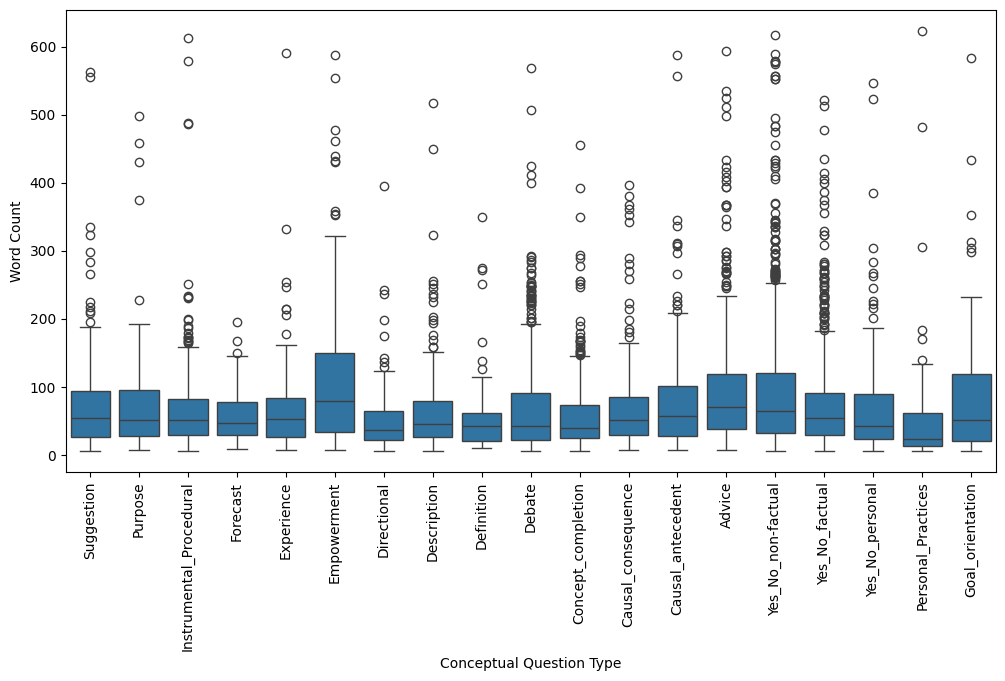

<ipython-input-8-b3a535e720af>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_stats.index, y=grouped_stats['mean'], palette="Blues")


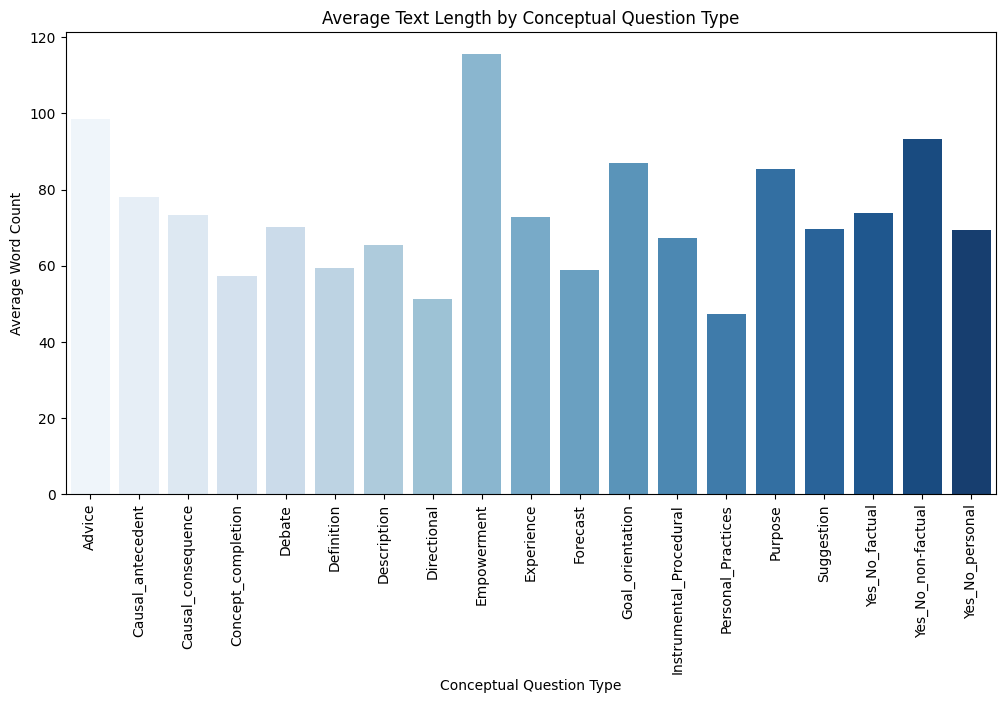

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas options to display entire width of output
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Ensure 'word_count' is numeric
data['word_count'] = pd.to_numeric(data['word_count'], errors='coerce')
data = data.dropna(subset=['word_count'])  # Remove missing values

# Group by 'Conceptual Question Type' and calculate summary statistics
grouped_stats = data.groupby('Conceptual Question Type')['word_count'].describe()

# Print summary statistics
print("Descriptive Statistics of Word Count by Conceptual Question Type:")
print(grouped_stats)


# Boxplot to visualize distribution
plt.figure(figsize=(12,6))
sns.boxplot(x='Conceptual Question Type', y='word_count', data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel("Conceptual Question Type")
plt.ylabel("Word Count")
#plt.title("Distribution of Text length by Conceptual Question Type")
plt.show()



# Reset pandas display options to default if necessary
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

Descriptive Statistics of Word Count by Conceptual Question Type:
                           count        mean         std   min    25%   50%     75%    max
Conceptual Question Type                                                                  
Advice                     452.0   98.446903   92.491717   8.0  38.00  71.0  119.25  594.0
Causal_antecedent          323.0   78.009288   73.033877   7.0  28.50  58.0  101.00  587.0
Causal_consequence         217.0   73.414747   70.529042   8.0  29.00  52.0   85.00  397.0
Concept_completion         451.0   57.263858   53.612096   6.0  24.50  40.0   73.00  455.0
Debate                     602.0   70.033223   71.759389   6.0  22.00  43.0   91.50  568.0
Definition                  73.0   59.273973   64.254109  10.0  21.00  42.0   62.00  349.0
Description                216.0   65.527778   67.224505   6.0  26.00  46.0   79.00  517.0
Directional                142.0   51.352113   50.763280   6.0  22.00  36.5   65.00  395.0
Empowerment             

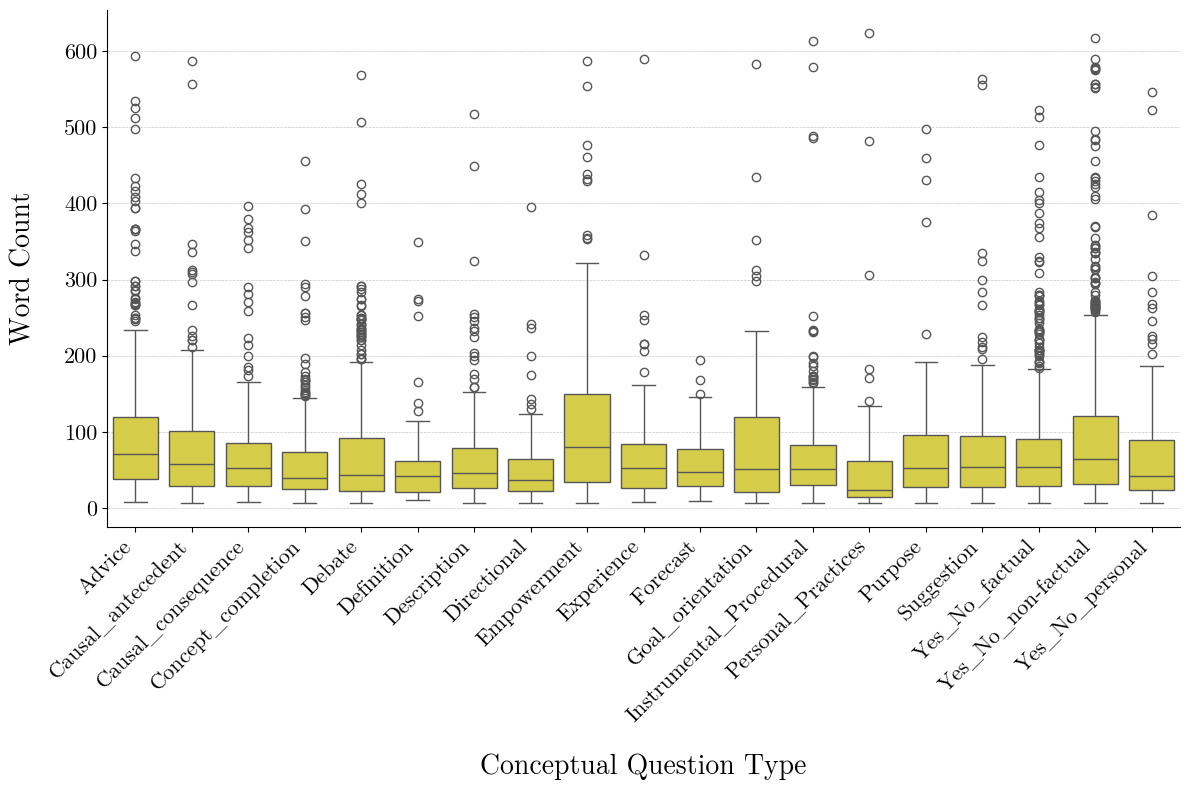

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Set pandas options to display entire width of output
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# --- Data Preparation ---
# Ensure 'word_count' is numeric and drop missing values
data['word_count'] = pd.to_numeric(data['word_count'], errors='coerce')
data = data.dropna(subset=['word_count'])

# Group by 'Conceptual Question Type' and print summary statistics
grouped_stats = data.groupby('Conceptual Question Type')['word_count'].describe()
print("Descriptive Statistics of Word Count by Conceptual Question Type:")
print(grouped_stats)

# --- Font and Palette Setup ---
# Specify and add the font file (adjust path as needed)
font_path = 'lmroman10-regular.otf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Latin Modern Roman'

# Choose a specific color from the "colorblind" palette
my_color = sns.color_palette("colorblind")[8]

# --- Create the Boxplot ---
# Increase the figure height for a less stumpy look (e.g., 12x8 inches)
fig, ax = plt.subplots(figsize=(12, 8))

# Order the x-axis categories alphabetically
order = sorted(data['Conceptual Question Type'].unique())

# Create the boxplot with the given order and color
sns.boxplot(x='Conceptual Question Type', y='word_count', data=data, color=my_color, ax=ax, order=order)

# Rotate x-axis labels for readability and set their font size
plt.xticks(rotation=45, ha="right", fontsize=16)

# Set y-tick label size
ax.tick_params(axis='y', labelsize=16)

# Remove top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Set axis labels with specified font sizes and padding
ax.set_xlabel("Conceptual Question Type", fontsize=20, labelpad=20)
ax.set_ylabel("Word Count", fontsize=20, labelpad=20)

# Add horizontal grid lines
ax.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

# Save the figure as a PDF file
fig.savefig("WordCountDistribution.pdf", format="pdf", bbox_inches="tight")

# Reset pandas display options to default if necessary
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

---
* Compute raw feature counts

---

In [23]:
import pandas as pd

# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

feature_counts = data[[
                       # Nouns
                       "nn_count", "ne_count",
                       # Determiners
                       "art_def_count", "art_indef_count",
                       # Verbs
                       "v_pres_ind_count", "v_pres_sub_count", "v_past_ind_count", "v_past_sub_count",
                       "v_inf_count", "v_pp_count",
                       "v_caus_count", "v_comm_count", "v_desire_count", "v_epist_count", "v_exist_count", "v_justif_count", "v_mental_count",
                       # Adjectives
                       "adja_pos_count", "adja_cmp_count", "adja_sup_count",
                       "adjd_pos_count", "adjd_cmp_count", "adjd_sup_count",
                       "adj_attit_count", "adj_descr_count", "adj_mod_count", "adj_soc_count", "adj_tech_count",
                       # Adverbs
                       "adv_general_count", "adv_poss_count", "adv_loc_count", "adv_temp_count", "adv_link_count",
                       # Prepositions
                       "prep_general_count", "prep_loc_temp_count", "prep_mod_count", "prep_caus_count", "prep_contra_count",
                       # Pronouns
                       "pron_dem_count", "pron_ind_count", "pron_pers_1_2_count", "pron_pers_3_count", "pron_poss_count", "pron_rel_count", "pron_adv_count",
                       # Conjunctions / Particles
                       "conj_sub_count", "conj_coor_count", "conj_comp_count",
                       # Others
                       "interj_count", "wh_count", "resp_part_count", "spec_char_count"]
                      ].sum()


# Print feature counts without truncation
print("Feature Counts Across Dataset:")
print(feature_counts)

# Reset pandas display options to default if necessary
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

Feature Counts Across Dataset:
nn_count               63856
ne_count               10955
art_def_count          17039
art_indef_count         8970
v_pres_ind_count       40652
v_pres_sub_count        3022
v_past_ind_count        5135
v_past_sub_count        2918
v_inf_count            16999
v_pp_count              8963
v_caus_count            2452
v_comm_count            2730
v_desire_count           275
v_epist_count            844
v_exist_count           1152
v_justif_count           203
v_mental_count          3762
adja_pos_count          9956
adja_cmp_count           369
adja_sup_count           318
adjd_pos_count         12815
adjd_cmp_count          1089
adjd_sup_count           201
adj_attit_count         4508
adj_descr_count         2661
adj_mod_count            452
adj_soc_count            415
adj_tech_count           153
adv_general_count      25148
adv_poss_count           454
adv_loc_count           2341
adv_temp_count          9387
adv_link_count           757
prep_general

---
* Compute descriptive statistics for each linguistic feature
* Plot boxplot for visualisation
---

Descriptive Statistics for Each Feature:
               nn         ne    art_def  art_indef  v_pres_ind  v_pres_sub  \
mean    10.633805   1.824313   2.837469   1.493755    6.769692    0.503247   
min      0.000000   0.000000   0.000000   0.000000    0.000000    0.000000   
max    103.000000  84.000000  42.000000  19.000000   71.000000   12.000000   
range  103.000000  84.000000  42.000000  19.000000   71.000000   12.000000   
std     10.663012   3.556193   3.683049   1.933910    6.992983    1.038979   

       v_past_ind  v_past_sub      v_inf       v_pp  ...  pron_poss  \
mean     0.855121    0.485928   2.830808   1.492590  ...   0.999001   
min      0.000000    0.000000   0.000000   0.000000  ...   0.000000   
max     53.000000   12.000000  38.000000  30.000000  ...  32.000000   
range   53.000000   12.000000  38.000000  30.000000  ...  32.000000   
std      2.238374    1.009454   3.459630   2.507846  ...   1.903659   

        pron_rel   pron_adv   conj_sub  conj_coor  conj_comp   

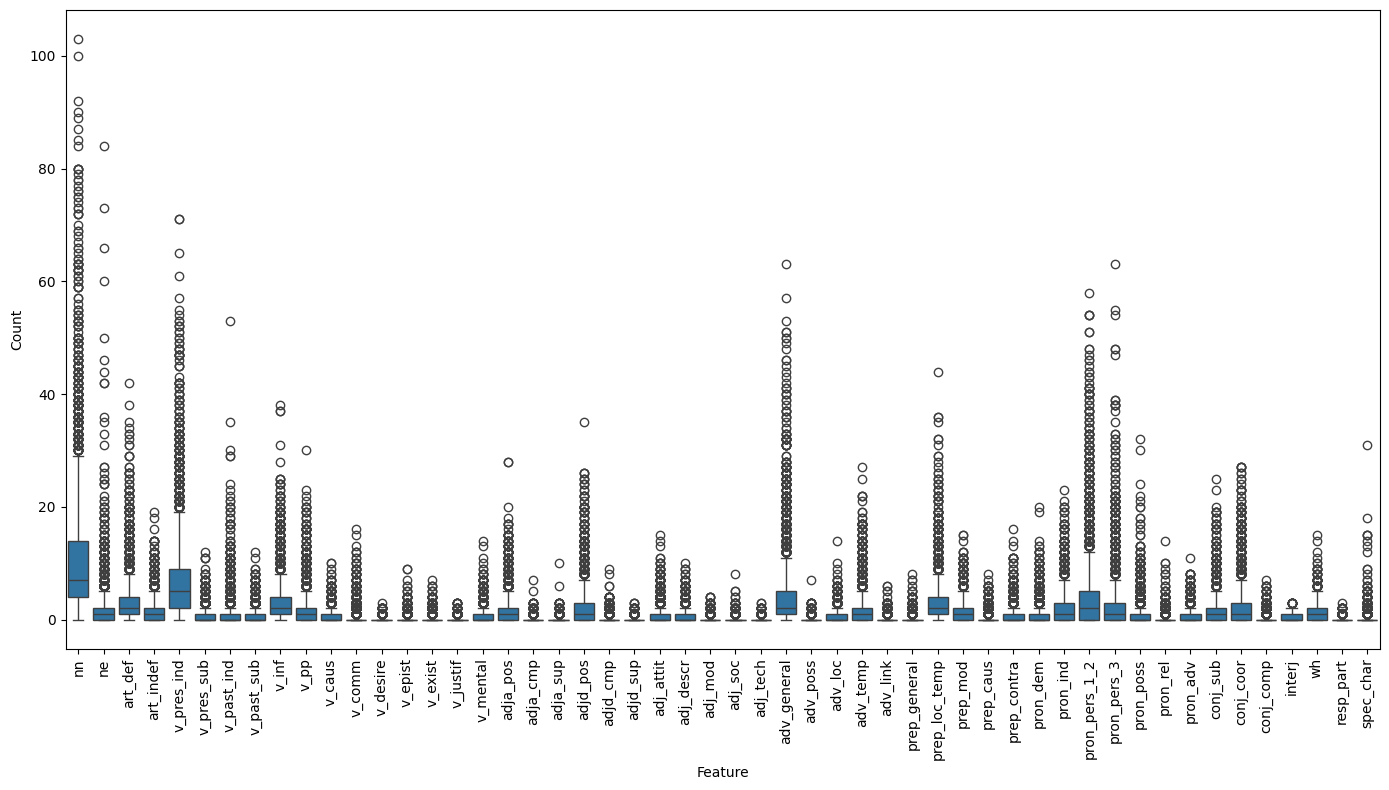

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of feature columns (with the '_count' suffix)
feature_columns = [
    # Nouns
    "nn_count", "ne_count",
    # Determiners
    "art_def_count", "art_indef_count",
    # Verbs
    "v_pres_ind_count", "v_pres_sub_count", "v_past_ind_count", "v_past_sub_count",
    "v_inf_count", "v_pp_count",
    "v_caus_count", "v_comm_count", "v_desire_count", "v_epist_count", "v_exist_count", "v_justif_count", "v_mental_count",
    # Adjectives
    "adja_pos_count", "adja_cmp_count", "adja_sup_count",
    "adjd_pos_count", "adjd_cmp_count", "adjd_sup_count",
    "adj_attit_count", "adj_descr_count", "adj_mod_count", "adj_soc_count", "adj_tech_count",
    # Adverbs
    "adv_general_count", "adv_poss_count", "adv_loc_count", "adv_temp_count", "adv_link_count",
    # Prepositions
    "prep_general_count", "prep_loc_temp_count", "prep_mod_count", "prep_caus_count", "prep_contra_count",
    # Pronouns
    "pron_dem_count", "pron_ind_count", "pron_pers_1_2_count", "pron_pers_3_count", "pron_poss_count", "pron_rel_count", "pron_adv_count",
    # Conjunctions / Particles
    "conj_sub_count", "conj_coor_count", "conj_comp_count",
    # Others
    "interj_count", "wh_count", "resp_part_count", "spec_char_count"
]

# Calculate descriptive statistics for each feature across all texts.
# We compute: mean, min, max, and standard deviation.
stats_df = data[feature_columns].agg(['mean', 'min', 'max', 'std'])

# Compute the range (max - min) for each feature and add it as a new row.
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

# Reorder the rows in the desired order: mean, min, max, range, std.
stats_df = stats_df.loc[['mean', 'min', 'max', 'range', 'std']]

# Rename the columns to drop the '_count' suffix.
stats_df.columns = [col.replace('_count', '') for col in stats_df.columns]

# Print the descriptive statistics with features as columns.
print("Descriptive Statistics for Each Feature:")
print(stats_df)

# Optionally, transpose the DataFrame so that each row corresponds to a feature.
print("\nDescriptive Statistics (Features as rows):")
print(stats_df.T)



# Convert the data to long format for easier plotting
data_long = data[feature_columns].melt(var_name='feature', value_name='count')
# Remove the '_count' suffix for clarity in the plots
data_long['feature'] = data_long['feature'].str.replace('_count', '')

plt.figure(figsize=(14, 8))
sns.boxplot(x='feature', y='count', data=data_long)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

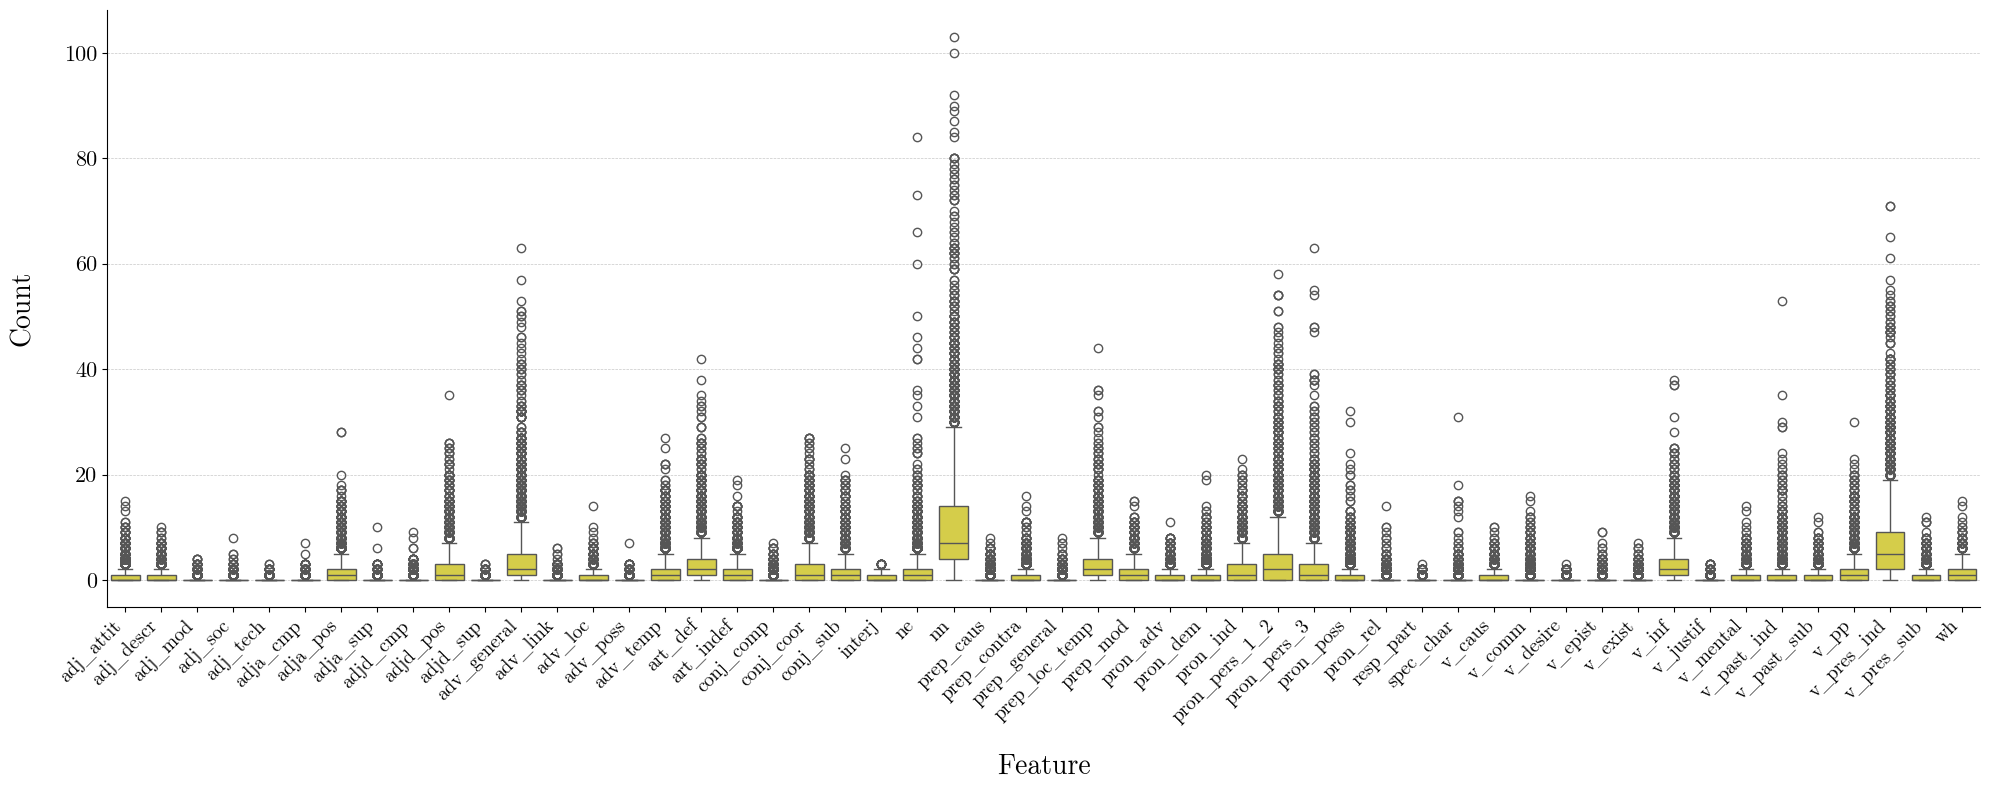

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# --- Data Preparation ---
# Assuming 'data' is already defined and contains your features.
# List of feature columns (with the '_count' suffix)
feature_columns = [
    # Nouns
    "nn_count", "ne_count",
    # Determiners
    "art_def_count", "art_indef_count",
    # Verbs
    "v_pres_ind_count", "v_pres_sub_count", "v_past_ind_count", "v_past_sub_count",
    "v_inf_count", "v_pp_count",
    "v_caus_count", "v_comm_count", "v_desire_count", "v_epist_count", "v_exist_count", "v_justif_count", "v_mental_count",
    # Adjectives
    "adja_pos_count", "adja_cmp_count", "adja_sup_count",
    "adjd_pos_count", "adjd_cmp_count", "adjd_sup_count",
    "adj_attit_count", "adj_descr_count", "adj_mod_count", "adj_soc_count", "adj_tech_count",
    # Adverbs
    "adv_general_count", "adv_poss_count", "adv_loc_count", "adv_temp_count", "adv_link_count",
    # Prepositions
    "prep_general_count", "prep_loc_temp_count", "prep_mod_count", "prep_caus_count", "prep_contra_count",
    # Pronouns
    "pron_dem_count", "pron_ind_count", "pron_pers_1_2_count", "pron_pers_3_count", "pron_poss_count", "pron_rel_count", "pron_adv_count",
    # Conjunctions / Particles
    "conj_sub_count", "conj_coor_count", "conj_comp_count",
    # Others
    "interj_count", "wh_count", "resp_part_count", "spec_char_count"
]

# Convert the data to long format for easier plotting
data_long = data[feature_columns].melt(var_name='feature', value_name='count')
# Remove the '_count' suffix for clarity in the plots
data_long['feature'] = data_long['feature'].str.replace('_count', '')

# Compute sorted order of features alphabetically
order = sorted(data_long['feature'].unique())

# --- Font and Palette Setup ---
# Specify the path to your font file (adjust path as needed)
font_path = 'lmroman10-regular.otf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Latin Modern Roman'

# Choose a specific color from the "colorblind" palette
my_color = sns.color_palette("colorblind")[8]

# --- Create the Boxplot ---
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(x='feature', y='count', data=data_long, order=order, color=my_color, ax=ax)

# Rotate x-axis labels for readability and set their font size
plt.xticks(rotation=45, ha="right", fontsize=14)
ax.tick_params(axis='y', labelsize=16)

# Remove top and right spines for a cleaner look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Set axis labels with specified font sizes and padding
ax.set_xlabel("Feature", fontsize=20, labelpad=20)
ax.set_ylabel("Count", fontsize=20, labelpad=20)

# Add horizontal grid lines
ax.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

# Save the figure as a PDF file
fig.savefig("FeatureCountDistribution.pdf", format="pdf", bbox_inches="tight")

---

* Normalize frequencies (by 100 words) to ensure comparability

---

In [36]:
# List of columns to exclude from normalization (easier than the other way around)
exclude_columns = {
    "adv_specific",
    "Conceptual Question Type",
    "Functional Question Type",
    "prep_specific",
    "question_context",
    "question_id",
    "question_id_individual",
    "question_individual",
    "token_count",
    "word_count",  # Necessary for normalization # switch back to WORD_COUNT
}

# Identify columns to normalize
columns_to_normalize = [col for col in data.columns if col not in exclude_columns and not col.endswith("_freq")]

# Filter rows with word_count > 0 to avoid division by zero
data = data[data["word_count"] > 0]

# Normalize by `word_count` if frequency columns do not already exist (normalise by 100 words)
if not any(col + "_freq" in data.columns for col in columns_to_normalize):
    for col in columns_to_normalize:
        data[col + "_freq"] = data[col] / data["word_count"] * 100 # 100 because of mostly short texts (under 500 words)

# Extract normalized frequency columns dynamically
frequencies = [col for col in data.columns if col.endswith("_freq")]
feature_data = data[frequencies]

# Output the frequency data for inspection
print(feature_data.head())
print(data.columns)  # Check available columns

   nn_count_freq  ne_count_freq  art_def_count_freq  art_indef_count_freq  \
0       8.750000       0.000000            5.000000              2.500000   
1      12.755102       8.163265            2.040816              1.020408   
2      16.666667       0.000000            4.166667              4.166667   
3      16.666667       0.000000            0.000000              4.761905   
4      16.842105       0.000000            1.052632              1.052632   

   v_pres_ind_count_freq  v_pres_sub_count_freq  v_past_ind_count_freq  \
0              12.500000               2.500000                    0.0   
1               7.142857               0.510204                    0.0   
2               8.333333               0.000000                    0.0   
3               9.523810               0.000000                    0.0   
4               8.421053               4.210526                    0.0   

   v_past_sub_count_freq  v_inf_count_freq  v_pp_count_freq  ...  \
0               0.000000

---
* Standardize features to mean of 0 and standard deviation of 1

---

In [37]:
from sklearn.preprocessing import StandardScaler

# Standardize feature data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(feature_data)

---
* Compute feature variances: Factor analysis requires that features have sufficient variance. If some features have zero or near-zero variance, it could cause issues during matrix decomposition.

---

In [38]:
# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Calculate variance for each feature
variances = feature_data.var()
print("Feature variances:")
print(variances)

# Check for zero or near-zero variance
low_variance_features = variances[variances < 1e-6]
print("Low-variance features:")
print(low_variance_features)

# Reset pandas display options to default if necessary
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

Feature variances:
nn_count_freq               32.927000
ne_count_freq               22.560353
art_def_count_freq          13.432098
art_indef_count_freq         7.170991
v_pres_ind_count_freq       12.990633
v_pres_sub_count_freq        1.303142
v_past_ind_count_freq        2.412841
v_past_sub_count_freq        2.129796
v_inf_count_freq            13.222778
v_pp_count_freq              4.782923
v_caus_count_freq            1.721316
v_comm_count_freq            1.454305
v_desire_count_freq          0.147864
v_epist_count_freq           0.406277
v_exist_count_freq           1.061883
v_justif_count_freq          0.150193
v_mental_count_freq          2.946944
adja_pos_count_freq          8.346141
adja_cmp_count_freq          0.374744
adja_sup_count_freq          0.532275
adjd_pos_count_freq          9.416632
adjd_cmp_count_freq          1.083400
adjd_sup_count_freq          0.287165
adj_attit_count_freq         4.102725
adj_descr_count_freq         2.192435
adj_mod_count_freq           0.

---

* Remove low-variance features (if they exist)

---

In [ ]:
if not low_variance_features.empty:
    feature_data = feature_data.drop(columns=low_variance_features.index)
    scaled_data = StandardScaler().fit_transform(feature_data)

---
* Plot scree plot to determine number of factors
* Compute factor loadings
* Carry out varimax and promax rotation to decide which one to choose
* Compute variance explained by each factor
---

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


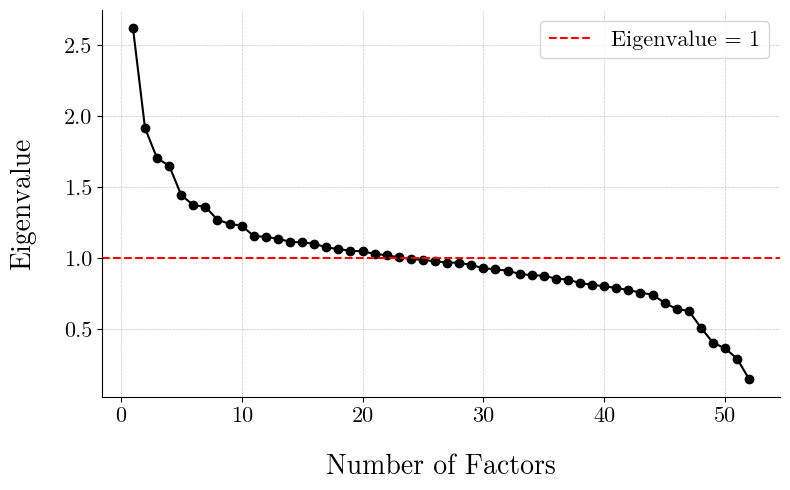


=== Factor Analysis with VARIMAX Rotation ===


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Factor Loadings (high loadings > 0.30 are salient):


,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7
v_pres_ind_count_freq,0.222068,0.947611,-0.143706,0.049651,0.213684,-0.015443,-0.044124
nn_count_freq,-0.816535,-0.130604,-0.394869,-0.183862,0.254570,-0.241679,-0.068583
pron_pers_1_2_count_freq,0.269608,-0.055149,0.115252,0.012706,0.451375,0.643074,-0.000756
ne_count_freq,0.063236,-0.063889,-0.144973,-0.140990,-0.621887,0.218198,-0.171560
wh_count_freq,0.073266,0.135131,-0.030564,-0.070750,0.038755,-0.226463,-0.600137
adj_attit_count_freq,-0.047516,0.006667,0.026384,0.534022,0.004387,0.013918,-0.217827
v_inf_count_freq,-0.091055,0.008624,0.509963,-0.088639,0.024003,0.070147,0.016530
adjd_pos_count_freq,0.075285,0.065376,0.106766,0.460231,0.000274,-0.060033,0.142778
v_past_sub_count_freq,-0.017085,-0.204519,0.381854,-0.078182,0.013079,-0.002088,-0.059610
v_past_ind_count_freq,0.235130,-0.328342,-0.072991,-0.028800,0.104065,-0.019519,0.107458



Variance Explained by Each Factor:


,Explained Variance
Factor 1,0.028685
Factor 2,0.025354
Factor 3,0.018971
Factor 4,0.018919
Factor 5,0.018755
Factor 6,0.017538
Factor 7,0.017150



=== Factor Analysis with PROMAX Rotation ===


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Factor Loadings (high loadings > 0.30 are salient):


,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7
v_pres_ind_count_freq,1.091746,0.047139,-0.424162,0.207086,0.060257,-0.068802,-0.018238
nn_count_freq,0.066414,-0.928539,-0.355582,0.438573,-0.200594,-0.037374,-0.155979
ne_count_freq,-0.107657,0.220173,-0.144163,-0.687511,-0.118133,0.152088,0.215390
pron_pers_1_2_count_freq,-0.099106,0.113170,0.195039,0.420818,-0.011348,0.058429,0.634376
wh_count_freq,0.084139,0.110516,0.009295,0.056346,-0.028244,0.610405,-0.222282
v_inf_count_freq,-0.099522,-0.123366,0.572416,0.053056,-0.117244,0.037614,0.088127
adj_attit_count_freq,-0.029366,-0.021658,0.030860,0.020950,0.548515,0.252794,0.001462
v_past_sub_count_freq,-0.328976,0.010103,0.497914,0.022868,-0.090801,0.134585,0.002147
adjd_pos_count_freq,0.047709,0.091345,0.048912,-0.016831,0.459034,-0.114696,-0.088597
v_past_ind_count_freq,-0.363451,0.282489,0.002704,0.052102,-0.022142,-0.058088,-0.051052



Variance Explained by Each Factor:


,Explained Variance
Factor 1,0.032092
Factor 2,0.031897
Factor 3,0.024182
Factor 4,0.021307
Factor 5,0.019407
Factor 6,0.017153
Factor 7,0.017095


In [43]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from IPython.display import display

# Ensure scaled_data is a DataFrame (assuming scaled_data and feature_data are defined)
scaled_data = pd.DataFrame(scaled_data, columns=feature_data.columns)

# Compute eigenvalues for the Scree Plot
fa = FactorAnalyzer()
fa.fit(scaled_data)
eigenvalues, _ = fa.get_eigenvalues()

# --- Font and Style Setup ---
font_path = 'lmroman10-regular.otf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Latin Modern Roman'

# --- Create the Scree Plot ---
fig, ax = plt.subplots(figsize=(8, 5))
# Plot eigenvalues with markers and a connecting line
ax.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker="o", linestyle="-", color="black")
# Plot horizontal line at eigenvalue = 1
ax.axhline(y=1, color="r", linestyle="--", label="Eigenvalue = 1")

# Set axis labels with larger fonts and extra padding
ax.set_xlabel("Number of Factors", fontsize=20, labelpad=20)
ax.set_ylabel("Eigenvalue", fontsize=20, labelpad=20)

# Set tick label sizes
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)

# Add legend with adjusted font sizes
ax.legend(fontsize=16, title_fontsize=20)

# Add grid lines (dashed) on both axes
ax.grid(axis="both", linestyle="--", linewidth=0.5, alpha=0.7)

# Remove top and right spines for a cleaner look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

# Save the scree plot as a PDF file
fig.savefig("ScreePlot.pdf", format="pdf", bbox_inches="tight")


# Decide number of factors (manually based on Scree Plot)
num_factors = 7  # Adjust this based on the plot

# Try both Varimax (orthogonal) and Promax (oblique)
rotations = ["varimax", "promax"]
for rotation in rotations:
    print(f"\n=== Factor Analysis with {rotation.upper()} Rotation ===")

    fa = FactorAnalyzer(n_factors=num_factors, rotation=rotation)
    fa.fit(scaled_data)

    # Extract factor loadings
    loadings = pd.DataFrame(
        fa.loadings_,
        index=scaled_data.columns,
        columns=[f"Factor {i+1}" for i in range(num_factors)]
    )

    # Sort loadings by highest absolute value for readability
    sorted_loadings = loadings.abs().max(axis=1).sort_values(ascending=False)
    loadings = loadings.loc[sorted_loadings.index]

    # Function to apply color formatting based on thresholds
    def highlight_values(val):
        abs_val = abs(val)
        if abs_val >= 0.30:
            return 'background-color: red'
        elif abs_val >= 0.20:
            return 'background-color: orange'
        elif abs_val >= 0.10:
            return 'background-color: yellow'
        return ''

    # Display loadings in Jupyter properly with color formatting
    print("Factor Loadings (high loadings > 0.30 are salient):")
    display(loadings.style.map(highlight_values))

    # Get variance explained by each factor
    variance_explained = pd.DataFrame(
        {"Explained Variance": fa.get_factor_variance()[1]},
        index=[f"Factor {i+1}" for i in range(num_factors)]
    )
    print("\nVariance Explained by Each Factor:")
    display(variance_explained)

---
Compute factor correlations

---

In [44]:
factor_correlation_matrix = pd.DataFrame(
    fa.loadings_.T @ fa.loadings_,  # This computes the correlation matrix
    index=[f"Factor {i+1}" for i in range(num_factors)],
    columns=[f"Factor {i+1}" for i in range(num_factors)]
)

print("Factor Correlation Matrix:")
display(factor_correlation_matrix)

Factor Correlation Matrix:


,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7
Factor 1,1.668781,-0.161599,-0.622278,0.234744,0.119334,-0.070350,-0.125681
Factor 2,-0.161599,1.658621,0.231817,-0.390673,0.192212,-0.002643,0.099399
Factor 3,-0.622278,0.231817,1.257477,0.042305,-0.024859,0.086380,0.251846
Factor 4,0.234744,-0.390673,0.042305,1.107958,0.030979,-0.102409,0.057023
Factor 5,0.119334,0.192212,-0.024859,0.030979,1.009153,0.082531,-0.048479
Factor 6,-0.070350,-0.002643,0.086380,-0.102409,0.082531,0.891956,-0.101310
Factor 7,-0.125681,0.099399,0.251846,0.057023,-0.048479,-0.101310,0.888964


---
Create table for factor loadings

---

In [47]:
import pandas as pd

# Convert factor loadings into a DataFrame
factor_loadings = pd.DataFrame(
    fa.loadings_,
    index=scaled_data.columns,
    columns=[f"Factor {i+1}" for i in range(fa.n_factors)]
)

# Save to CSV
factor_loadings.to_csv("factor_loadings.csv")

print("Factor loadings saved as factor_loadings.csv.")

Factor loadings saved as factor_loadings.csv.


---

* Compute factor scores to merge with Conceptual Question Types

---

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Set pandas options to display all rows and columns and max width
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 1) Load data
factor_loadings = pd.read_csv("factor_loadings.csv", index_col=0)
enriched_data = pd.read_csv("enriched_data.csv")

# Standardize column/index names
factor_loadings.columns = factor_loadings.columns.str.strip()
factor_loadings.index = factor_loadings.index.str.strip()
enriched_data.columns = enriched_data.columns.str.strip()

# Remove `_freq` suffix from factor_loadings feature names
factor_loadings.index = factor_loadings.index.str.replace("_freq", "", regex=False).str.strip()

# 2) Identify feature columns
feature_columns = enriched_data.columns[enriched_data.columns.get_loc("nn_count"):].str.strip()

# Ensure features match
features_in_loadings = set(factor_loadings.index)
features_in_enriched = set(feature_columns)
common_features = list(features_in_loadings & features_in_enriched)
if not common_features:
    raise ValueError("No common features found between factor loadings and enriched data!")

factor_loadings = factor_loadings.loc[common_features]

columns_to_keep = ["question_id", "Conceptual Question Type", "question_context", "question_individual", "word_count"] + common_features
enriched_data = enriched_data[columns_to_keep]

# 3) Standardize the features.
# do NOT standardize question_id, question_context, or question type.
scaler = StandardScaler()
enriched_data[common_features] = scaler.fit_transform(enriched_data[common_features])

# 4) Assign each feature to its most strongly associated factor
threshold = 0.1
feature_to_factor = {}
for feature in factor_loadings.index:
    max_factor = factor_loadings.loc[feature].abs().idxmax()
    if abs(factor_loadings.loc[feature, max_factor]) >= threshold:
        feature_to_factor[feature] = max_factor

# 5) Create df_factor_scores with a row per question
df_factor_scores = enriched_data.copy()  # keep original columns
factor_names = factor_loadings.columns.tolist()

# Initialize new factor columns with zero
for f_name in factor_names:
    df_factor_scores[f_name] = 0.0

# Sum standardised feature values for their assigned factors
for idx, row in df_factor_scores.iterrows():
    for feature, factor in feature_to_factor.items():
        df_factor_scores.at[idx, factor] += row[feature]


# Filter for questions with word_count above 100
short_questions = df_factor_scores[df_factor_scores["word_count"] <= 100].copy()

print(f"Number of questions with <= 100 words: {len(short_questions)}")


# Example: retrieve top/bottom scoring questions for each factor
for factor in factor_names:
    # Sort descending to see top-scoring (highest) texts
    sorted_desc = short_questions.sort_values(by=factor, ascending=False)
    top = sorted_desc.head(10)
    print(f"=== Factor: {factor} | Top 10 (Highest Scores) ===")
    display(top[["question_id", "Conceptual Question Type", "question_context", "question_individual", "word_count", factor]])

    # Sort ascending to see bottom-scoring (lowest or negative) texts
    sorted_asc = short_questions.sort_values(by=factor, ascending=True)
    bottom = sorted_asc.head(50)
    print(f"=== Factor: {factor} | Bottom 10 (Lowest/Negative Scores) ===")
    display(bottom[["question_id", "Conceptual Question Type", "question_context", "question_individual", "word_count", factor]])

    print("\n" + "="*80 + "\n")


pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')
pd.reset_option('display.width')

Number of questions with <= 100 words: 4649
=== Factor: Factor 1 | Top 10 (Highest Scores) ===


,question_id,Conceptual Question Type,question_context,question_individual,word_count,Factor 1
2645,3bf14295-ff45-4ab5-958c-d491bee56092,Yes_No_factual,"kann man diese ganzen Spiele auch auf windows 11 spielen ? Auf Instant Gaming ( wo ich immer Games kaufe ) stehen bei vielen spielen das man sie auf Windows 10 spielen kann , aber da steht nichts von Windows 11 . Also ich hab noch kein Spiel auch kein sehr neues gefunden , wo steht das man es auf Windows 11 spielen kann . Heißt das das man das nicht darauf spielen kann oder das man mindestens Windows 10 braucht um es spielen zu können und es auch auf 11 spielen kann ?",kann man diese ganzen Spiele auch auf windows 11 spielen ?,94,6.633881
874,e97d6314-56ce-47d2-927f-27a4a0d21603,Yes_No_factual,"Haben Kirchen auf die Information Zugriff , ob man in einer Kirche ist oder nicht ? Das ist keine Vorwurfsfrage . Es bezieht sich nur darauf , dass wir manchmal Flyer bekommen in denen Gott und Jesus als etwas Tolles dargestellt wird und sozusagen Werbung gemacht wird . Wir sind alle Atheisten und was sollten Religiöse damit ? Sie wissen das ja schon . Deswegen frage ich mich : Haben Kirchen Zugriff auf diese Information oder bekommt jeder diese Flyer ?","Haben Kirchen auf die Information Zugriff , ob man in einer Kirche ist oder nicht ?",81,4.662834
2890,d85b7c09-7754-4a6e-93da-0e1131853d16,Yes_No_factual,"Stimmt es dass Binden , Tampons etc die Periode verlängern ? Hab so nen Tiktoker ( den ich sonst immer für sympathisch hielt ) gesehen der das behauptet dass da so komische Chemikalien drin seien die das verlängern . Die Konzerne sollen damit mehr Geld machen , da mehr Produkte gebraucht werden . Ganz ehrlich ich halte das eher für eine ziemlich weit daher geholte Behauptung und schenke dem kein Glauben . Würd mich aber trotzdem mal interessieren ob das stimmt . Ich glaube eher nicht","Stimmt es dass Binden , Tampons etc die Periode verlängern ?",86,4.455059
2051,f5ebf44e-9dc7-49b0-976d-c948c104158b,Yes_No_non-factual,"Wenn ich nach Jahren nicht mit der Partnerin zusammenziehen möchte - ist das dann nicht die Richtige ? Was denkt ihr steckt dahinter ? Sollte man Schluss machen und mit der Richtigen möchte man dann gerne Zusammenziehen ? Aber trügt das nicht , vor allem am Anfang wenn man verliebt ist ? Liegt das eher an einem selber oder weil man fühlt das die Partnerin nicht die Richtige ist ? Wenn man bereits über 3 Jahre zusammen ist . . .",Wenn ich nach Jahren nicht mit der Partnerin zusammenziehen möchte - ist das dann nicht die Richtige ?,81,4.266178
1569,2ddd049d-90d1-490c-bf48-dc5c31bdf3a8,Yes_No_non-factual,"Ist es richtig wenn jemand Mord begangen hat und schuldunfähig ist , dass er stärker bestraft wird ? Normalerweise kommt man bei Mord nach 15 Jahre raus , wie ist es wenn jemand 3 Leute ermordet ist es 3 mal lebenslänglich also 45 Jahre ? Und bei Schuldunfähigkeit kommt man bekanntlich nicht mehr aus einer Geschlossenen . Auch wenn man gesund wird , das würde sich allerdings widersprechen . Wieso sagen dann Leute dass jemand dauerhaft untergebracht wird . Das darf man doch nicht sagen , weil das ja heissen würde dass die Psychiatrie nichts bringt .","Ist es richtig wenn jemand Mord begangen hat und schuldunfähig ist , dass er stärker bestraft wird ?",97,4.256005
177,cfdf8813-6a4e-4881-9937-299e106a6701,Instrumental_Procedural,"Wie komme ich an Videos von einem gesperrtem Konto ? Mein TikTok Konto wurde gesperrt und ich weiß nicht warum . Ich habe schon Widerspruch eingelegt aber das hat nichts gebracht . Es steht auch überall das man benachrichtigt wird und all das , aber das war bei mir nicht der Fall . Und ich habe viele private Videos die ich gerne wieder hätte aber ich habe sie vergessen zu speichern . Außerdem würde ich gerne einfach das Konto behalten da es sehr toll war . Habt ihr ideen wie ich an die Videos ran komme ?",Habt ihr ideen wie ich an die Videos ran komme ?,97,4.208273
173,d62cc8f6-1969-4916-9979-8d64d7f48c02,Instrumental_Procedural,"An loser Spange is

=== Factor: Factor 1 | Bottom 10 (Lowest/Negative Scores) ===


,question_id,Conceptual Question Type,question_context,question_individual,word_count,Factor 1
2084,65619312-9300-4294-b0f5-221aea4a0b99,Yes_No_non-factual,Würde die Menschheit den dritten Weltkrieg überleben ?,Würde die Menschheit den dritten Weltkrieg überleben ?,8,-2.810687
5679,88ee2132-fad4-4fd0-a2fc-8cf0521cc859,Debate,Passen zu 15-jährigen Jungs eher Toms oder Sandalen ?,Passen zu 15-jährigen Jungs eher Toms oder Sandalen ?,9,-2.810687
2915,44ea5ec4-58c1-4c40-ab15-ec25c3484539,Yes_No_factual,Gravis Akkuwechsel Original Akku ? Verbaut Gravis bei einem Akkuwechsel einen originalen Apple Akku mit Garantie ?,Verbaut Gravis bei einem Akkuwechsel einen originalen Apple Akku mit Garantie ?,17,-2.810687
2917,b9a1366b-c6f8-4650-bda8-804cd22565e9,Yes_No_factual,Verringert Zucker in einem Tee mit Koffein die wachmachende Wirkung ? LG [ANONYMIZED],Verringert Zucker in einem Tee mit Koffein die wachmachende Wirkung ?,15,-2.810687
2968,f542d442-ef57-4585-8b3c-0d09e22788cc,Yes_No_factual,Würde in ein modernes Kreuzfahrtschiff bei der Kollission mit dem Eisberg von der Titanic Wasser eintreten ?,Würde in ein modernes Kreuzfahrtschiff bei der Kollission mit dem Eisberg von der Titanic Wasser eintreten ?,17,-2.810687
1025,aa6872e7-395a-4d68-beea-fc9e87fc3a21,Yes_No_personal,Seid ihr auf der Suche nach einem/eine Freund/Freundin ?,Seid ihr auf der Suche nach einem/eine Freund/Freundin ?,13,-2.810687
997,a51bf005-2e52-4770-8134-2b2dd0b14755,Yes_No_personal,Leidest du unter Klaustrophobie ( Platzangst ) ?,Leidest du unter Klaustrophobie ( Platzangst ) ?,8,-2.810687
990,e2aa6cab-7bb6-48fa-b7ea-73bcb2ec4547,Yes_No_personal,Könnt ihr gut mit Kritik umgehen ?,Könnt ihr gut mit Kritik umgehen ?,7,-2.810687
917,66e48010-8ea3-48e8-8e5e-f7be543006d5,Yes_No_personal,Habt ihr mal nach einer Werbung ein Produkt gekauft und es bereut ?,Habt ihr mal nach einer Werbung ein Produkt gekauft und es bereut ?,13,-2.810687
905,ac6e552b-35c0-4171-853e-d325e8894018,Yes_No_personal,Guckt ihr gerne so Gerichtsshows ? Bevorzuge Richter Alexander Hold auf Youtube . .,Guckt ihr gerne so Gerichtsshows ?,14,-2.810687




=== Factor: Factor 2 | Top 10 (Highest Scores) ===


,question_id,Conceptual Question Type,question_context,question_individual,word_count,Factor 2
2897,62860d35-9b0b-4843-ae7c-3ae6e1cc3d4d,Yes_No_factual,"Exegese und Gesetzestexte ? Exegese : Im Islam gibt es ja Koranexegese namens Tafsir , die Erläuterungen und Interpretationen jeder Sure des Islams abgegeben . Gibt es denn auch exegesische Schriften im Christen-und Judentum für die Bibel und Thora ? Gesetzestexte : Im Islam gibt es ja die Sunna , die als islamische Rechtsquelle/Jurisprudenz gilt und Normen vermittelt . Gibt es im Christen-und Judentum auch Schriftquellen , die der islamischen Sunna ähneln ? Überlieferungen : Sind die islamischen Hadithe das Gleiche wie der jüdische Talmud und die christlichen Apostelgeschichten ? Oder gibt es da Unterschiede ?",Überlieferungen Sind die islamischen Hadithe das Gleiche wie der jüdische Talmud und die christlichen Apostelgeschichten ?,98,9.434151
3608,08d9eeb0-b7ff-4ddd-9abe-46642489d212,Forecast,"Auto als Fahranfänger ? Moin , ich werde nächstes Jahr ein FSJ absolvieren und da ich zur Arbeitsstelle nur mit dem Auto komme würde es mich mal interessieren welche Möglichkeiten ich als Fahranfänger habe . Hätte ca . 300 € Budget pro Monat für das Auto Würde es bei meinen Eltern als Drittwagen ( 40% ) anmelden . Würde es bevorzugen eins auszuleihen , doch welche Anbieter verleihen überhaupt an Fahranfänger ? Mit was für monatlichen Kosten muss ich rechnen ? LG [ANONYMIZED]",Mit was für monatlichen Kosten muss ich rechnen ?,86,8.729977
5229,01eb4b8d-f24b-49b7-840f-fbe9eaf0b603,Advice,"Rechnung als Privatperson an Firma ausstellen nach abgeführter MwSt , was ist zu beachten ? Hallo Ich habe Schmuck an eine Vintage Firma gegeben ( ohne Rechnung ) und ihnen den Auftrag gegeben es zu verkaufen nun haben sie es verkauft und die Mehrwertsteuer schon abgeführt muss ich jetzt nach dem Verkauf nochmals Mehrwertssteuer abführen oder lediglich hinzu schreiben das die Gbr die abfuhr der MwSt schon getätigt hat ? nach der abfuhr handelt es sich um 550 , 70 Ich agiere als Privatperson ohne angemeldetes Gewerbe und es war ein einmaliger Verkauf Liebe Grüße [ANONYMIZED]","Rechnung als Privatperson an Firma ausstellen nach abgeführter MwSt , was ist zu beachten ?",99,8.686011
2592,7ef49c82-ad9f-4ba0-91ee-712945f996b9,Yes_No_factual,"Kann ich mich als he/they identifizieren ? Ich lebe ja jetzt optisch als Junge und fühle mich auch iwie so . Ich bin eigentlich als Mädchen geboren , aber ich will mich nicht direkt komplett als Junge bezeichnen , weil ich mich manchmal wie nix von beiden fühle und sowieso nicht als Mädchen . Diese Sache mit den Pronomen ist für mich selber bisschen kompliziert Meint ihr ich kann mich als he/they identifizieren ?",Kann ich mich als he/they identifizieren ?,79,8.546998
2688,669ef1a3-6e7f-4b9d-9c24-ca7163e6ae73,Yes_No_factual,Kann man seinen Wert als Mann während realen Treffen mit einer Frau neu festlegen wenn man schriftlich der Diener war ? Ich habe vier Jahre eine Fernbeziehung geführt . Jetzt kommt s zum Wiedersehen nach vier Jahren . Schriftlich habe ich aus Angst vor Verlusten immer nachgegeben . War unmännlich . Sie hat immer gefordert und gemacht es sie will . Kann ich jetzt in dem beginnenden realen Kontakt meinen Wert als Mann neu festlegen und Grenzen aufzeigen oder von ich trotzdem weiter für sie der Diener ?,Kann man seinen Wert als Mann während realen Treffen mit einer Frau neu festlegen wenn man schriftlich der Diener war ?,89,8.184459
1033,da56844e-1be8-481c-aeef-dc9169215442,Yes_No_personal,"Suche ein bestimmtes Game Genre kann da wer helfen ? Hallo , ich habe vor langer Zeit mal bei Starcraft II ein Game im Arcade Modus gespielt welches Probes vs Zealot heißt . Aufm Handy habe ich jetzt ein ähnliches Game gefunden welches Silent Castle heißt . Suche das Spielgenre welches hinter diesen Games steckt . Außer mir kann natürlich jemand ein Game dieser Art empfehlen welches online gezockt werden kann sprich PvP gegen reale Spieler wenn möglich mit einer beständ

=== Factor: Factor 2 | Bottom 10 (Lowest/Negative Scores) ===


,question_id,Conceptual Question Type,question_context,question_individual,word_count,Factor 2
4012,1b5e9eb2-1015-4bcf-94e5-ea8089279bc4,Description,Welche Kurzfrisur ( m ) ist derzeit super trendig ? Was glaubt Ihr ?,Welche Kurzfrisur ( m ) ist derzeit super trendig ?,14,-5.923866
4960,16581299-ba58-4fe7-8871-714166b03f86,Causal_antecedent,Warum ist Albanien eigentlich so arm ?,Warum ist Albanien eigentlich so arm ?,7,-5.923866
4001,646f82ac-a5f5-457a-b9d0-d18084d0fe85,Description,Was meint das WEF damit ?,Was meint das WEF damit ?,6,-5.923866
3894,f38b367c-5616-4524-8097-334ebf0a1c2d,Directional,Wo kann man sao staffel 4 schauen ? Danke schonmal,Wo kann man sao staffel 4 schauen ?,10,-5.923866
3706,3cd65ba5-4cc1-4c52-a9d2-93eceff6c94f,Empowerment,Anders mich befriedigen ? Hallo wie kann ich M16 mich anders befriedigen ?,Hallo wie kann ich M16 mich anders befriedigen ?,13,-5.923866
4779,93c3099c-f250-4a06-ba7c-320509611eb7,Causal_consequence,Was passiert wenn ich zu viel verdränge ?,Was passiert wenn ich zu viel verdränge ?,8,-5.923866
5255,729ee9ad-34e6-4e53-84fd-7fc044b41635,Advice,"Was , kann man tun wenn man oberflächlich ist ?","Was , kann man tun wenn man oberflächlich ist ?",10,-5.923866
237,e7a9cd00-beca-47c9-a93a-d492886edf90,Instrumental_Procedural,"Kann mir jemand sagen , wie man das herleitet ?","Kann mir jemand sagen , wie man das herleitet ?",11,-5.923866
3999,0ba40272-29fd-45d4-91a3-f5badf67abd4,Description,Was macht eigentlich der Hackl Schorsch ?,Was macht eigentlich der Hackl Schorsch ?,7,-5.923866
264,0394a9ce-0b36-45ae-920d-1a75d2b44c1a,Instrumental_Procedural,Weiß wer wie man das ausrechnet ? Nummer845,Weiß wer wie man das ausrechnet ?,8,-5.923866




=== Factor: Factor 3 | Top 10 (Highest Scores) ===


,question_id,Conceptual Question Type,question_context,question_individual,word_count,Factor 3
2658,d79d9c3e-3933-409c-8b59-ce65e00e9e49,Yes_No_factual,"Kann man im Schlaf geimpft werden ? Ich habe Probleme mit der Corona-Impfung ( bin nach der ersten umgekippt ) und nachdem meine zweite Impfung beim Hausarzt auch nicht viel besser verlaufen ist , wollte ich wissen , ob es möglich ist , sich im Schlaf impfen zu lassen . Also rein theoretisch . Ich denke nicht , dass das irgendjemand machen würde , und ich würde es für mich auch nicht wollen , aber ich würde gerne mal wissen , ob das irgendwelche Auswirkungen auf den Körper haben würde und ob die Impfung überhaupt wirken würde .",Kann man im Schlaf geimpft werden ?,98,11.759091
2033,8fdbe702-7a9d-4f67-bd64-f7671bb197ac,Yes_No_non-factual,"Würde der Etagenanbau in Ländern wie Indien Sinn machen ? Also , ein anbau , wo ein Aufbau wie im Regenwald ist , bloß mit Nutzpflanzen , würde es auch Sinn neben dem Niel oder neben dem Indus machen , wäre die Erträge zusammen , mit den verschiedenen Bäumen und so höher , wäre es nachhaltiger und besser für den Boden und man bräuchte keinen Dünger mehr ? Wäre es gut obwohl der Arbeitsaufwand höher ist ?",Wäre es gut obwohl der Arbeitsaufwand höher ist ?,77,7.985186
4500,a1d7ac2e-9a90-4610-a049-3d0433a043f6,Concept_completion,Würde deine Religion auch Menschen bekehren die offensichtlich psychische Probleme haben und die alles glauben würden nur damit es ihnen besser geht ? Scientology macht das auf jeden Fall . Dagegen kenne ich christliche Gemeinden die jemanden auch psychologische Hilfe empfehlen . Eine Mitgliedschaft würde man mündigen Menschen nicht abschlagen können wegen Religionsfreiheit . Doch bei Leuten mit Depressionen und Psychosen konkret ein Indoktrinieungsprogramm zu unterziehen . . . wer ist so drauf und zieht das durch ? Oder wer empfiehlt jemanden konkret sich fachmännisch helfen zu lassen wie es zum Beispiel Seelsorger der Kirchen machen würden ?,Doch bei Leuten mit Depressionen und Psychosen konkret ein Indoktrinieungsprogramm zu unterziehen . . . wer ist so drauf und zieht das durch ?,98,7.598865
745,784644b8-67a8-4b53-bc66-10f15d3afd11,Instrumental_Procedural,"genesenschein ? hey , mein vater ist momentan im ausland und muss dringend wieder zurück . nur müsste er sich dann testen und 2 tage warten . da er normalerweise genesen ist müsste er sich ja nicht testen . nur haben wir noch keinen genesenschein beantragt . um einen schein machen zu lassen brauchen wir ja sein positives test ergebnis welches wir leider verloren haben . gibt es irgendeine möglichkeit doch noch einen zu machen ? ich habe meinen positiven test nachweis noch aber mein vater nicht . kann man den durch seine daten eventuell wiederherstellen lassen ?",gibt es irgendeine möglichkeit doch noch einen zu machen ?,98,7.423601
1343,9377ad9a-28ed-4bfa-a8ec-eb50d392f3de,Yes_No_non-factual,"Sport ( Seilspringen ) ? Hallo , ich habe dieses Jahr angefangen Sport zu machen , weil es mir sehr Spaß macht und wenn ich es mache , dann bin ich sehr motiviert . Ich habe bis jetzt 13 Stunden erreicht , aber ich möchte dieses Jahr 240 Stunden erreichen , nicht weil ich abnehmen will oder sonstiges wie gesagt ich mache es nur weil es mir Spaß macht . Glaubt ihr es ist möglich 240 Stunden zu erreichen ? Hat überhaupt so viel Sport Nachteile ? Danke im Voraus !",Hat überhaupt so viel Sport Nachteile ?,91,7.199739
3186,50dee7d9-589a-4156-a721-e0f2675dff8f,Personal_Practices,"Sanktionen gegen Russland zurücknehmen oder kaputt gehen , was würdet ihr wollen ? Wenn der Kreml Putler am 21 . Juli verkündet , dass Deutschland die Gas-Lieferungen erhält , allerdings nur wenn die Sanktionen gegen Russland zurückgenommen werden . Wenn diese nicht zurückgenommen werden , gibt es auch kein Gas . Somit würde Deutschland binnen kurzer Zeit kaputt gehen . Was würdet ihr wollen , wenn Putler Deutschland dieses Angebot macht ? Sanktionen zurücknehmen und Gas erhalten oder kein Gas erhalten und k

=== Factor: Factor 3 | Bottom 10 (Lowest/Negative Scores) ===


,question_id,Conceptual Question Type,question_context,question_individual,word_count,Factor 3
917,66e48010-8ea3-48e8-8e5e-f7be543006d5,Yes_No_personal,Habt ihr mal nach einer Werbung ein Produkt gekauft und es bereut ?,Habt ihr mal nach einer Werbung ein Produkt gekauft und es bereut ?,13,-3.155943
5015,0fe1264f-7714-4836-9d7a-db3050d7122f,Causal_antecedent,Warum sind schwarze Menschen eigentlich so viel krasser als weiße Menschen in Sportarten ?,Warum sind schwarze Menschen eigentlich so viel krasser als weiße Menschen in Sportarten ?,14,-3.155943
3662,9428398b-c114-496f-95a1-42be67840d53,Experience,Ihr seid wohl alle mal vom PC auf Smarty umgestiegen wie habt ihr dies erlebt ?,Ihr seid wohl alle mal vom PC auf Smarty umgestiegen wie habt ihr dies erlebt ?,16,-3.155943
5033,04d60445-128b-41a4-bf92-005f37f72ae3,Causal_antecedent,Warum wird mein Auge Abends und Morgens immer rot ( Bild ) ? Sehr oft Abends und Morgens wir dieser Bereich unten Links von meinem rechten Augapfel immer rot . Was bedeutet das ? Habe ich jetzt schon seeehr lange .,Warum wird mein Auge Abends und Morgens immer rot ( Bild ) ?,41,-3.155943
408,927ff1fd-5834-44bf-b3da-3b7802cfa965,Definition,"hohes piepen im linken Ohr ? hellou Seit 4 Tagen habe ich jetzt zum 4 . Mal ein hohes piepen im linken Ohr . . . kennt sich jemand damit aus was das spirituell bedeutet ? es halt nie lang an , vielleicht 15 Sekunden . . . online kann ich nicht richtig was dazu finden danke schonmal !",Mal ein hohes piepen im linken Ohr . . . kennt sich jemand damit aus was das spirituell bedeutet ?,59,-3.155943
3637,00724b88-dfa0-402b-91b1-66c6998470f7,Forecast,Welche Mannschaft wird Deutscher Meister 22/23 ?,Welche Mannschaft wird Deutscher Meister 22/23 ?,9,-3.155943
1157,aaffc547-3c4f-4115-837a-2f7e7d2af3bb,Yes_No_non-factual,"Denkst du , weitere transatlantische Freihandelsabkommen zwischen EU und USA sind notwendig ?","Denkst du , weitere transatlantische Freihandelsabkommen zwischen EU und USA sind notwendig ?",14,-3.155943
1164,ac35aeb6-9371-4364-a0b3-9aa69605ac56,Yes_No_non-factual,"Dienen Katzen als Kinderersatz bei Frauen mittleren alters , wie z . B . bei Knatternatter ?","Dienen Katzen als Kinderersatz bei Frauen mittleren alters , wie z . B . bei Knatternatter ?",17,-3.155943
5054,42704409-6202-4791-b2f7-d712ebdd476f,Causal_antecedent,Wie hat Deutschland bis jetzt noch keine Punkte bekommen bei Eurovision Song Contest ? Waren wir so schlecht ?,Wie hat Deutschland bis jetzt noch keine Punkte bekommen bei Eurovision Song Contest ?,19,-3.155943
5057,4add6b8c-be2a-4596-ad00-3b14be8daa53,Causal_antecedent,Wie ist Putin auf diese elende Verliererstraße geraten ?,Wie ist Putin auf diese elende Verliererstraße geraten ?,9,-3.155943




=== Factor: Factor 4 | Top 10 (Highest Scores) ===


,question_id,Conceptual Question Type,question_context,question_individual,word_count,Factor 4
3448,ffa0885c-ca6f-4c2e-a0ee-d764db109ac5,Instrumental_Procedural,"Wie leitet man das nach x mit der Quotientenregel ab ? Mein Ansatz : Definiere u= yzcos ( y *wurzel ( x+1 ) ) u = -y^2z sin ( y*wurzel ( x+1 ) ) / ( 2wurzel ( x+1 ) ) v= 2*wurzel ( x+1 ) v = 1/wurzel ( x+1 ) v^2 = 4 ( x+1 ) f ( x , y , z ) = ( u v- uv ) / v^2 Ist das richtig oder habe ich mich wo verrrechnet",Wie leitet man das nach x mit der Quotientenregel ab ?,92,10.227068
824,b4dc350c-a9f5-433b-aa19-7840a9a4c1ab,Causal_consequence,"0 p Abitur Nachprüfung ? Hallo ! Ich wollte fragen , wenn ich in meinem Lk 0 p schreibe , darf ich in die Nachprüfung ? Oder wenn ich 0 p eben schreibe , aber die 100 erreicht habe , muss ich dann trotzdem in die Nachprüfung ? Meine Freundin hatte auch 0 p , aber in anderen Prüfungsfächern gute Noten und eben die 100 p erreicht und bestanden in Berlin . Überall steht was anderes , es geht jetzt nur um Berlin , ob es mit 0 p geht oder nicht . Danke !","Oder wenn ich 0 p eben schreibe , aber die 100 erreicht habe , muss ich dann trotzdem in die Nachprüfung ?",95,6.692356
2896,c5cc4718-b200-4cc3-a233-5a7563cd3120,Yes_No_factual,Überhitzt meine Xbox series S ? Hey Leute ich habe mir heute frisch die Xbox series s gekauft und Leute ich habe eine Frage ich habe so 2 Stunden gezockt oder mehr sagen wir 2/3 Stunden und ich habe dann meine Xbox aus gemacht ( Meine Xbox hatte 5m Luftfreiheit also meine Xbox hatte mindestens 5m Luft ) sie hat gelegen flach gelegen ist das normal oder mache ich was falsch ( also meine Xbox die Gitter im Lüfter drin die sind Schwartz als ganz normal ? Mach ich was falsch ist die überhitzt ? !,Überhitzt meine Xbox series S ?,100,5.819982
4630,9f898a1d-6c9d-4428-802b-8e6c73423a13,Concept_completion,"Wer von euch hat mit deutschem Hochzeitsplaner in Las Vegas geheiratet ? Welche Dienstleistungen habt ihr in Anspruch genommen und was habt ihr insgesamt bezahlt ? Gab es ein Elvis -Double ? Eine Trauung in der Little Church of the West ? Habt ihr ein Fotoshooting gebucht , z . b am Valley of Fire ? Braut-Makeup , Fahrten in der Stretch-Limousine ? Wie teuer waren eure Flüge und das Hotel ? Gab es Flitterwochen ? - Schreibt gerne eure Erfahrungen und Empfehlungen in die Begründung .",Wer von euch hat mit deutschem Hochzeitsplaner in Las Vegas geheiratet ?,88,5.650053
2940,2a7983b7-231f-4250-8bd1-3c6720ce469f,Yes_No_factual,"Gibt es Stiefopas ? Hai , wollte mal fragen , ob es sowas wie Stiefopas gibt bzw . wann es mein Stiefopa ist . Wenn jetzt meine Mutter nicht meine leibliche Mutter ist , ist dann mein Opa auch mein Stiefopa ? Oder ist er erst mein Stiefopa , wenn der Vater meiner leiblichen Mama nicht ihr leiblicher Daddy ist ? Bin verwirrt . LG [ANONYMIZED]","Wenn jetzt meine Mutter nicht meine leibliche Mutter ist , ist dann mein Opa auch mein Stiefopa ?",68,5.497889
1119,1d4b31ea-3cbf-4483-8605-86040311b2e6,Yes_No_non-factual,Bester Freund von meinem Crush hat mich gefragt wie ich ihn finde ( meinen crush ) ist meine Antwort gut ? Ich war gestern auf einer Hausparty und da war auch der beste Freund von meinem Crush der hat mich dann gefragt wie ich meinen Crush finde und ich meinte nur er ist ganz süß jetzt mach ich mir bisschen Sorgen weil der wird ihm das ja 100 % sagen und ist ganz süß nicht bisschen wenig also irgendwie nh Korb ? Was sagt ihr dazu ?,Bester Freund von meinem Crush hat mich gefragt wie ich ihn finde ( meinen crush ) ist meine Antwort gut ?,89,5.415349
2549,b6a3f494-7b72-4a6b-bb86-d7e58729f330,Yes_No_factual,Play Station Vita TV regionfree ? Hallo zusammen ich habe vor mir die Playstation vita tv konsole zu kaufen . habe aber noch ein paar fragen . hoffe jemand kann mir helfen . ist die Playstation vita tv konsole regionfrei ? Kann ich da spiele aus japan usa und europa spielen also ntsc J / NTSC u/C und PAL spiele ? Kann ich da jede sd card benurtzen oder nur die sd card von sony ? ich hoffe jemand

=== Factor: Factor 4 | Bottom 10 (Lowest/Negative Scores) ===


,question_id,Conceptual Question Type,question_context,question_individual,word_count,Factor 4
3071,72481144-901f-40bf-9b76-a34635294cd8,Purpose,Warum gibt es im Buddhismus Himmel und Hölle wenn wir Buddhisten doch nicht an Gott glauben ?,Warum gibt es im Buddhismus Himmel und Hölle wenn wir Buddhisten doch nicht an Gott glauben ?,17,-1.757053
3149,71bad2ad-4bb8-4fa1-bf45-976aaa61f2d3,Personal_Practices,Nach was für einer Zeit kommt ihr Frauen so ? Nach was für einer Zeit kommt ihr Frauen so ? und in welcher Position,Nach was für einer Zeit kommt ihr Frauen so ?,24,-1.757053
3147,9276dd8c-0bde-4fce-a3eb-1f0b4750f476,Personal_Practices,Mit welchen der folgenden FDP-Politiker würdest du am ehesten ein Bier / Tee trinken wollen ?,Mit welchen der folgenden FDP-Politiker würdest du am ehesten ein Bier / Tee trinken wollen ?,16,-1.757053
3144,d8fd3429-1ee4-4134-a774-f77b09b91daf,Personal_Practices,Könnt ihr ausschlafen oder seid ihr immer Frühaufseher ?,Könnt ihr ausschlafen oder seid ihr immer Frühaufseher ?,9,-1.757053
3143,d30d52ee-f2d8-4b7d-8b55-706e1b8d691e,Personal_Practices,Welche findet ihr jetzt schöner ? Ja schon wieder so eine frage welche mögt ihr diesmal mehr ? Danke im vorraus !,Ja schon wieder so eine frage welche mögt ihr diesmal mehr ?,23,-1.757053
3137,b105f967-617c-42cb-9201-7e669cc8a1be,Personal_Practices,Umfrage : Reis oder Nudeln ? Hallo Zusammen Welche Beilage würdet ihr bevorzugen ?,Hallo Zusammen Welche Beilage würdet ihr bevorzugen ?,14,-1.757053
3136,7e8466e5-8775-4e26-883c-8b7e17ac0cb1,Personal_Practices,"Latex dicke ? Hallo zusammen , an alle die gerne mal in Latexkleidung stecken Welche Materialstärke bevorzugt ihr ? Ich stecke gerade in einem 0_8 mm Catsuit und finde 0_6 bis 0_8 mm total angenehm .","Hallo zusammen , an alle die gerne mal in Latexkleidung stecken Welche Materialstärke bevorzugt ihr ?",36,-1.757053
3133,e5e58068-37ec-4fc6-9772-5e64d6c66dc9,Yes_No_personal,"Würdet ihr euch eine Wiedergeburt ( Reinkarnation ) wünschen ? Hallo , würdet ihr euch eine Wiedergeburt ( Reinkarnation ) wünschen ? Danke für die Antworten","Hallo , würdet ihr euch eine Wiedergeburt ( Reinkarnation ) wünschen ?",26,-1.757053
3126,d9b352a0-068e-4b87-b223-cd623f1e8313,Personal_Practices,"Gibt es einen Traum , den du immer wieder träumst - welcher ist es ?","Gibt es einen Traum , den du immer wieder träumst - welcher ist es ?",15,-1.757053
3124,61942c21-36d4-4d67-a379-769b915dce9e,Personal_Practices,Frauen ab 18 wenn ihr was mit Ausschnitt an habt wie oft gucken Jungs/Männer auf auschnitt ?,Frauen ab 18 wenn ihr was mit Ausschnitt an habt wie oft gucken Jungs/Männer auf auschnitt ?,20,-1.757053




=== Factor: Factor 5 | Top 10 (Highest Scores) ===


,question_id,Conceptual Question Type,question_context,question_individual,word_count,Factor 5
3933,24898ca0-bb64-4adf-a933-da07e113ff7d,Description,"Weiße Flecken im Bildschirm ? Ich hoffe man sieht es im Bild . Auf dem Foto ist es schwächer als es tatsächlich ist . Man bemerkt es sowohl bei hellen Farben als auch dunklen ( stärker bei hellen als bei dunklen ) . Das Gerät ( Samsung Tab S6 Lite ) ist c . a 1 Jahr alt . Es ist nie runtergefallen oder ähnliches . Müsste ein LCD Display sein . Was ist der Grund ? Es wurde über Amazon gekauft , wie sieht es da mit Garantie aus ?","Es wurde über Amazon gekauft , wie sieht es da mit Garantie aus ?",92,12.099440
5626,5824f43d-c46c-4d06-b53a-6edcbe4f9d46,Debate,"Kann man einen Mathe Leistungskurs in BW mit dem Mathe Kurs in Bayern gleichsetzen ? Hey , also ein Mathe Basiskurs in BW ist ja schon etwas einfacher vom Inhalt und von den Aufgaben her wie der Leistungskurs , auch von der Art wie die Lehrkräfte bewerten . Ist der Leistungskurs in BW aber auch schwerer als der Kurs in Mathe in Bayern , oder ist das genau gleich ? Dass der Basiskurs leichter ist , davon geh ich aus . lg [ANONYMIZED]","Ist der Leistungskurs in BW aber auch schwerer als der Kurs in Mathe in Bayern , oder ist das genau gleich ?",86,11.821295
2539,a5050f01-50a5-437b-9f05-fcc0c6f60bd9,Yes_No_factual,"Schwanger trotz Pille ohne Einnahmefehler ? Hallo Zusammen , ich nehme die Pille schon seit einigen Jahren und hatte noch nie Probleme . Ich schlafe regelmäßig mit meinem Freund . Seit ein paar Tagen habe ich leicht erhöhte Temperatur und Unterleibsschmerzen , obwohl ich erst in der zweiten Pillenwoche bin . Zudem sind meine Brüste größer , spitzer und meine Brustwarzen größer und dunkler geworden . Ich habe auch seit Tagen keinen Ausfluss , was bei mir sehr untypisch ist . Kann es trotz keinem Einnahmefehler sein , dass ich schwanger bin ? LG [ANONYMIZED]","Kann es trotz keinem Einnahmefehler sein , dass ich schwanger bin ?",97,10.721194
5580,7ac0be33-0954-4ea9-873f-3a8439a07f74,Debate,"Findet ihr Lena Meyer-Landrut mit kurzen oder langen Haaren hübscher ? Lena hatte ja für sehr lange Zeit kurze Haare , was ich irgendwie voll süß fand . Aber mittlerweile hat sie wieder lange Haare . Was findet ihr an ihr hübscher ? Kurze Haare ( Früher ) : Lange Haare ( Aktuell ) :",Findet ihr Lena Meyer-Landrut mit kurzen oder langen Haaren hübscher ?,57,10.685507
2033,8fdbe702-7a9d-4f67-bd64-f7671bb197ac,Yes_No_non-factual,"Würde der Etagenanbau in Ländern wie Indien Sinn machen ? Also , ein anbau , wo ein Aufbau wie im Regenwald ist , bloß mit Nutzpflanzen , würde es auch Sinn neben dem Niel oder neben dem Indus machen , wäre die Erträge zusammen , mit den verschiedenen Bäumen und so höher , wäre es nachhaltiger und besser für den Boden und man bräuchte keinen Dünger mehr ? Wäre es gut obwohl der Arbeitsaufwand höher ist ?",Wäre es gut obwohl der Arbeitsaufwand höher ist ?,77,10.645348
5441,774013ac-ed2a-4c9f-a6e9-6fc0abbf0fb2,Concept_completion,oberstufengymnasium schwerer als erweiterte gesamtschule ? hiii ist oberstufengymnasium genau so schwer wie gesamtschule oder ist gesamtschule leichter ? weil beides geht ja bis zur 13 . klasse aber mir wurde gesagt oberstufengymnasium wäre trotzdem schwerer wo liegt der unterschied ?,weil beides geht ja bis zur 13 . klasse aber mir wurde gesagt oberstufengymnasium wäre trotzdem schwerer wo liegt der unterschied ?,41,10.357727
3115,3fe7dbaa-081c-45b3-9d32-bf6c7c308073,Personal_Practices,"Auf einer Skala von 1-6 : wie stark lügt ( schummelt ) ihr im Lebenslauf ? 1-2 : ich bin absolut ehrlich und beschreibe alles genau so , wie es geschehen ist 3-4 : ich verschönere hier und dort etwas , verwende professionell klingende Wörter , wodurch die Sachen ein bisschen besser klingen , als sie wirklich waren usw . 4-6 : mein Lebenslauf sieht deutlich besser aus als wie mein Leben wirklich war",Auf einer Skala von 1-6 wie stark lügt ( schummelt ) ihr im Lebenslauf ?,82,9.880075
5748,8d39a331-a897-42d9-

=== Factor: Factor 5 | Bottom 10 (Lowest/Negative Scores) ===


,question_id,Conceptual Question Type,question_context,question_individual,word_count,Factor 5
5040,310bcbff-d2be-4f37-a722-eb9149eb66d1,Causal_antecedent,Was ist der Grund dafür dass Türken Kurden hassen ? Wieso sind diese Völker verhasst ? ?,Was ist der Grund dafür dass Türken Kurden hassen ?,17,-4.082881
3340,c0666aa0-a4a6-4187-9ad1-2d43e0d31c64,Instrumental_Procedural,"Wie erklärt man einem Neuen Arbeitgeber am Besten den Aufhebungsvertrag mit dem Alten ? Hallo , Mein Jetziger Arbeitgeber wird mir ein Zwischenzeugnis erstellen im Januar 2023 wo drinnen steht das Arbeitsverhältnis endet zum 31_07_2023 im beidseitigen Einvernehmen . Wie erklärt mann das am Besten dem Neuen Arbeitgeber .",Wie erklärt man einem Neuen Arbeitgeber am Besten den Aufhebungsvertrag mit dem Alten ?,49,-4.082881
3338,0a67e9ed-ea40-4eca-a25a-8b6f9490612b,Instrumental_Procedural,Welche Wassertemperatur für Schwarzen Tee ? Wie erhält man die optimale Wassertemperatur für schwarzen Tee zu kochen ?,Wie erhält man die optimale Wassertemperatur für schwarzen Tee zu kochen ?,18,-4.082881
5016,a3b577de-2bb3-40d6-a890-cccc2c6189a5,Causal_antecedent,"Warum sind wildfremde Leute der Meinung , ich hätte keinen Führerschein obwohl die überhaupt keine Beweise haben ?","Warum sind wildfremde Leute der Meinung , ich hätte keinen Führerschein obwohl die überhaupt keine Beweise haben ?",18,-4.082881
478,21ca3c0a-350b-4445-9e7e-487adb54ee46,Concept_completion,Komische email ? Weiß jemand was das für eine email ist ?,Weiß jemand was das für eine email ist ?,12,-4.082881
1702,301a4183-37c0-4697-845d-b4f82e6ba344,Yes_No_non-factual,Könnte es aufgrund der Lage nun doch zum Atomkrieg kommen ? Aufgrund der verzweiflung,Könnte es aufgrund der Lage nun doch zum Atomkrieg kommen ?,14,-4.082881
3320,b6dfe5ff-082a-4daf-92c8-52d0007c2604,Instrumental_Procedural,"Unendliches Leben ? Hallo . Gibt es das ? Wie bekommt man das , wenn es das gibt ? Vielen lieben Dank im Voraus .","Wie bekommt man das , wenn es das gibt ?",25,-4.082881
1711,b2863cd0-11b9-49b7-b00c-0fcd264691e9,Yes_No_non-factual,Warum müssen manche Ärzte 24 Stunden arbeiten gehen ? Leidet nicht da die Behandlung des Patienten ?,Leidet nicht da die Behandlung des Patienten ?,17,-4.082881
4287,1d74fab6-e8dd-49f9-804f-04054d891d59,Debate,"Was haltet ihr davon , dass Nachbarn vom Scholz nachdem sie im Hausmüll rumgewühlt haben interne Regierungspapiere gefunden haben ?","Was haltet ihr davon , dass Nachbarn vom Scholz nachdem sie im Hausmüll rumgewühlt haben interne Regierungspapiere gefunden haben ?",21,-4.082881
453,bc13db78-69bc-4bb0-8c29-6f1556146b43,Concept_completion,"neuer Liquid Key ? Hi ! Kann mir jemand sagen , was der neue Key für das Liquid Mod Menü ist ?","Kann mir jemand sagen , was der neue Key für das Liquid Mod Menü ist ?",22,-4.082881




=== Factor: Factor 6 | Top 10 (Highest Scores) ===


,question_id,Conceptual Question Type,question_context,question_individual,word_count,Factor 6
5753,b92694c5-0705-4b91-b77c-8bd7f221bd6d,Debate,"Welches der Computerspiele ist am besten ( eurer Meinung nach ) ? Hey Community ! Welches der Computerspiele ist eurer Meinung nach am besten ? Minecraft , Fortnite oder Fifa ? Bitte schreibt nicht sowas wie : alles nicht gut oder so , denn bei dieser Frage bezieht es sich darauf , was ihr von den genannten Computerspielen noch am besten findet . LG [ANONYMIZED]",Welches der Computerspiele ist eurer Meinung nach am besten ?,69,14.919549
3466,77873eb8-4adc-4f55-b125-29f9643098b6,Instrumental_Procedural,"Wie am besten ? Wie spreche ich am besten einen Jungen an , den ich nicht kenne , aber interessant/attraktiv finde und gerne kennenlernen würde ? Wie kommt man da am besten ins Gespräch ?","Wie spreche ich am besten einen Jungen an , den ich nicht kenne , aber interessant/attraktiv finde und gerne kennenlernen würde ?",37,14.695250
4036,f0dbec0f-ddce-4fc6-bb24-6887375a99dd,Description,"Wie genau läuft fristloses Kündigen ab wenn ich es als Arbeitnehmer mache ? Hallo , ich habe vor in meinem Betrieb Fristlos zu kündigen aufgrund Mobbing . Ich würde zum Arzt gehen und mir ein Attest ausstellen lassen das das ganze psychisch einfach nicht mehr zu stämmen ist . Aber was dann ? Wie gehe ich am besten vor um das beste aus meinem Geld rauszuholen ? Kriege ich dann überhaupt noch weiterhin meinen Gehalt oder nurnoch das was ich bereits geschafft habe ? Und was ist mit meinem übrigen Urlaub ? Danke",Wie genau läuft fristloses Kündigen ab wenn ich es als Arbeitnehmer mache ?,95,12.561964
3140,86f6d2d5-31e6-4437-92af-9a9aa9fa7c1c,Personal_Practices,"Welche Größe finden Jungs beim Mädchen am attraktivsten ? Hey , an die Männer : welche Größe findet ihr bei Frauen am attraktivsten . Ich weiß , dass das individuell ist , aber was ist da eure persönliche Präferenz ? Ich bin 1 , 69 m groß und werde in Clubs tatsächlich viel häufiger angesprochen als eine Freundin von mir , die etwa 1 , 74 m ist . . . Wir fragen uns immer , ob das auch mit der Größe zusammenhängt .","Ich weiß , dass das individuell ist , aber was ist da eure persönliche Präferenz ?",84,11.970059
3271,6a1b98ef-f312-4d8b-a70d-38bb6e0af483,Instrumental_Procedural,Eigene Kleidung/Modemarke ? Hi ich würde gerne selbständig werden . Ich wollte Fragen ob jemand tipps hat wie man am besten anfängt mit sehr wenig budget ? Ich wohne in potsdam und weiß nicht wie ich produzieren soll und was ich alles beachten muss damit ich ich starten kann . Was wäre der beste erste schritt . Ich habe schon designs im kopf und auf papier aber wie geht es weiter ? Kuss an jeden der hilft . Wenn ich es geschafft habe kriegen die die mir geholfen was vom kuchen ab,Ich habe schon designs im kopf und auf papier aber wie geht es weiter ?,95,11.386358
5744,67ee493b-2d41-4a4e-af9e-da6894728b34,Debate,"Welchen Japanischen Namen findet ihr am schönsten ? Ich will eine Geschichte schreiben , wo ein Japanischer Junge eine Rolle spielen soll . ich weiß noch nicht genau wie ich ihn nennen soll . Welchen Namen findet ihr am besten/schönsten ?",Welchen Japanischen Namen findet ihr am schönsten ?,43,10.664269
3129,3a661a91-1491-4730-9d36-54db881b416e,Personal_Practices,"10 Jahre : Welches amerikanische Raplied von 2012 findet ihr am besten ? Hallo , 10 Jahre : Welches amerikanische Raplied von 2012 findet ihr am besten ? Ihr könnte gerne Lieder ergänzen ! Es geht nur um amerikanischen Rap . Bitte nicht antworten oder abstimmen , wenn es nicht eure Musikrichtung ist ! Ich nehme bewusst nur Raplieder , zumal die Liste sonst unendlich wird , wenn ich alle Musikrichtungen nehme . LG [ANONYMIZED]","Hallo , 10 Jahre Welches amerikanische Raplied von 2012 findet ihr am besten ?",79,10.630671
5510,65576147-8ab1-4e37-80da-6ec9b6f0741c,Personal_Practices,"Welches Eurovision-Song-Contest-Lied der letzten Jahre hat Euch am besten gefallen ? Ja , wenn ihr so an die letzten Jahre / Jahrzehnte

=== Factor: Factor 6 | Bottom 10 (Lowest/Negative Scores) ===


,question_id,Conceptual Question Type,question_context,question_individual,word_count,Factor 6
2080,a50392ec-af92-4a60-b441-9ae2d1eb873f,Yes_No_non-factual,Wird P aufs Ganze gehen und sich mit allen Ländern der Welt anlegen und sein eigenes Land riskieren ?,Wird P aufs Ganze gehen und sich mit allen Ländern der Welt anlegen und sein eigenes Land riskieren ?,19,-3.317919
2695,7b3218cb-6cab-404b-ac44-ddc5e5823ea1,Yes_No_factual,Kann man sich gegen eine Kündigung in der probezeit wehren ? Kann man sich wehren ? Kostet es viel ?,Kann man sich gegen eine Kündigung in der probezeit wehren ?,20,-3.317919
2169,b3ef5d60-c98a-46d5-87a4-d3ea104ac6b0,Yes_No_factual,Braucht man ein Covid-Zertifikat um nach London zu gehen ( 1 . 10 . 2022 ) ?,Braucht man ein Covid-Zertifikat um nach London zu gehen ( 1 . 10 . 2022 ) ?,17,-3.317919
1309,508f7cee-75d5-4642-b465-f750d264a47d,Yes_No_non-factual,"Hallo , ist es normal mit 10 Selbstbefriedigung zu machen ? Ich bin ein Mädchen","Hallo , ist es normal mit 10 Selbstbefriedigung zu machen ?",15,-3.317919
2344,101ca8fd-56c4-489f-8f83-2b5b0b4e3b68,Yes_No_factual,"Visum für Spanien mit türkischem Pass ? Hallo Zusammen , benötige ich für Spanien ein Visum , wenn ich einen türkischen Reisepass mit deutschem unbefristetem Aufenthaltstitel habe ? Vielen Dank !","Hallo Zusammen , benötige ich für Spanien ein Visum , wenn ich einen türkischen Reisepass mit deutschem unbefristetem Aufenthaltstitel habe ?",31,-3.317919
1112,cff7c064-e2bf-4ef8-b62d-138fe7e9016b,Yes_No_non-factual,Ausgewogen und gesund ernähren reicht das für den Anfang bei muskelaufbau ?,Ausgewogen und gesund ernähren reicht das für den Anfang bei muskelaufbau ?,12,-3.317919
2685,8017457a-7fb8-4dea-91b1-288b4a530477,Yes_No_factual,Kann man pilot werden bei LH wenn man bei der Bundes-wehr war und man luftwaffe gemacht hat ?,Kann man pilot werden bei LH wenn man bei der Bundes-wehr war und man luftwaffe gemacht hat ?,18,-3.317919
2168,21adc2b0-6125-491a-bc5e-207fe5aae4a3,Yes_No_factual,Braucht jeder A-RGB Lüfter vom Gehäuse einen 3pin Stecker ? Gehäuse ist das Kolink observatory lite mesh . Mainboard ist das ASROCK B560 Pro 4 . Reichen die 3pin Stecker für die 4 Lüfter vom Gehäuse und einen A-RGB CPU kühler ?,Braucht jeder A-RGB Lüfter vom Gehäuse einen 3pin Stecker ?,42,-3.317919
788,25ca4107-a43a-4cc3-8acf-f0ef34aa8d5f,Directional,Kann man jetzt irgendwo Deutschland gegen Italien kostenlos schauen ohne sich irgendwo registrieren zu müssen ?,Kann man jetzt irgendwo Deutschland gegen Italien kostenlos schauen ohne sich irgendwo registrieren zu müssen ?,16,-3.317919
1313,c62338ba-f003-41e0-8ff5-77d2bb6bdd86,Yes_No_non-factual,"Hallo Freunde , ist es unhöflich , wenn ich mein eigenes Besteck zu McDonald s mitnehme und benutze ?","Hallo Freunde , ist es unhöflich , wenn ich mein eigenes Besteck zu McDonald s mitnehme und benutze ?",20,-3.317919




=== Factor: Factor 7 | Top 10 (Highest Scores) ===


,question_id,Conceptual Question Type,question_context,question_individual,word_count,Factor 7
2549,b6a3f494-7b72-4a6b-bb86-d7e58729f330,Yes_No_factual,Play Station Vita TV regionfree ? Hallo zusammen ich habe vor mir die Playstation vita tv konsole zu kaufen . habe aber noch ein paar fragen . hoffe jemand kann mir helfen . ist die Playstation vita tv konsole regionfrei ? Kann ich da spiele aus japan usa und europa spielen also ntsc J / NTSC u/C und PAL spiele ? Kann ich da jede sd card benurtzen oder nur die sd card von sony ? ich hoffe jemand kann mir helfen lg [ANONYMIZED],Kann ich da spiele aus japan usa und europa spielen also ntsc J / NTSC u/C und PAL spiele ?,88,15.358257
2018,1ed732be-450a-4eb4-8f69-efc165a3eded,Yes_No_non-factual,"Lied gesucht ! Lila Cover mit CD ? Hi Ich suche ein Lied . Die Melodie geht so : Na Na NaNaNa Na Na Na ich weiß noch , dass das Lied ein lila Cover Bild hatte . Vielleicht war dort auch eine CD drauf ? Irgendwie habe ich auch in Erinnerung , dass der Artist oder das Lied mit dem Buchstaben D beginnt , aber da bin ich mir nicht ganz sicher . Danke schonmal !",Vielleicht war dort auch eine CD drauf ?,78,12.936696
3820,36a40389-5b8e-45f1-b187-deca1f7f0c90,Directional,Wie finde ich Freunde zum feiern in Berlin ? Ich M16 wohne in Berin und suche Freunde zum feiern . Habe erst 6-7mal gefeiert und suche Freunde in Berlin die mir das Feiern mal zeigen wo finde ich die ?,Habe erst 6-7mal gefeiert und suche Freunde in Berlin die mir das Feiern mal zeigen wo finde ich die ?,42,11.295117
904,22ed0597-ad12-41cf-8b6d-e01ebb13415a,Yes_No_personal,"Habe heute Geburtstag weiß jemand wo ich heute etwas gratis bekommen kann und was ? Hallo ich weiß das einige Anbieter einem etwas gratis zum Geburtstag geben sollen sei etwas zum spielen zum trinken essen , . . . Doch leider ist mir nicht bekannt welche Anbieter . Gern Deutschlandweit oder Hannover Weißt du es ? Danke dir für Deine Antworten und ich wünsche Dir einen schönen Tag Lg [ANONYMIZED]",Gern Deutschlandweit oder Hannover Weißt du es ?,72,10.025398
3133,e5e58068-37ec-4fc6-9772-5e64d6c66dc9,Yes_No_personal,"Würdet ihr euch eine Wiedergeburt ( Reinkarnation ) wünschen ? Hallo , würdet ihr euch eine Wiedergeburt ( Reinkarnation ) wünschen ? Danke für die Antworten","Hallo , würdet ihr euch eine Wiedergeburt ( Reinkarnation ) wünschen ?",26,9.045807
5305,1cdb0348-421e-4de4-beeb-a2289dd63e16,Advice,"Was muss ich beachten , wenn ich mir Ohrlöcher stechen lasse ? Hallo liebe GF-Community Ich möchte mir Ohrringlöcher stechen lassen und würde gerne wissen was ich alles zu beachten habe . Was ich bisher schon weiß , sind gründliche Hygiene und mit einfachen Steckern aus Titan und kein Nickel anfangen . . hoffe das stimmt ! Schreibt auch bitte wo man stechen lassen kann und schreibt gerne eure eigene Erfahrung dazu . Danke","Was muss ich beachten , wenn ich mir Ohrlöcher stechen lasse ?",74,8.252204
4,3a4a284f-f00c-4519-aa77-6c4fc96a88c3,Suggestion,"Gibt es Alternativen zur Masturbation im Islam ? Ich bin seit einem Monat meinem Glauben sehr nah gekommen , bete täglich und versuche das auch fünf Mal am Tag zu tun . Zudem versuche ich alles zu vermeiden , was haram ist . Aber seitdem ich mit dem Masturbieren aufgehört habe , habe ich teilweise starke Hodenschmerzen und möchte auch keinen Erguss im Schlaf haben , wenn ich mich enthalte . Daher meine Frage : Gibt es da irgendeine Alternative ? Ich hoffe auf ernste Antworten mit vielleicht sogar Quellen . Danke im Voraus .",Daher meine Frage Gibt es da irgendeine Alternative ?,95,7.441574
2408,5f158092-b233-4664-b18d-a31164bb31a8,Yes_No_factual,Suchmaschine HTML durchsuchen ? Ich bin auf der Suche nach Inspirationen . Ich suche Websites die mit dem CMS Grav aufgebaut sind . Im Header solcher Seiten steht meta name= generator content= GravCMS Kann man mit Google oder einer anderer Suchmaschine danach suchen ?,Im Header solcher Seiten steht meta name= generator content= GravCMS Kann man mit Google oder einer anderer Such

=== Factor: Factor 7 | Bottom 10 (Lowest/Negative Scores) ===


,question_id,Conceptual Question Type,question_context,question_individual,word_count,Factor 7
2921,3ad79762-8a65-4c48-8c34-1f9406b466f0,Yes_No_factual,"QR Code von einem Screen scannen möglich ? Vom QR Code einen Screenshot machen und in der Galerie speichern , ist es weiterhin möglich den Code zu scannen ?","Vom QR Code einen Screenshot machen und in der Galerie speichern , ist es weiterhin möglich den Code zu scannen ?",29,-1.984732
3013,12c6c2b1-9def-4822-b575-b21f4281813e,Suggestion,"Was könnte man ( materielles ) seinem Bruder schenken , wenn er schon fast alles hast ( Geburtstag ( ? Habt ihr kreative Ideen","Was könnte man ( materielles ) seinem Bruder schenken , wenn er schon fast alles hast ( Geburtstag ( ?",24,-1.984732
3017,159bfd2c-33dc-4d9b-a279-be009df01e39,Suggestion,"Was sind gute Verstecke in der Wohnung für die Wertsachen , wo Einbrecher nicht so schnell drauf kommen ?","Was sind gute Verstecke in der Wohnung für die Wertsachen , wo Einbrecher nicht so schnell drauf kommen ?",19,-1.984732
3020,15d0ca22-5663-4156-af5e-6359d0fbecc9,Suggestion,Die besten sachen für xbox ? Was sind nützliche Sachen die man sich für die xbox serie s ( oder auch so für das gaming ) kaufen kann ?,Was sind nützliche Sachen die man sich für die xbox serie s ( oder auch so für das gaming ) kaufen kann ?,29,-1.984732
3021,57a2ec2e-efa1-4b83-8552-e79bad869f41,Suggestion,"Alternativen Stroop Test ? Welche Alternativen gibt es zu Beispiel für Menschen , welche nicht lesen können oder keine Farben sehen können ?","Welche Alternativen gibt es zu Beispiel für Menschen , welche nicht lesen können oder keine Farben sehen können ?",23,-1.984732
3022,fe8e470c-0f4c-4180-9cee-1440e922c91d,Suggestion,Welche Berufe gibt es bei der Polizei ( außer Polizisten ) ?,Welche Berufe gibt es bei der Polizei ( außer Polizisten ) ?,12,-1.984732
3026,3d7d767f-fe0d-4076-8809-ec432c1ac3b0,Suggestion,"Welche Drohnen könnt ihr empfehlen ? Suche die besten Drohnen 2022 was Preis/ Leistung angeht . Welche Drohnen könnt ihr mit Hinblick auf die Flugzeit , Reichweite und die Luftwiderstandsfähigkeit , nach Möglichkeit aus Erfahrung , empfehlen ? Und braucht man für die jeweilige Drohne einen Führerschein ? Suche die perfekte Drohne als Geburtstagsgeschenk .","Welche Drohnen könnt ihr mit Hinblick auf die Flugzeit , Reichweite und die Luftwiderstandsfähigkeit , nach Möglichkeit aus Erfahrung , empfehlen ?",56,-1.984732
3011,382c58c6-f32d-4e1b-87c1-5a35a1ec766f,Suggestion,"Frühsport der auch Spaß macht ? Was kann man ohne Geräte zuhause so für Übungen machen , außer klassischen Liegestützen und Kniebeugen ?","Was kann man ohne Geräte zuhause so für Übungen machen , außer klassischen Liegestützen und Kniebeugen ?",23,-1.984732
3034,d9802176-8ecf-4f7c-94cd-b037876c5bad,Suggestion,"Welche Shampoos/Mittel helfen , damit ausgefallene Haare wieder kommen und Haarausfall gestoppt wird ?","Welche Shampoos/Mittel helfen , damit ausgefallene Haare wieder kommen und Haarausfall gestoppt wird ?",16,-1.984732
3044,9b055bb4-707d-40f5-9f9c-d7f50db734a5,Suggestion,Wenn ihr ein einziges Buch weiterempfehlen könntet welches wäre es ?,Wenn ihr ein einziges Buch weiterempfehlen könntet welches wäre es ?,11,-1.984732


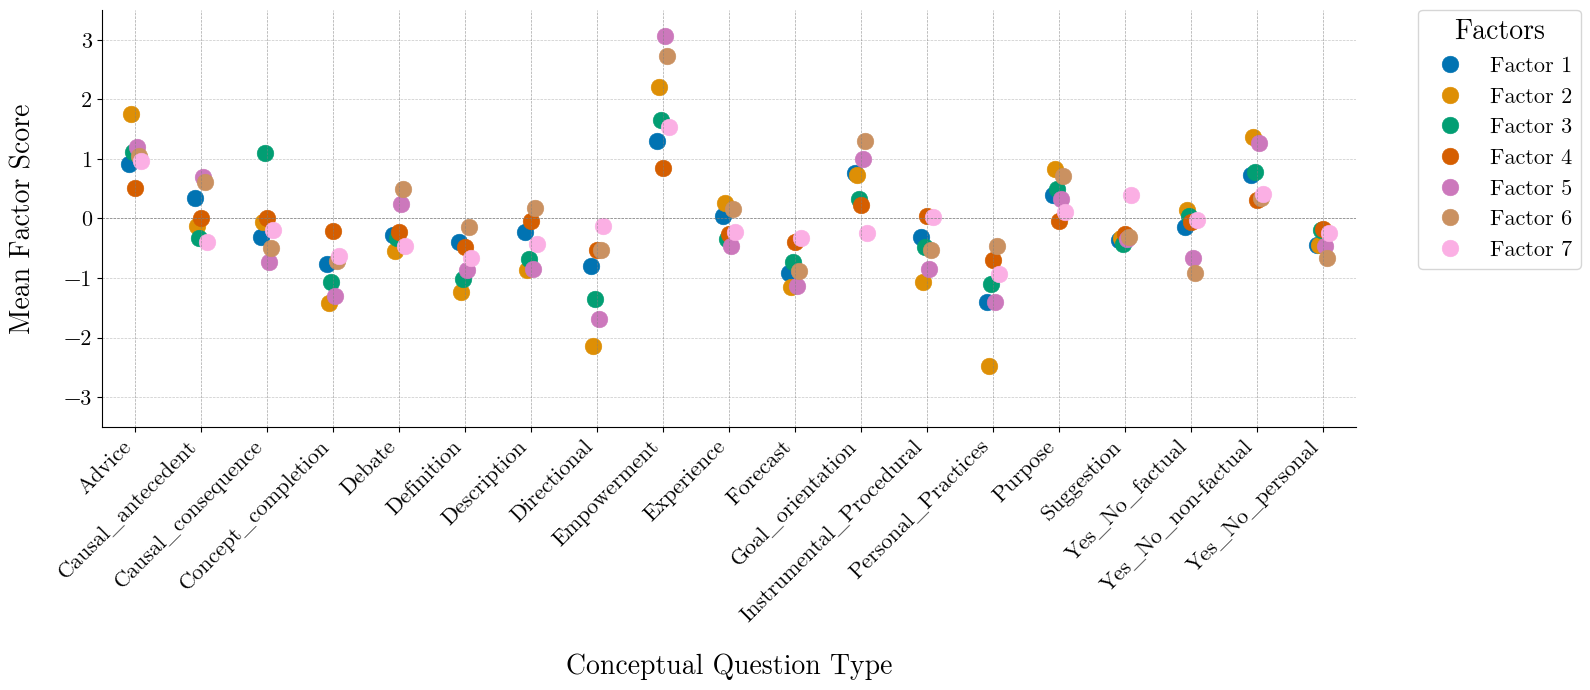

In [53]:
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# Specify font file:
font_path = 'lmroman10-regular.otf'
fm.fontManager.addfont(font_path)

# Set the font family globally using the font's name
plt.rcParams['font.family'] = 'Latin Modern Roman'

# Set Seaborn theme
# sns.set_style("whitegrid")
sns.set_palette("colorblind")

# ----------------------------------------------------------------------------
# 1) Group by question type and get mean factor scores
group_means = (
    df_factor_scores
    .groupby("Conceptual Question Type")[factor_names]
    .mean()
    .reset_index()
)

# 2) Convert to "long" format for Seaborn
melted_factor_scores = group_means.melt(
    id_vars=["Conceptual Question Type"],
    var_name="Factor",
    value_name="Score"
)

# 3) Sort question types for consistent plotting
sorted_question_types = sorted(melted_factor_scores["Conceptual Question Type"].unique())

# 4) Plot
fig, ax = plt.subplots(figsize=(16, 7))

sns.pointplot(
    data=melted_factor_scores,
    x="Conceptual Question Type",
    y="Score",
    hue="Factor",
    dodge=True,
    markers="o",
    linestyle="none",
    order=sorted_question_types,
    err_kws={'linewidth': 0.5},
    linewidth=0.5,
    markersize=12,
    ax=ax
)

ax.set_ylim(-3.5, 3.5)

# Add vertical lines for each category and a grid along y
for i in range(len(sorted_question_types)):
    plt.axvline(x=i, color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
    plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

# Add a horizontal line at y=0
ax.axhline(y=0, color="gray", linestyle="--", linewidth=0.5)

# Remove lines on top and on the right
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right", fontsize=16)
plt.yticks(fontsize=16)

# Labels & legend
plt.xlabel("Conceptual Question Type", fontsize=20, labelpad=20)
plt.ylabel("Mean Factor Score", fontsize=20, labelpad=20)
plt.legend(title="Factors", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, fontsize=16, title_fontsize=20)

plt.tight_layout()
plt.show()

# Save figure
fig.savefig("factor_scores_CQT.pdf")

---
* Create one plot per factor with question types on the y-axis, ordered by their mean score (from highest to lowest)

---

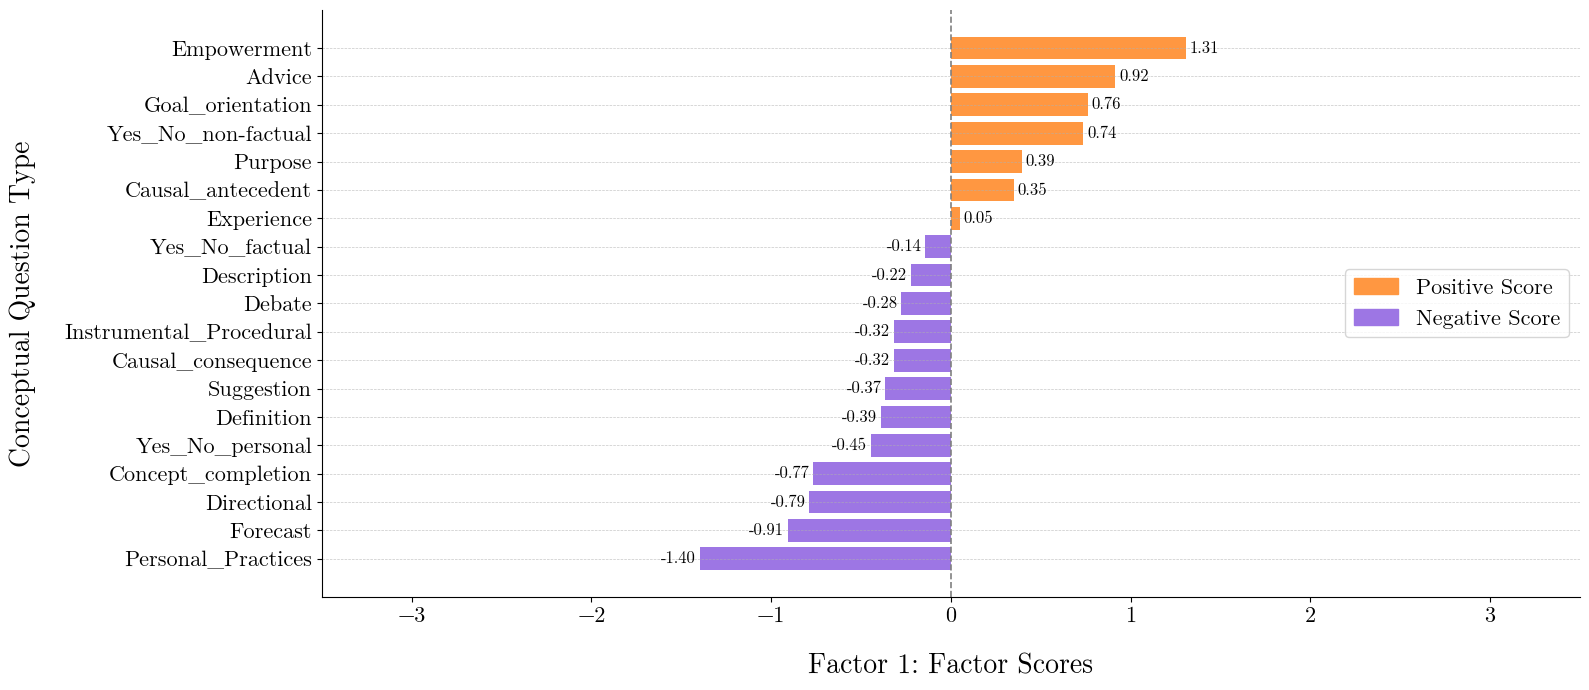

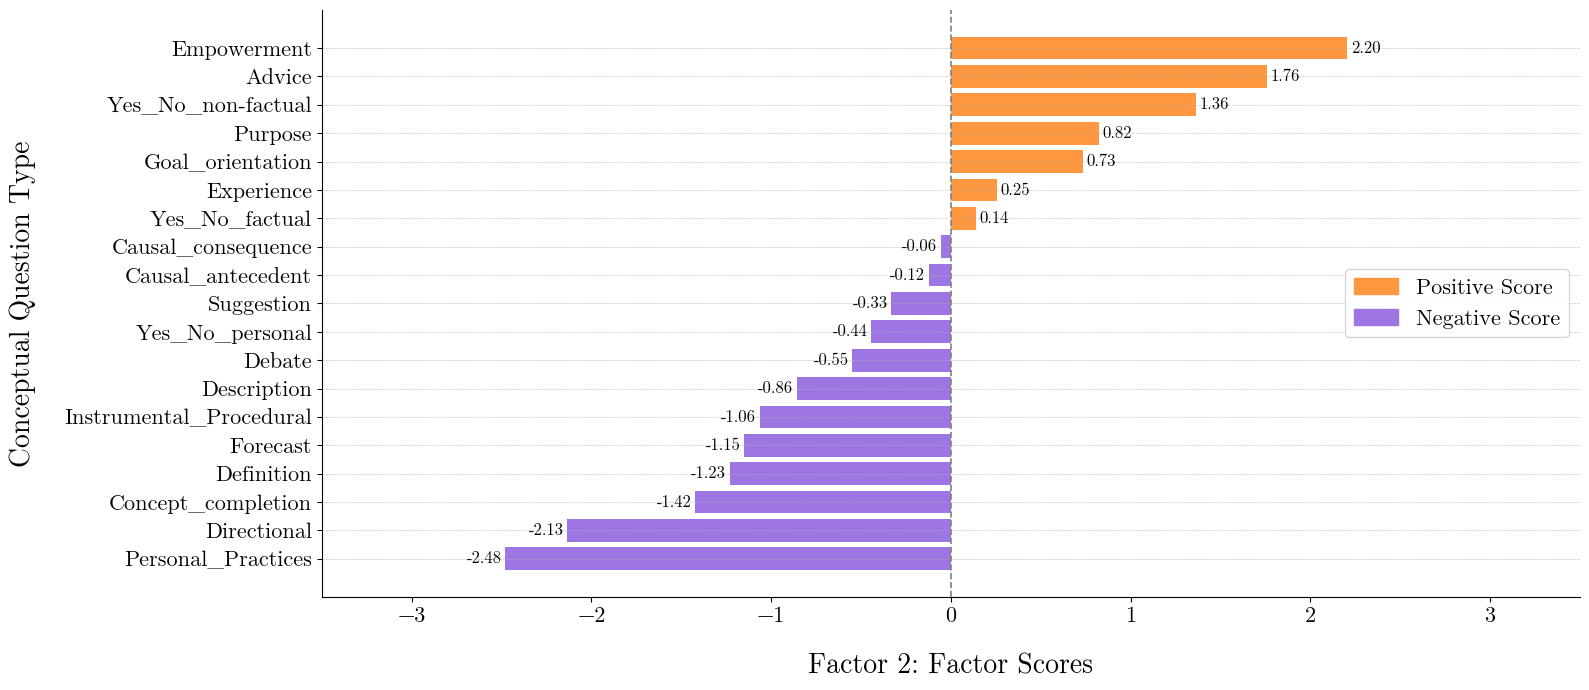

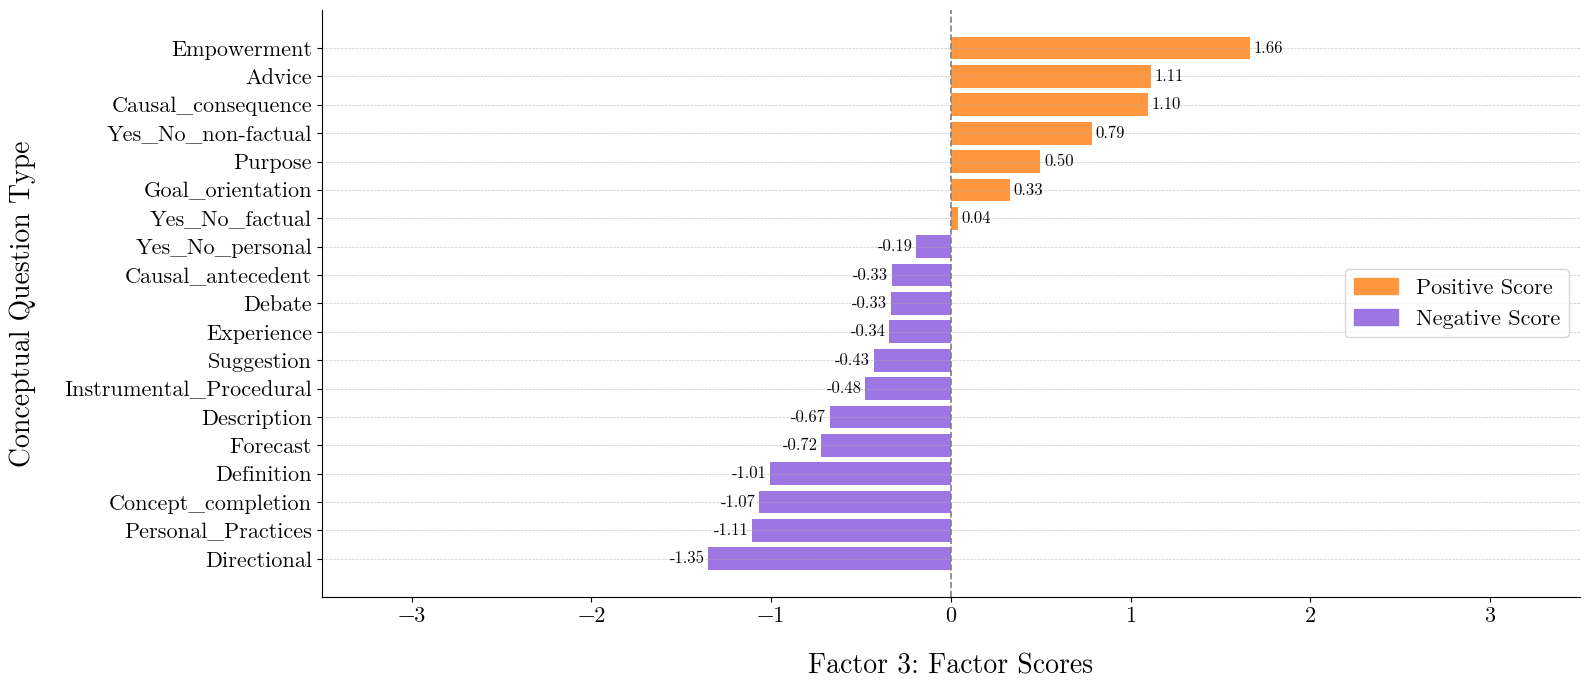

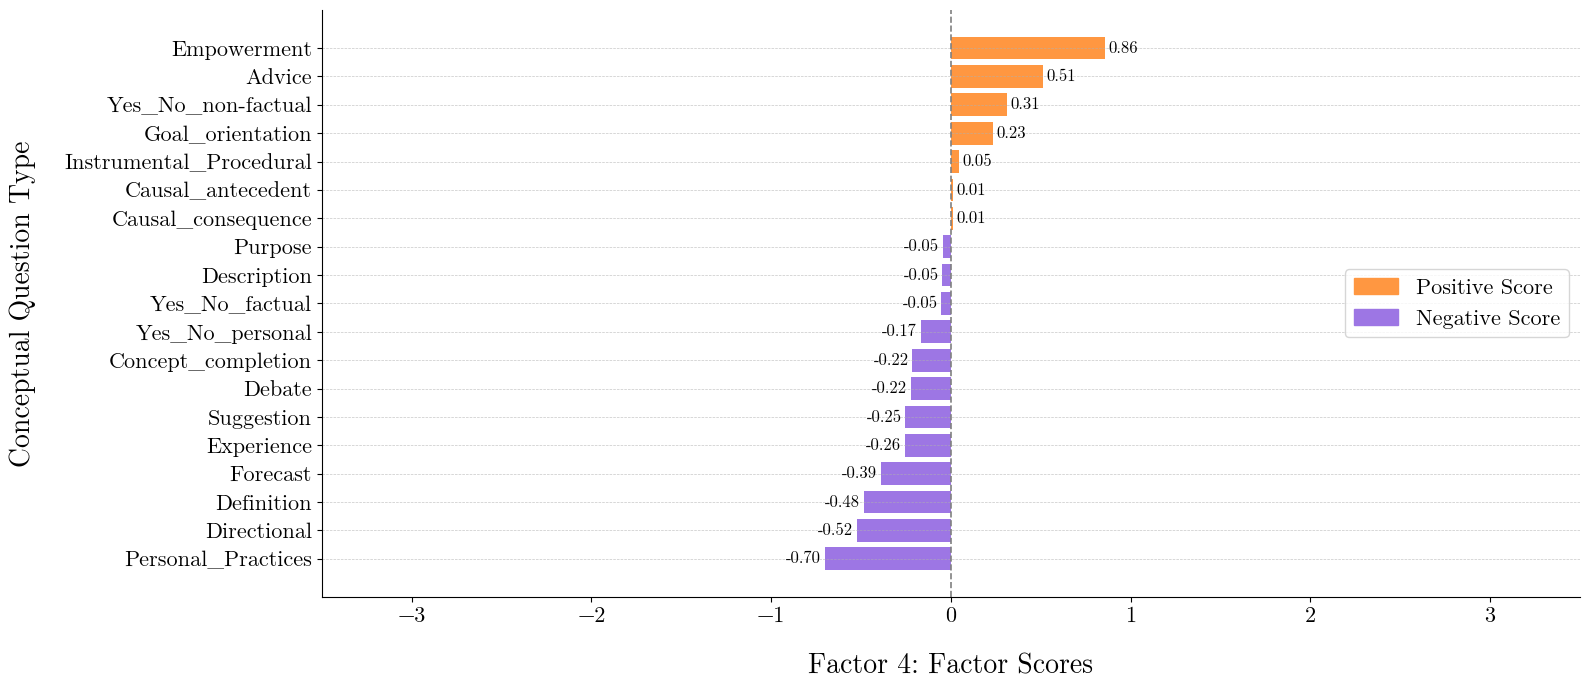

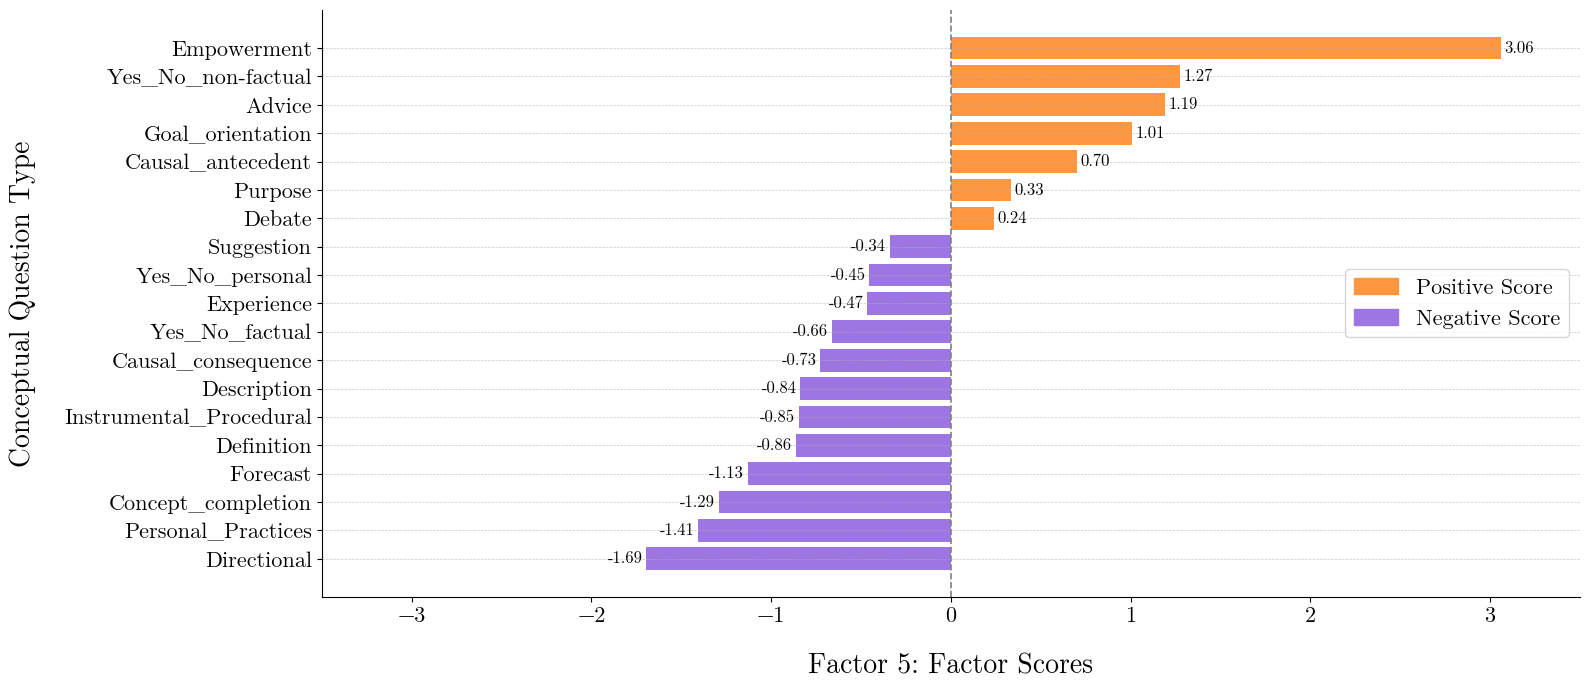

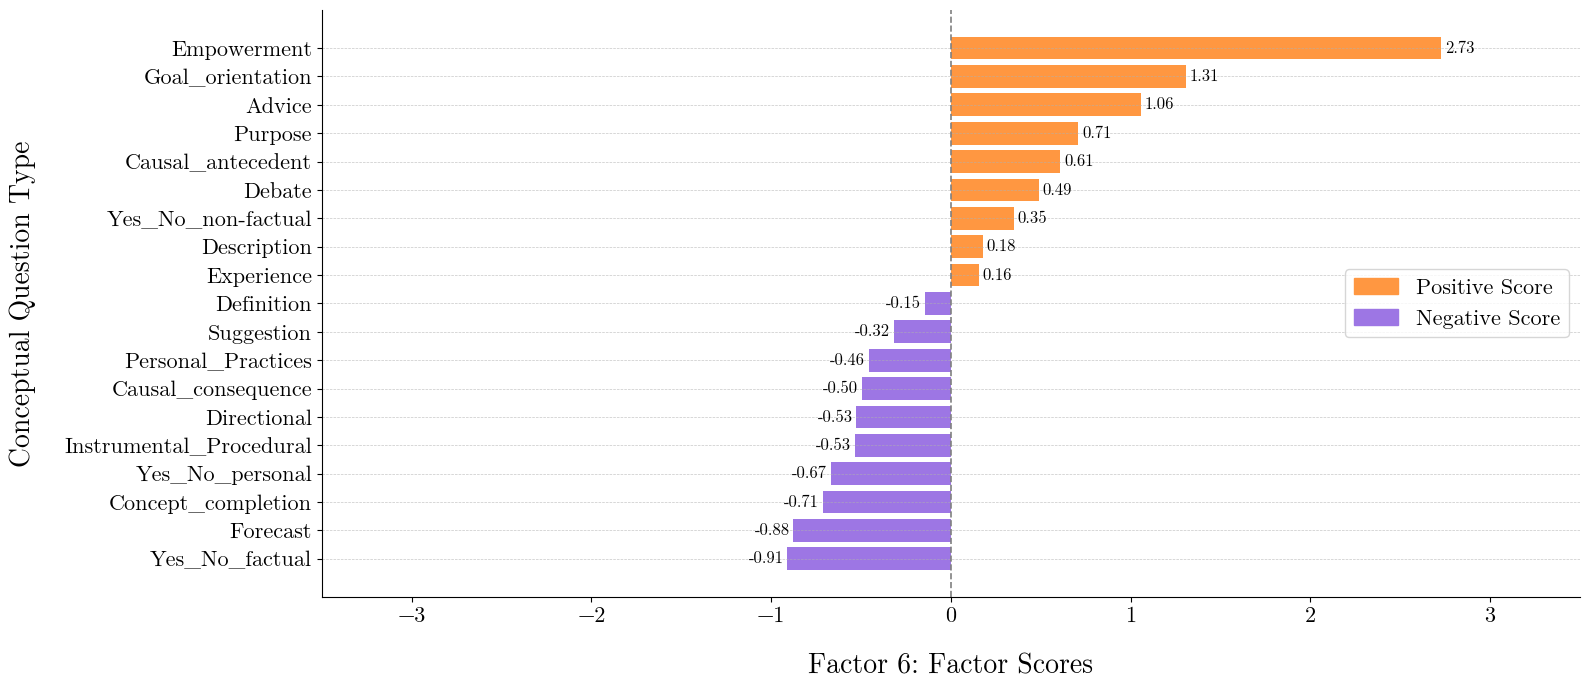

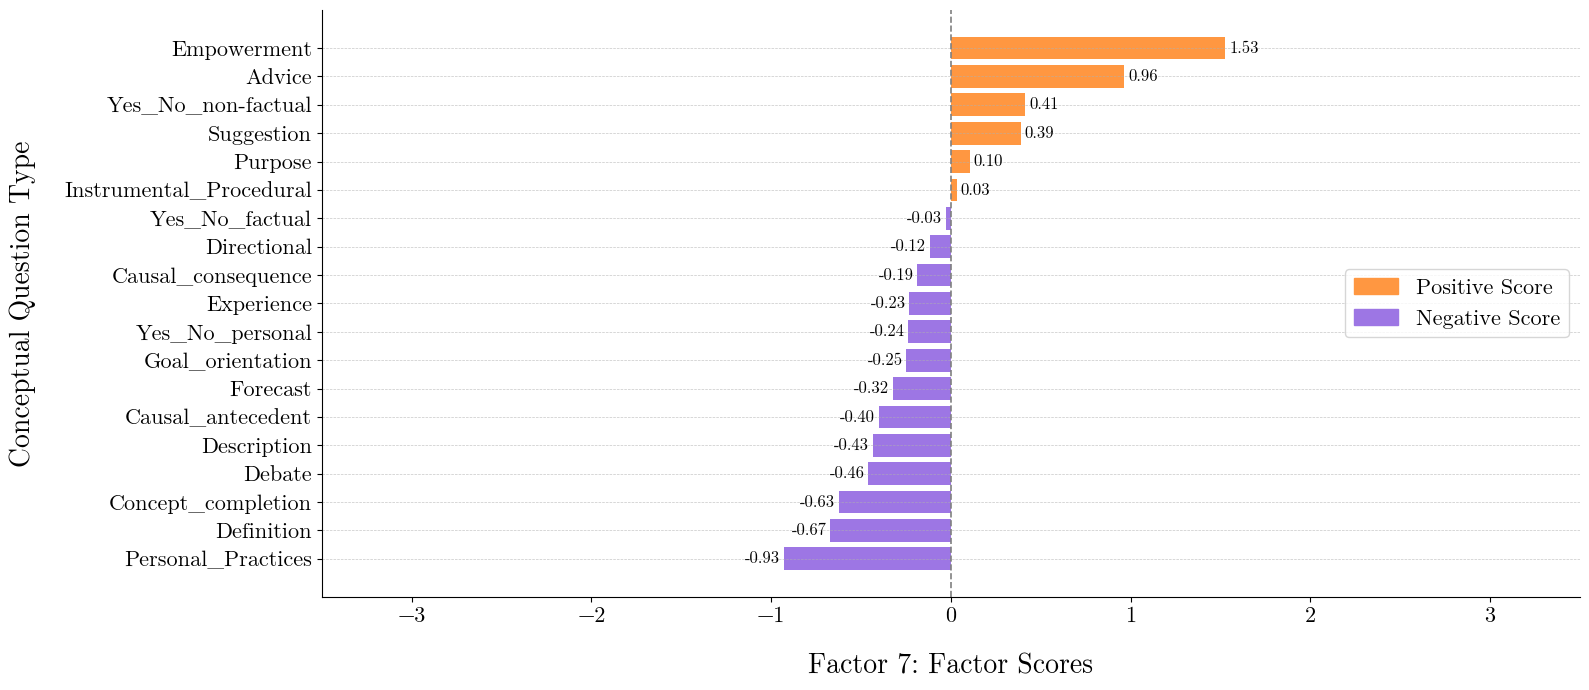

In [54]:
import matplotlib.patches as mpatches

for factor in factor_names:
    # Copy and sort the data for the current factor
    factor_data = group_means[["Conceptual Question Type", factor]].copy()
    factor_data = factor_data.sort_values(by=factor, ascending=True)

    # Create a new column for bar colors:
    factor_data["bar_color"] = factor_data[factor].apply(
        lambda x: "#FF9741" if x >= 0 else "#9D76E4"
    )

    # Create a horizontal bar plot using Matplotlib
    fig, ax = plt.subplots(figsize=(16, 7))
    bars = ax.barh(
        y=factor_data["Conceptual Question Type"],
        width=factor_data[factor],
        color=factor_data["bar_color"]
    )

    # -------------------------------------------------------------------------
    # ADD NUMERIC LABELS AT THE END OF EACH BAR
    # -------------------------------------------------------------------------
    for bar in bars:
        width = bar.get_width()  # The length of the bar
        y_pos = bar.get_y() + bar.get_height() / 2  # Vertical center of the bar

        # Decide text alignment depending on positive or negative
        if width >= 0:
            ha = "left"   # label appears to the right of the bar end
            offset = 0.02
        else:
            ha = "right"  # label appears to the left of the bar end
            offset = -0.02

        # Place the text slightly beyond the bar end
        ax.text(
            width + offset,
            y_pos,
            f"{width:.2f}",
            va="center",
            ha=ha,
            fontsize=12
        )

    # Add a vertical reference line at 0
    ax.axvline(0, color="gray", linewidth=1.2, linestyle="--")

    # Set labels and tick parameters
    ax.set_xlabel(f"{factor}: Factor Scores", fontsize=20, labelpad=20)
    ax.set_ylabel("Conceptual Question Type", fontsize=20, labelpad=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # Add horizontal grid lines
    ax.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

    # Force the x-axis to always span from -3.5 to 3.5
    ax.set_xlim(-3.5, 3.5)

    # Remove lines on top and on the right
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)


    # -------------------------------------------------------------------------
    # CREATE A LEGEND
    # -------------------------------------------------------------------------
    pos_patch = mpatches.Patch(color="#FF9741", label="Positive Score")
    neg_patch = mpatches.Patch(color="#9D76E4", label="Negative Score")
    ax.legend(handles=[pos_patch, neg_patch], loc="right", fontsize=16)

    plt.tight_layout()

    # Save each figure with a unique filename including the factor name
    filename = f"factor_scores_CQT_{factor.replace(' ', '_')}.pdf"
    fig.savefig(filename)

    # Display the figure
    plt.show()

    # Close the figure to free up memory
    plt.close(fig)

---
* Present factor scores in numerical format
---

In [55]:
import pandas as pd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

# 1) Group by question type and get mean factor scores
group_means = (
    df_factor_scores
    .groupby("Conceptual Question Type")[factor_names]
    .mean()
    .reset_index()
)

# Round to 2 decimal places for neat printing
group_means_rounded = group_means.copy()
group_means_rounded[factor_names] = group_means_rounded[factor_names].round(2)

print("Mean factor scores by question type:\n")
print(group_means_rounded)


pd.reset_option('display.max_colwidth')
pd.reset_option('display.width')

Mean factor scores by question type:

   Conceptual Question Type  Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  Factor 6  Factor 7
0                    Advice      0.92      1.76      1.11      0.51      1.19      1.06      0.96
1         Causal_antecedent      0.35     -0.12     -0.33      0.01      0.70      0.61     -0.40
2        Causal_consequence     -0.32     -0.06      1.10      0.01     -0.73     -0.50     -0.19
3        Concept_completion     -0.77     -1.42     -1.07     -0.22     -1.29     -0.71     -0.63
4                    Debate     -0.28     -0.55     -0.33     -0.22      0.24      0.49     -0.46
5                Definition     -0.39     -1.23     -1.01     -0.48     -0.86     -0.15     -0.67
6               Description     -0.22     -0.86     -0.67     -0.05     -0.84      0.18     -0.43
7               Directional     -0.79     -2.13     -1.35     -0.52     -1.69     -0.53     -0.12
8               Empowerment      1.31      2.20      1.66      0.86      3.06   

---
* Use raw factor score data (before aggregation) to fit a General Linear Model + ANOVA for each factor
* Test whether the factor scores differ significantly by question type

---

In [67]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Assume df_factor_scores is your DataFrame and factor_names is your list of factor columns.
# Optionally, rename the question type column for easier reference:
df = df_factor_scores.copy()
df = df.rename(columns={"Conceptual Question Type": "ConceptualQuestionType"})

# Loop over each factor to run the GLM (ANOVA)
for factor in factor_names:
    print(f"\nGeneral Linear Model for {factor}:")

    # Wrap the factor in Q() to handle spaces or special characters
    formula = f'Q("{factor}") ~ C(ConceptualQuestionType)'

    # Fit the model using ordinary least squares (OLS)
    model = smf.ols(formula, data=df).fit()

    # Print a summary of the model (coefficients, p-values, etc.)
    print(model.summary())

    # Get the ANOVA table to test overall differences among groups
    anova_results = anova_lm(model, typ=2)
    print("\nANOVA results:")
    print(anova_results)


General Linear Model for Factor 1:
                            OLS Regression Results                            
Dep. Variable:          Q("Factor 1")   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     12.96
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           1.39e-38
Time:                        03:10:16   Log-Likelihood:                -15397.
No. Observations:                6005   AIC:                         3.083e+04
Df Residuals:                    5986   BIC:                         3.096e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------